<a href="https://colab.research.google.com/github/PuchToTalk/Ladybug_project/blob/master/Ladybugs_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Analysis & IA

Pour le 06 juin 2023

Réalisé par 



*   Paul CHU
*   Kilian GEOFFROY
*   Mouhamed SY





---



# **Contexte**

## 1. Introduction de la consigne

## 2. État de l'Art



---



Rajouter une image du papier de recherche , dire en gros on a commencé à faire un état de l'art voir ce qui a été déjà fait qui ressemble au projet et dire que vu qu'on a pas vu le CNN on le fera à la fin du projet pour comparer la méthode ML et Deep learning. Rappeler l'objectif de cette classification ... 

# **Phase Training**

Début de l'exercice

## 0. Étude préliminaire (étude manuelle)

Création de notre propre DataFrame basé sur le comptage par l'oeil humain, et extraction manuelle.

**AVANT LANCEMENT : Nécessite de déposer les fichiers CSV + les images de 1 à 200**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import chi2_contingency


import numpy as np
from PIL import Image
import os
import cv2

In [ ]:
df_manual = pd.read_csv("comptage_manuel.csv", sep=";")
df_manual['Class'] = df_manual['Label'].apply(lambda x: 'Coccinella septempunctata' if x == 0 else 'Harmonia axyridis')
df_manual = df_manual.rename(columns={"spot_number": "Nbr_Spot"})

df_manual



Image_id  Label  Nbr_Spot                      Class
0     im-001      0         6  Coccinella septempunctata
1     im-002      0         7  Coccinella septempunctata
2     im-003      1        17          Harmonia axyridis
3     im-004      1        19          Harmonia axyridis
4     im-005      1        17          Harmonia axyridis
..       ...    ...       ...                        ...
195   im-196      0         7  Coccinella septempunctata
196   im-197      1         3          Harmonia axyridis
197   im-198      0         4  Coccinella septempunctata
198   im-199      1         4          Harmonia axyridis
199   im-200      0         6  Coccinella septempunctata

[200 rows x 4 columns]

In [ ]:
def int_Count(Nbr_Spot):
    if Nbr_Spot <= 2 :
        return "1-2" # catégorie de 
    elif (Nbr_Spot > 2) & (Nbr_Spot <= 6):
        return "3-6" # incertitude à l'oeil nu
    elif (Nbr_Spot == 7):
        return "7"
    elif (Nbr_Spot > 7):
        return "8+"
    else:
        return ""
 

In [ ]:

df_manual['SpotInterval'] = df_manual['Nbr_Spot'].apply(int_Count)
df_manual

Image_id  Label  Nbr_Spot                      Class SpotInterval
0     im-001      0         6  Coccinella septempunctata          3-6
1     im-002      0         7  Coccinella septempunctata            7
2     im-003      1        17          Harmonia axyridis           8+
3     im-004      1        19          Harmonia axyridis           8+
4     im-005      1        17          Harmonia axyridis           8+
..       ...    ...       ...                        ...          ...
195   im-196      0         7  Coccinella septempunctata            7
196   im-197      1         3          Harmonia axyridis          3-6
197   im-198      0         4  Coccinella septempunctata          3-6
198   im-199      1         4          Harmonia axyridis          3-6
199   im-200      0         6  Coccinella septempunctata          3-6

[200 rows x 5 columns]

In [ ]:
df_color_manual = pd.read_csv("colorClassification.csv", sep=";")
df_color_manual = df_color_manual.drop(df_color_manual.columns[[0, 2, 3]], axis=1)
df_color_manual

Image_id ElytraColor SpotColor  ElytraFloat  SpotFloat
0     im-001      Orange     Black            2          0
1     im-002      Orange     Black            2          0
2     im-003         Red     Black            1          0
3     im-004      Orange     Black            2          0
4     im-005         Red     Black            1          0
..       ...         ...       ...          ...        ...
195   im-196         Red     Black            1          0
196   im-197       Black       Red            0          1
197   im-198         Red     Black            1          0
198   im-199       Black    Orange            0          2
199   im-200         Red     Black            1          0

[200 rows x 5 columns]

In [ ]:
df_final_manual = pd.merge(df_manual, df_color_manual, on=df_manual.columns[0])
df_final_manual

Image_id  Label  Nbr_Spot                      Class SpotInterval  \
0     im-001      0         6  Coccinella septempunctata          3-6   
1     im-002      0         7  Coccinella septempunctata            7   
2     im-003      1        17          Harmonia axyridis           8+   
3     im-004      1        19          Harmonia axyridis           8+   
4     im-005      1        17          Harmonia axyridis           8+   
..       ...    ...       ...                        ...          ...   
195   im-196      0         7  Coccinella septempunctata            7   
196   im-197      1         3          Harmonia axyridis          3-6   
197   im-198      0         4  Coccinella septempunctata          3-6   
198   im-199      1         4          Harmonia axyridis          3-6   
199   im-200      0         6  Coccinella septempunctata          3-6   

    ElytraColor SpotColor  ElytraFloat  SpotFloat  
0        Orange     Black            2          0  
1        Orange     Black            2          0  
2           Red     Black            1          0  
3        Orange     Black            2          0  
4           Red     Black            1          0  
..          ...       ...          ...        ...  
195         Red     Black            1          0  
196       Black       Red            0          1  
197         Red     Black            1          0  
198       Black    Orange            0          2  
199         Red     Black            1          0  

[200 rows x 9 columns]

In [ ]:
df_final_manual.to_csv('df_manual.csv')

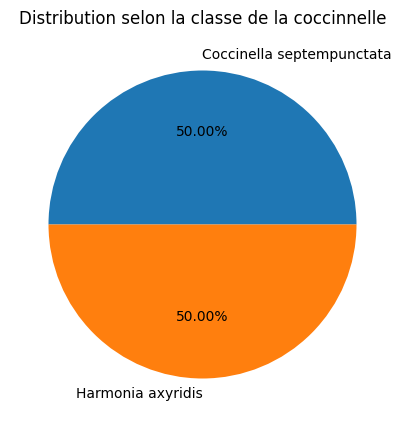

In [ ]:
Class_nbr=df_final_manual['Class'].value_counts()
Class_nbr.plot.pie(y='Class', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la classe de la coccinnelle')
plt.show()

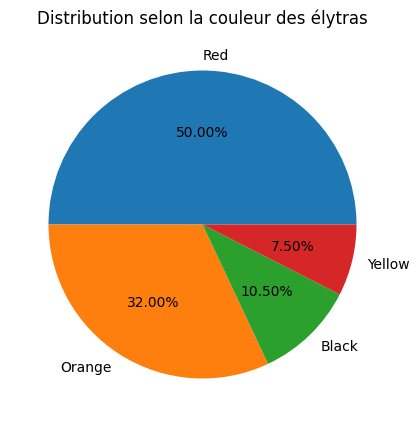

In [ ]:
Elytra_color=df_final_manual['ElytraColor'].value_counts()
Elytra_color.plot.pie(y='ElytraColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des élytras')
plt.show()

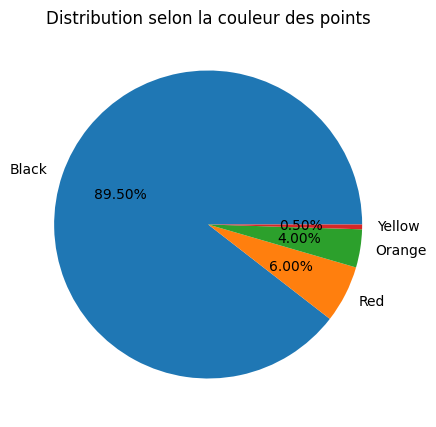

In [ ]:
Spot_color=df_final_manual['SpotColor'].value_counts()
Spot_color.plot.pie(y='SpotColor', autopct="%.2f%%", figsize=(5, 5),ylabel='',title='Distribution selon la couleur des points')
plt.show()

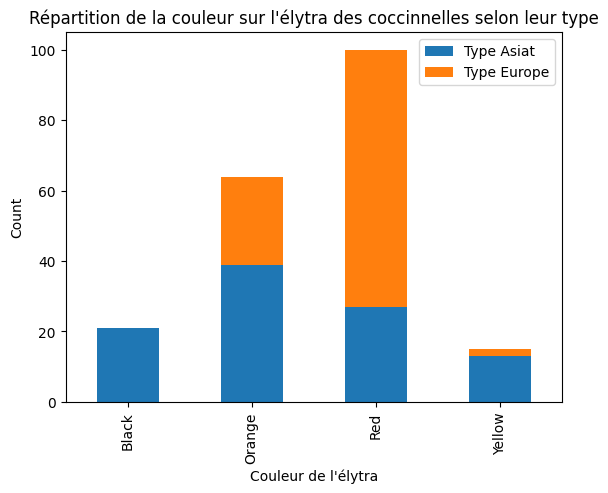

In [ ]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['ElytraColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['ElytraColor'].value_counts()
elytra_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
elytra_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur sur l'élytra des coccinnelles selon leur type")
plt.xlabel("Couleur de l'élytra")
plt.ylabel("Count")
plt.show()


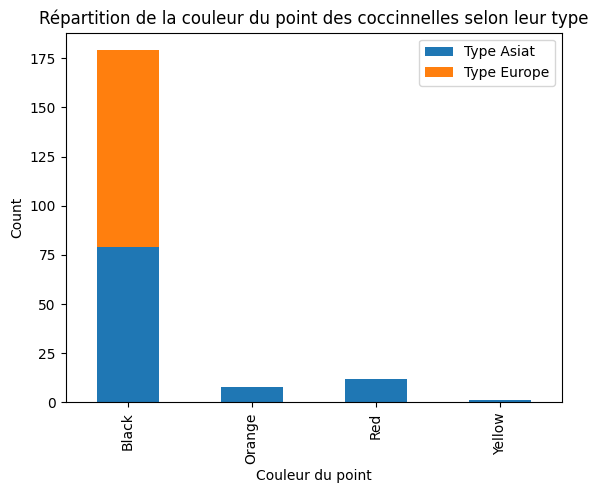

In [ ]:


# Histogramme du nbre de personne morts / qui ont survécu en fonction de la classe de leurs cabines
Asiat = df_final_manual[df_final_manual['Label'] == 1]['SpotColor'].value_counts()
Europe = df_final_manual[df_final_manual['Label'] == 0]['SpotColor'].value_counts()
spot_color_df = pd.DataFrame({'Type Asiat': Asiat, 'Type Europe': Europe})
spot_color_df.plot(kind='bar', stacked=True)
plt.title("Répartition de la couleur du point des coccinnelles selon leur type")
plt.xlabel("Couleur du point")
plt.ylabel("Count")
plt.show()


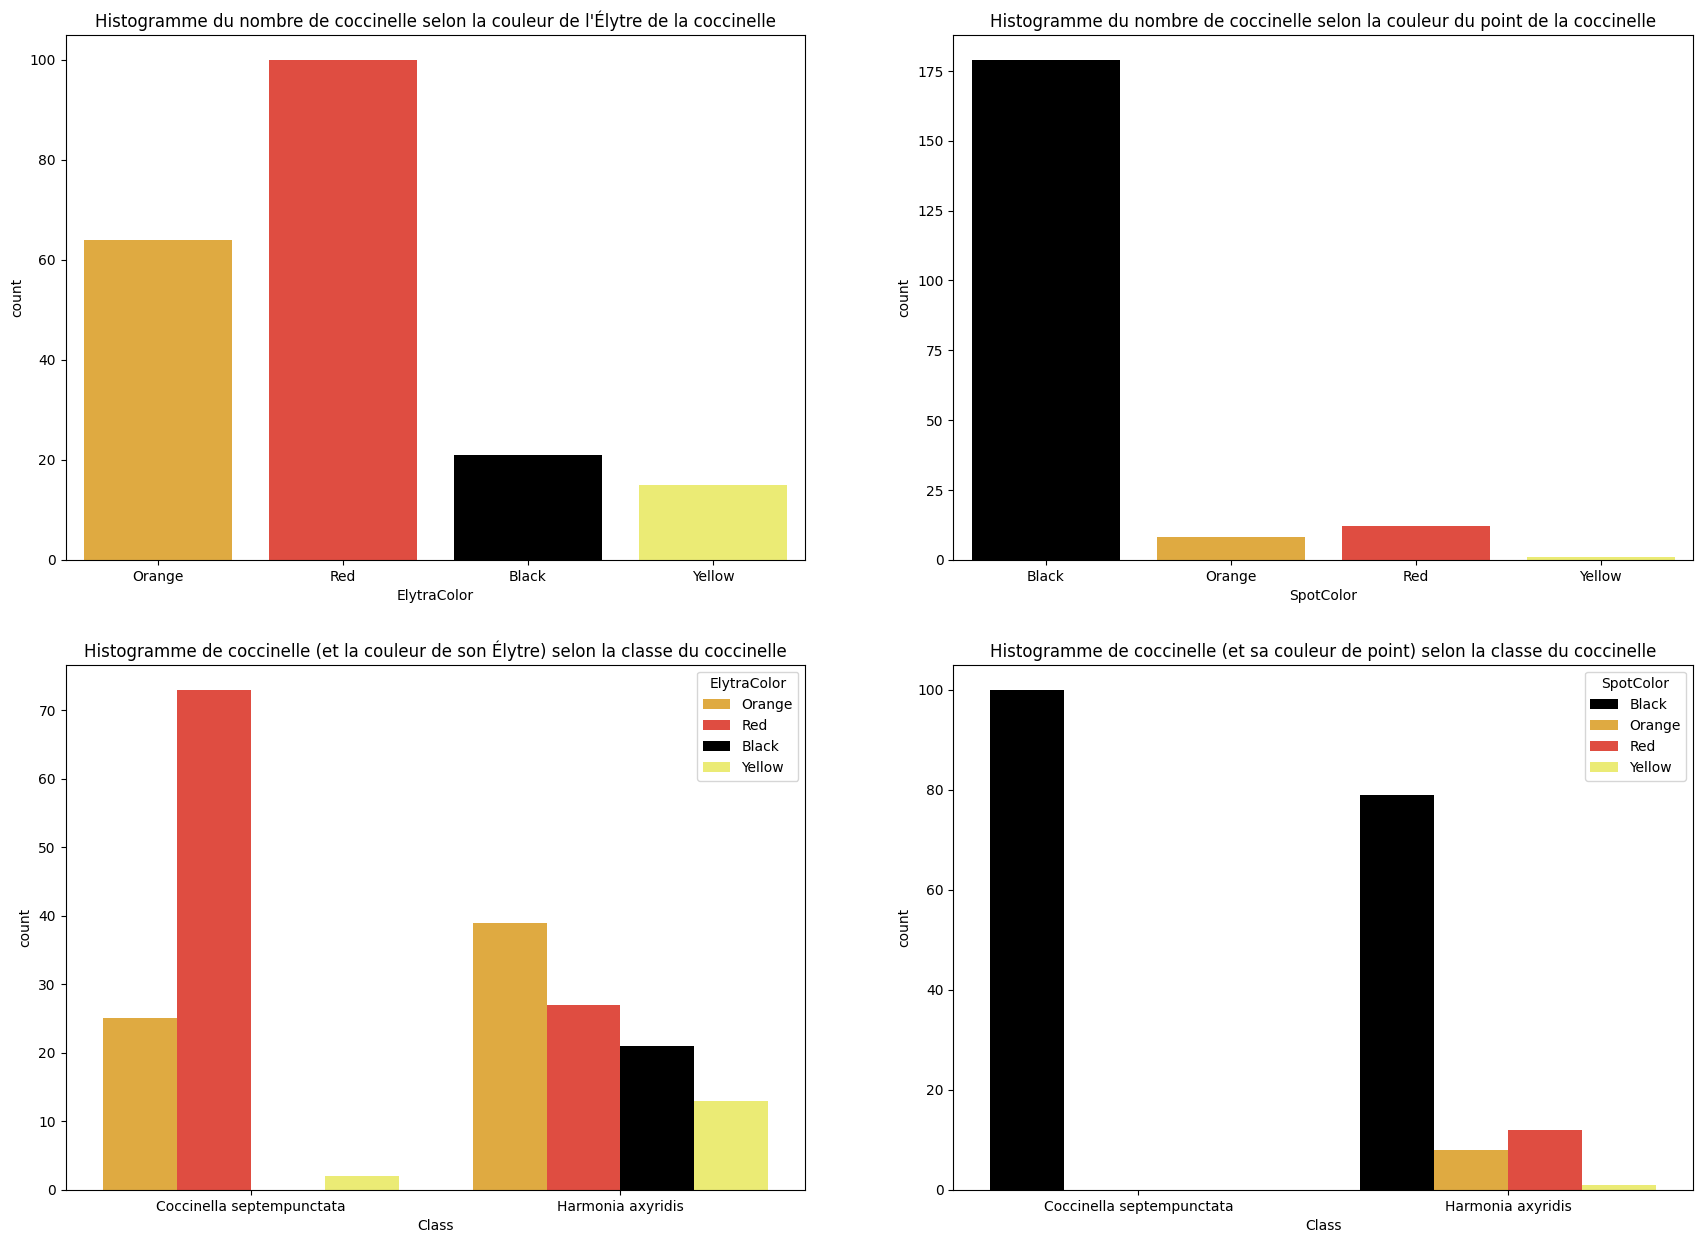

In [ ]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.countplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor",palette=palette ).set(title="Histogramme du nombre de coccinelle selon la couleur de l'Élytre de la coccinelle")
sns.countplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", palette=palette).set(title='Histogramme du nombre de coccinelle selon la couleur du point de la coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][0], x="Class", hue = "ElytraColor", palette=palette).set(title='Histogramme de coccinelle (et la couleur de son Élytre) selon la classe du coccinelle')
sns.countplot(data=df_final_manual, ax=axes[1][1], x="Class",hue = "SpotColor", palette = palette).set(title='Histogramme de coccinelle (et sa couleur de point) selon la classe du coccinelle')






plt.show()

__Remarque__:
On remarque que les coccinelles européennes disposent toutes des Élytres de couleur rouge (nuance de rouge). Et ont des points qui sont noirs.
Contrairement à la variante asiatique qui dispose de plusieurs couleurs possibles.

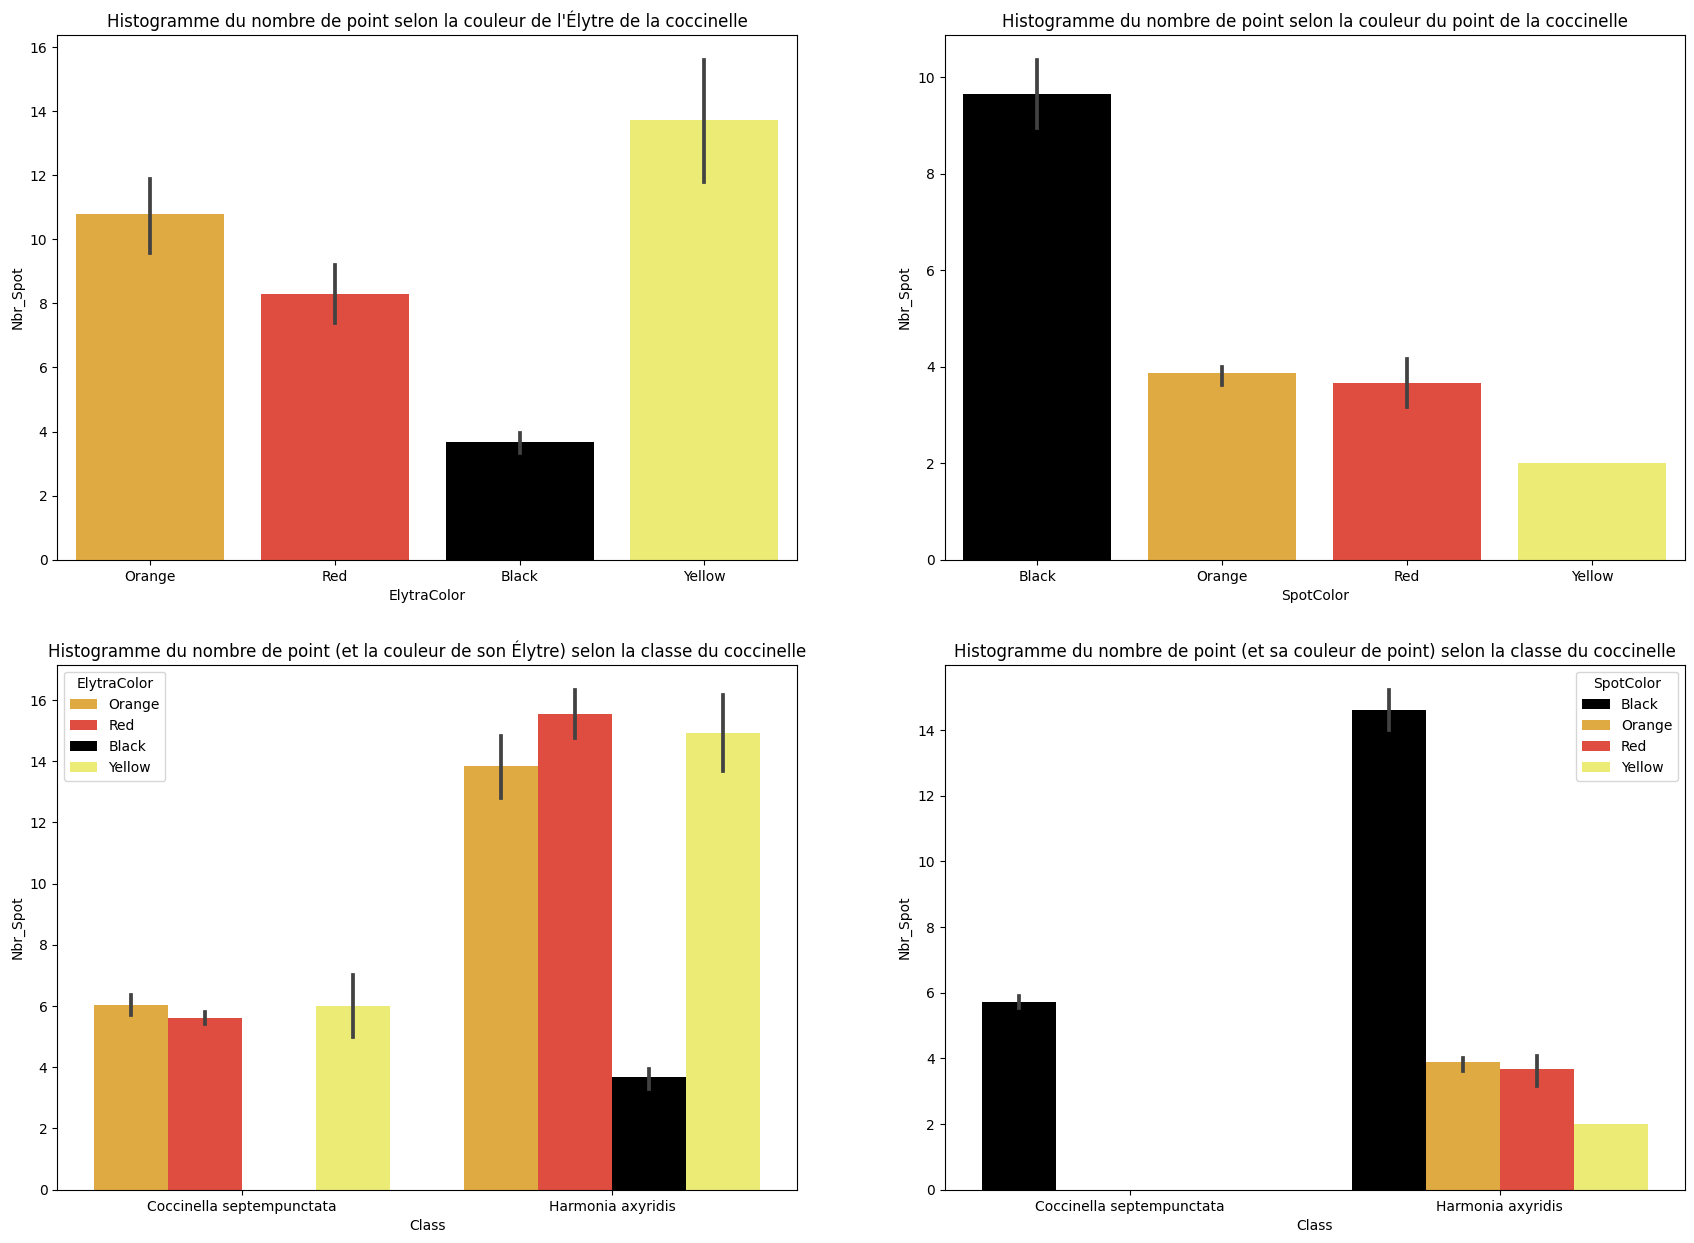

In [ ]:
palette = dict(Black="#000000", Red="#FA3626", Orange="#FAB326", Yellow="#FFFF61")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.barplot(data=df_final_manual, ax=axes[0][0], x="ElytraColor", y="Nbr_Spot" ,palette=palette).set(title="Histogramme du nombre de point selon la couleur de l'Élytre de la coccinelle")
sns.barplot(data=df_final_manual, ax=axes[0][1], x="SpotColor", y="Nbr_Spot", palette=palette).set(title='Histogramme du nombre de point selon la couleur du point de la coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][0], x="Class", y="Nbr_Spot", hue = "ElytraColor", palette=palette).set(title='Histogramme du nombre de point (et la couleur de son Élytre) selon la classe du coccinelle')
sns.barplot(data=df_final_manual, ax=axes[1][1], x="Class", y="Nbr_Spot", hue = "SpotColor", palette = palette).set(title='Histogramme du nombre de point (et sa couleur de point) selon la classe du coccinelle')






plt.show()

__Remarque__ : On remarque ici que le nombre de point ne dépasse pas les 7 points du côté de la coccinelle européenne. Là où la coccinelle asiatique a des variantes allant jusqu'à 16 points. Mais un certain nombre de coccinelle asiatique de couleur noir ont possiblement 4 points ou moins.







__Bilan__ : On remarque que pour les européens :


*   La couleur de l'Elytre chez les coccinelle Européennes est que de nuance rouge (rouge / orange / jaune)
*   Et que son point est toujours de couleur noire


De ce fait, on pourra faciliter l'étape des features extracitons en mettant un seuil en fonction du couleur rouge / couleur noir.

On en déduit par ailleurs une possible corrélation entre la couleur des Élytres, et des couleurs des points à exploiter plus tard dans la partie Features extraction.

Ainsi, on pourra utiliser ces propriétés pour optimiser la classification finale de notre coccinelle. Puisque toutes coccinelles ayant une Élytre noire seraient considérées comme Asiatique. Et toutes coccinelles disposant des points colorées, le seront également.
Nous pouvons assimiler cela à une reconnaissance par détection de ces "anomalies" plus tard.





## **Analyse des dépendances des différentes features**

In [ ]:
def degree_of_freedom (df):
    degf2 = (df.shape[0] - 1 ) * (df.shape[1] - 1)
    return degf2
    
def cramer_v(df):
    n = df.sum().sum()
    chi2 = chi2_contingency(df, correction = False)[0]
    res = np.sqrt(chi2 / (n*(min(df.shape)-1)))
    return res


In [ ]:

df_crosstab1 = pd.crosstab(df_final_manual['SpotInterval'], df_final_manual['Class'], rownames = ['Number of Spot'], colnames = ['Class'])



print(f"Il y a un total de {degree_of_freedom(df_crosstab1)} degrés de liberté")
df_crosstab1

Il y a un total de 3 degrés de liberté


Class           Coccinella septempunctata  Harmonia axyridis
Number of Spot                                              
1-2                                     0                  4
3-6                                    72                 18
7                                      28                  1
8+                                      0                 77

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab1)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.8322797938027895


__Remarque__ : On rejète dans un premier temps l'hypothèse H0, on en déduit que les variables (Classe de la coccinelle et le nombre de point) ne sont pas indépendantes. De plus, comme le coefficient de Cramer est très important. On en conclut qu'il existe une relation de corrélation très significative entre les deux variables. Et qu'il sera possible de prédire l'une des variables par rapport à l'autre.

In [ ]:

df_crosstab2 = pd.crosstab(df_final_manual['ElytraColor'], df_final_manual['Class'], rownames = ['ElytraColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab2)} degrés de liberté")
df_crosstab2

Il y a un total de 3 degrés de liberté


Class        Coccinella septempunctata  Harmonia axyridis
ElytraColor                                              
Black                                0                 21
Orange                              25                 39
Red                                 73                 27
Yellow                               2                 13

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab2)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab2)}")
    

Chi2 est égale à 53.28916666666667 
p-value : 1.5907277768164958e-11 
Le coefficient de Cramer donne 0.5161839142527916


__Remarque__ : On rejète également l'hypothèse H0. On en déduit que la classe de la coccinelle et que la couleur des Élytres ne sont pas indépendantes. Par ailleurs, la coefficient de Cramer étant supérieur à 0.5. On peut considérer la relation de corrélation comme étant significatif également.

In [ ]:

df_crosstab3 = pd.crosstab(df_final_manual['SpotColor'], df_final_manual['Class'], rownames = ['SpotColor'], colnames = ['Class'])


print(f"Il y a un total de {degree_of_freedom(df_crosstab3)} degrés de liberté")
df_crosstab3

Il y a un total de 3 degrés de liberté


Class      Coccinella septempunctata  Harmonia axyridis
SpotColor                                              
Black                            100                 79
Orange                             0                  8
Red                                0                 12
Yellow                             0                  1

In [ ]:

chi2, p, degf, ex = chi2_contingency(df_crosstab1)
print(f"Chi2 est égale à {chi2} ")
print(f"p-value : {p} ")
print(f"Le coefficient de Cramer donne {cramer_v(df_crosstab3)}")
    

Chi2 est égale à 138.53793103448277 
p-value : 7.810817742335135e-30 
Le coefficient de Cramer donne 0.34251778896020857


__Remarque__ : Ici l'hypothèse H0 est également rejeté. On en déduit que les variables "*SpotColor*" et "*Class*" ne sont pas indépendantes. Cela dit, étant donné que le coefficient de Cramer est inférieur à 0.5. Ainsi on ne peut pas évoquer de relation de corrélation entre ces deux variables, contrairement aux 2 cas précédents.



---



## 1. Comptage des points

On prend en entrée les images segmentées => renvoie en sortie une liste "*SpotCounting*", et d’une liste "*IndiceCircularité*" (optionnel)

## **Méthode avec la moyenne des indices de circularité comme seuil**

Appliquer un algorithme de classification binaire sur les labels (=région associée à un seul numéro) de la segmentation manuelle. La segmentation manuelle associe à chaque région de même couleur un numéro distinct (= label). Il faut faire attention, la numérotation est aléatoire d'une image à l'autre. Par exemple, le label associé au fond varie d'une image à l'autre. Vous pouvez transformer la tâche de régression (i.e. comptage du nombre de points) en une tâche de classification binaire des régions de la segmentation manuelle.

In [ ]:
!unzip training.zip 

unzip:  cannot find or open training.zip, training.zip.zip or training.zip.ZIP.


In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops
from matplotlib.patches import Polygon
import os
import csv

def process_image(image_path, seg_path, csv_writer):
    im_seg = imageio.imread(seg_path)
    im_orig = imageio.imread(image_path)

    # Identifier les régions dans l'image segmentée
    regions = regionprops(im_seg)

    # Trier les régions par taille, de la plus grande à la plus petite
    regions_sorted = sorted(regions, key=lambda r: r.area, reverse=True)

    # Créer une figure et des sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(im_orig, cmap='gray')
    ax1.axis('off')

    ax2.imshow(im_seg)
    ax2.axis('off')

    # Exclure la région de l'arrière-plan et la région de la tête
    excluded_labels = [regions_sorted[0].label, regions_sorted[1].label]

    num_regions = 0
    high_circularity_count = 0  # Compteur pour les régions à indice de circularité élevé
    circularity_sum = 0  # Somme des indices de circularité

    for region in regions:
        if region.label not in excluded_labels:  # Exclure les régions spécifiées
            # Récupérer les coordonnées du centre de la région
            region_y_center, region_x_center = region.centroid

            # Afficher un point au centre de la région sur l'image d'origine
            ax1.plot(region_x_center, region_y_center, 'ro', markersize=4)
            ax2.plot(region_x_center, region_y_center, 'ro', markersize=4)

            # Ajouter une étiquette à la région sur l'image segmentée
            ax2.text(region_x_center, region_y_center, f'Region {region.label}', color='red')

            # Calculer l'indice de circularité
            perimeter = region.perimeter
            area = region.area
            circularity_index = (4 * np.pi * area) / (perimeter ** 2)
            print(f"Indice de circularité de la région {region.label}: {circularity_index}")

            # Ajouter l'indice de circularité à la somme
            circularity_sum += circularity_index

            num_regions += 1

    ax1.set_title('Image d\'origine avec les étiquettes de région')
    ax2.set_title('Image segmentée avec les étiquettes de région')
    plt.tight_layout()
    plt.show()
    print("Nombre de régions :", num_regions)

    # Calculer la moyenne des indices de circularité
    if num_regions > 0:
        avg_circularity = circularity_sum / num_regions
    else:
        avg_circularity = 0

    print("Moyenne de circularité de chaque région :", avg_circularity)

    # Classification des régions en fonction de la moyenne de circularité
    for region in regions:
        if region.label not in excluded_labels:  # Exclure les régions spécifiées
            # Calculer l'indice de circularité de la région
            perimeter = region.perimeter
            area = region.area
            circularity_index = (4 * np.pi * area) / (perimeter ** 2)

            # Classer la région en fonction de la moyenne de circularité
            if circularity_index > avg_circularity:
                classification = 1  # Classe 1 pour les régions à indice de circularité élevé
                high_circularity_count += 1  # Incrémenter le compteur de régions à indice de circularité élevé
            else:
                classification = 0  # Classe 0 pour les régions à indice de circularité faible

            print(f"Classification de la région {region.label}: Classe {classification}")

    print("Nombre de régions à indice de circularité élevé :", high_circularity_count)

    # Écrire les résultats dans le fichier CSV
    csv_writer.writerow([image_path, high_circularity_count, avg_circularity])

# Chemin du répertoire contenant les images
directory = '/content'

# Chemin du fichier CSV de sortie
csv_file = '/content/meanhigh_circularity_regions.csv'

# Ouvrir le fichier CSV en mode écriture
with open(csv_file, 'w', newline='') as file:
    csv_writer = csv.writer(file)

    # Écrire l'en-tête du fichier CSV
    csv_writer.writerow(['Image', 'Nombre de régions à indice de circularité élevé', 'Moyenne de circularité'])

    # Parcourir les images dans le répertoire
    for filename in os.listdir(directory):
        if filename.endswith("_im.png"):
            image_path = os.path.join(directory, filename)
            seg_filename = filename.replace("_im.png", "_seg.png")
            seg_path = os.path.join(directory, seg_filename)

            # Appeler la fonction pour traiter chaque image
            process_image(image_path, seg_path, csv_writer)

print("Le fichier CSV contenant les nombres de régions à indice de circularité élevé et la moyenne de circularité a été généré avec succès.")


<ipython-input-28-26a35bff60ec>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im_seg = imageio.imread(seg_path)


FileNotFoundError: ignored

## **Méthode Comptage de point** 

<ipython-input-29-8bea2f08a75b>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im_seg = imageio.imread(f"/content/im-{k:03}_seg.png")
<ipython-input-29-8bea2f08a75b>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im_original = imageio.imread(f"/content/im-{k:03}_im.png")


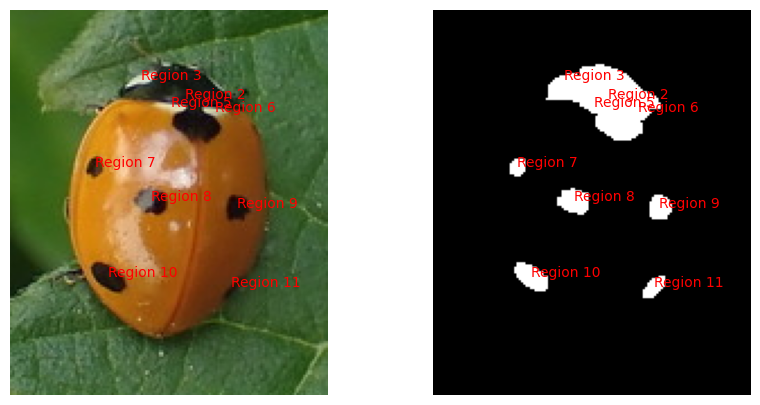

FileNotFoundError: ignored

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops

spot_counting_col = []

for k in range(1, 201):
    # Charger l'image segmentée
    im_seg = imageio.imread(f"/content/im-{k:03}_seg.png")

    # Charger l'image originale
    im_original = imageio.imread(f"/content/im-{k:03}_im.png")

    # Identifier les régions dans l'image segmentée
    label_image = label(im_seg)
    regions = regionprops(label_image)

    # Trier les régions par taille, de la plus grande à la plus petite
    regions_sorted = sorted(regions, key=lambda r: r.area, reverse=True)

    # Exclure les deux plus grandes régions
    if len(regions_sorted) >= 2:
        excluded_regions = [regions_sorted[0], regions_sorted[1]]
        for region in excluded_regions:
            label_image[label_image == region.label] = 0

    # Binarisation de l'image en utilisant un seuil
    threshold = 0  # Seuil pour binariser l'image (0 correspond au noir)
    im_binary = np.where(label_image > threshold, 255, 0)

    # Afficher l'image segmentée avec les deux plus grandes régions exclues
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(im_original)
    ax1.axis('off')
    ax2.imshow(im_binary, cmap='gray')
    ax2.axis('off')

    # Ajouter les étiquettes à chaque région sur l'image segmentée
    for region in regions:
        if region.label not in [r.label for r in excluded_regions]:
            # Récupérer les coordonnées du centre de la région
            region_y_center, region_x_center = region.centroid
            # Ajouter une étiquette à la région sur l'image segmentée
            ax2.text(region_x_center, region_y_center, f'Region {region.label}', color='red')

    # Ajouter les étiquettes à chaque région sur l'image originale
    for region in regions:
        if region.label not in [r.label for r in excluded_regions]:
            # Récupérer les coordonnées du centre de la région
            region_y_center, region_x_center = region.centroid
            # Ajouter une étiquette à la région sur l'image originale
            ax1.text(region_x_center, region_y_center, f'Region {region.label}', color='red')

    plt.show()

In [ ]:
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops

spot_counting_col = []
mean_circularity_col = []
image_ids = []

for k in range(1, 201):
    # Charger l'image segmentée
    im_seg = imageio.imread(f"/content/im-{k:03}_seg.png")

    # Identifier les régions dans l'image segmentée
    label_image = label(im_seg)
    regions = regionprops(label_image)

    # Trier les régions par taille, de la plus grande à la plus petite
    regions_sorted = sorted(regions, key=lambda r: r.area, reverse=True)

    # Exclure les deux plus grandes régions
    if len(regions_sorted) >= 2:
        excluded_regions = [regions_sorted[0], regions_sorted[1]]
        for region in excluded_regions:
            label_image[label_image == region.label] = 0

    # Binarisation de l'image en utilisant un seuil
    threshold = 0  # Seuil pour binariser l'image (0 correspond au noir)
    im_binary = np.where(label_image > threshold, 255, 0)

    # Convertir l'image binaire en bilinéaire
    binary_image = np.where(im_binary == 255, 1, 0)

    # Identifier les régions dans l'image binaire
    labeled_regions = label(binary_image)
    num_groups = np.max(labeled_regions)

    # Calculer l'indice de circularité pour chaque région
    circularities = []
    for region in regions:
        if region.perimeter > 0:
            circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
            circularities.append(circularity)

    # Calculer la moyenne de l'indice de circularité pour l'image
    mean_circularity = np.mean(circularities)

    # Ajouter le nombre de groupes et la moyenne de circularité aux listes
    spot_counting_col.append(num_groups)
    mean_circularity_col.append(mean_circularity)

    # Ajouter l'identifiant de l'image à la liste
    image_ids.append(f"im-{k:03}")

# Créer le DataFrame
df = pd.DataFrame({
    "Image_id": image_ids,
    "Image_counting": spot_counting_col,
    "Moyenne_indice_circularité": mean_circularity_col
})

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv("df_counting.csv", index=False)

df


<ipython-input-34-af6670294d3a>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im_seg = imageio.imread("im-001_seg.png")


Image_id  Image_counting  Moyenne_indice_circularité
0     im-001               6                     0.71897
1     im-002               6                     0.71897
2     im-003               6                     0.71897
3     im-004               6                     0.71897
4     im-005               6                     0.71897
..       ...             ...                         ...
195   im-196               6                     0.71897
196   im-197               6                     0.71897
197   im-198               6                     0.71897
198   im-199               6                     0.71897
199   im-200               6                     0.71897

[200 rows x 3 columns]

**Calcul RMSE**

In [ ]:
df_final_manual

Image_id  Label  Nbr_Spot                      Class SpotInterval  \
0     im-001      0         6  Coccinella septempunctata          3-6   
1     im-002      0         7  Coccinella septempunctata            7   
2     im-003      1        17          Harmonia axyridis           8+   
3     im-004      1        19          Harmonia axyridis           8+   
4     im-005      1        17          Harmonia axyridis           8+   
..       ...    ...       ...                        ...          ...   
195   im-196      0         7  Coccinella septempunctata            7   
196   im-197      1         3          Harmonia axyridis          3-6   
197   im-198      0         4  Coccinella septempunctata          3-6   
198   im-199      1         4          Harmonia axyridis          3-6   
199   im-200      0         6  Coccinella septempunctata          3-6   

    ElytraColor SpotColor  ElytraFloat  SpotFloat  
0        Orange     Black            2          0  
1        Orange     Black            2          0  
2           Red     Black            1          0  
3        Orange     Black            2          0  
4           Red     Black            1          0  
..          ...       ...          ...        ...  
195         Red     Black            1          0  
196       Black       Red            0          1  
197         Red     Black            1          0  
198       Black    Orange            0          2  
199         Red     Black            1          0  

[200 rows x 9 columns]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Charger les données à partir des fichiers (exemples)
spot_counting = pd.read_csv('/content/df_spot_counting.csv')

# Vérifier l'alignement et la longueur des données
if len(df_final_manual) != len(spot_counting):
    print("Erreur : Les données ne sont pas alignées.")
else:
    # Extraire les valeurs des colonnes à comparer
    feature_values = df_final_manual['Nbr_Spot'].values
    counting_values = spot_counting['Image_counting'].values

    # Calculer la différence entre les valeurs correspondantes
    differences = feature_values - counting_values

    # Élever au carré chaque différence
    squared_differences = differences ** 2

    # Calculer la moyenne des carrés des différences
    mean_squared_diff = np.mean(squared_differences)

    # Calculer la RMSE en prenant la racine carrée de la moyenne des carrés des différences
    rmse = np.sqrt(mean_squared_diff)

    print("RMSE:", rmse)

RMSE: 2.13658606192215


## 2. **Extraction de features (Couleur de l'Élytre, couleur du point)**

On détermine la couleur de la carapace & du point : prend en entrée les images segmentées & images colorées => renvoie en sortie une liste "*ElytraColor*" contenant la couleur de la carapace, puis d’une liste "*SpotColor*" pour la couleur du point.

### Préparation des images

On crée 2 dossiers :


*   New_Image_Seg : les images segmentées dans le dossier
*   Resized_Image : les images redimensionnées 150 x 150 px



In [ ]:
import matplotlib.image as mpimg
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

image_ini = []
image_gris = []

im_size = 150

# Create the "new seg" folder if it doesn't exist
folder_name = "New_Image_Seg"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

folder_name2 = "Resized_Image"
if not os.path.exists(folder_name2):
    os.makedirs(folder_name2)

for k in range(0, 201):
    try:
        image_ini.append(np.array(Image.open(fr"im-{k:03}_im.png").convert("RGB").resize((im_size, im_size))))
        image_gris.append(np.array(Image.open(fr"im-{k:03}_seg.png").convert("L").resize((im_size, im_size))))
        save_path = os.path.join(folder_name, fr"im-{k:03}_new_seg.png")
        mpimg.imsave(save_path, image_gris[k-1], cmap="gray") 
        save_path2 = os.path.join(folder_name2, fr"im-{k:03}_im.png")
        mpimg.imsave(save_path2, image_ini[k-1])
    except(IOError, OSError):
        pass

Voici l'étape de l'Application d'un masque sur l'image segmentée AVANT / APRÈS

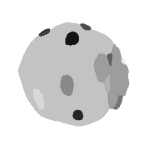

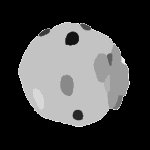

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the grayscale image
image_gray = cv2.imread('New_Image_Seg/im-006_new_seg.png', cv2.IMREAD_GRAYSCALE)

# Get the value of the first pixel
first_pixel_value = image_gray[0, 0]

# Create a mask with the same size as the image
mask_cocci = np.zeros_like(image_gray)
mask_fond = np.zeros_like(image_gray)
# Set pixels with the same value as the first pixel to 255 in the mask
mask_cocci[image_gray != first_pixel_value] = 255
#cv2_imshow(mask_cocci)
mask_fond[image_gray == first_pixel_value] = 255
#cv2_imshow(mask_fond)

# Apply the mask to the image
image_result_fond = cv2.bitwise_and(image_gray, mask_fond)
image_result_cocci = cv2.bitwise_and(image_gray, mask_cocci)

# Display the original and resulting image using cv2_imshow()
cv2_imshow(image_gray)
cv2_imshow(image_result_cocci)


Ici l'Application de notre masque sur l'image colorée AVANT / APRÈS

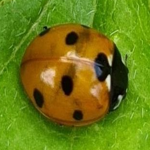

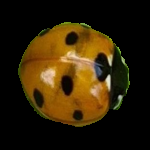

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the RGB colored image
image_rgb = cv2.imread('Resized_Image/im-006_im.png', cv2.IMREAD_COLOR)

# Get the value of the first pixel from the grayscale image
image_gray = cv2.imread('New_Image_Seg/im-006_new_seg.png', cv2.IMREAD_GRAYSCALE)
first_pixel_value = image_gray[0, 0]

# Create a mask with the same size as the RGB image
mask_cocci = np.zeros_like(image_rgb[:, :, 0])  # Create mask with the same width and height as the RGB image

# Set pixels with the same value as the first pixel to 255 in the mask
mask_cocci[image_gray != first_pixel_value] = 255

# Apply the mask to each channel of the RGB image
image_result_cocci = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cocci)

# Display the original RGB image and the resulting image using cv2_imshow()
cv2_imshow(image_rgb)
cv2_imshow(image_result_cocci)


### Ajout d'un fond blanc

On souhaite désormais après suppression du background, appliquer un second masque pour ajouter un fond blanc

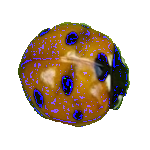

In [ ]:
background_pixel_value = image_result_cocci[0, 0]

# Create a mask for the background pixels
background_mask = (image_result_cocci == background_pixel_value)

# Set the background pixels to 255
image_result_cocci[background_mask] = 255

# Display the resulting image
cv2_imshow(image_result_cocci)

Création d'un dossier pour stocker nos images après suppression du background + ajout du fond blanc sur chacune des images

In [ ]:


folder_name3 = "No_Background_Image"
if not os.path.exists(folder_name3):
    os.makedirs(folder_name3)

for k in range(1, 201):
    try:
        # Load the RGB colored image
        image_rgb = cv2.imread(f'Resized_Image/im-{k:03}_im.png', cv2.IMREAD_COLOR)

        # Load the segmented grayscale image
        image_gray = cv2.imread(f'New_Image_Seg/im-{k:03}_new_seg.png', cv2.IMREAD_GRAYSCALE)

        # Check if image_gray is None (not loaded)
        if image_gray is None:
            raise Exception(f"Failed to load image: New_Image_Seg/im-{k:03}_new_seg.png")

        # Get the value of the first pixel from the grayscale image
        first_pixel_value = image_gray[0, 0]

        # Create a mask with the same size as the RGB image
        mask_cocci = np.zeros_like(image_rgb[:, :, 0])  # Create mask with the same width and height as the RGB image

        # Set pixels with the same value as the first pixel to 255 in the mask
        mask_cocci[image_gray != first_pixel_value] = 255

        # Apply the mask to each channel of the RGB image
        image_result_cocci = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cocci)

        # Display the original RGB image and the resulting image using cv2_imshow()
        #cv2_imshow(image_rgb)
        #cv2_imshow(image_result_cocci)



        background_pixel_value = image_result_cocci[0, 0]
        background_mask = (image_result_cocci == background_pixel_value)
        image_result_cocci[background_mask] = 255
        #cv2_imshow(image_result_cocci)

        save_path3 = os.path.join(folder_name3, fr"im-{k:03}_im.png")
        #mpimg.imsave(save_path3, image_result_cocci) # cette méthode de save renvoie des images teints bleu
        cv2.imwrite(save_path3, image_result_cocci) # cette méthode réduit l'effet lumière bleu en save




    except Exception as e:
        print(f"Error processing image {k}: {e}")


### Détection des couleurs dominantes RGB

On affiche l'histogramme à base d'un Kmeans des couleurs (on fixe pour cela un cluster à 4 couleurs) et l'on stocke le résultat (code couleur de la 2ème couleur et de la 3ème couleur dominante) au sein d'un dataframe appelée *df_colors*

L'idée de ne pas prendre en compte la première couleur dominante vient du fait que le background est majoritairement présent dans chaque image. On décide alors de l'isoler en prenant les autres couleurs restantes.

D'où la 2eme et la 3eme couleur

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.59181376  0.1027522   0.28928254]
   Code couleur RGB: [0.99722964 0.99502133 0.99321753]
   Nombre de pixels: 15317

Cluster 2:
   Code couleur Lab: [37.06911272 22.74706143 39.84089882]
   Code couleur RGB: [0.52243525 0.27880408 0.07870508]
   Nombre de pixels: 2838

Cluster 3:
   Code couleur Lab: [15.05326972  4.36653665  3.52008047]
   Code couleur RGB: [0.17952479 0.13928879 0.12943179]
   Nombre de pixels: 1202

Cluster 4:
   Code couleur Lab: [62.08748904 18.56187841 50.32778858]
   Code couleur RGB: [0.79426573 0.53266198 0.22918672]
   Nombre de pixels: 3143



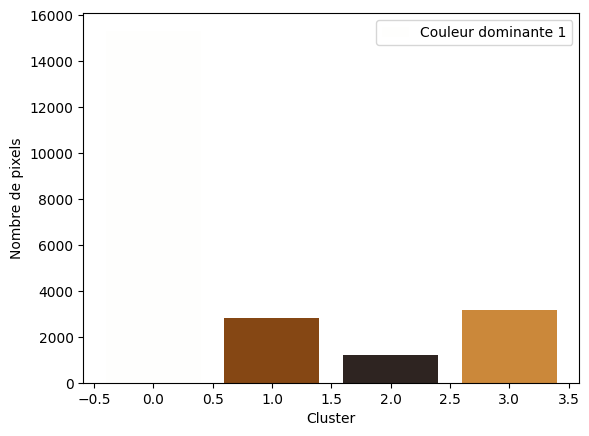

DataFrame pour l'image im-001_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97099755e+01 -3.68886661e-04  1.84287868e-01]
   Code couleur RGB: [0.99736246 0.99664531 0.99534139]
   Nombre de pixels: 11726

Cluster 2:
   Code couleur Lab: [33.36252669  1.28399895  1.30611292]
   Code couleur RGB: [0.31951823 0.30473673 0.29975288]
   Nombre de pixels: 2373

Cluster 3:
   Code couleur Lab: [57.85934884 20.45865068 48.81364295]
   Code couleur RGB: [0.75397115 0.48490432 0.20119897]
   Nombre de pixels: 8169

Cluster 4:
   Code couleur Lab: [ 54.69705728  64.19074389 -70.51881926]
   Code couleur RGB: [0.6695671  0.34050002 1.        ]
   Nombre de pixels: 232



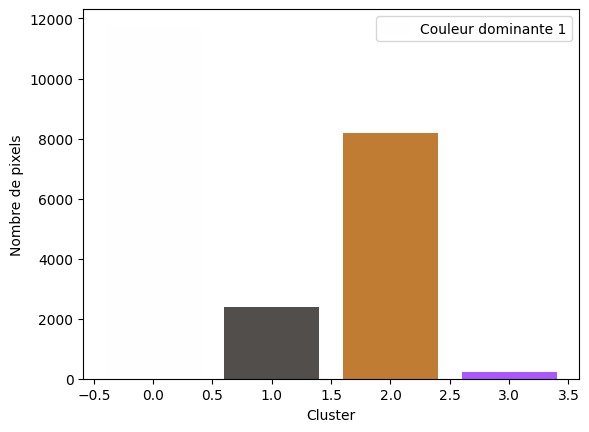

DataFrame pour l'image im-002_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [24.4110605   3.81191967 12.56979585]
   Code couleur RGB: [0.27470289 0.21745262 0.15408013]
   Nombre de pixels: 4363

Cluster 2:
   Code couleur Lab: [98.1645409   0.14581347  0.39198214]
   Code couleur RGB: [0.98174847 0.97870108 0.97626669]
   Nombre de pixels: 13295

Cluster 3:
   Code couleur Lab: [46.54537699 36.06898353 36.93619951]
   Code couleur RGB: [0.69330886 0.32385615 0.19440603]
   Nombre de pixels: 4391

Cluster 4:
   Code couleur Lab: [  35.39328381   80.24346287 -102.65188831]
   Code couleur RGB: [0.29063517 0.00248472 1.        ]
   Nombre de pixels: 451



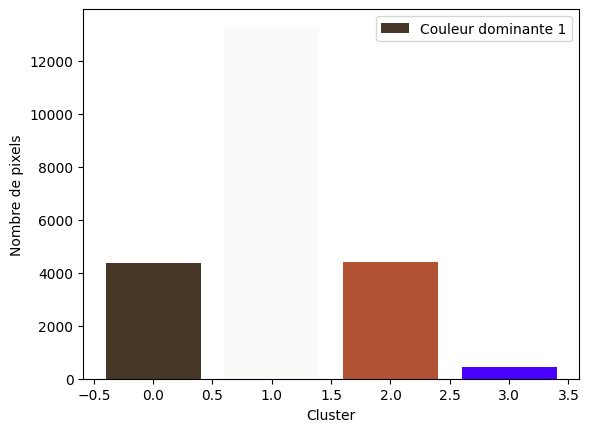

DataFrame pour l'image im-003_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [17.05876034  4.57485013 14.98124435]
   Code couleur RGB: [0.2143918  0.15340794 0.08080146]
   Nombre de pixels: 2585

Cluster 2:
   Code couleur Lab: [ 9.98653870e+01 -9.41450226e-02  6.81078272e-02]
   Code couleur RGB: [0.99795218 0.99867361 0.99797552]
   Nombre de pixels: 15395

Cluster 3:
   Code couleur Lab: [ 44.15838583  69.69483192 -88.175124  ]
   Code couleur RGB: [0.46558931 0.21854998 1.        ]
   Nombre de pixels: 977

Cluster 4:
   Code couleur Lab: [54.64637999 18.10639797 54.9473599 ]
   Code couleur RGB: [0.70827564 0.45893851 0.10686248]
   Nombre de pixels: 3543



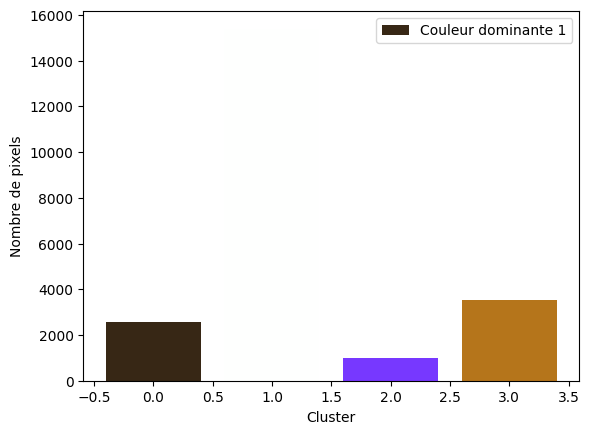

DataFrame pour l'image im-004_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.47671032  0.46634584  0.38322423]
   Code couleur RGB: [0.9878403  0.98146121 0.97991184]
   Nombre de pixels: 14413

Cluster 2:
   Code couleur Lab: [48.44200043 43.25794432 41.08429195]
   Code couleur RGB: [0.75372629 0.31282219 0.18430298]
   Nombre de pixels: 4547

Cluster 3:
   Code couleur Lab: [22.6736621   5.81658268 14.64000753]
   Code couleur RGB: [0.27165492 0.19797484 0.12779504]
   Nombre de pixels: 3074

Cluster 4:
   Code couleur Lab: [  34.93241636   78.89725537 -103.41743014]
   Code couleur RGB: [0.2485089  0.03179266 1.        ]
   Nombre de pixels: 466



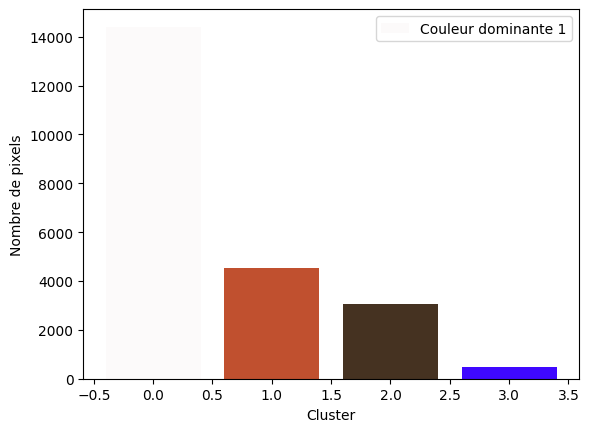

DataFrame pour l'image im-005_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [46.68431119 13.70359842 48.24386842]
   Code couleur RGB: [0.58972535 0.39386413 0.08834089]
   Nombre de pixels: 5928

Cluster 2:
   Code couleur Lab: [9.97114795e+01 3.39726992e-02 2.93131993e-01]
   Code couleur RGB: [0.99804589 0.99654661 0.99453759]
   Nombre de pixels: 13900

Cluster 3:
   Code couleur Lab: [ 43.85308242  66.37990478 -88.58848969]
   Code couleur RGB: [0.42507327 0.23765882 1.        ]
   Nombre de pixels: 1071

Cluster 4:
   Code couleur Lab: [14.2179075  -2.74586069 12.25223034]
   Code couleur RGB: [0.15009421 0.14392965 0.07302035]
   Nombre de pixels: 1601



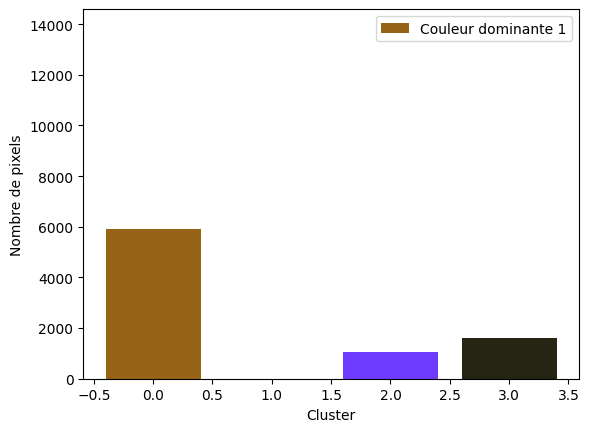

DataFrame pour l'image im-006_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
im-006_im.png  150,100,23   38,37,19  108,61,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.9468366   0.42929663  0.50736563]
   Code couleur RGB: [0.99331491 0.98684294 0.98429356]
   Nombre de pixels: 17577

Cluster 2:
   Code couleur Lab: [59.45255913 37.87185175 52.50154963]
   Code couleur RGB: [0.86760243 0.44435776 0.19417755]
   Nombre de pixels: 3053

Cluster 3:
   Code couleur Lab: [40.28289826  0.51069518 17.1719853 ]
   Code couleur RGB: [0.41535549 0.36758024 0.26264627]
   Nombre de pixels: 1402

Cluster 4:
   Code couleur Lab: [ 56.02002735  75.31735964 -68.31190007]
   Code couleur RGB: [0.77514645 0.28550701 1.        ]
   Nombre de pixels: 468



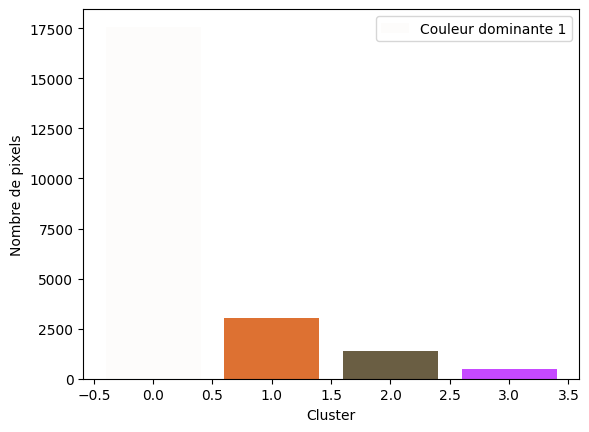

DataFrame pour l'image im-007_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
im-006_im.png  150,100,23   38,37,19  108,61,255
im-007_im.png  221,113,50  106,94,67  198,73,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95550525e+01 1.13075271e-01 3.29720362e-02]
   Code couleur RGB: [0.99598235 0.99465504 0.99474525]
   Nombre de pixels: 16061

Cluster 2:
   Code couleur Lab: [7.03851691 0.21047874 4.40810237]
   Code couleur RGB: [0.09654545 0.08322736 0.05640628]
   Nombre de pixels: 4807

Cluster 3:
   Code couleur Lab: [  36.79364645   77.9548279  -100.34256598]
   Code couleur RGB: [0.31752138 0.07291538 1.        ]
   Nombre de pixels: 746

Cluster 4:
   Code couleur Lab: [56.01395005 32.89687353 59.84290217]
   Code couleur RGB: [0.80427308 0.42645449 0.07515902]
   Nombre de pixels: 886



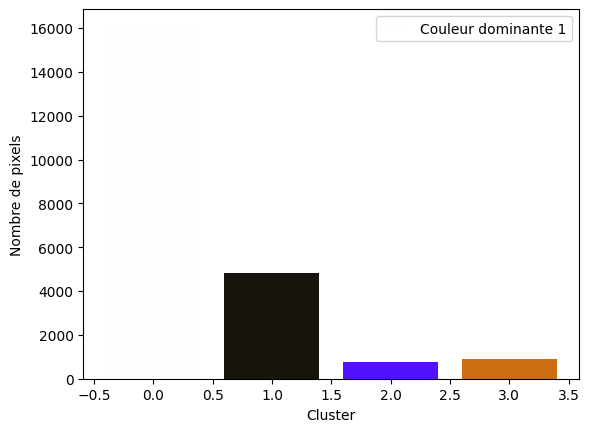

DataFrame pour l'image im-008_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.89528275e+01 -1.40118611e-02  7.02512317e-01]
   Code couleur RGB: [0.99049439 0.98792969 0.9828214 ]
   Nombre de pixels: 13711

Cluster 2:
   Code couleur Lab: [24.94537011  1.80555684 18.54997346]
   Code couleur RGB: [0.27727208 0.22526362 0.12162153]
   Nombre de pixels: 3816

Cluster 3:
   Code couleur Lab: [ 37.98753523  74.3593891  -98.36719462]
   Code couleur RGB: [0.31767009 0.13051554 1.        ]
   Nombre de pixels: 525

Cluster 4:
   Code couleur Lab: [61.79646688 14.64544624 53.29042668]
   Code couleur RGB: [0.77151948 0.54001285 0.19842553]
   Nombre de pixels: 4448



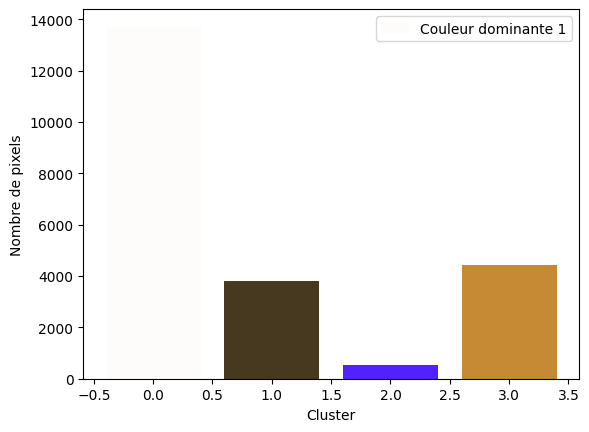

DataFrame pour l'image im-009_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.06779565  0.22496274  0.60099271]
   Code couleur RGB: [0.9933705  0.98868382 0.9849269 ]
   Nombre de pixels: 17289

Cluster 2:
   Code couleur Lab: [43.12912717 11.1516508  13.79054453]
   Code couleur RGB: [0.49971127 0.37124152 0.31240325]
   Nombre de pixels: 1564

Cluster 3:
   Code couleur Lab: [71.82383258 14.16522051 48.50106878]
   Code couleur RGB: [0.88150552 0.64523275 0.33882849]
   Nombre de pixels: 3583

Cluster 4:
   Code couleur Lab: [ 40.51249633  73.06070475 -94.05461969]
   Code couleur RGB: [0.39316133 0.16265079 1.        ]
   Nombre de pixels: 64



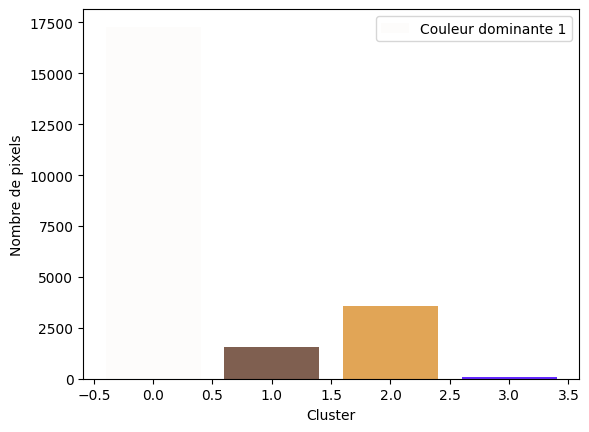

DataFrame pour l'image im-010_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.11319401  0.18574264  0.18900682]
   Code couleur RGB: [0.99210914 0.98941641 0.98855728]
   Nombre de pixels: 14361

Cluster 2:
   Code couleur Lab: [43.69581736 43.1182078  44.08067636]
   Code couleur RGB: [0.69776034 0.26475748 0.11765604]
   Nombre de pixels: 5580

Cluster 3:
   Code couleur Lab: [25.89288495  4.81953487 -2.11399595]
   Code couleur RGB: [0.26413828 0.23135033 0.25331537]
   Nombre de pixels: 2419

Cluster 4:
   Code couleur Lab: [ 37.28726356  79.09575389 -99.45079227]
   Code couleur RGB: [0.35122202 0.05587459 1.        ]
   Nombre de pixels: 140



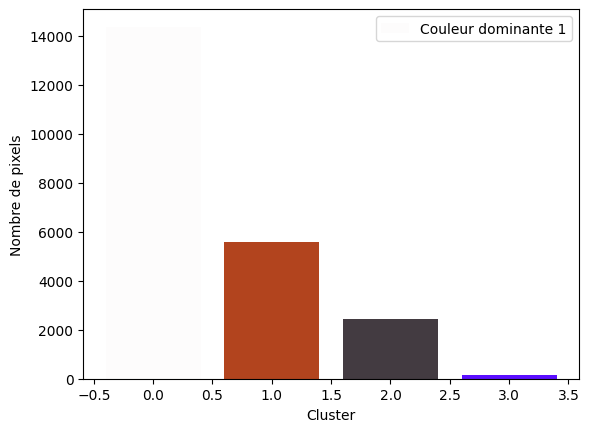

DataFrame pour l'image im-011_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
im-011_im.png   178,68,30    67,59,65   90,14,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.65794263 -0.49371941  0.8229456 ]
   Code couleur RGB: [0.99504269 0.99706081 0.98983672]
   Nombre de pixels: 14127

Cluster 2:
   Code couleur Lab: [55.49891439 44.39132437 59.75723007]
   Code couleur RGB: [0.85571038 0.3776288  0.08342963]
   Nombre de pixels: 6034

Cluster 3:
   Code couleur Lab: [ 39.35498744  76.34311702 -95.9923203 ]
   Code couleur RGB: [0.39104031 0.11942806 1.        ]
   Nombre de pixels: 495

Cluster 4:
   Code couleur Lab: [19.95911384  7.49296668 20.82063168]
   Code couleur RGB: [0.26050052 0.17055348 0.06826786]
   Nombre de pixels: 1844



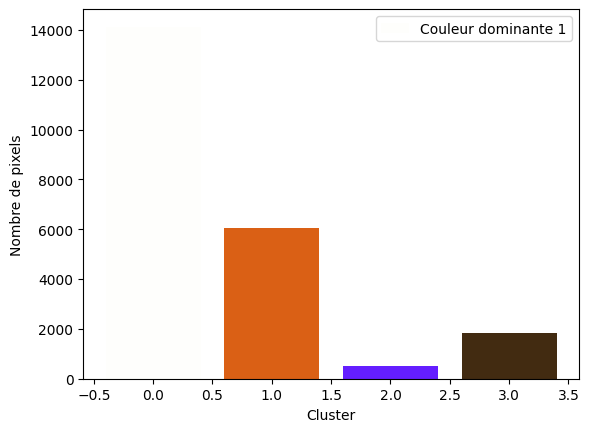

DataFrame pour l'image im-012_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
im-011_im.png   178,68,30    67,59,65   90,14,255
im-012_im.png   218,96,21    66,43,17  100,30,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [40.22787535 38.3884794  36.02196409]
   Code couleur RGB: [0.63012297 0.25240387 0.14583694]
   Nombre de pixels: 5337

Cluster 2:
   Code couleur Lab: [98.80361192  0.29746178 -0.1572863 ]
   Code couleur RGB: [0.988267   0.98573708 0.98768375]
   Nombre de pixels: 13872

Cluster 3:
   Code couleur Lab: [25.50080343  5.79883236 10.2749643 ]
   Code couleur RGB: [0.29171387 0.22315833 0.17717757]
   Nombre de pixels: 3075

Cluster 4:
   Code couleur Lab: [  34.38717837   79.09306915 -104.33095211]
   Code couleur RGB: [0.22243925 0.02080894 1.        ]
   Nombre de pixels: 216



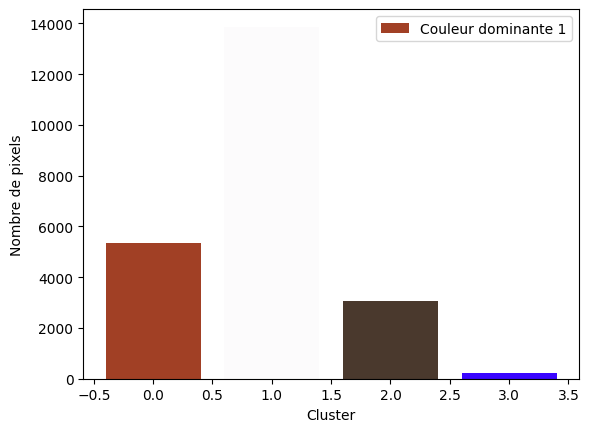

DataFrame pour l'image im-013_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
im-011_im.png   178,68,30    67,59,65   90,14,255
im-012_im.png   218,96,21    66,43,17  100,30,255
im-013_im.png   161,64,37    74,57,45    57,5,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [51.21547804 47.50937466 57.98328339]
   Code couleur RGB: [0.81683055 0.3197914  0.05573056]
   Nombre de pixels: 4432

Cluster 2:
   Code couleur Lab: [99.83612405 -0.13913425  0.17181553]
   Code couleur RGB: [0.99762509 0.99841933 0.99684975]
   Nombre de pixels: 15012

Cluster 3:
   Code couleur Lab: [ 46.01517115  77.87306504 -84.96307892]
   Code couleur RGB: [0.58304331 0.16606199 1.        ]
   Nombre de pixels: 1193

Cluster 4:
   Code couleur Lab: [10.91344941  9.9512522  10.41709518]
   Code couleur RGB: [0.17964719 0.0928292  0.05608692]
   Nombre de pixels: 1863



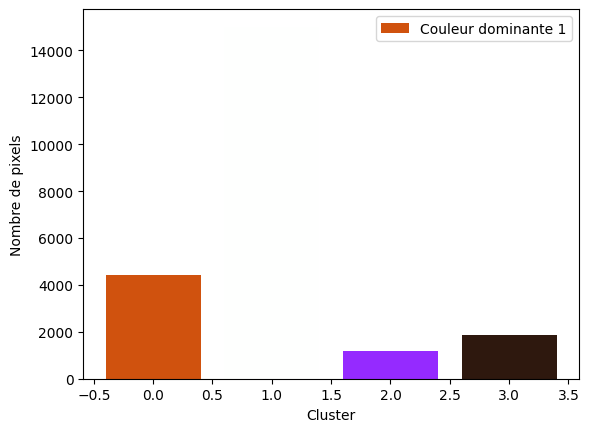

DataFrame pour l'image im-014_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
im-011_im.png   178,68,30    67,59,65   90,14,255
im-012_im.png   218,96,21    66,43,17  100,30,255
im-013_im.png   161,64,37    74,57,45    57,5,255
im-014_im.png   208,82,14    46,24,14  149,42,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.19994555  0.76250391 -0.25990363]
   Code couleur RGB: [0.98481223 0.97779823 0.98168177]
   Nombre de pixels: 12486

Cluster 2:
   Code couleur Lab: [29.34944841 15.63192399 28.06665113]
   Code couleur RGB: [0.39792232 0.23064391 0.0992649 ]
   Nombre de pixels: 4449

Cluster 3:
   Code couleur Lab: [57.27725512 19.39898559 35.13464348]
   Code couleur RGB: [0.7283674  0.48395478 0.30090304]
   Nombre de pixels: 2795

Cluster 4:
   Code couleur Lab: [28.98270037  7.1625693  -6.25033778]
   Code couleur RGB: [0.29476844 0.25481877 0.30600126]
   Nombre de pixels: 2770



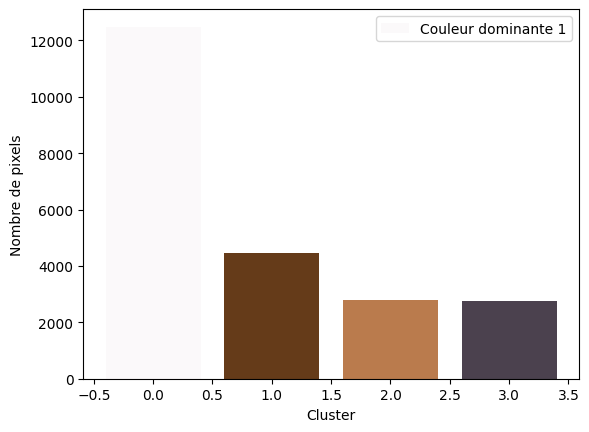

DataFrame pour l'image im-015_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
im-006_im.png  150,100,23    38,37,19  108,61,255
im-007_im.png  221,113,50   106,94,67  198,73,255
im-008_im.png    25,21,14  205,109,19   81,19,255
im-009_im.png  197,138,51    71,57,31   81,33,255
im-010_im.png  225,165,86   127,95,80  100,41,255
im-011_im.png   178,68,30    67,59,65   90,14,255
im-012_im.png   218,96,21    66,43,17  100,30,255
im-013_im.png   161,64,37    74,57,45    57,5,255
im-014_im.png   208,82,14    46,24,14  149,42,255
im-015_im.png   101,59,25  186,123,77    75,65,78
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.20173581 -0.46352753 10.4883244 ]
   Code couleur RGB: [0.59589685 0.56733902 0.4970858 ]
   Nombre de pixels: 1917

Cluster 2:
   Code couleur Lab: [43.37496829 29.41971519 36.19707407]
   Code couleur RGB: [0.623506   0.31707933 0.16866494]
   Nombre de pixels: 3545

Cluster 3:
   Code couleur Lab: [ 9.93960959e+01  1.03125166e-01 -2.28185554e-02]
   Code couleur RGB: [0.99389709 0.99289088 0.99336175]
   Nombre de pixels: 12641

Cluster 4:
   Code couleur Lab: [21.16093695  0.18450231  9.53860386]
   Code couleur RGB: [0.22111726 0.19707597 0.14452223]
   Nombre de pixels: 4397



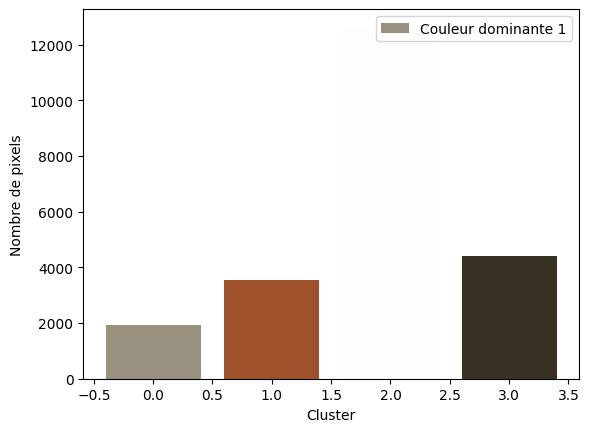

DataFrame pour l'image im-016_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [50.02001906 17.31937377 51.02176352]
   Code couleur RGB: [0.64819712 0.41615994 0.09774679]
   Nombre de pixels: 4482

Cluster 2:
   Code couleur Lab: [99.26538821 -0.16494056  0.29239072]
   Code couleur RGB: [0.99136439 0.99196359 0.9894516 ]
   Nombre de pixels: 13218

Cluster 3:
   Code couleur Lab: [ 39.45566382  72.78373609 -95.92686972]
   Code couleur RGB: [0.35298197 0.15709477 1.        ]
   Nombre de pixels: 1260

Cluster 4:
   Code couleur Lab: [14.42361203  6.83584167 12.94292819]
   Code couleur RGB: [0.19910921 0.12750548 0.07227358]
   Nombre de pixels: 3540



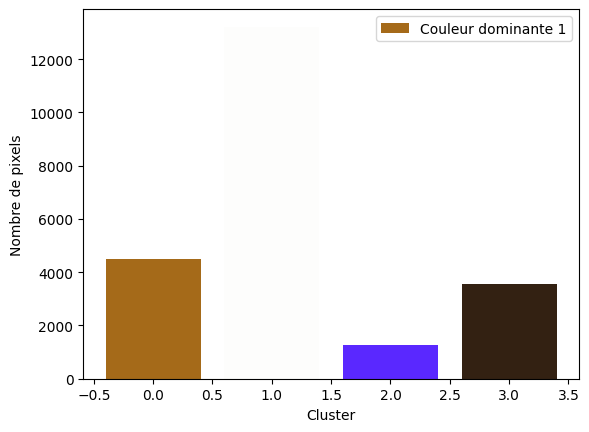

DataFrame pour l'image im-017_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.86304541 -0.23716836  0.14755237]
   Code couleur RGB: [0.99704768 0.99897035 0.99732608]
   Nombre de pixels: 15875

Cluster 2:
   Code couleur Lab: [ 55.82450767  79.11343392 -68.53027769]
   Code couleur RGB: [0.79724743 0.25464287 1.        ]
   Nombre de pixels: 1447

Cluster 3:
   Code couleur Lab: [51.01306099 53.11190641 59.474511  ]
   Code couleur RGB: [0.84172569 0.28913432 0.03800123]
   Nombre de pixels: 4008

Cluster 4:
   Code couleur Lab: [49.3310865  25.6722589  45.22271632]
   Code couleur RGB: [0.6795694  0.38567959 0.15135536]
   Nombre de pixels: 1170



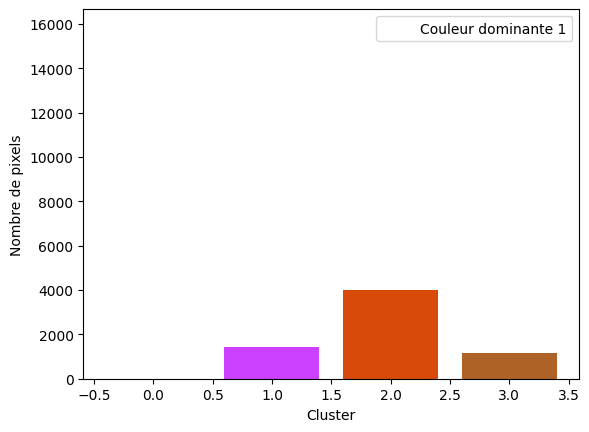

DataFrame pour l'image im-018_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.68934371 -0.53184958  0.2504602 ]
   Code couleur RGB: [0.99304673 0.9976794  0.99453089]
   Nombre de pixels: 16345

Cluster 2:
   Code couleur Lab: [6.49295275 0.24134574 3.59696075]
   Code couleur RGB: [0.09065151 0.07867748 0.05636529]
   Nombre de pixels: 4221

Cluster 3:
   Code couleur Lab: [  34.20099583   79.44576824 -104.65779531]
   Code couleur RGB: [0.21792039 0.01017911 1.        ]
   Nombre de pixels: 1164

Cluster 4:
   Code couleur Lab: [37.71062225 44.20646984 45.38517414]
   Code couleur RGB: [0.63163067 0.19754241 0.04807286]
   Nombre de pixels: 770



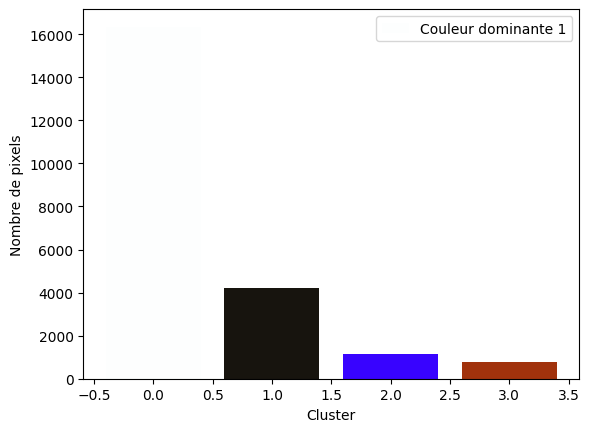

DataFrame pour l'image im-019_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [30.72477723 26.83376014 29.00387887]
   Code couleur RGB: [0.46514069 0.20832089 0.1086372 ]
   Nombre de pixels: 3685

Cluster 2:
   Code couleur Lab: [99.46281849 -0.14663726  0.19790692]
   Code couleur RGB: [0.99341705 0.99418883 0.99241107]
   Nombre de pixels: 15887

Cluster 3:
   Code couleur Lab: [ 37.71796303  76.49687744 -98.72675562]
   Code couleur RGB: [0.33576008 0.10305488 1.        ]
   Nombre de pixels: 717

Cluster 4:
   Code couleur Lab: [21.13213955  4.02406594  3.90486377]
   Code couleur RGB: [0.23121336 0.1904523  0.17720101]
   Nombre de pixels: 2211



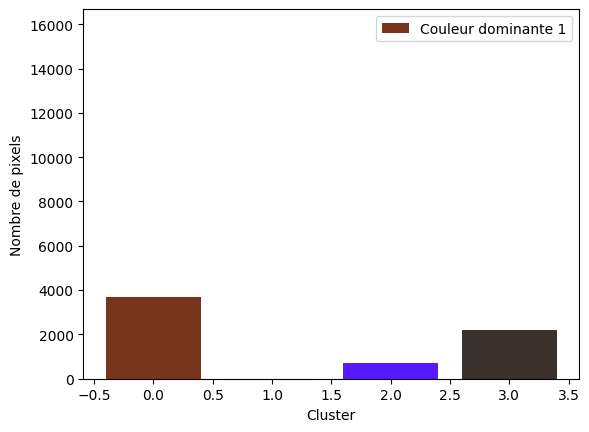

DataFrame pour l'image im-020_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.99028168e+01 -3.73549131e-02  9.85268145e-02]
   Code couleur RGB: [0.99894761 0.99895208 0.99817798]
   Nombre de pixels: 15810

Cluster 2:
   Code couleur Lab: [13.56198449  4.6849788  14.620178  ]
   Code couleur RGB: [0.18391857 0.12480278 0.05153804]
   Nombre de pixels: 1610

Cluster 3:
   Code couleur Lab: [ 45.44648555  74.79366838 -85.86445087]
   Code couleur RGB: [0.5450887  0.18965408 1.        ]
   Nombre de pixels: 1248

Cluster 4:
   Code couleur Lab: [44.79080871 38.22886658 52.30501245]
   Code couleur RGB: [0.69146959 0.29609239 0.03770493]
   Nombre de pixels: 3832



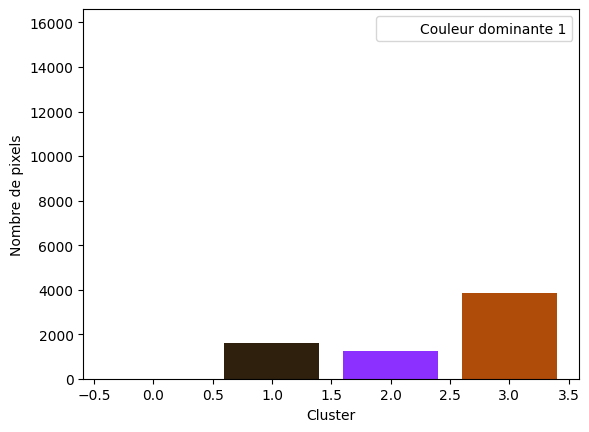

DataFrame pour l'image im-021_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [96.9876289   1.03162378  0.65323658]
   Code couleur RGB: [0.97644993 0.96316779 0.96111832]
   Nombre de pixels: 12943

Cluster 2:
   Code couleur Lab: [43.13360415 38.8477417  40.2623123 ]
   Code couleur RGB: [0.66884096 0.27855831 0.14043019]
   Nombre de pixels: 5637

Cluster 3:
   Code couleur Lab: [16.02218202 -5.15506459 10.01064208]
   Code couleur RGB: [0.14821001 0.16289633 0.09978245]
   Nombre de pixels: 3285

Cluster 4:
   Code couleur Lab: [ 47.74544298  78.22455601 -81.92182859]
   Code couleur RGB: [0.6259535  0.17955443 1.        ]
   Nombre de pixels: 635



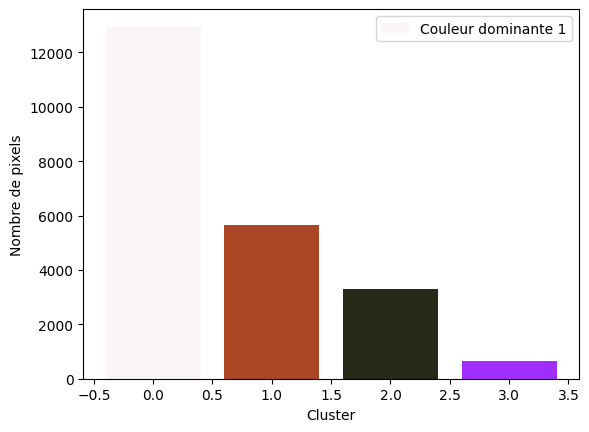

DataFrame pour l'image im-022_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [14.74505705  3.37996677 -0.91761581]
   Code couleur RGB: [0.16244481 0.13966244 0.15097038]
   Nombre de pixels: 4331

Cluster 2:
   Code couleur Lab: [ 9.82804444e+01  8.68258406e-01 -3.86073278e-02]
   Code couleur RGB: [0.98736046 0.978386   0.98093531]
   Nombre de pixels: 11368

Cluster 3:
   Code couleur Lab: [58.9261729  24.05224186 58.84407372]
   Code couleur RGB: [0.79282836 0.48402522 0.11648888]
   Nombre de pixels: 4124

Cluster 4:
   Code couleur Lab: [46.63858211  3.24106483 27.69811277]
   Code couleur RGB: [0.51215679 0.42087223 0.25034325]
   Nombre de pixels: 2677



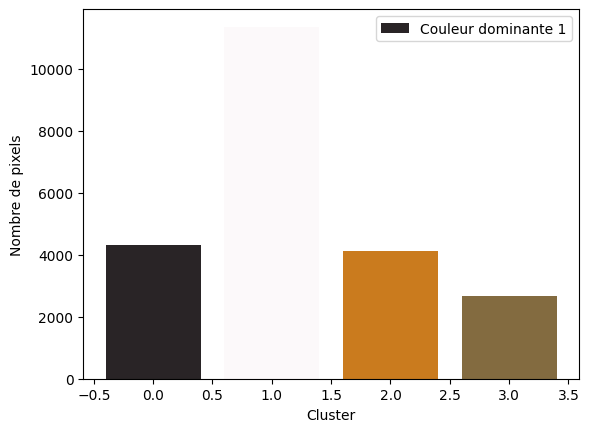

DataFrame pour l'image im-023_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 57.82943232  15.47619156 -31.28274315]
   Code couleur RGB: [0.5358976  0.51929671 0.75918116]
   Nombre de pixels: 1049

Cluster 2:
   Code couleur Lab: [10.17304836  1.18850868  5.6069934 ]
   Code couleur RGB: [0.1267791  0.10597582 0.07928977]
   Nombre de pixels: 6056

Cluster 3:
   Code couleur Lab: [ 9.97036580e+01  2.18881239e-02 -6.71271319e-02]
   Code couleur RGB: [0.99657289 0.99659441 0.99717991]
   Nombre de pixels: 11863

Cluster 4:
   Code couleur Lab: [38.03022355 16.18127022 33.57579542]
   Code couleur RGB: [0.49674219 0.30726766 0.13507751]
   Nombre de pixels: 3532



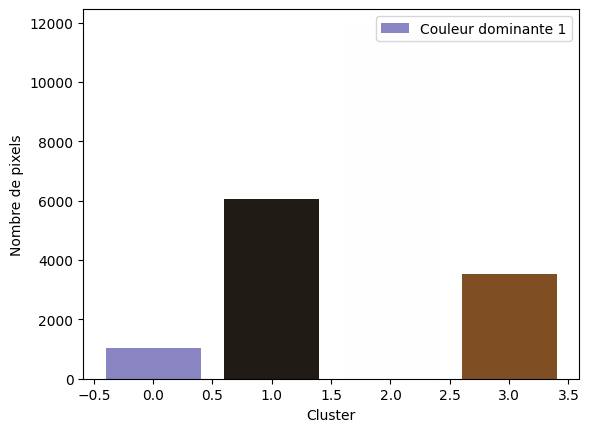

DataFrame pour l'image im-024_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98019937e+01 9.89317825e-02 1.15201420e-01]
   Code couleur RGB: [0.99896713 0.99747016 0.99692477]
   Nombre de pixels: 13146

Cluster 2:
   Code couleur Lab: [21.70457459 -8.51701768 15.40755134]
   Code couleur RGB: [0.18607035 0.21565654 0.11264571]
   Nombre de pixels: 6681

Cluster 3:
   Code couleur Lab: [60.55336227 13.45475782 52.35993612]
   Code couleur RGB: [0.74963182 0.53067489 0.19361452]
   Nombre de pixels: 1691

Cluster 4:
   Code couleur Lab: [53.02863522  1.22503549 -3.31426963]
   Code couleur RGB: [0.49446148 0.49466132 0.51865468]
   Nombre de pixels: 982



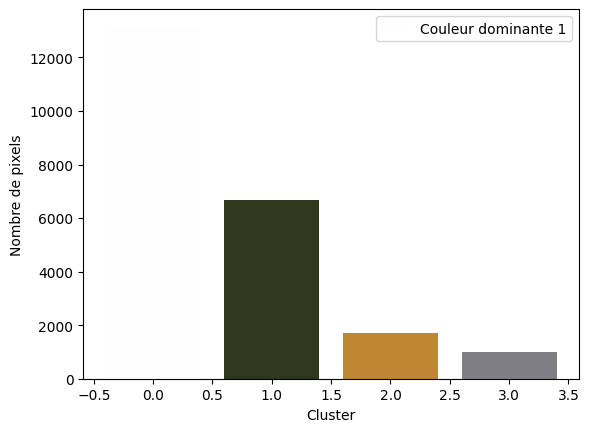

DataFrame pour l'image im-025_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95055496e+01 1.56878259e-02 3.94648615e-01]
   Code couleur RGB: [0.99591906 0.99422179 0.99142703]
   Nombre de pixels: 16232

Cluster 2:
   Code couleur Lab: [50.55864118 58.10617811 57.62765376]
   Code couleur RGB: [0.85902452 0.25476637 0.06717071]
   Nombre de pixels: 4167

Cluster 3:
   Code couleur Lab: [17.94523884  4.28528354 10.43202366]
   Code couleur RGB: [0.21536421 0.16196285 0.11403574]
   Nombre de pixels: 1745

Cluster 4:
   Code couleur Lab: [ 43.54548022  79.94378233 -89.00577821]
   Code couleur RGB: [0.54105147 0.11491089 1.        ]
   Nombre de pixels: 356



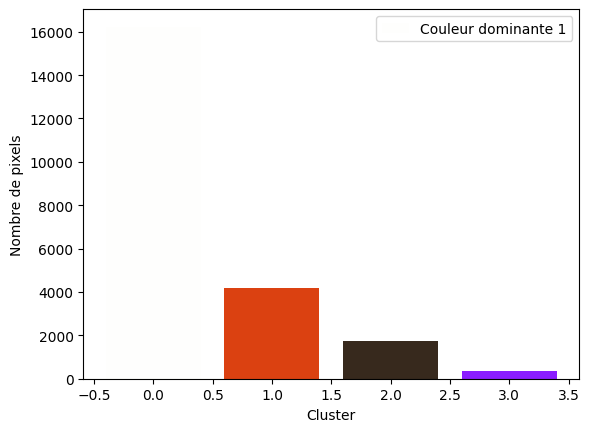

DataFrame pour l'image im-026_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91084914e+01 -2.00829200e-02  5.97422732e-01]
   Code couleur RGB: [0.99184023 0.9897414  0.98538097]
   Nombre de pixels: 15857

Cluster 2:
   Code couleur Lab: [66.36180164  9.80209328 47.67359519]
   Code couleur RGB: [0.79127332 0.59988071 0.28981199]
   Nombre de pixels: 4133

Cluster 3:
   Code couleur Lab: [26.95613589  1.23917981 12.48717146]
   Code couleur RGB: [0.28421877 0.2448986  0.17548845]
   Nombre de pixels: 2228

Cluster 4:
   Code couleur Lab: [  35.25876062   78.21092145 -102.87745326]
   Code couleur RGB: [0.25364815 0.05207229 1.        ]
   Nombre de pixels: 282



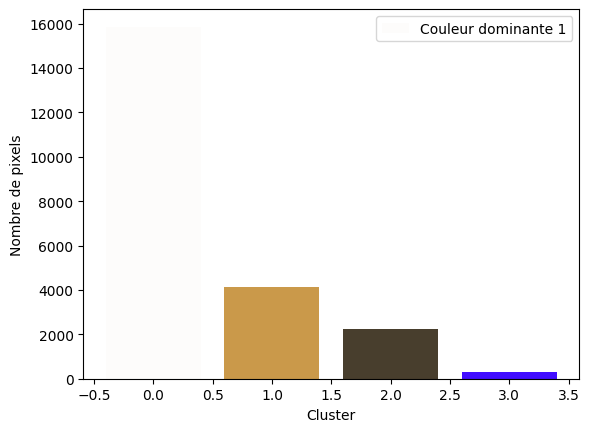

DataFrame pour l'image im-027_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.62622372  0.35252232  0.64298165]
   Code couleur RGB: [0.98953517 0.98335485 0.97962368]
   Nombre de pixels: 12344

Cluster 2:
   Code couleur Lab: [30.6058283  -1.42377245 26.25673766]
   Code couleur RGB: [0.32291309 0.28077273 0.11723109]
   Nombre de pixels: 5428

Cluster 3:
   Code couleur Lab: [51.84062848 38.2817066  51.60777456]
   Code couleur RGB: [0.7764594  0.36603277 0.12664087]
   Nombre de pixels: 4316

Cluster 4:
   Code couleur Lab: [ 54.39774144  67.31568378 -71.02366758]
   Code couleur RGB: [0.68642728 0.32085024 1.        ]
   Nombre de pixels: 412



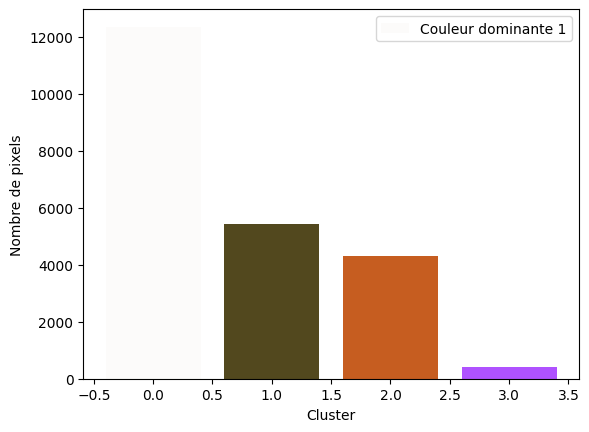

DataFrame pour l'image im-028_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.8939429  -0.11060115  0.53984746]
   Code couleur RGB: [0.98846956 0.98754404 0.98337251]
   Nombre de pixels: 12750

Cluster 2:
   Code couleur Lab: [10.93718474 -1.61460304  6.07355588]
   Code couleur RGB: [0.119267   0.11663729 0.0825867 ]
   Nombre de pixels: 8739

Cluster 3:
   Code couleur Lab: [46.7073401  52.60135151 50.14502295]
   Code couleur RGB: [0.78180017 0.24615617 0.10015379]
   Nombre de pixels: 879

Cluster 4:
   Code couleur Lab: [  33.28839748   77.03068258 -106.19127468]
   Code couleur RGB: [0.06787311 0.05748408 1.        ]
   Nombre de pixels: 132



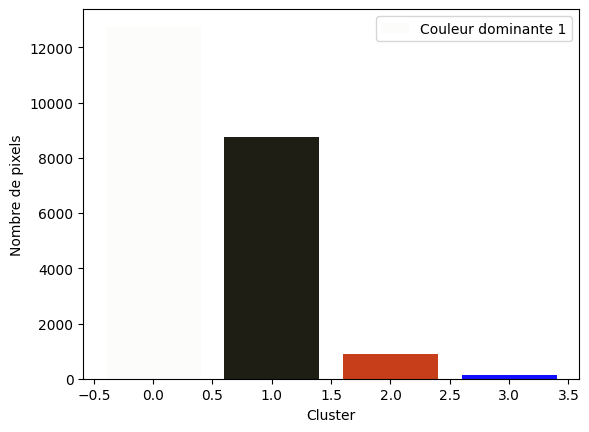

DataFrame pour l'image im-029_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98382011e+01 1.23669556e-01 6.79923397e-02]
   Code couleur RGB: [0.99941086 0.99783553 0.99769785]
   Nombre de pixels: 16034

Cluster 2:
   Code couleur Lab: [70.09991987 20.05904409 71.00881082]
   Code couleur RGB: [0.9137196  0.60852762 0.09126108]
   Nombre de pixels: 4508

Cluster 3:
   Code couleur Lab: [22.46649413  4.87726569 24.33646892]
   Code couleur RGB: [0.27495045 0.19700905 0.06398805]
   Nombre de pixels: 1045

Cluster 4:
   Code couleur Lab: [ 55.59979888  63.22262598 -69.43869769]
   Code couleur RGB: [0.67881316 0.35391509 1.        ]
   Nombre de pixels: 913



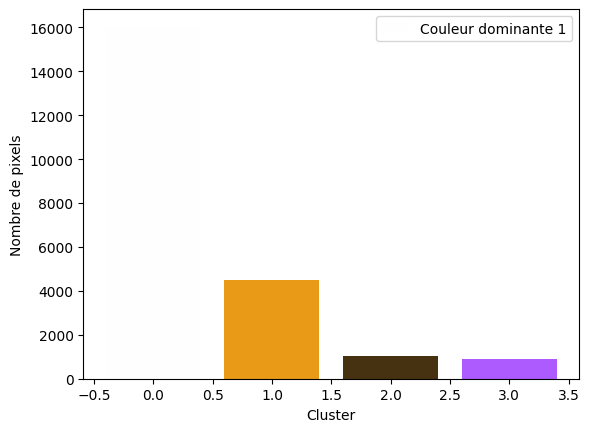

DataFrame pour l'image im-030_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [97.45645676  0.89079649  0.91745639]
   Code couleur RGB: [0.9815526  0.96872749 0.9643972 ]
   Nombre de pixels: 14755

Cluster 2:
   Code couleur Lab: [50.06781325 39.85622831 47.64956974]
   Code couleur RGB: [0.76062622 0.34255628 0.14573373]
   Nombre de pixels: 4123

Cluster 3:
   Code couleur Lab: [ 50.96294061  78.706634   -76.57291815]
   Code couleur RGB: [0.69804519 0.20786405 1.        ]
   Nombre de pixels: 927

Cluster 4:
   Code couleur Lab: [42.40791785  0.80341025 -3.28999354]
   Code couleur RGB: [0.38771    0.39167743 0.4136146 ]
   Nombre de pixels: 2695



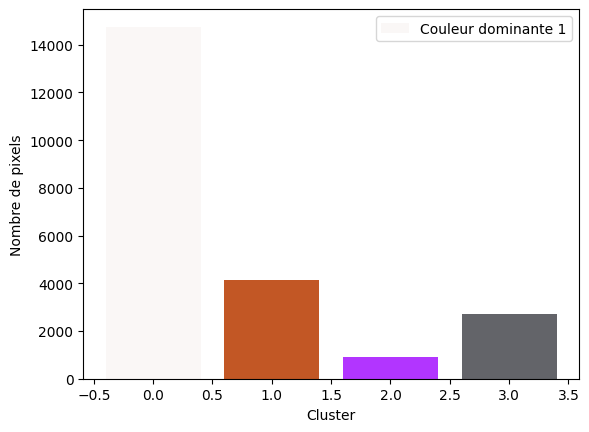

DataFrame pour l'image im-031_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [56.13551439 29.55013072 54.30948302]
   Code couleur RGB: [0.78551046 0.43940898 0.1387565 ]
   Nombre de pixels: 7035

Cluster 2:
   Code couleur Lab: [ 9.88511821e+01 -8.92127902e-02  5.43562110e-01]
   Code couleur RGB: [0.98817068 0.98700618 0.98286279]
   Nombre de pixels: 13133

Cluster 3:
   Code couleur Lab: [14.42054336  5.05141378  3.49966978]
   Code couleur RGB: [0.17755731 0.132798   0.12456291]
   Nombre de pixels: 2199

Cluster 4:
   Code couleur Lab: [ 40.55736572  76.15112364 -94.00888303]
   Code couleur RGB: [0.42630774 0.13245647 1.        ]
   Nombre de pixels: 133



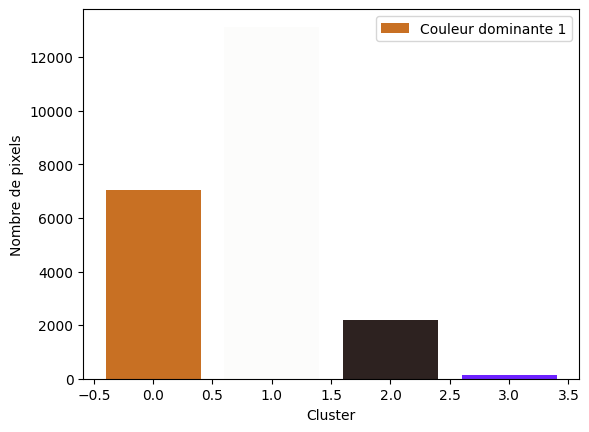

DataFrame pour l'image im-032_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.9804688e+01  4.1352468e-02 -4.2519573e-02]
   Code couleur RGB: [0.99796697 0.99768772 0.99814402]
   Nombre de pixels: 17569

Cluster 2:
   Code couleur Lab: [41.21371781 35.37026287 34.53494673]
   Code couleur RGB: [0.62632556 0.27471229 0.16379015]
   Nombre de pixels: 2644

Cluster 3:
   Code couleur Lab: [59.07992745 20.06742277 -0.68999202]
   Code couleur RGB: [0.69006108 0.50843137 0.56482159]
   Nombre de pixels: 1073

Cluster 4:
   Code couleur Lab: [28.29520772  2.64700178  5.50624435]
   Code couleur RGB: [0.29126747 0.25526481 0.22913485]
   Nombre de pixels: 1214



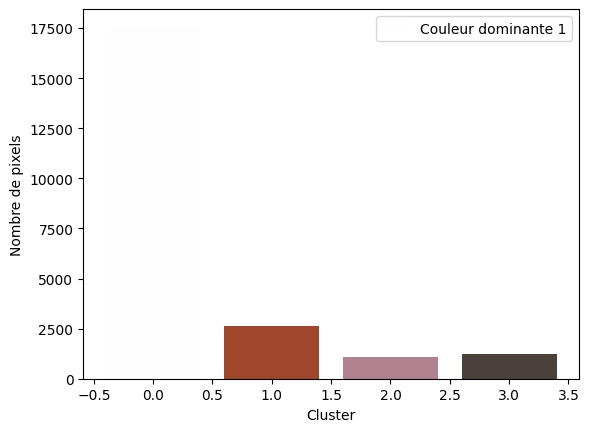

DataFrame pour l'image im-033_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.92851429e+01 2.38569439e-03 1.04652233e+00]
   Code couleur RGB: [0.99561298 0.99155889 0.98398334]
   Nombre de pixels: 15574

Cluster 2:
   Code couleur Lab: [35.33484938  6.3698297  27.25317127]
   Code couleur RGB: [0.41256221 0.30738802 0.15334157]
   Nombre de pixels: 2990

Cluster 3:
   Code couleur Lab: [ 45.40685629  77.59847006 -85.93392488]
   Code couleur RGB: [0.56687444 0.16275609 1.        ]
   Nombre de pixels: 819

Cluster 4:
   Code couleur Lab: [51.38150161 46.98918445 57.14427101]
   Code couleur RGB: [0.81604887 0.32403465 0.06898708]
   Nombre de pixels: 3117



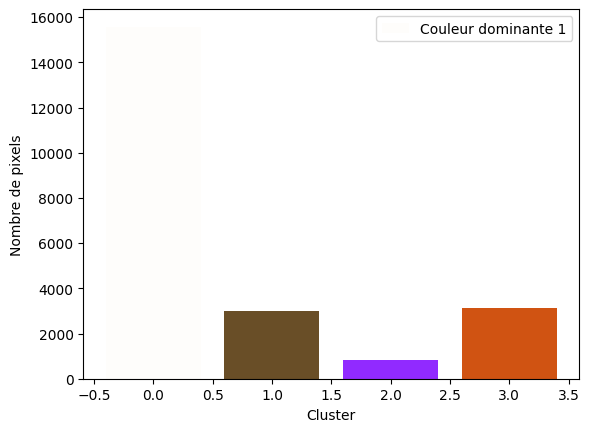

DataFrame pour l'image im-034_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.78789786 -0.21667092  0.40665819]
   Code couleur RGB: [0.99728583 0.99798956 0.99450912]
   Nombre de pixels: 12955

Cluster 2:
   Code couleur Lab: [21.43269734 16.66329882 22.50424537]
   Code couleur RGB: [0.31767215 0.15961459 0.07204409]
   Nombre de pixels: 2828

Cluster 3:
   Code couleur Lab: [ 46.44687269  79.40892901 -84.1008105 ]
   Code couleur RGB: [0.60572325 0.15348373 1.        ]
   Nombre de pixels: 783

Cluster 4:
   Code couleur Lab: [44.17390566 45.63188068 51.7818554 ]
   Code couleur RGB: [0.71865855 0.25658137 0.04753932]
   Nombre de pixels: 5934



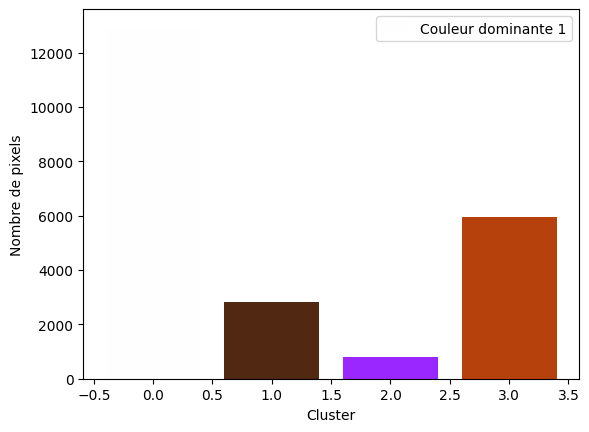

DataFrame pour l'image im-035_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [28.22371084 11.16012973 15.57922672]
   Code couleur RGB: [0.35270827 0.23389327 0.16919122]
   Nombre de pixels: 1794

Cluster 2:
   Code couleur Lab: [70.14651263 20.31476565 60.0778039 ]
   Code couleur RGB: [0.90810212 0.60935725 0.22497321]
   Nombre de pixels: 4043

Cluster 3:
   Code couleur Lab: [  36.48060231   77.55930828 -100.80241515]
   Code couleur RGB: [0.30033265 0.07625557 1.        ]
   Nombre de pixels: 385

Cluster 4:
   Code couleur Lab: [ 9.93294005e+01 -9.74842955e-02  3.64363056e-01]
   Code couleur RGB: [0.99289413 0.99250536 0.98964181]
   Nombre de pixels: 16278



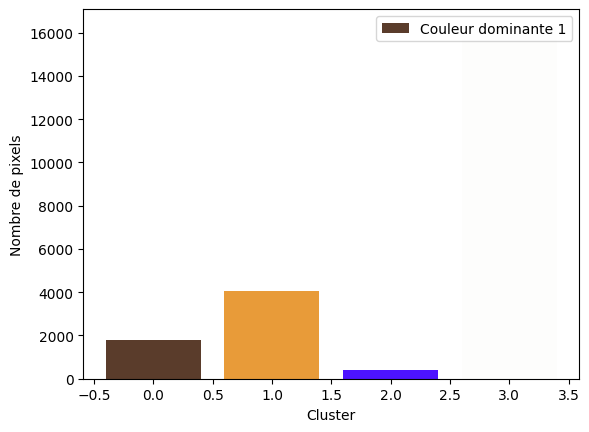

DataFrame pour l'image im-036_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.92236347e+01 -4.65167881e-02  3.72936857e-03]
   Code couleur RGB: [0.99082055 0.99128843 0.99118189]
   Nombre de pixels: 14059

Cluster 2:
   Code couleur Lab: [ 49.82019906  56.69897631 -78.92194294]
   Code couleur RGB: [0.49320947 0.33590296 1.        ]
   Nombre de pixels: 1348

Cluster 3:
   Code couleur Lab: [53.61021623  1.79740088 54.73098166]
   Code couleur RGB: [0.60680648 0.48932129 0.0830328 ]
   Nombre de pixels: 3225

Cluster 4:
   Code couleur Lab: [20.26157742 -7.17726139 18.45280737]
   Code couleur RGB: [0.18613221 0.20078465 0.08224462]
   Nombre de pixels: 3868



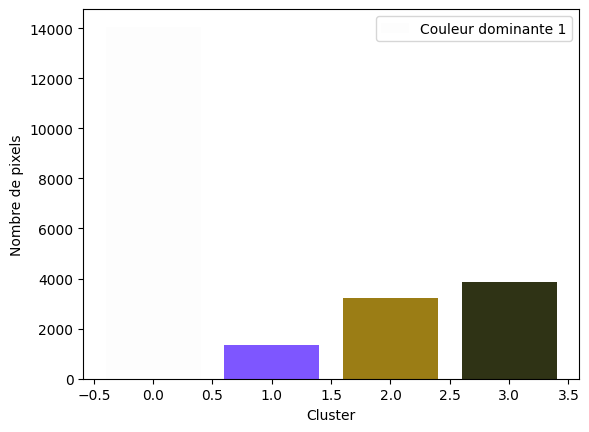

DataFrame pour l'image im-037_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.96612618e+01 2.35362538e-01 4.62891134e-02]
   Code couleur RGB: [0.99822783 0.99556013 0.99586772]
   Nombre de pixels: 16052

Cluster 2:
   Code couleur Lab: [16.37057912  9.31508394 14.58792885]
   Code couleur RGB: [0.22961573 0.13750726 0.07880019]
   Nombre de pixels: 2342

Cluster 3:
   Code couleur Lab: [66.15603689 22.83891588 62.38885112]
   Code couleur RGB: [0.87559205 0.56061953 0.15938002]
   Nombre de pixels: 3230

Cluster 4:
   Code couleur Lab: [ 38.39860047  76.23977312 -97.66646252]
   Code couleur RGB: [0.35655269 0.11254407 1.        ]
   Nombre de pixels: 876



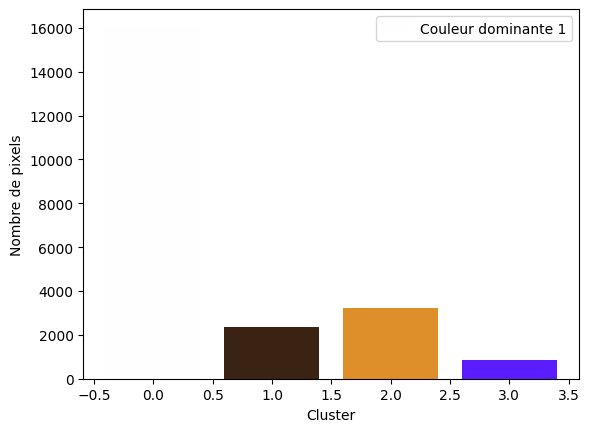

DataFrame pour l'image im-038_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.431576    0.9695841   0.71865093]
   Code couleur RGB: [0.99254959 0.97962518 0.97693406]
   Nombre de pixels: 16235

Cluster 2:
   Code couleur Lab: [58.72908551 16.10237297 52.6327205 ]
   Code couleur RGB: [0.7433539  0.50526482 0.17377495]
   Nombre de pixels: 3653

Cluster 3:
   Code couleur Lab: [27.70084969  5.31304844 14.11914801]
   Code couleur RGB: [0.31569129 0.24284818 0.17257613]
   Nombre de pixels: 2481

Cluster 4:
   Code couleur Lab: [ 37.83871494  72.86521343 -98.54736031]
   Code couleur RGB: [0.29204383 0.14392974 1.        ]
   Nombre de pixels: 131



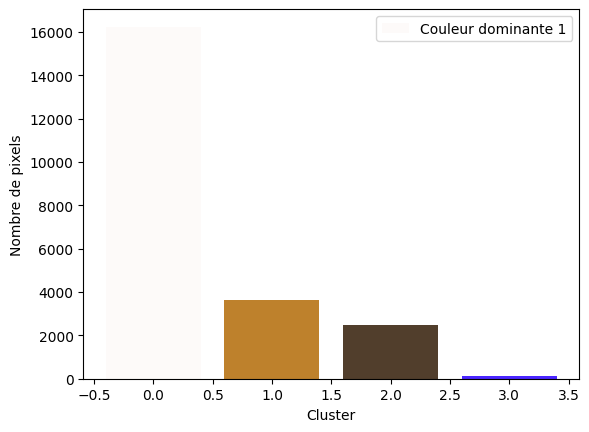

DataFrame pour l'image im-039_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [52.16625492  2.78474233 40.84529133]
   Code couleur RGB: [0.58420556 0.47419031 0.20449949]
   Nombre de pixels: 2608

Cluster 2:
   Code couleur Lab: [ 9.93489114e+01 -4.93530604e-02  9.41047404e-01]
   Code couleur RGB: [0.99554803 0.99243941 0.98549843]
   Nombre de pixels: 12330

Cluster 3:
   Code couleur Lab: [60.14687631 38.93726587 62.06796177]
   Code couleur RGB: [0.88714559 0.44642563 0.10583568]
   Nombre de pixels: 6755

Cluster 4:
   Code couleur Lab: [ 61.99110593  66.48275366 -58.56317476]
   Code couleur RGB: [0.82852707 0.39546643 1.        ]
   Nombre de pixels: 807



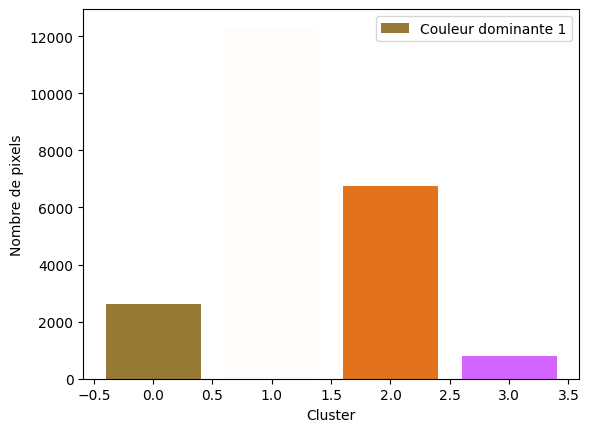

DataFrame pour l'image im-040_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [65.32987888 19.60149631  5.60709846]
   Code couleur RGB: [0.77011837 0.571742   0.58577011]
   Nombre de pixels: 1931

Cluster 2:
   Code couleur Lab: [42.12770722 45.19794596 45.8211871 ]
   Code couleur RGB: [0.68940691 0.23828877 0.08926725]
   Nombre de pixels: 5953

Cluster 3:
   Code couleur Lab: [99.76279988 -0.18575138  0.17150343]
   Code couleur RGB: [0.99641222 0.99769924 0.99601256]
   Nombre de pixels: 12264

Cluster 4:
   Code couleur Lab: [17.03965662  2.87994808  6.20943074]
   Code couleur RGB: [0.19372373 0.15795492 0.13037001]
   Nombre de pixels: 2352



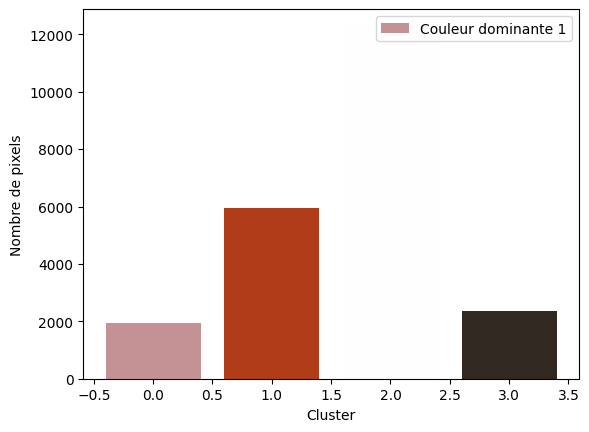

DataFrame pour l'image im-041_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [44.54032204 37.54624611 45.20857207]
   Code couleur RGB: [0.68197665 0.29715955 0.11242844]
   Nombre de pixels: 5101

Cluster 2:
   Code couleur Lab: [98.8638893  -0.2174949   0.72216075]
   Code couleur RGB: [0.98791009 0.98740815 0.98163639]
   Nombre de pixels: 13340

Cluster 3:
   Code couleur Lab: [ 46.13277156  77.43901328 -84.63919046]
   Code couleur RGB: [0.58323018 0.17132942 1.        ]
   Nombre de pixels: 831

Cluster 4:
   Code couleur Lab: [17.42722572  6.63420349  8.83612144]
   Code couleur RGB: [0.22002651 0.15305778 0.11931844]
   Nombre de pixels: 3228



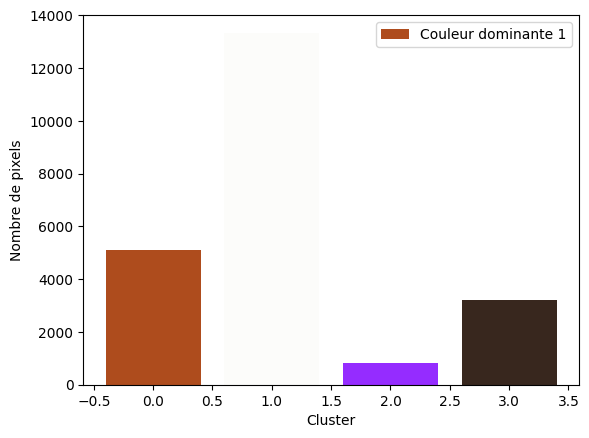

DataFrame pour l'image im-042_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.37488796 -0.27467311  0.58155828]
   Code couleur RGB: [0.99274703 0.99338684 0.98848664]
   Nombre de pixels: 13429

Cluster 2:
   Code couleur Lab: [64.4989188   7.76900875 55.03124933]
   Code couleur RGB: [0.76514599 0.58493402 0.20680292]
   Nombre de pixels: 4823

Cluster 3:
   Code couleur Lab: [31.03664042 -6.850998   18.03086125]
   Code couleur RGB: [0.28433323 0.29562308 0.17437432]
   Nombre de pixels: 2158

Cluster 4:
   Code couleur Lab: [68.75141141 -8.51485846 26.14033626]
   Code couleur RGB: [0.66702336 0.67015972 0.47103124]
   Nombre de pixels: 2090



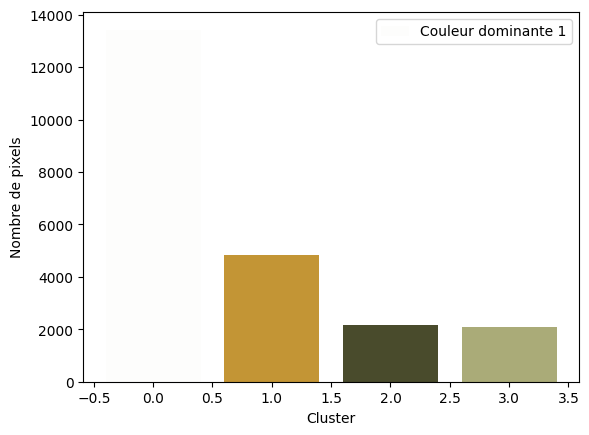

DataFrame pour l'image im-043_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94469261e+01  1.35496618e-01 -9.32304849e-02]
   Code couleur RGB: [0.99448522 0.99341037 0.99447726]
   Nombre de pixels: 13916

Cluster 2:
   Code couleur Lab: [44.89941034 43.42108737 38.94957274]
   Code couleur RGB: [0.71075475 0.27637804 0.1682279 ]
   Nombre de pixels: 3846

Cluster 3:
   Code couleur Lab: [24.06163941  5.71945166  9.2910891 ]
   Code couleur RGB: [0.27638239 0.21100865 0.17086274]
   Nombre de pixels: 3025

Cluster 4:
   Code couleur Lab: [62.13161983 24.89607906 -7.44599528]
   Code couleur RGB: [0.73604681 0.52794701 0.64300141]
   Nombre de pixels: 1713



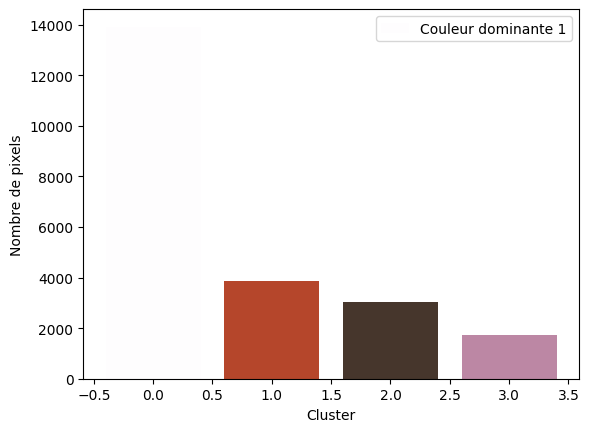

DataFrame pour l'image im-044_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 49.44655253  58.40216737 -79.3986638 ]
   Code couleur RGB: [0.50062473 0.32483795 1.        ]
   Nombre de pixels: 333

Cluster 2:
   Code couleur Lab: [53.88078184  0.78092833 47.75277606]
   Code couleur RGB: [0.59819666 0.49488329 0.16173926]
   Nombre de pixels: 7824

Cluster 3:
   Code couleur Lab: [9.80471150e+01 2.83798338e-04 4.61971498e-01]
   Code couleur RGB: [0.97949179 0.97770337 0.97438859]
   Nombre de pixels: 12423

Cluster 4:
   Code couleur Lab: [21.41941989 -2.2883412  14.59857848]
   Code couleur RGB: [0.21805196 0.20300666 0.11635491]
   Nombre de pixels: 1920



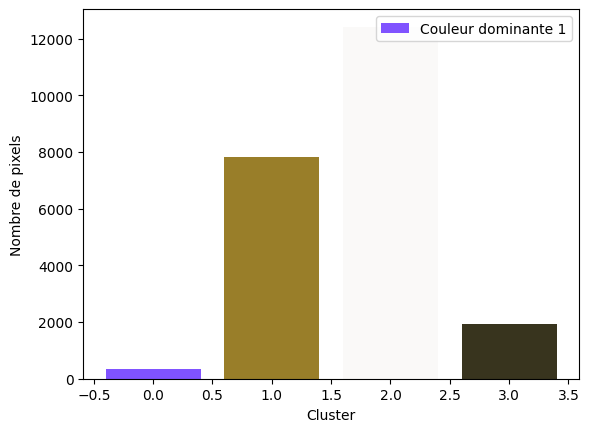

DataFrame pour l'image im-045_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [39.91506146 40.1283128  43.56757947]
   Code couleur RGB: [0.63851677 0.24053761 0.08445868]
   Nombre de pixels: 6337

Cluster 2:
   Code couleur Lab: [9.95014026e+01 8.50938073e-02 2.92664996e-01]
   Code couleur RGB: [0.99607146 0.99403645 0.99216297]
   Nombre de pixels: 12992

Cluster 3:
   Code couleur Lab: [ 37.02650481  75.51655188 -99.90234734]
   Code couleur RGB: [0.29487592 0.10969815 1.        ]
   Nombre de pixels: 752

Cluster 4:
   Code couleur Lab: [21.4072475   4.81803214 21.45628005]
   Code couleur RGB: [0.26212784 0.18843392 0.07496803]
   Nombre de pixels: 2419



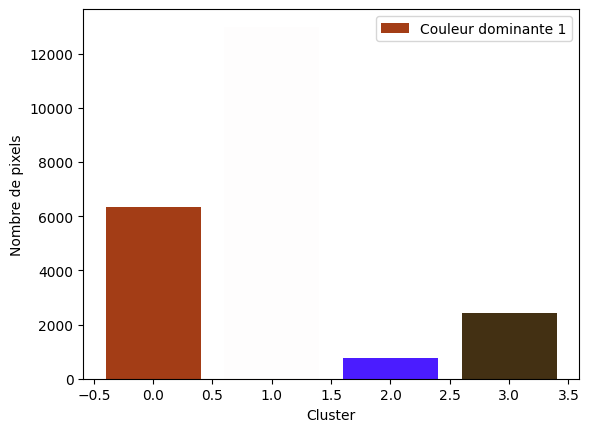

DataFrame pour l'image im-046_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [13.97154639 -8.16934339  8.16417654]
   Code couleur RGB: [0.10954089 0.15067421 0.09378046]
   Nombre de pixels: 5467

Cluster 2:
   Code couleur Lab: [ 9.94822064e+01  3.67879484e-02 -8.95726361e-02]
   Code couleur RGB: [0.99409815 0.99404959 0.99483647]
   Nombre de pixels: 14392

Cluster 3:
   Code couleur Lab: [51.71357904 -0.16218887 38.31178677]
   Code couleur RGB: [0.559326   0.47651143 0.21906293]
   Nombre de pixels: 1483

Cluster 4:
   Code couleur Lab: [ 42.08354474   1.71681335 -22.92789491]
   Code couleur RGB: [0.30395176 0.39298816 0.53652425]
   Nombre de pixels: 1158



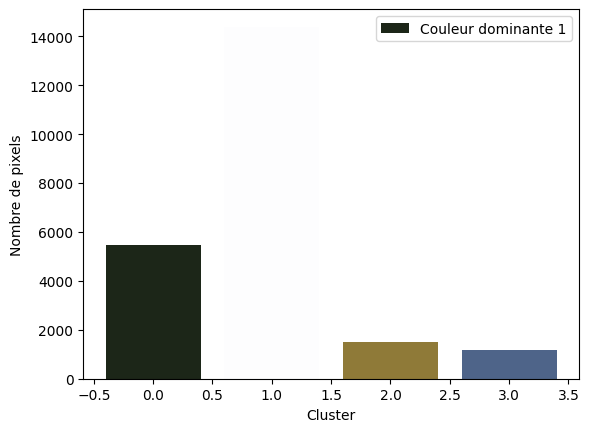

DataFrame pour l'image im-047_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [40.54382505 -0.79016361 34.05425125]
   Code couleur RGB: [0.43394232 0.37039394 0.14807576]
   Nombre de pixels: 4855

Cluster 2:
   Code couleur Lab: [ 9.92854856e+01 -1.01006813e-01  3.67525142e-02]
   Code couleur RGB: [0.99119846 0.99211276 0.99162606]
   Nombre de pixels: 12718

Cluster 3:
   Code couleur Lab: [  36.92120245   71.60946484 -100.13453067]
   Code couleur RGB: [0.2261402  0.14887138 1.        ]
   Nombre de pixels: 1138

Cluster 4:
   Code couleur Lab: [12.21534148 -0.43436923  5.08413295]
   Code couleur RGB: [0.13393746 0.124993   0.09798796]
   Nombre de pixels: 3789



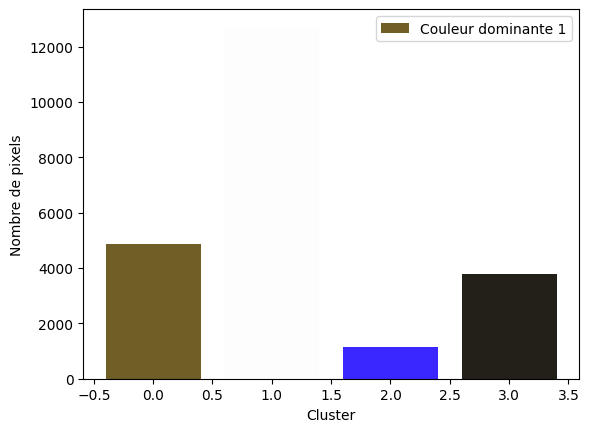

DataFrame pour l'image im-048_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.78278334e+01  5.04731692e-01 -7.88322858e-02]
   Code couleur RGB: [0.97916122 0.97415982 0.9760642 ]
   Nombre de pixels: 13444

Cluster 2:
   Code couleur Lab: [61.7151436  19.46094203 56.23571525]
   Code couleur RGB: [0.79952375 0.52571045 0.17235324]
   Nombre de pixels: 5759

Cluster 3:
   Code couleur Lab: [22.47417289  2.82465399  7.44215494]
   Code couleur RGB: [0.24339995 0.20361914 0.16793736]
   Nombre de pixels: 3186

Cluster 4:
   Code couleur Lab: [  34.50551352   76.56701551 -104.15172622]
   Code couleur RGB: [0.1772917  0.07521846 1.        ]
   Nombre de pixels: 111



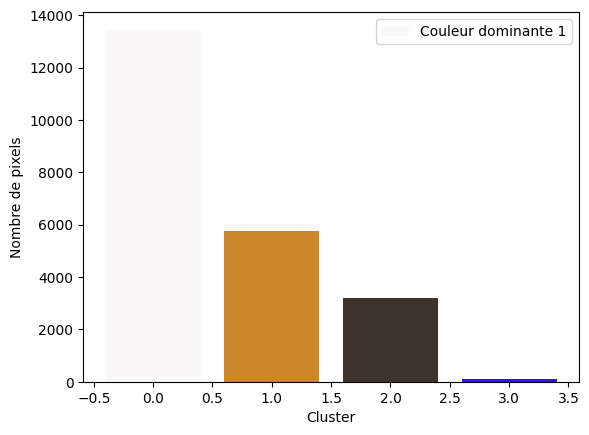

DataFrame pour l'image im-049_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [21.54373252  5.9109468  13.5246402 ]
   Code couleur RGB: [0.2602148  0.18831127 0.12526416]
   Nombre de pixels: 3405

Cluster 2:
   Code couleur Lab: [99.11428156 -0.11287619  0.85848073]
   Code couleur RGB: [0.99207909 0.98995492 0.98345567]
   Nombre de pixels: 13954

Cluster 3:
   Code couleur Lab: [54.97727119 32.14166018 55.47100339]
   Code couleur RGB: [0.78557588 0.41910928 0.11608586]
   Nombre de pixels: 4537

Cluster 4:
   Code couleur Lab: [ 54.49464537  71.19482567 -71.041714  ]
   Code couleur RGB: [0.71541366 0.29876685 1.        ]
   Nombre de pixels: 604



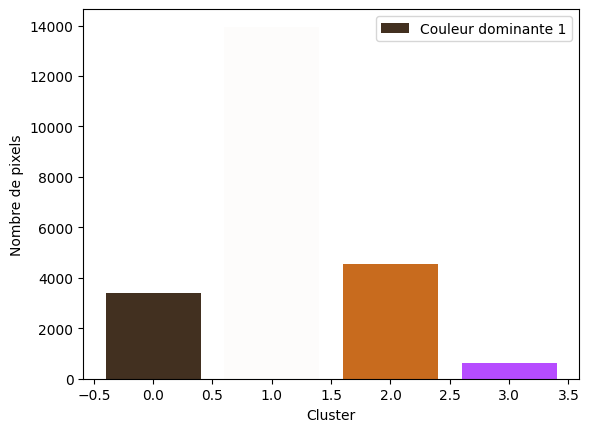

DataFrame pour l'image im-050_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.97021052e+01 8.33944425e-02 2.07016200e-01]
   Code couleur RGB: [0.99803324 0.99634566 0.99509129]
   Nombre de pixels: 14862

Cluster 2:
   Code couleur Lab: [10.97096183  3.52902612 -6.60515133]
   Code couleur RGB: [0.11698163 0.11067931 0.15047693]
   Nombre de pixels: 4061

Cluster 3:
   Code couleur Lab: [43.40550718  7.81167561 17.27420765]
   Code couleur RGB: [0.4893918 0.3811665 0.2917286]
   Nombre de pixels: 1897

Cluster 4:
   Code couleur Lab: [ 38.84692987  10.01671395 -15.95340983]
   Code couleur RGB: [0.37288111 0.34175737 0.46017601]
   Nombre de pixels: 1680



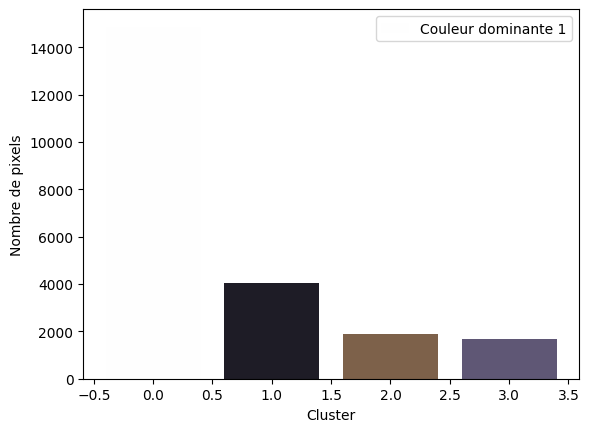

DataFrame pour l'image im-051_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [63.33344688 24.47332732 62.27459831]
   Code couleur RGB: [0.85023545 0.52694968 0.12870207]
   Nombre de pixels: 2319

Cluster 2:
   Code couleur Lab: [9.96052828e+01 2.59485331e-02 1.62394503e-01]
   Code couleur RGB: [0.99630831 0.99539862 0.99432206]
   Nombre de pixels: 12804

Cluster 3:
   Code couleur Lab: [16.13916863  1.11771818  0.67130468]
   Code couleur RGB: [0.16521066 0.15492113 0.15349377]
   Nombre de pixels: 5940

Cluster 4:
   Code couleur Lab: [ 46.76932232   7.81562763 -25.79318639]
   Code couleur RGB: [0.38805786 0.42605445 0.60394613]
   Nombre de pixels: 1437



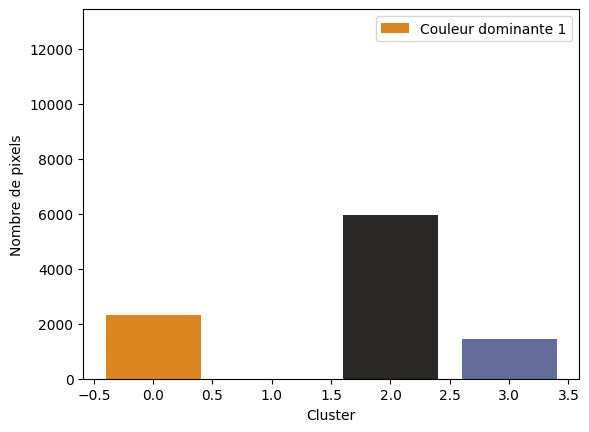

DataFrame pour l'image im-052_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
im-006_im.png  150,100,23    38,37,19   108,61,255
im-007_im.png  221,113,50   106,94,67   198,73,255
im-008_im.png    25,21,14  205,109,19    81,19,255
im-009_im.png  197,138,51    71,57,31    81,33,255
im-010_im.png  225,165,86   127,95,80   100,41,255
im-011_im.png   178,68,30    67,59,65    90,14,255
im-012_im.png   218,96,21    66,43,17   100,30,255
im-013_im.png   161,64,37    74,57,45     57,5,255
im-014_im.png   208,82,14    46,24,14   149,42,255
im-015_im.png   101,59,25  186,123,77     75,65,78
im-016_im.png    56,50,37   159,81,43  152,145,127
im-017_im.png  165,106,25    51,33,18    90,40,255
im-018_im.png   215,74,10  203,65,255    173

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.99563511e+01 -2.80819625e-02  3.65746157e-02]
   Code couleur RGB: [0.99940986 0.99955654 0.99925793]
   Nombre de pixels: 13590

Cluster 2:
   Code couleur Lab: [ 9.43177292 -2.55432836  5.5445956 ]
   Code couleur RGB: [0.1018127  0.10634165 0.07266095]
   Nombre de pixels: 5109

Cluster 3:
   Code couleur Lab: [  35.99387001   77.24251982 -101.63700993]
   Code couleur RGB: [0.27400574 0.07703198 1.        ]
   Nombre de pixels: 448

Cluster 4:
   Code couleur Lab: [50.05073813 19.52571043  8.70895754]
   Code couleur RGB: [0.61062254 0.41739708 0.41229775]
   Nombre de pixels: 3353



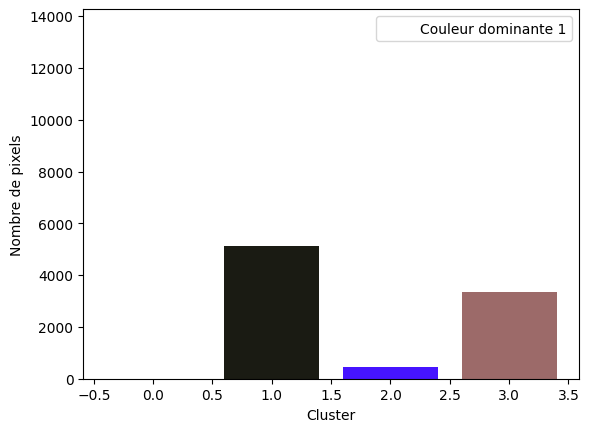

DataFrame pour l'image im-053_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.96949052e+01 1.06736615e-01 6.80300520e-02]
   Code couleur RGB: [0.99764505 0.99624854 0.99606705]
   Nombre de pixels: 16556

Cluster 2:
   Code couleur Lab: [ 41.41282424  75.11749619 -92.5344218 ]
   Code couleur RGB: [0.4418281  0.15074969 1.        ]
   Nombre de pixels: 1690

Cluster 3:
   Code couleur Lab: [23.1979082  -4.07552211 21.58187403]
   Code couleur RGB: [0.23353171 0.22062789 0.08633508]
   Nombre de pixels: 988

Cluster 4:
   Code couleur Lab: [38.16632743 32.1071232  36.5457607 ]
   Code couleur RGB: [0.57721815 0.25763064 0.12093346]
   Nombre de pixels: 3266



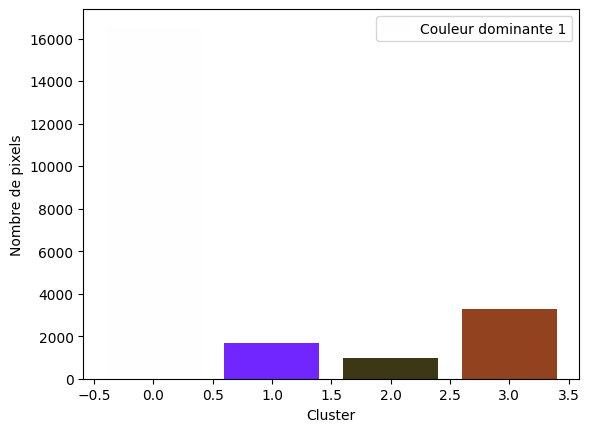

DataFrame pour l'image im-054_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [56.23548373 16.47465874 55.53487561]
   Code couleur RGB: [0.71842516 0.47908897 0.11734886]
   Nombre de pixels: 2826

Cluster 2:
   Code couleur Lab: [99.67552908  0.22315543  0.17977685]
   Code couleur RGB: [0.99876656 0.9957121  0.99501558]
   Nombre de pixels: 15418

Cluster 3:
   Code couleur Lab: [ 41.39758649  71.29893862 -92.7354339 ]
   Code couleur RGB: [0.40077894 0.18470141 1.        ]
   Nombre de pixels: 1796

Cluster 4:
   Code couleur Lab: [15.63496914  4.93009192 17.79960176]
   Code couleur RGB: [0.20637261 0.14065675 0.04874408]
   Nombre de pixels: 2460



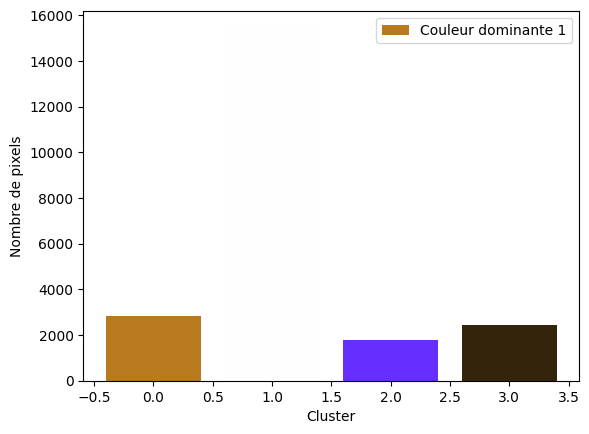

DataFrame pour l'image im-055_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64639363  0.40582341 -0.12157163]
   Code couleur RGB: [0.99884116 0.99502653 0.99699571]
   Nombre de pixels: 15264

Cluster 2:
   Code couleur Lab: [13.78431064  6.38183009 13.80379913]
   Code couleur RGB: [0.19248591 0.12319836 0.06048282]
   Nombre de pixels: 3068

Cluster 3:
   Code couleur Lab: [61.62817988 25.54547259 62.62453936]
   Code couleur RGB: [0.83554689 0.50637676 0.10362045]
   Nombre de pixels: 3154

Cluster 4:
   Code couleur Lab: [ 42.73873249  73.95224656 -90.50595007]
   Code couleur RGB: [0.46663575 0.17352908 1.        ]
   Nombre de pixels: 1014



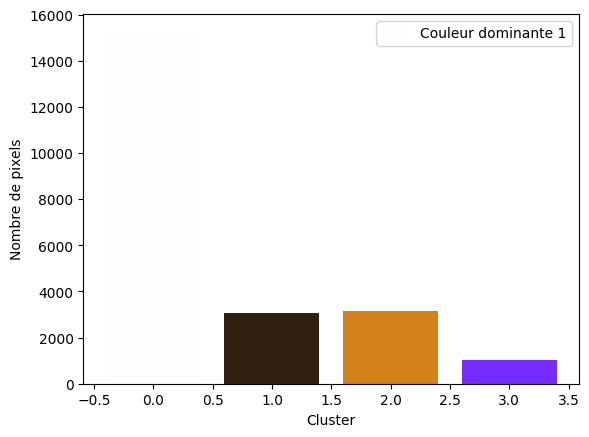

DataFrame pour l'image im-056_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.60515209 -0.21752255  0.35972186]
   Code couleur RGB: [0.99503554 0.99592921 0.99278996]
   Nombre de pixels: 15724

Cluster 2:
   Code couleur Lab: [46.01248175 48.3786597  53.67436483]
   Code couleur RGB: [0.754785   0.26156308 0.04912681]
   Nombre de pixels: 3239

Cluster 3:
   Code couleur Lab: [ 41.85061431  79.08880022 -91.85417269]
   Code couleur RGB: [0.49024909 0.10820273 1.        ]
   Nombre de pixels: 1133

Cluster 4:
   Code couleur Lab: [9.45728156 5.00564695 7.23378713]
   Code couleur RGB: [0.14193821 0.09293106 0.06280996]
   Nombre de pixels: 2404



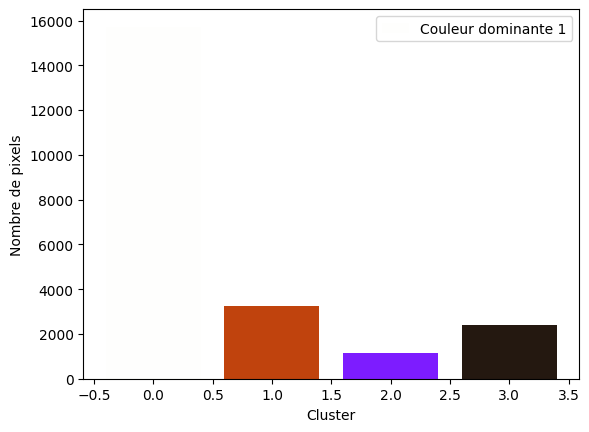

DataFrame pour l'image im-057_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.27840006 -0.18816816 -0.19558035]
   Code couleur RGB: [0.98957757 0.99231278 0.99329434]
   Nombre de pixels: 12872

Cluster 2:
   Code couleur Lab: [ 8.5810181  -4.13041328  3.18584959]
   Code couleur RGB: [0.08096725 0.10249074 0.07915022]
   Nombre de pixels: 6843

Cluster 3:
   Code couleur Lab: [50.64730849  3.32580045 48.89456589]
   Code couleur RGB: [0.57813107 0.45722591 0.1182083 ]
   Nombre de pixels: 2351

Cluster 4:
   Code couleur Lab: [ 38.63923206  78.20236589 -97.25601498]
   Code couleur RGB: [0.3869377  0.08754352 1.        ]
   Nombre de pixels: 434



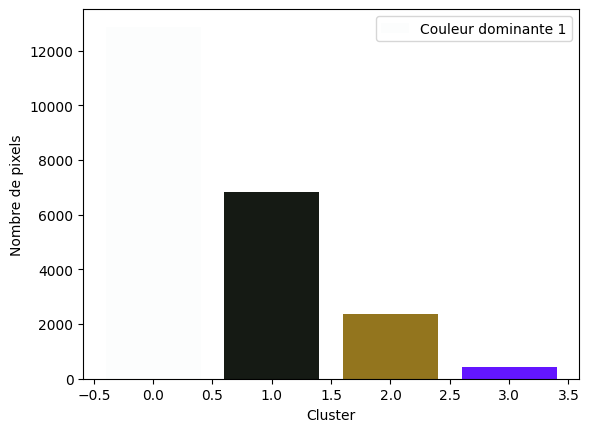

DataFrame pour l'image im-058_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [22.35983897  5.77201616 23.12876654]
   Code couleur RGB: [0.27723894 0.19432325 0.07180026]
   Nombre de pixels: 6356

Cluster 2:
   Code couleur Lab: [99.34538583 -0.12260789  0.81303654]
   Code couleur RGB: [0.99446382 0.99261489 0.98641856]
   Nombre de pixels: 10779

Cluster 3:
   Code couleur Lab: [53.18815376 38.92993887 51.06078229]
   Code couleur RGB: [0.79573129 0.37713156 0.14567381]
   Nombre de pixels: 4757

Cluster 4:
   Code couleur Lab: [ 37.47780158  75.48204472 -99.14611461]
   Code couleur RGB: [0.3131611  0.11375419 1.        ]
   Nombre de pixels: 608



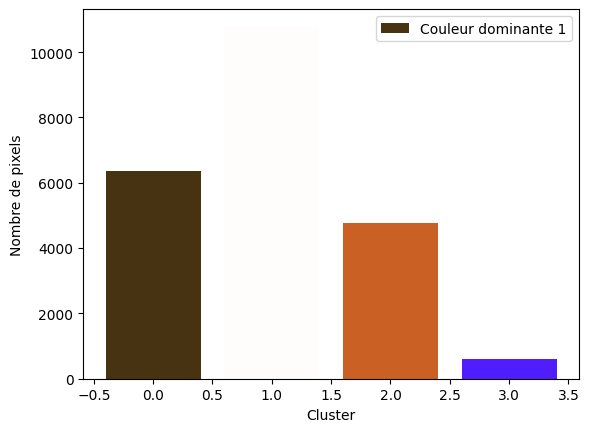

DataFrame pour l'image im-059_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [55.86923322 18.711411   -6.12839088]
   Code couleur RGB: [0.63314984 0.48153952 0.56842467]
   Nombre de pixels: 913

Cluster 2:
   Code couleur Lab: [ 9.97052073e+01 -5.59931389e-02  1.86429031e-01]
   Code couleur RGB: [0.99686466 0.99672556 0.99526322]
   Nombre de pixels: 12459

Cluster 3:
   Code couleur Lab: [15.91383597 -1.44370504 11.74940324]
   Code couleur RGB: [0.17044217 0.15568725 0.08957182]
   Nombre de pixels: 3152

Cluster 4:
   Code couleur Lab: [21.71800574 25.34062819 23.06678787]
   Code couleur RGB: [0.3585577  0.13336257 0.07380881]
   Nombre de pixels: 5976



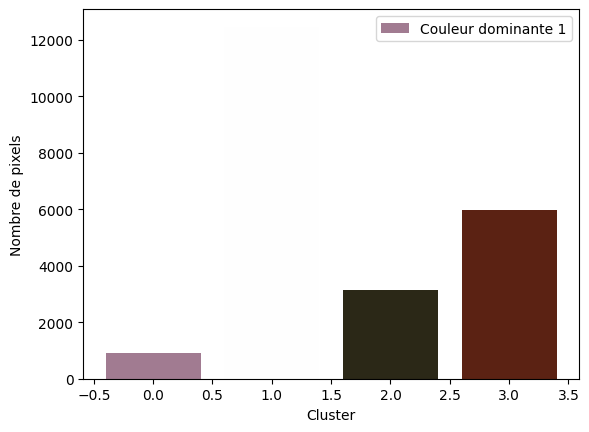

DataFrame pour l'image im-060_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
im-006_im.png  150,100,23     38,37,19   108,61,255
im-007_im.png  221,113,50    106,94,67   198,73,255
im-008_im.png    25,21,14   205,109,19    81,19,255
im-009_im.png  197,138,51     71,57,31    81,33,255
im-010_im.png  225,165,86    127,95,80   100,41,255
im-011_im.png   178,68,30     67,59,65    90,14,255
im-012_im.png   218,96,21     66,43,17   100,30,255
im-013_im.png   161,64,37     74,57,45     57,5,255
im-014_im.png   208,82,14     46,24,14   149,42,255
im-015_im.png   101,59,25   186,123,77     75,65,78
im-016_im.png    56,50,37    159,81,43  152,145,127
im-017_im.png  165,106,25     51,33,18    90,40,255
im-018_im.png   215,74,10 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [57.47028429 26.15923093 -4.28218267]
   Code couleur RGB: [0.70140753 0.47583261 0.57340785]
   Nombre de pixels: 1643

Cluster 2:
   Code couleur Lab: [ 9.98984611e+01 -2.11976319e-02  2.06242454e-02]
   Code couleur RGB: [0.9987507  0.99888655 0.99872193]
   Nombre de pixels: 15411

Cluster 3:
   Code couleur Lab: [30.21552021 34.86387626 29.61993331]
   Code couleur RGB: [0.49589796 0.17120969 0.10351936]
   Nombre de pixels: 3470

Cluster 4:
   Code couleur Lab: [11.65115918  2.4292203   3.4130504 ]
   Code couleur RGB: [0.14105878 0.1157507  0.10287926]
   Nombre de pixels: 1976



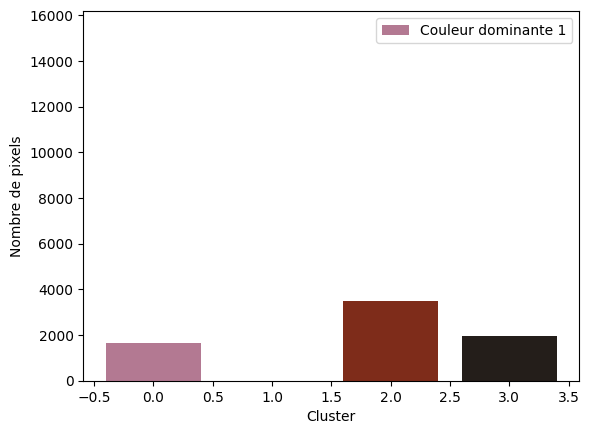

DataFrame pour l'image im-061_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-057_im.png   192,67,13    36,24,16   125,28,255
im-058_im.png    21,26,20  147,117,30    99,22,255
im-059_im.png    71,50,18   203,96,37    80,29,255
im-060_im.png    91,34,19    43,40,23  161,123,145
im-061_im.png   126,44,26    36,30,26  179,121,146

[61 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.88926576e+01 8.52437481e-02 5.14414334e-01]
   Code couleur RGB: [0.98994814 0.98706221 0.98357794]
   Nombre de pixels: 10826

Cluster 2:
   Code couleur Lab: [49.75652138 27.89273681 49.16178684]
   Code couleur RGB: [0.69827838 0.38234735 0.1215537 ]
   Nombre de pixels: 6362

Cluster 3:
   Code couleur Lab: [29.86321563 -0.64158288 20.91941002]
   Code couleur RGB: [0.31361263 0.27322002 0.14702076]
   Nombre de pixels: 4751

Cluster 4:
   Code couleur Lab: [ 50.30979969  68.12360557 -77.80095572]
   Code couleur RGB: [0.60480592 0.28005344 1.        ]
   Nombre de pixels: 561



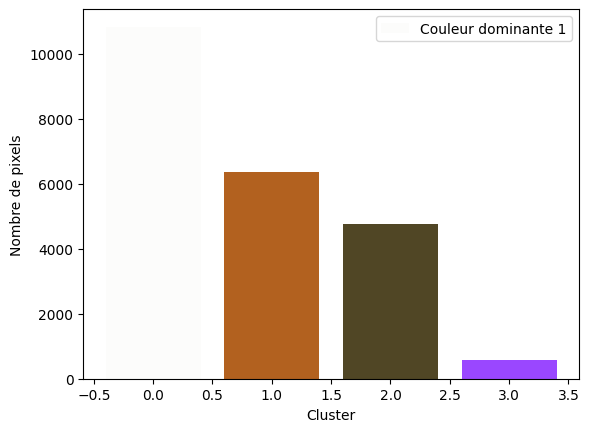

DataFrame pour l'image im-062_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-058_im.png    21,26,20  147,117,30    99,22,255
im-059_im.png    71,50,18   203,96,37    80,29,255
im-060_im.png    91,34,19    43,40,23  161,123,145
im-061_im.png   126,44,26    36,30,26  179,121,146
im-062_im.png   178,97,31    80,70,37   154,71,255

[62 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.06177553  0.23871868  0.11092308]
   Code couleur RGB: [0.99167639 0.98872764 0.98857289]
   Nombre de pixels: 12139

Cluster 2:
   Code couleur Lab: [28.4819356  33.02290618 26.00661076]
   Code couleur RGB: [0.46638749 0.16347108 0.1122936 ]
   Nombre de pixels: 7480

Cluster 3:
   Code couleur Lab: [ 38.01115612  78.96011702 -98.20169581]
   Code couleur RGB: [0.3754409  0.06701821 1.        ]
   Nombre de pixels: 298

Cluster 4:
   Code couleur Lab: [20.93752112  2.18305519 -0.11477769]
   Code couleur RGB: [0.21009989 0.19329614 0.1982505 ]
   Nombre de pixels: 2583



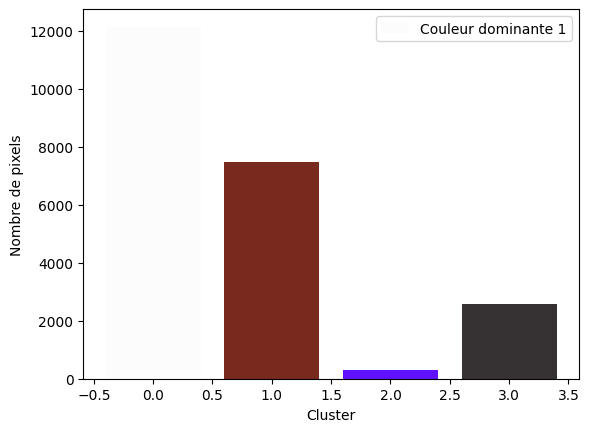

DataFrame pour l'image im-063_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-059_im.png    71,50,18  203,96,37    80,29,255
im-060_im.png    91,34,19   43,40,23  161,123,145
im-061_im.png   126,44,26   36,30,26  179,121,146
im-062_im.png   178,97,31   80,70,37   154,71,255
im-063_im.png   119,42,29   54,49,51    96,17,255

[63 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 53.96802552  61.16395935 -71.94858754]
   Code couleur RGB: [0.62959079 0.3496591  1.        ]
   Nombre de pixels: 1281

Cluster 2:
   Code couleur Lab: [ 9.99078617e+01 -2.53132883e-02  3.21805811e-02]
   Code couleur RGB: [0.99886547 0.99899995 0.9987405 ]
   Nombre de pixels: 14683

Cluster 3:
   Code couleur Lab: [58.79608701 17.22067081 60.54216179]
   Code couleur RGB: [0.755654   0.50214423 0.08580981]
   Nombre de pixels: 5248

Cluster 4:
   Code couleur Lab: [23.95218901 19.54777665 26.3160136 ]
   Code couleur RGB: [0.35863226 0.17227977 0.06793359]
   Nombre de pixels: 1288



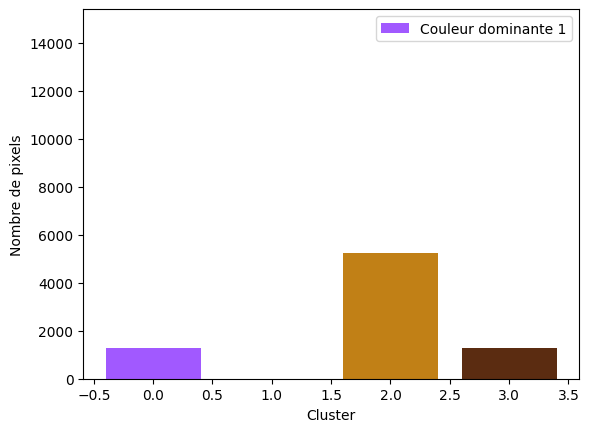

DataFrame pour l'image im-064_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-060_im.png    91,34,19   43,40,23  161,123,145
im-061_im.png   126,44,26   36,30,26  179,121,146
im-062_im.png   178,97,31   80,70,37   154,71,255
im-063_im.png   119,42,29   54,49,51    96,17,255
im-064_im.png  193,128,22   91,44,17   161,89,255

[64 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.89536689e+01  1.18514319e+00 -7.82393637e-02]
   Code couleur RGB: [0.99741255 0.98525144 0.98891118]
   Nombre de pixels: 16357

Cluster 2:
   Code couleur Lab: [72.57959258  9.17241802 70.52518253]
   Code couleur RGB: [0.88110115 0.66366964 0.12503127]
   Nombre de pixels: 3558

Cluster 3:
   Code couleur Lab: [ 39.69991229  68.73224127 -95.52357339]
   Code couleur RGB: [0.31052462 0.19107183 1.        ]
   Nombre de pixels: 690

Cluster 4:
   Code couleur Lab: [22.25919917 -0.95983831 21.06596556]
   Code couleur RGB: [0.24086344 0.20703867 0.08288116]
   Nombre de pixels: 1895



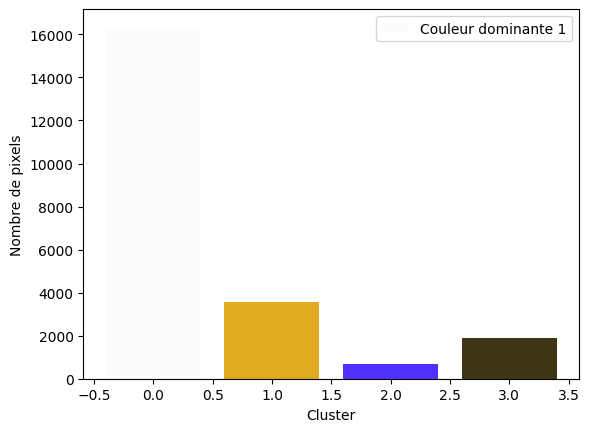

DataFrame pour l'image im-065_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-061_im.png   126,44,26   36,30,26  179,121,146
im-062_im.png   178,97,31   80,70,37   154,71,255
im-063_im.png   119,42,29   54,49,51    96,17,255
im-064_im.png  193,128,22   91,44,17   161,89,255
im-065_im.png  225,169,32   61,53,21    79,49,255

[65 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.85648096e+01 2.89971164e-01 9.57519747e-02]
   Code couleur RGB: [0.98639877 0.98297317 0.98306024]
   Nombre de pixels: 13264

Cluster 2:
   Code couleur Lab: [37.95163085 35.5163813  35.1734985 ]
   Code couleur RGB: [0.58987366 0.24235324 0.13076287]
   Nombre de pixels: 6161

Cluster 3:
   Code couleur Lab: [23.68849598  4.87373762  2.20506908]
   Code couleur RGB: [0.25507899 0.21100346 0.20883848]
   Nombre de pixels: 2949

Cluster 4:
   Code couleur Lab: [ 44.94854471  78.4808501  -86.56885105]
   Code couleur RGB: [0.5639101  0.14823569 1.        ]
   Nombre de pixels: 126



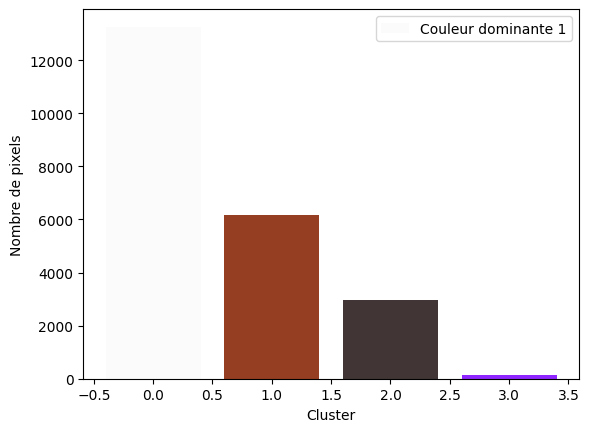

DataFrame pour l'image im-066_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-062_im.png   178,97,31   80,70,37  154,71,255
im-063_im.png   119,42,29   54,49,51   96,17,255
im-064_im.png  193,128,22   91,44,17  161,89,255
im-065_im.png  225,169,32   61,53,21   79,49,255
im-066_im.png   150,62,33   65,54,53  144,38,255

[66 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 40.89936893  71.04168331 -93.50783242]
   Code couleur RGB: [0.38252772 0.18272622 1.        ]
   Nombre de pixels: 153

Cluster 2:
   Code couleur Lab: [44.12589633 16.97918698 44.90648708]
   Code couleur RGB: [0.57579669 0.36106637 0.09783397]
   Nombre de pixels: 6436

Cluster 3:
   Code couleur Lab: [98.36114796  0.15465139  0.49028206]
   Code couleur RGB: [0.98439534 0.98087704 0.97774994]
   Nombre de pixels: 12288

Cluster 4:
   Code couleur Lab: [15.18489315  5.13678421 11.9923186 ]
   Code couleur RGB: [0.19692816 0.13736692 0.08369838]
   Nombre de pixels: 3623



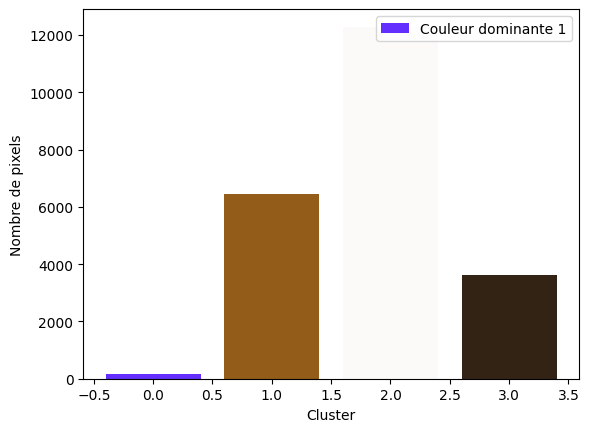

DataFrame pour l'image im-067_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-063_im.png   119,42,29   54,49,51   96,17,255
im-064_im.png  193,128,22   91,44,17  161,89,255
im-065_im.png  225,169,32   61,53,21   79,49,255
im-066_im.png   150,62,33   65,54,53  144,38,255
im-067_im.png   147,92,25   50,35,21   98,47,255

[67 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.51593234 -0.10422693  0.68014289]
   Code couleur RGB: [0.99607927 0.99454609 0.98936317]
   Nombre de pixels: 15633

Cluster 2:
   Code couleur Lab: [58.04154305 34.6357416  61.27931649]
   Code couleur RGB: [0.83866992 0.44065291 0.08434682]
   Nombre de pixels: 4117

Cluster 3:
   Code couleur Lab: [ 54.0231262   69.75927945 -71.93492629]
   Code couleur RGB: [0.69492616 0.30348065 1.        ]
   Nombre de pixels: 1018

Cluster 4:
   Code couleur Lab: [20.66631095 10.07812135 15.9113427 ]
   Code couleur RGB: [0.27476648 0.17117115 0.10490837]
   Nombre de pixels: 1732



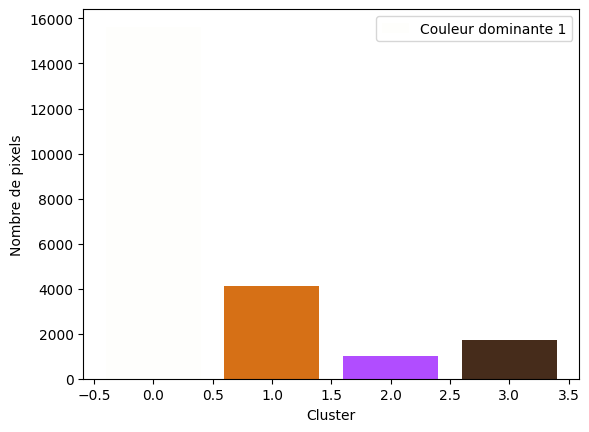

DataFrame pour l'image im-068_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-064_im.png  193,128,22   91,44,17  161,89,255
im-065_im.png  225,169,32   61,53,21   79,49,255
im-066_im.png   150,62,33   65,54,53  144,38,255
im-067_im.png   147,92,25   50,35,21   98,47,255
im-068_im.png  214,112,22   70,44,27  177,77,255

[68 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.3769401  -0.10525233  0.19689335]
   Code couleur RGB: [0.99277414 0.99311365 0.99144969]
   Nombre de pixels: 15934

Cluster 2:
   Code couleur Lab: [21.40386014 -0.3036241  13.33067237]
   Code couleur RGB: [0.22674153 0.19946935 0.12416381]
   Nombre de pixels: 2539

Cluster 3:
   Code couleur Lab: [59.65412216  3.43012713 48.87572033]
   Code couleur RGB: [0.67882883 0.54663732 0.21094375]
   Nombre de pixels: 3275

Cluster 4:
   Code couleur Lab: [ 40.98293508  69.76707005 -93.42489513]
   Code couleur RGB: [0.37022806 0.19313983 1.        ]
   Nombre de pixels: 752



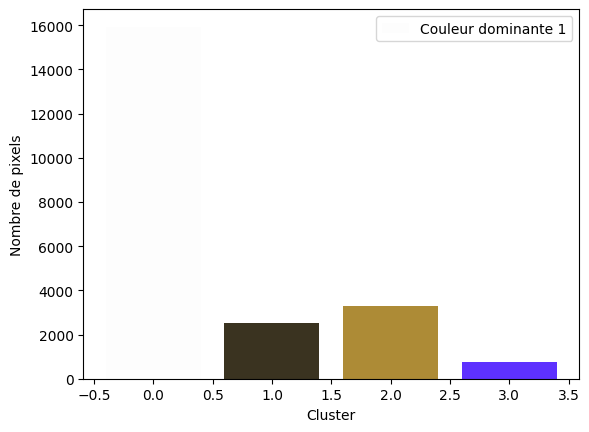

DataFrame pour l'image im-069_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-065_im.png  225,169,32   61,53,21   79,49,255
im-066_im.png   150,62,33   65,54,53  144,38,255
im-067_im.png   147,92,25   50,35,21   98,47,255
im-068_im.png  214,112,22   70,44,27  177,77,255
im-069_im.png  173,139,54   58,51,32   94,49,255

[69 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 39.67730251  75.75852751 -95.48409932]
   Code couleur RGB: [0.39486983 0.12910994 1.        ]
   Nombre de pixels: 995

Cluster 2:
   Code couleur Lab: [9.99398324e+01 3.27270046e-02 5.12933336e-02]
   Code couleur RGB: [0.99976853 0.99921663 0.99896694]
   Nombre de pixels: 14624

Cluster 3:
   Code couleur Lab: [47.22793033 50.07468631 56.36507239]
   Code couleur RGB: [0.77877776 0.26518368 0.02797331]
   Nombre de pixels: 4642

Cluster 4:
   Code couleur Lab: [18.27688141 23.42168653 24.46460588]
   Code couleur RGB: [0.31607053 0.11000912 0.02670382]
   Nombre de pixels: 2239



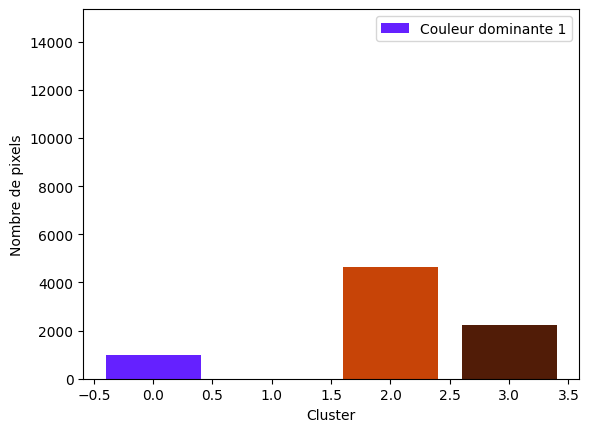

DataFrame pour l'image im-070_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-066_im.png   150,62,33   65,54,53  144,38,255
im-067_im.png   147,92,25   50,35,21   98,47,255
im-068_im.png  214,112,22   70,44,27  177,77,255
im-069_im.png  173,139,54   58,51,32   94,49,255
im-070_im.png    199,68,7    81,28,7  101,33,255

[70 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.67513268 -0.20359024  0.49466198]
   Code couleur RGB: [0.99642416 0.99665041 0.99256285]
   Nombre de pixels: 15614

Cluster 2:
   Code couleur Lab: [53.2225054  39.21954443 56.38996988]
   Code couleur RGB: [0.80035649 0.37575867 0.09204859]
   Nombre de pixels: 4428

Cluster 3:
   Code couleur Lab: [ 53.1390015   75.41429183 -73.08647538]
   Code couleur RGB: [0.71875997 0.25681712 1.        ]
   Nombre de pixels: 669

Cluster 4:
   Code couleur Lab: [27.90550672 -2.11401031 20.60982546]
   Code couleur RGB: [0.28659938 0.25855845 0.13220864]
   Nombre de pixels: 1789



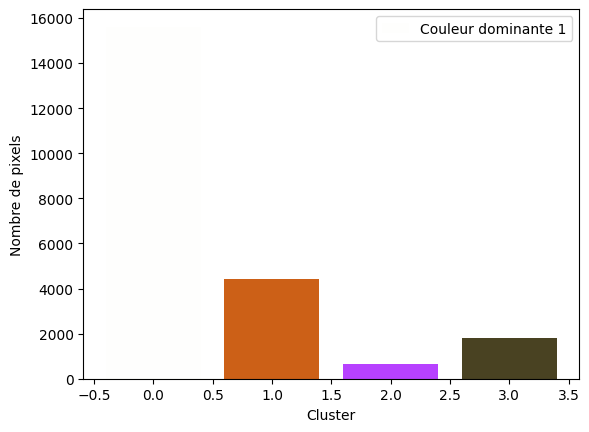

DataFrame pour l'image im-071_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-067_im.png   147,92,25   50,35,21   98,47,255
im-068_im.png  214,112,22   70,44,27  177,77,255
im-069_im.png  173,139,54   58,51,32   94,49,255
im-070_im.png    199,68,7    81,28,7  101,33,255
im-071_im.png   204,96,23   73,66,34  183,65,255

[71 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [47.81040355 34.62342542 35.41314263]
   Code couleur RGB: [0.69976065 0.34196623 0.21613253]
   Nombre de pixels: 4382

Cluster 2:
   Code couleur Lab: [99.62533462  0.12673984  0.11286992]
   Code couleur RGB: [0.99717665 0.99539628 0.99493948]
   Nombre de pixels: 16337

Cluster 3:
   Code couleur Lab: [ 43.80227036  78.08876543 -88.53580066]
   Code couleur RGB: [0.53240914 0.14118979 1.        ]
   Nombre de pixels: 392

Cluster 4:
   Code couleur Lab: [21.95061775  0.04151456  7.59191085]
   Code couleur RGB: [0.22370772 0.20443156 0.16231981]
   Nombre de pixels: 1389



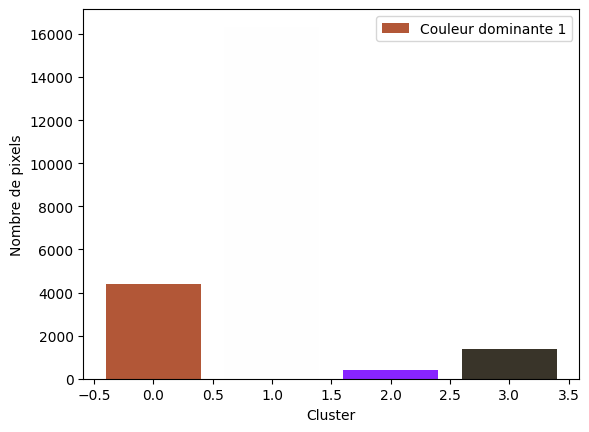

DataFrame pour l'image im-072_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-068_im.png  214,112,22   70,44,27  177,77,255
im-069_im.png  173,139,54   58,51,32   94,49,255
im-070_im.png    199,68,7    81,28,7  101,33,255
im-071_im.png   204,96,23   73,66,34  183,65,255
im-072_im.png   178,87,55   57,52,41  136,36,255

[72 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.05374653 -0.30701201  0.34744086]
   Code couleur RGB: [0.98800719 0.9898894  0.986614  ]
   Nombre de pixels: 15982

Cluster 2:
   Code couleur Lab: [15.54081725  5.57375903  8.37356915]
   Code couleur RGB: [0.19752339 0.13991468 0.10680348]
   Nombre de pixels: 3780

Cluster 3:
   Code couleur Lab: [48.98032347 43.28378501 41.51241716]
   Code couleur RGB: [0.76059993 0.31812017 0.18601729]
   Nombre de pixels: 2168

Cluster 4:
   Code couleur Lab: [  34.73067166   79.33910243 -103.76391024]
   Code couleur RGB: [0.24531167 0.01836526 1.        ]
   Nombre de pixels: 570



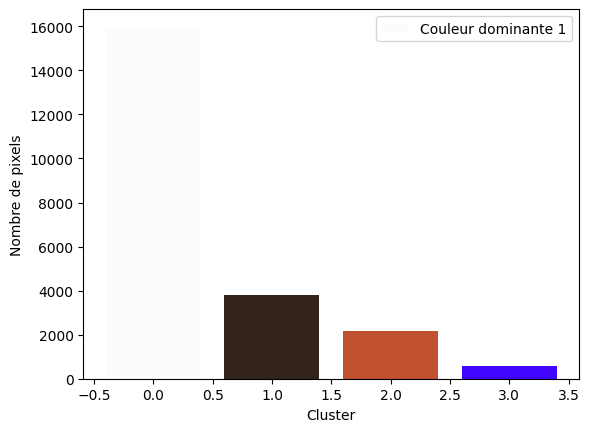

DataFrame pour l'image im-073_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-069_im.png  173,139,54   58,51,32   94,49,255
im-070_im.png    199,68,7    81,28,7  101,33,255
im-071_im.png   204,96,23   73,66,34  183,65,255
im-072_im.png   178,87,55   57,52,41  136,36,255
im-073_im.png    50,36,27  194,81,47    63,5,255

[73 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [11.32469782  5.73160494  4.53229717]
   Code couleur RGB: [0.15634779 0.10655696 0.09482974]
   Nombre de pixels: 2432

Cluster 2:
   Code couleur Lab: [ 9.98740124e+01 -2.77743022e-03  5.43285441e-02]
   Code couleur RGB: [0.99874295 0.99855388 0.99819085]
   Nombre de pixels: 11758

Cluster 3:
   Code couleur Lab: [48.22416221 52.88101499 45.55607887]
   Code couleur RGB: [0.79979533 0.2619562  0.15331753]
   Nombre de pixels: 7029

Cluster 4:
   Code couleur Lab: [70.14649964 34.43883417 -6.01067065]
   Code couleur RGB: [0.88911533 0.5810663  0.71919389]
   Nombre de pixels: 1281



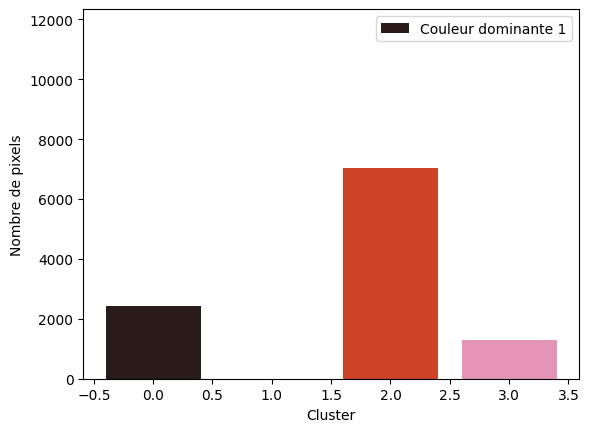

DataFrame pour l'image im-074_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-070_im.png    199,68,7    81,28,7   101,33,255
im-071_im.png   204,96,23   73,66,34   183,65,255
im-072_im.png   178,87,55   57,52,41   136,36,255
im-073_im.png    50,36,27  194,81,47     63,5,255
im-074_im.png   204,67,39   40,27,24  227,148,183

[74 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [41.01495477 30.07366687 41.042274  ]
   Code couleur RGB: [0.60279219 0.29161068 0.11012857]
   Nombre de pixels: 4370

Cluster 2:
   Code couleur Lab: [99.46747036 -0.16173882  0.47244478]
   Code couleur RGB: [0.99432567 0.99419676 0.99038015]
   Nombre de pixels: 16116

Cluster 3:
   Code couleur Lab: [  34.98008372   78.11871706 -103.34416081]
   Code couleur RGB: [0.23768245 0.05113527 1.        ]
   Nombre de pixels: 444

Cluster 4:
   Code couleur Lab: [12.29329796  0.12183572  9.13804299]
   Code couleur RGB: [0.1442768  0.1240238  0.07623172]
   Nombre de pixels: 1570



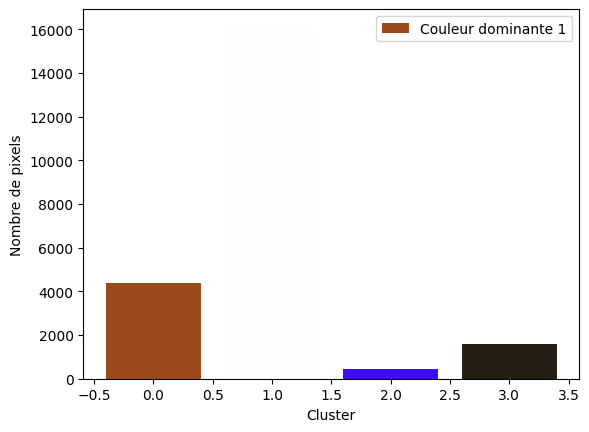

DataFrame pour l'image im-075_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-071_im.png   204,96,23   73,66,34   183,65,255
im-072_im.png   178,87,55   57,52,41   136,36,255
im-073_im.png    50,36,27  194,81,47     63,5,255
im-074_im.png   204,67,39   40,27,24  227,148,183
im-075_im.png   154,74,28   37,32,19    61,13,255

[75 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.81226075 -0.13710639  0.13165949]
   Code couleur RGB: [0.99722684 0.99815516 0.99688359]
   Nombre de pixels: 14430

Cluster 2:
   Code couleur Lab: [10.18179913  6.83009995  8.90665515]
   Code couleur RGB: [0.15824282 0.09447669 0.05877466]
   Nombre de pixels: 3930

Cluster 3:
   Code couleur Lab: [ 37.88574153  78.48329824 -98.45732614]
   Code couleur RGB: [0.3652467  0.07467505 1.        ]
   Nombre de pixels: 978

Cluster 4:
   Code couleur Lab: [37.1535556  34.51851858 40.93702867]
   Code couleur RGB: [0.57912213 0.23797231 0.07753815]
   Nombre de pixels: 3162



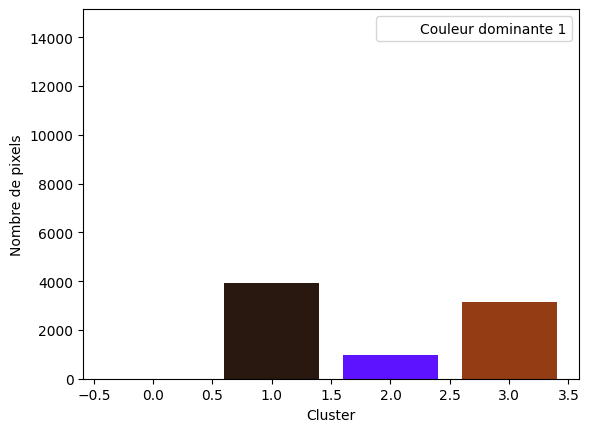

DataFrame pour l'image im-076_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-072_im.png   178,87,55   57,52,41   136,36,255
im-073_im.png    50,36,27  194,81,47     63,5,255
im-074_im.png   204,67,39   40,27,24  227,148,183
im-075_im.png   154,74,28   37,32,19    61,13,255
im-076_im.png    40,24,15  148,61,20    93,19,255

[76 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98596922e+01 1.89657957e-02 9.15154934e-02]
   Code couleur RGB: [0.99888961 0.99832722 0.99774896]
   Nombre de pixels: 13037

Cluster 2:
   Code couleur Lab: [10.16401862  1.75197285  7.47190082]
   Code couleur RGB: [0.13272509 0.10457173 0.06774149]
   Nombre de pixels: 2300

Cluster 3:
   Code couleur Lab: [49.88229308 23.57742488 47.23730744]
   Code couleur RGB: [0.67658602 0.39723472 0.13801402]
   Nombre de pixels: 6951

Cluster 4:
   Code couleur Lab: [  33.69993291   77.35422237 -105.49511308]
   Code couleur RGB: [0.13211086 0.05470005 1.        ]
   Nombre de pixels: 212



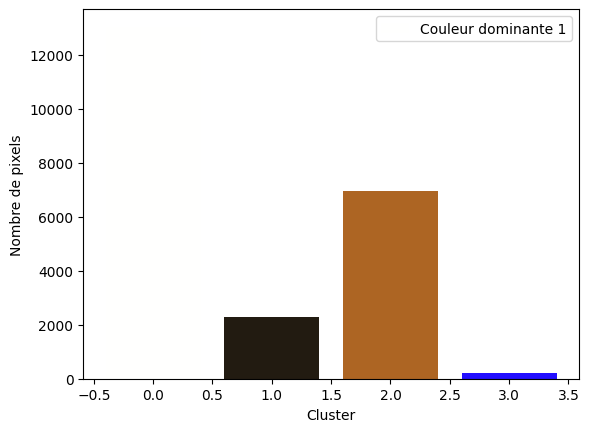

DataFrame pour l'image im-077_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-073_im.png    50,36,27  194,81,47     63,5,255
im-074_im.png   204,67,39   40,27,24  227,148,183
im-075_im.png   154,74,28   37,32,19    61,13,255
im-076_im.png    40,24,15  148,61,20    93,19,255
im-077_im.png  173,101,35   34,27,17    34,14,255

[77 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.80833375 -0.12671888  0.12802065]
   Code couleur RGB: [0.99725358 0.99808641 0.99686804]
   Nombre de pixels: 16420

Cluster 2:
   Code couleur Lab: [23.98105436  8.46292736 18.63878056]
   Code couleur RGB: [0.30161894 0.20277506 0.11467746]
   Nombre de pixels: 2759

Cluster 3:
   Code couleur Lab: [ 39.09231975  79.17912703 -96.41705919]
   Code couleur RGB: [0.41251905 0.07559827 1.        ]
   Nombre de pixels: 762

Cluster 4:
   Code couleur Lab: [37.50432613 44.03444305 43.2799955 ]
   Code couleur RGB: [0.62759365 0.19658984 0.06700116]
   Nombre de pixels: 2559



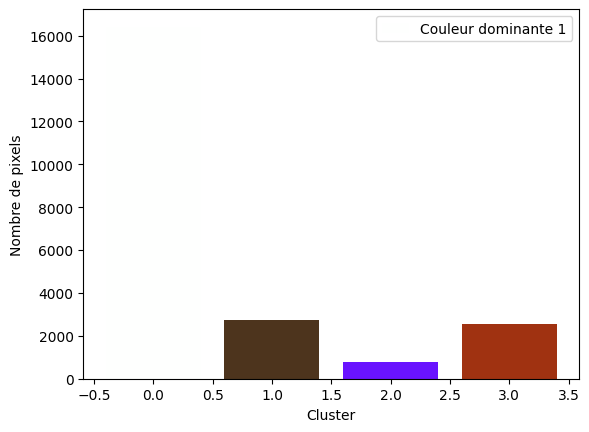

DataFrame pour l'image im-078_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-074_im.png   204,67,39   40,27,24  227,148,183
im-075_im.png   154,74,28   37,32,19    61,13,255
im-076_im.png    40,24,15  148,61,20    93,19,255
im-077_im.png  173,101,35   34,27,17    34,14,255
im-078_im.png    77,52,29  160,50,17   105,19,255

[78 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.86381369e+01 -3.87732748e-02  3.83761584e-01]
   Code couleur RGB: [0.98559573 0.98451588 0.9816657 ]
   Nombre de pixels: 11995

Cluster 2:
   Code couleur Lab: [46.66642683 23.11174063 49.20138642]
   Code couleur RGB: [0.6382569  0.3673372  0.08476677]
   Nombre de pixels: 7191

Cluster 3:
   Code couleur Lab: [12.16789982 -1.59064062  6.28899881]
   Code couleur RGB: [0.12963621 0.12634858 0.09098166]
   Nombre de pixels: 3180

Cluster 4:
   Code couleur Lab: [ 52.96820005  68.25057009 -73.36374121]
   Code couleur RGB: [0.66367087 0.30262614 1.        ]
   Nombre de pixels: 134



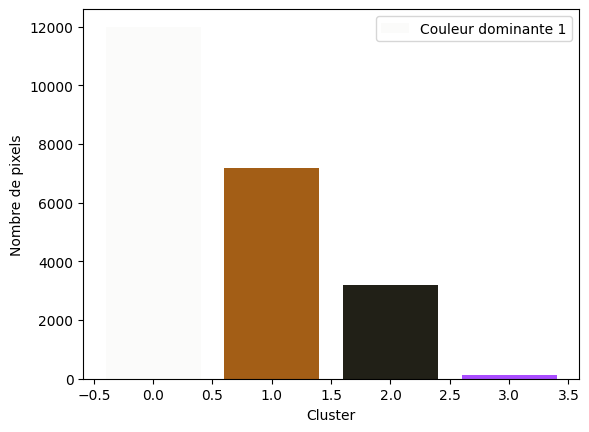

DataFrame pour l'image im-079_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-075_im.png   154,74,28   37,32,19   61,13,255
im-076_im.png    40,24,15  148,61,20   93,19,255
im-077_im.png  173,101,35   34,27,17   34,14,255
im-078_im.png    77,52,29  160,50,17  105,19,255
im-079_im.png   163,94,22   33,32,23  169,77,255

[79 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [12.44206622  1.3734273   4.28014999]
   Code couleur RGB: [0.14374367 0.12378701 0.10428791]
   Nombre de pixels: 1416

Cluster 2:
   Code couleur Lab: [ 9.93395835e+01 -1.46646886e-01  8.51256605e-02]
   Code couleur RGB: [0.99161502 0.99282313 0.99186712]
   Nombre de pixels: 15259

Cluster 3:
   Code couleur Lab: [ 37.93272837  78.46139663 -98.35962817]
   Code couleur RGB: [0.36685471 0.07546671 1.        ]
   Nombre de pixels: 687

Cluster 4:
   Code couleur Lab: [28.9828561  26.73116764 26.83452534]
   Code couleur RGB: [0.4443627  0.19307903 0.10868643]
   Nombre de pixels: 5138



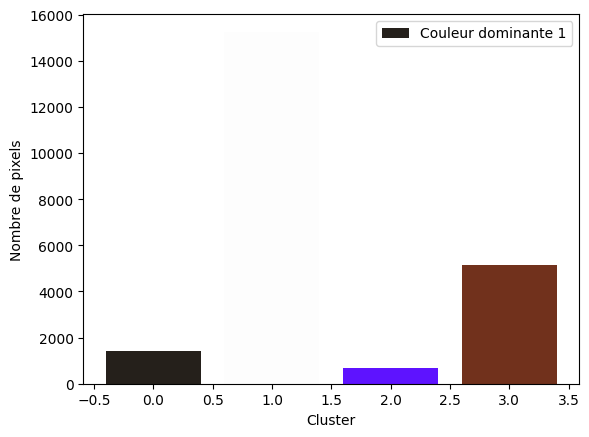

DataFrame pour l'image im-080_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-076_im.png    40,24,15  148,61,20   93,19,255
im-077_im.png  173,101,35   34,27,17   34,14,255
im-078_im.png    77,52,29  160,50,17  105,19,255
im-079_im.png   163,94,22   33,32,23  169,77,255
im-080_im.png   113,49,28   37,32,27   94,19,255

[80 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [22.48524223 -2.09459609 13.51700815]
   Code couleur RGB: [0.22693321 0.21197132 0.131548  ]
   Nombre de pixels: 3721

Cluster 2:
   Code couleur Lab: [ 9.89893825e+01 -2.83856447e-02  3.36345490e-01]
   Code couleur RGB: [0.98949503 0.98848763 0.9860071 ]
   Nombre de pixels: 15416

Cluster 3:
   Code couleur Lab: [  36.32646385   74.54987865 -101.09146957]
   Code couleur RGB: [0.247102   0.11560818 1.        ]
   Nombre de pixels: 556

Cluster 4:
   Code couleur Lab: [35.88767065 20.40839791 38.04570379]
   Code couleur RGB: [0.49715244 0.27513243 0.08197444]
   Nombre de pixels: 2807



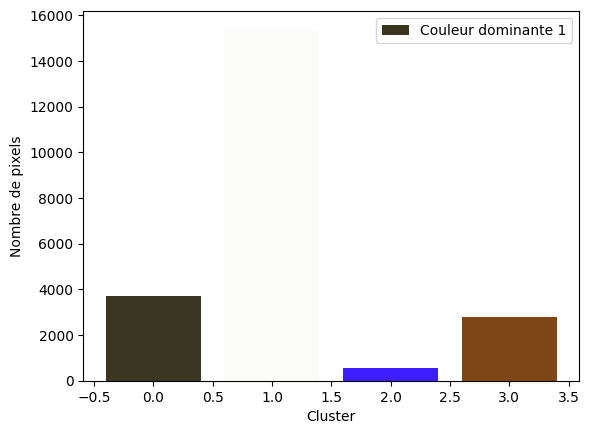

DataFrame pour l'image im-081_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-077_im.png  173,101,35   34,27,17   34,14,255
im-078_im.png    77,52,29  160,50,17  105,19,255
im-079_im.png   163,94,22   33,32,23  169,77,255
im-080_im.png   113,49,28   37,32,27   94,19,255
im-081_im.png    58,54,34  127,70,21   63,29,255

[81 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94376895e+01 -1.23310350e-02 -7.45023958e-02]
   Code couleur RGB: [0.99324793 0.99365881 0.99420979]
   Nombre de pixels: 15697

Cluster 2:
   Code couleur Lab: [  35.68075125   77.40642384 -102.19233279]
   Code couleur RGB: [0.26117098 0.07161347 1.        ]
   Nombre de pixels: 1256

Cluster 3:
   Code couleur Lab: [9.46292784 3.08151022 8.49811125]
   Code couleur RGB: [0.13537208 0.09645324 0.05318215]
   Nombre de pixels: 3555

Cluster 4:
   Code couleur Lab: [57.82585882 25.28902455 59.61468329]
   Code couleur RGB: [0.78663357 0.46919715 0.09420471]
   Nombre de pixels: 1992



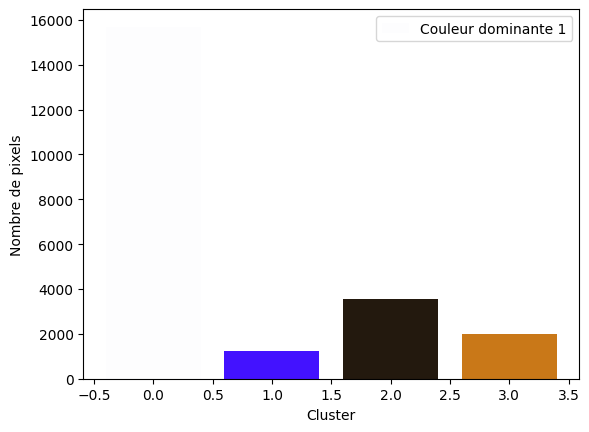

DataFrame pour l'image im-082_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-078_im.png    77,52,29   160,50,17  105,19,255
im-079_im.png   163,94,22    33,32,23  169,77,255
im-080_im.png   113,49,28    37,32,27   94,19,255
im-081_im.png    58,54,34   127,70,21   63,29,255
im-082_im.png    35,25,14  201,120,24   67,18,255

[82 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [97.73350428 -0.32553285  1.55290058]
   Code couleur RGB: [0.97715163 0.97462115 0.96255522]
   Nombre de pixels: 13011

Cluster 2:
   Code couleur Lab: [47.22757746 30.35563987 48.31696537]
   Code couleur RGB: [0.68040052 0.34963472 0.10547373]
   Nombre de pixels: 4803

Cluster 3:
   Code couleur Lab: [ 42.42278108  73.97941663 -90.92685136]
   Code couleur RGB: [0.4590339  0.17034988 1.        ]
   Nombre de pixels: 1306

Cluster 4:
   Code couleur Lab: [31.46172332  5.86214315 23.00953865]
   Code couleur RGB: [0.36640209 0.27387762 0.14845606]
   Nombre de pixels: 3380



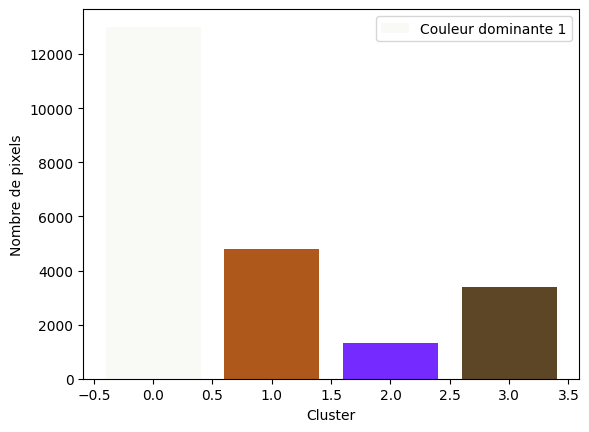

DataFrame pour l'image im-083_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-079_im.png   163,94,22    33,32,23  169,77,255
im-080_im.png   113,49,28    37,32,27   94,19,255
im-081_im.png    58,54,34   127,70,21   63,29,255
im-082_im.png    35,25,14  201,120,24   67,18,255
im-083_im.png   174,89,27    93,70,38  117,43,255

[83 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [31.48358041 -4.49861598 23.0574313 ]
   Code couleur RGB: [0.31020458 0.29484254 0.14586175]
   Nombre de pixels: 6118

Cluster 2:
   Code couleur Lab: [ 9.91713955e+01 -7.39288268e-02  6.60006019e-01]
   Code couleur RGB: [0.99234047 0.99056725 0.98561241]
   Nombre de pixels: 8755

Cluster 3:
   Code couleur Lab: [ 45.76061377  68.79686356 -85.31932711]
   Code couleur RGB: [0.5017075  0.23732703 1.        ]
   Nombre de pixels: 1221

Cluster 4:
   Code couleur Lab: [44.1934744  24.27534006 39.95633887]
   Code couleur RGB: [0.61002932 0.34108628 0.14541559]
   Nombre de pixels: 6406



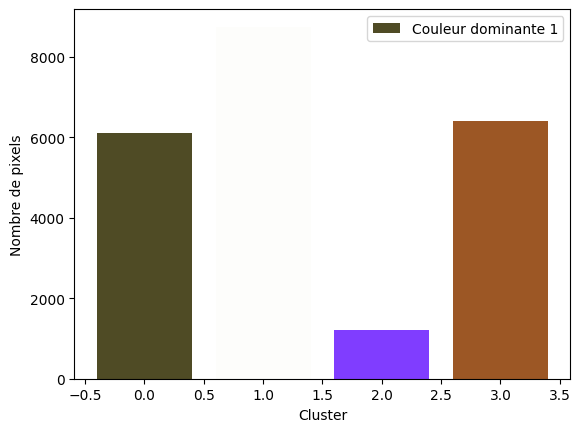

DataFrame pour l'image im-084_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-080_im.png   113,49,28    37,32,27   94,19,255
im-081_im.png    58,54,34   127,70,21   63,29,255
im-082_im.png    35,25,14  201,120,24   67,18,255
im-083_im.png   174,89,27    93,70,38  117,43,255
im-084_im.png   156,87,37    79,75,37  128,61,255

[84 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.86779603 -0.43641389  0.32449576]
   Code couleur RGB: [0.99611491 0.99945461 0.99600942]
   Nombre de pixels: 13842

Cluster 2:
   Code couleur Lab: [28.07044431 27.80310752 25.00866525]
   Code couleur RGB: [0.4381089  0.18109368 0.11346625]
   Nombre de pixels: 5013

Cluster 3:
   Code couleur Lab: [ 57.20224487  17.27052488 -10.23598094]
   Code couleur RGB: [0.62583025 0.50013226 0.60961305]
   Nombre de pixels: 1447

Cluster 4:
   Code couleur Lab: [7.43133768 2.72398981 0.23632524]
   Code couleur RGB: [0.10281118 0.08293357 0.08676301]
   Nombre de pixels: 2198



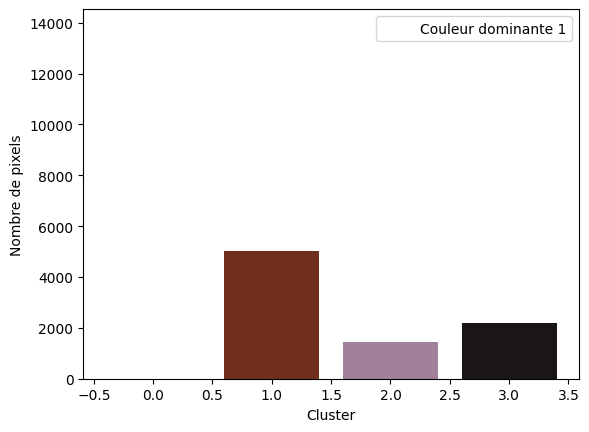

DataFrame pour l'image im-085_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-081_im.png    58,54,34   127,70,21    63,29,255
im-082_im.png    35,25,14  201,120,24    67,18,255
im-083_im.png   174,89,27    93,70,38   117,43,255
im-084_im.png   156,87,37    79,75,37   128,61,255
im-085_im.png   112,46,29    26,21,22  160,128,155

[85 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.16260943 -0.30109935  0.13481591]
   Code couleur RGB: [0.98853067 0.99117357 0.9894606 ]
   Nombre de pixels: 16633

Cluster 2:
   Code couleur Lab: [55.81751856 15.64166656 51.34067612]
   Code couleur RGB: [0.70613901 0.47758931 0.15565537]
   Nombre de pixels: 2928

Cluster 3:
   Code couleur Lab: [ 44.56009749  70.3993397  -87.46917164]
   Code couleur RGB: [0.48337374 0.21678347 1.        ]
   Nombre de pixels: 673

Cluster 4:
   Code couleur Lab: [24.00788787  8.06910063 13.31500549]
   Code couleur RGB: [0.29373359 0.20469794 0.14705632]
   Nombre de pixels: 2266



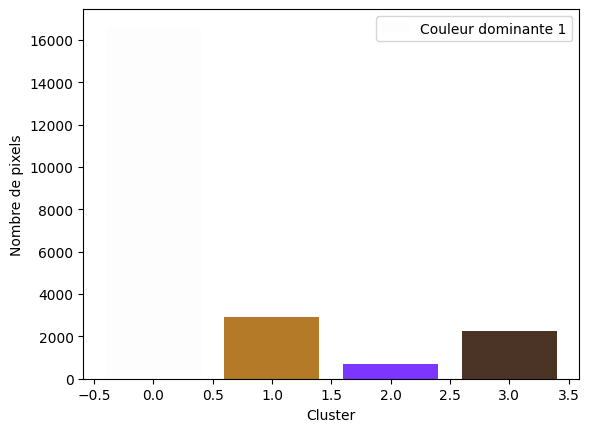

DataFrame pour l'image im-086_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-082_im.png    35,25,14  201,120,24    67,18,255
im-083_im.png   174,89,27    93,70,38   117,43,255
im-084_im.png   156,87,37    79,75,37   128,61,255
im-085_im.png   112,46,29    26,21,22  160,128,155
im-086_im.png  180,122,40    75,52,37   123,55,255

[86 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [61.58525996  6.45926144 23.882166  ]
   Code couleur RGB: [0.68434864 0.56283944 0.41909881]
   Nombre de pixels: 2998

Cluster 2:
   Code couleur Lab: [99.34714786  0.41386331  0.17171585]
   Code couleur RGB: [0.99654927 0.99152182 0.99137487]
   Nombre de pixels: 12444

Cluster 3:
   Code couleur Lab: [58.47347258 30.99255268 45.98927309]
   Code couleur RGB: [0.81518627 0.45915841 0.23482018]
   Nombre de pixels: 4159

Cluster 4:
   Code couleur Lab: [20.1185788   8.69391781 11.15309224]
   Code couleur RGB: [0.25759725 0.17052411 0.12807033]
   Nombre de pixels: 2899



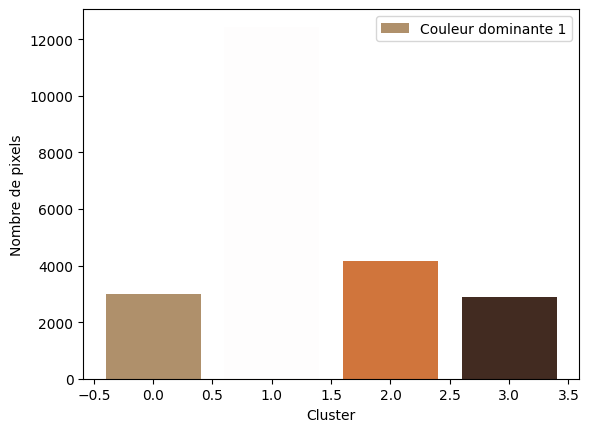

DataFrame pour l'image im-087_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-083_im.png   174,89,27     93,70,38   117,43,255
im-084_im.png   156,87,37     79,75,37   128,61,255
im-085_im.png   112,46,29     26,21,22  160,128,155
im-086_im.png  180,122,40     75,52,37   123,55,255
im-087_im.png  208,117,60  175,144,107     66,43,33

[87 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [11.81061539  1.29752394  3.02554651]
   Code couleur RGB: [0.13579206 0.11913213 0.10605147]
   Nombre de pixels: 8269

Cluster 2:
   Code couleur Lab: [ 9.95075910e+01 -9.09695311e-02 -5.96840859e-04]
   Code couleur RGB: [0.99366771 0.99462136 0.99443233]
   Nombre de pixels: 12523

Cluster 3:
   Code couleur Lab: [48.24210327 26.92444511 45.92816134]
   Code couleur RGB: [0.67373672 0.37106456 0.1354313 ]
   Nombre de pixels: 1463

Cluster 4:
   Code couleur Lab: [ 38.59262708  76.12366215 -97.26820081]
   Code couleur RGB: [0.36292828 0.11538253 1.        ]
   Nombre de pixels: 245



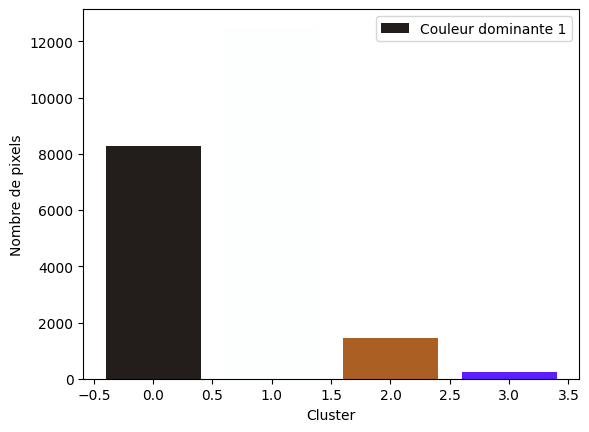

DataFrame pour l'image im-088_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-084_im.png   156,87,37     79,75,37   128,61,255
im-085_im.png   112,46,29     26,21,22  160,128,155
im-086_im.png  180,122,40     75,52,37   123,55,255
im-087_im.png  208,117,60  175,144,107     66,43,33
im-088_im.png    35,30,27    172,95,35    93,29,255

[88 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 41.61638966  73.48060055 -92.34316447]
   Code couleur RGB: [0.4302725  0.16821124 1.        ]
   Nombre de pixels: 317

Cluster 2:
   Code couleur Lab: [28.93535964 -3.37925691 12.05623642]
   Code couleur RGB: [0.27502919 0.27132667 0.19425728]
   Nombre de pixels: 3387

Cluster 3:
   Code couleur Lab: [53.29055551 21.39990587 50.38004356]
   Code couleur RGB: [0.7069218  0.43668955 0.14207936]
   Nombre de pixels: 3675

Cluster 4:
   Code couleur Lab: [97.99821385 -0.59987742 -0.61779922]
   Code couleur RGB: [0.97020657 0.97891923 0.98191312]
   Nombre de pixels: 15121



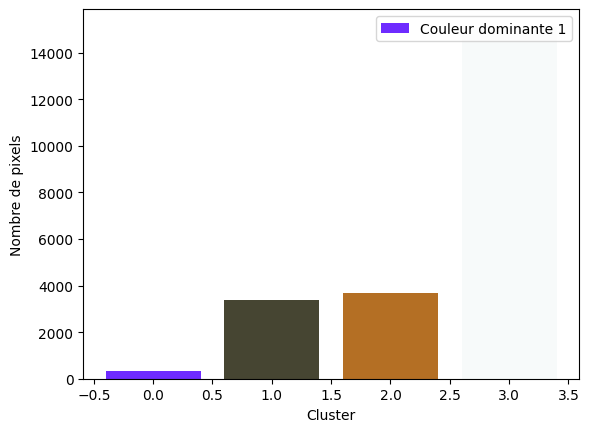

DataFrame pour l'image im-089_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-085_im.png   112,46,29     26,21,22  160,128,155
im-086_im.png  180,122,40     75,52,37   123,55,255
im-087_im.png  208,117,60  175,144,107     66,43,33
im-088_im.png    35,30,27    172,95,35    93,29,255
im-089_im.png  180,111,36     70,69,50   110,43,255

[89 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.93517964e+01 8.12998012e-02 3.38483210e-01]
   Code couleur RGB: [0.99450433 0.99233345 0.99011709]
   Nombre de pixels: 13624

Cluster 2:
   Code couleur Lab: [41.23918021 16.06656501 27.98992205]
   Code couleur RGB: [0.52558275 0.33828107 0.20289849]
   Nombre de pixels: 5683

Cluster 3:
   Code couleur Lab: [  33.64682519   77.60109446 -105.58107871]
   Code couleur RGB: [0.13476604 0.04917797 1.        ]
   Nombre de pixels: 387

Cluster 4:
   Code couleur Lab: [14.09125939  3.56572725 10.17139601]
   Code couleur RGB: [0.17765732 0.13193832 0.08523363]
   Nombre de pixels: 2806



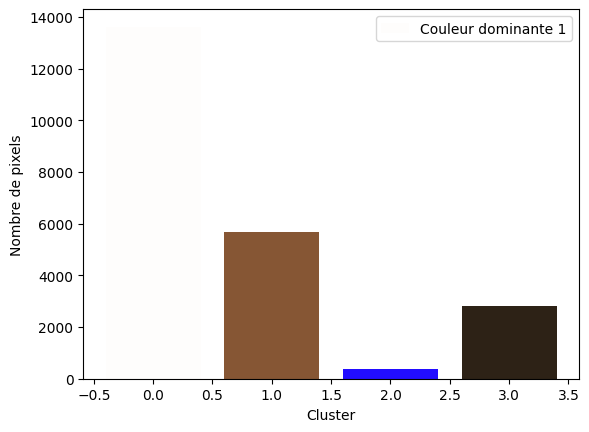

DataFrame pour l'image im-090_im.png:
              ElytraColor    SpotColor SwitchColor
im-001_im.png  203,136,58    133,71,20    46,36,33
im-002_im.png  192,124,51     81,78,76  171,87,255
im-003_im.png   177,83,50     70,55,39    74,1,255
im-004_im.png  181,117,27     55,39,21  119,56,255
im-005_im.png   192,80,47     69,50,33    63,8,255
...                   ...          ...         ...
im-086_im.png  180,122,40     75,52,37  123,55,255
im-087_im.png  208,117,60  175,144,107    66,43,33
im-088_im.png    35,30,27    172,95,35   93,29,255
im-089_im.png  180,111,36     70,69,50  110,43,255
im-090_im.png   134,86,52     45,34,22   34,13,255

[90 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.96387509 -0.23628443  0.70833976]
   Code couleur RGB: [0.98884333 0.9885918  0.98287131]
   Nombre de pixels: 14952

Cluster 2:
   Code couleur Lab: [12.32075635  4.71184595  8.60336656]
   Code couleur RGB: [0.16583485 0.11577693 0.08032442]
   Nombre de pixels: 2624

Cluster 3:
   Code couleur Lab: [44.88905498 41.81900033 51.22205922]
   Code couleur RGB: [0.70923263 0.28187339 0.05873059]
   Nombre de pixels: 3935

Cluster 4:
   Code couleur Lab: [  36.92748939   77.86071867 -100.07854807]
   Code couleur RGB: [0.32216159 0.0756554  1.        ]
   Nombre de pixels: 989



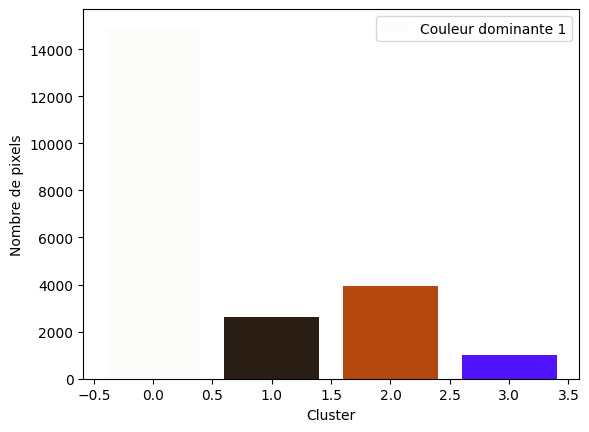

DataFrame pour l'image im-091_im.png:
              ElytraColor    SpotColor SwitchColor
im-001_im.png  203,136,58    133,71,20    46,36,33
im-002_im.png  192,124,51     81,78,76  171,87,255
im-003_im.png   177,83,50     70,55,39    74,1,255
im-004_im.png  181,117,27     55,39,21  119,56,255
im-005_im.png   192,80,47     69,50,33    63,8,255
...                   ...          ...         ...
im-087_im.png  208,117,60  175,144,107    66,43,33
im-088_im.png    35,30,27    172,95,35   93,29,255
im-089_im.png  180,111,36     70,69,50  110,43,255
im-090_im.png   134,86,52     45,34,22   34,13,255
im-091_im.png   181,72,15     42,30,20   82,19,255

[91 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 50.24632152  71.54846379 -77.82874375]
   Code couleur RGB: [0.63029927 0.25739105 1.        ]
   Nombre de pixels: 1139

Cluster 2:
   Code couleur Lab: [29.42778842 -0.06318102 15.8233186 ]
   Code couleur RGB: [0.30535508 0.2689083  0.17577465]
   Nombre de pixels: 2050

Cluster 3:
   Code couleur Lab: [99.25982438  0.2689565  -0.25854693]
   Code couleur RGB: [0.99285163 0.99101154 0.99362413]
   Nombre de pixels: 14366

Cluster 4:
   Code couleur Lab: [45.04357072 31.74957232 47.78228973]
   Code couleur RGB: [0.66129462 0.32366412 0.08915381]
   Nombre de pixels: 4945



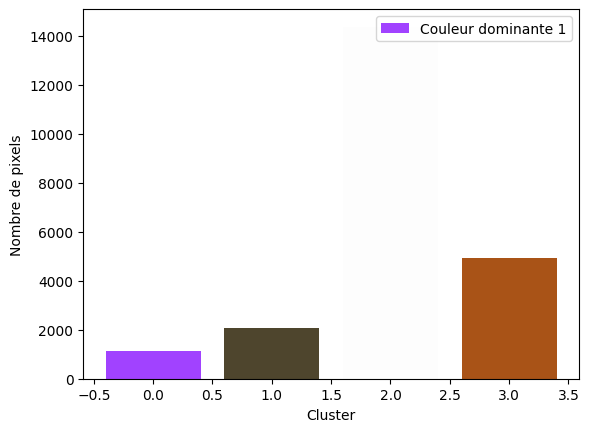

DataFrame pour l'image im-092_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-088_im.png    35,30,27  172,95,35   93,29,255
im-089_im.png  180,111,36   70,69,50  110,43,255
im-090_im.png   134,86,52   45,34,22   34,13,255
im-091_im.png   181,72,15   42,30,20   82,19,255
im-092_im.png   169,83,23   78,69,45  161,66,255

[92 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94154986e+01 -2.79825254e-02  3.04380970e-01]
   Code couleur RGB: [0.99422143 0.99333206 0.99108326]
   Nombre de pixels: 16963

Cluster 2:
   Code couleur Lab: [42.73948325 37.51855089 48.33323543]
   Code couleur RGB: [0.66193762 0.27920138 0.06344104]
   Nombre de pixels: 2668

Cluster 3:
   Code couleur Lab: [ 47.79297595  75.99545644 -81.88127866]
   Code couleur RGB: [0.6099345 0.2008032 1.       ]
   Nombre de pixels: 1139

Cluster 4:
   Code couleur Lab: [18.74230465 -3.1745344   7.81101633]
   Code couleur RGB: [0.17817721 0.18277835 0.13427757]
   Nombre de pixels: 1730



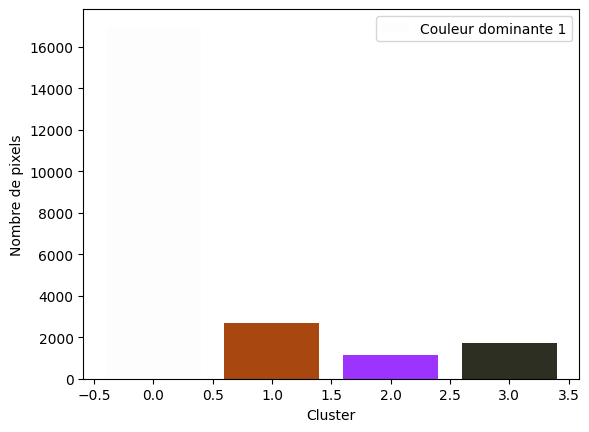

DataFrame pour l'image im-093_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-089_im.png  180,111,36   70,69,50  110,43,255
im-090_im.png   134,86,52   45,34,22   34,13,255
im-091_im.png   181,72,15   42,30,20   82,19,255
im-092_im.png   169,83,23   78,69,45  161,66,255
im-093_im.png   169,71,16   45,47,34  156,51,255

[93 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.73629231e+01 -2.07924222e-01 -3.05519328e-02]
   Code couleur RGB: [0.96831959 0.97061253 0.9703424 ]
   Nombre de pixels: 12178

Cluster 2:
   Code couleur Lab: [47.26688913 38.52600676 48.81057084]
   Code couleur RGB: [0.72105731 0.31978122 0.10708292]
   Nombre de pixels: 5118

Cluster 3:
   Code couleur Lab: [18.70416605 12.08204194  3.12734439]
   Code couleur RGB: [0.24926319 0.15223596 0.16236585]
   Nombre de pixels: 3794

Cluster 4:
   Code couleur Lab: [ 47.07552238  76.25217242 -83.17440778]
   Code couleur RGB: [0.59501744 0.19191729 1.        ]
   Nombre de pixels: 1410



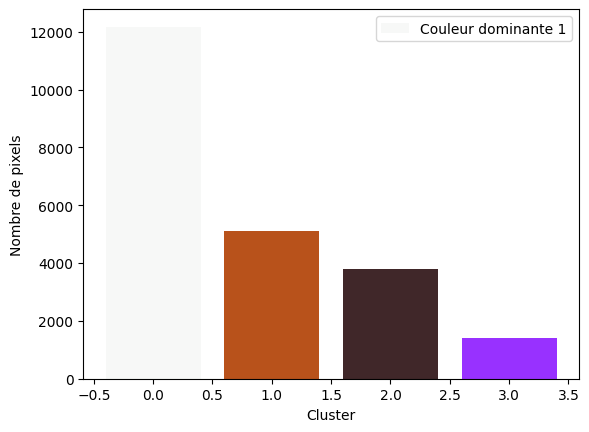

DataFrame pour l'image im-094_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-090_im.png   134,86,52   45,34,22   34,13,255
im-091_im.png   181,72,15   42,30,20   82,19,255
im-092_im.png   169,83,23   78,69,45  161,66,255
im-093_im.png   169,71,16   45,47,34  156,51,255
im-094_im.png   184,82,27   64,39,41  152,49,255

[94 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.92393166e+01 7.83855243e-02 1.29964427e-01]
   Code couleur RGB: [0.99246161 0.99112581 0.99042066]
   Nombre de pixels: 13973

Cluster 2:
   Code couleur Lab: [14.38824621 -2.92474947 12.54708787]
   Code couleur RGB: [0.1509994  0.14557166 0.0725924 ]
   Nombre de pixels: 2349

Cluster 3:
   Code couleur Lab: [ 44.86260805  63.5210987  -86.98220007]
   Code couleur RGB: [0.42479555 0.26227923 1.        ]
   Nombre de pixels: 1337

Cluster 4:
   Code couleur Lab: [46.14609409  4.63246618 48.00231608]
   Code couleur RGB: [0.53531635 0.41071546 0.07816565]
   Nombre de pixels: 4841



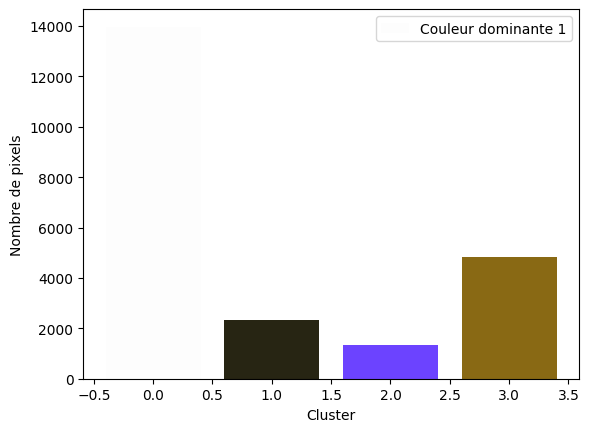

DataFrame pour l'image im-095_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-091_im.png   181,72,15   42,30,20   82,19,255
im-092_im.png   169,83,23   78,69,45  161,66,255
im-093_im.png   169,71,16   45,47,34  156,51,255
im-094_im.png   184,82,27   64,39,41  152,49,255
im-095_im.png  137,105,20   39,37,19  108,67,255

[95 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [23.87131574 -2.58608215 19.10849673]
   Code couleur RGB: [0.24473014 0.2241235  0.10832493]
   Nombre de pixels: 2433

Cluster 2:
   Code couleur Lab: [ 9.95849419e+01 -9.54604757e-02  1.14494781e-02]
   Code couleur RGB: [0.99455274 0.9955072  0.99521888]
   Nombre de pixels: 16768

Cluster 3:
   Code couleur Lab: [  35.04492548   75.81535525 -103.2399603 ]
   Code couleur RGB: [0.19754675 0.09038634 1.        ]
   Nombre de pixels: 612

Cluster 4:
   Code couleur Lab: [59.05917175 22.16995992 49.86573564]
   Code couleur RGB: [0.77810879 0.49187683 0.20484974]
   Nombre de pixels: 2687



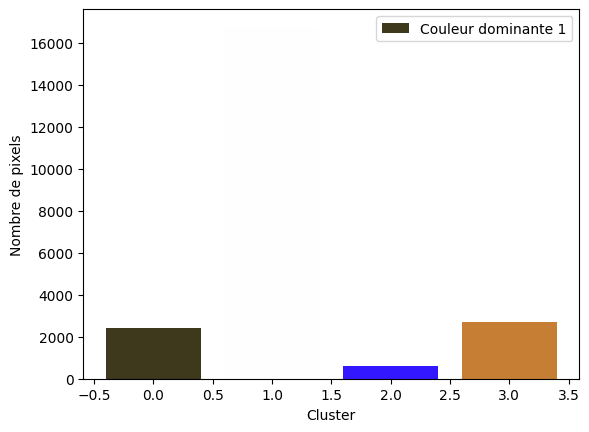

DataFrame pour l'image im-096_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-092_im.png   169,83,23   78,69,45  161,66,255
im-093_im.png   169,71,16   45,47,34  156,51,255
im-094_im.png   184,82,27   64,39,41  152,49,255
im-095_im.png  137,105,20   39,37,19  108,67,255
im-096_im.png  198,125,52   62,57,28   50,23,255

[96 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.75776834 -0.44186982  0.15500146]
   Code couleur RGB: [0.99421367 0.9982676  0.99604488]
   Nombre de pixels: 17061

Cluster 2:
   Code couleur Lab: [44.63970349 46.11410356 42.79308077]
   Code couleur RGB: [0.7225673  0.2601973  0.13840603]
   Nombre de pixels: 3757

Cluster 3:
   Code couleur Lab: [  35.63647662   79.86040011 -102.23825163]
   Code couleur RGB: [0.29590145 0.01525325 1.        ]
   Nombre de pixels: 330

Cluster 4:
   Code couleur Lab: [19.19181227 10.97179198  8.64483815]
   Code couleur RGB: [0.25661709 0.15786207 0.1352686 ]
   Nombre de pixels: 1352



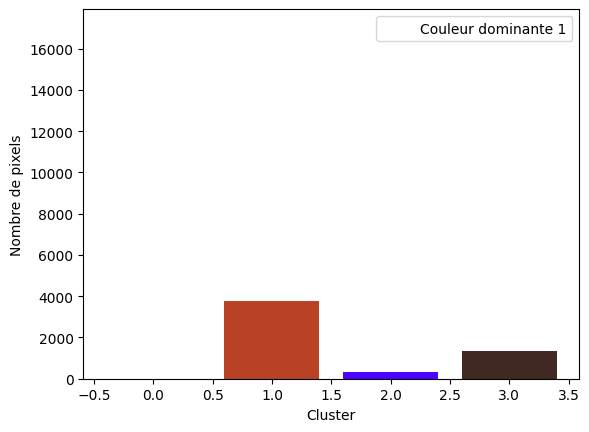

DataFrame pour l'image im-097_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-093_im.png   169,71,16   45,47,34  156,51,255
im-094_im.png   184,82,27   64,39,41  152,49,255
im-095_im.png  137,105,20   39,37,19  108,67,255
im-096_im.png  198,125,52   62,57,28   50,23,255
im-097_im.png   184,66,35   65,40,34    75,4,255

[97 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.93032877e+01 -9.77866260e-02  7.24312933e-01]
   Code couleur RGB: [0.99387263 0.99210302 0.9866172 ]
   Nombre de pixels: 11645

Cluster 2:
   Code couleur Lab: [43.49933571 52.39261921 52.32368206]
   Code couleur RGB: [0.74183684 0.21131698 0.0413612 ]
   Nombre de pixels: 7483

Cluster 3:
   Code couleur Lab: [ 47.27348682  81.88506112 -82.68633952]
   Code couleur RGB: [0.64273456 0.13183681 1.        ]
   Nombre de pixels: 970

Cluster 4:
   Code couleur Lab: [14.3850923   7.22172335 13.39761888]
   Code couleur RGB: [0.20102357 0.12628891 0.06911178]
   Nombre de pixels: 2402



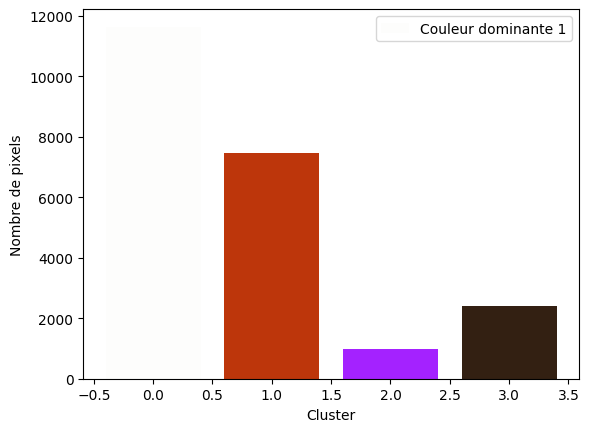

DataFrame pour l'image im-098_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-094_im.png   184,82,27   64,39,41  152,49,255
im-095_im.png  137,105,20   39,37,19  108,67,255
im-096_im.png  198,125,52   62,57,28   50,23,255
im-097_im.png   184,66,35   65,40,34    75,4,255
im-098_im.png   189,54,11   51,32,18  164,34,255

[98 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95055948e+01 3.55749498e-02 1.54122102e-01]
   Code couleur RGB: [0.99522446 0.99424552 0.99325414]
   Nombre de pixels: 18202

Cluster 2:
   Code couleur Lab: [23.6010476   9.95390508 10.71669643]
   Code couleur RGB: [0.29576073 0.19730687 0.1593457 ]
   Nombre de pixels: 2082

Cluster 3:
   Code couleur Lab: [ 42.7981504   76.15759697 -90.219474  ]
   Code couleur RGB: [0.48992912 0.15258395 1.        ]
   Nombre de pixels: 441

Cluster 4:
   Code couleur Lab: [36.03286515 33.70315861 40.50052626]
   Code couleur RGB: [0.56225042 0.23057634 0.07016444]
   Nombre de pixels: 1775



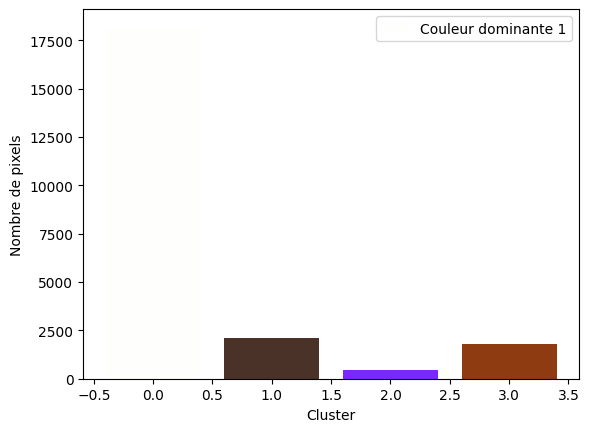

DataFrame pour l'image im-099_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-095_im.png  137,105,20   39,37,19  108,67,255
im-096_im.png  198,125,52   62,57,28   50,23,255
im-097_im.png   184,66,35   65,40,34    75,4,255
im-098_im.png   189,54,11   51,32,18  164,34,255
im-099_im.png    75,50,41  143,59,18  125,39,255

[99 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 60.52756017  57.14422569 -61.41865176]
   Code couleur RGB: [0.73289712 0.42670802 1.        ]
   Nombre de pixels: 1854

Cluster 2:
   Code couleur Lab: [ 9.91807823e+01 -1.93272724e-02  7.98108909e-01]
   Code couleur RGB: [0.99337677 0.99050051 0.98467999]
   Nombre de pixels: 12708

Cluster 3:
   Code couleur Lab: [14.70811819 -2.97230541 12.22067792]
   Code couleur RGB: [0.15290243 0.14830389 0.0772122 ]
   Nombre de pixels: 2123

Cluster 4:
   Code couleur Lab: [64.22831065 18.75029656 65.20555955]
   Code couleur RGB: [0.83160563 0.55237275 0.09492538]
   Nombre de pixels: 5815



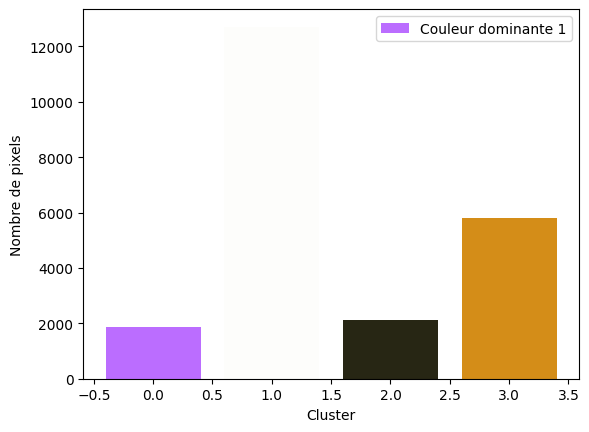

DataFrame pour l'image im-100_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-096_im.png  198,125,52   62,57,28    50,23,255
im-097_im.png   184,66,35   65,40,34     75,4,255
im-098_im.png   189,54,11   51,32,18   164,34,255
im-099_im.png    75,50,41  143,59,18   125,39,255
im-100_im.png  212,141,24   39,38,20  187,109,255

[100 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.27794785 31.10623953 59.90265609]
   Code couleur RGB: [0.84699652 0.47535791 0.12606366]
   Nombre de pixels: 3329

Cluster 2:
   Code couleur Lab: [ 9.97972248e+01 -6.31599177e-02  1.78412328e-01]
   Code couleur RGB: [0.99782346 0.99779089 0.99636834]
   Nombre de pixels: 17606

Cluster 3:
   Code couleur Lab: [19.30328759  9.39634278 14.58875902]
   Code couleur RGB: [0.25733306 0.16153527 0.10174844]
   Nombre de pixels: 1130

Cluster 4:
   Code couleur Lab: [ 44.1560008   72.63536979 -88.11664182]
   Code couleur RGB: [0.49310103 0.19653729 1.        ]
   Nombre de pixels: 435



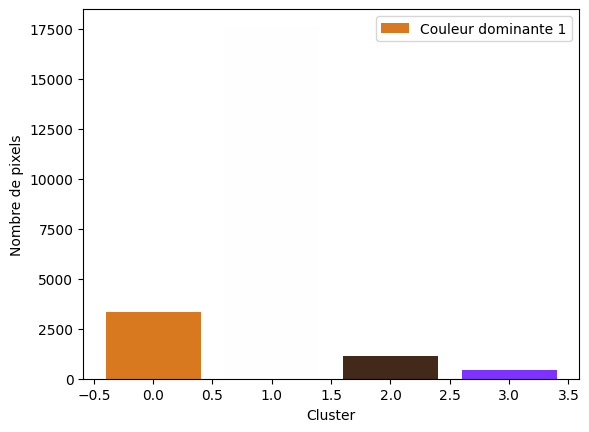

DataFrame pour l'image im-101_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-097_im.png   184,66,35   65,40,34     75,4,255
im-098_im.png   189,54,11   51,32,18   164,34,255
im-099_im.png    75,50,41  143,59,18   125,39,255
im-100_im.png  212,141,24   39,38,20  187,109,255
im-101_im.png  216,121,32   66,41,26   126,50,255

[101 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.42687388  0.89022099 -0.46410049]
   Code couleur RGB: [0.99904378 0.99145549 0.9971659 ]
   Nombre de pixels: 17056

Cluster 2:
   Code couleur Lab: [ 43.4560037   72.40612682 -89.26875344]
   Code couleur RGB: [0.47235096 0.1924659  1.        ]
   Nombre de pixels: 531

Cluster 3:
   Code couleur Lab: [76.3280049  10.88109804 76.03170678]
   Code couleur RGB: [0.94044063 0.69825372 0.09165558]
   Nombre de pixels: 2604

Cluster 4:
   Code couleur Lab: [19.40189029  6.87332743 16.96000745]
   Code couleur RGB: [0.24884805 0.16771919 0.08784802]
   Nombre de pixels: 2309



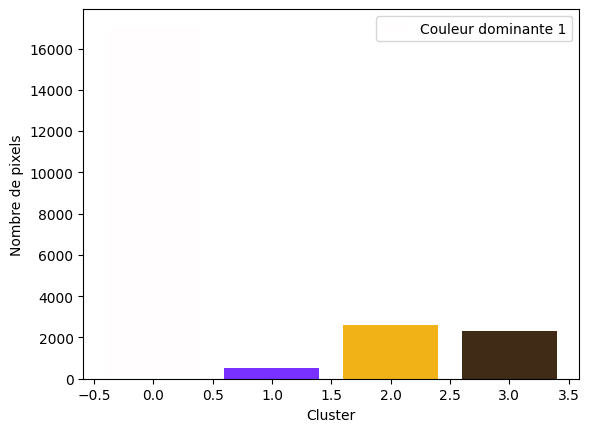

DataFrame pour l'image im-102_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-098_im.png   189,54,11   51,32,18   164,34,255
im-099_im.png    75,50,41  143,59,18   125,39,255
im-100_im.png  212,141,24   39,38,20  187,109,255
im-101_im.png  216,121,32   66,41,26   126,50,255
im-102_im.png  240,178,23   63,43,22   120,49,255

[102 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [23.9557703  -3.574078   10.61569768]
   Code couleur RGB: [0.22643705 0.22778476 0.16075965]
   Nombre de pixels: 4006

Cluster 2:
   Code couleur Lab: [ 9.80449201e+01  6.09934965e-01 -2.84109571e-02]
   Code couleur RGB: [0.98264667 0.97634556 0.97815508]
   Nombre de pixels: 14581

Cluster 3:
   Code couleur Lab: [50.58869008 25.11142792 32.85468195]
   Code couleur RGB: [0.68083396 0.40140386 0.25640899]
   Nombre de pixels: 3772

Cluster 4:
   Code couleur Lab: [  34.62155616   78.84166234 -103.94594141]
   Code couleur RGB: [0.23089502 0.02973406 1.        ]
   Nombre de pixels: 141



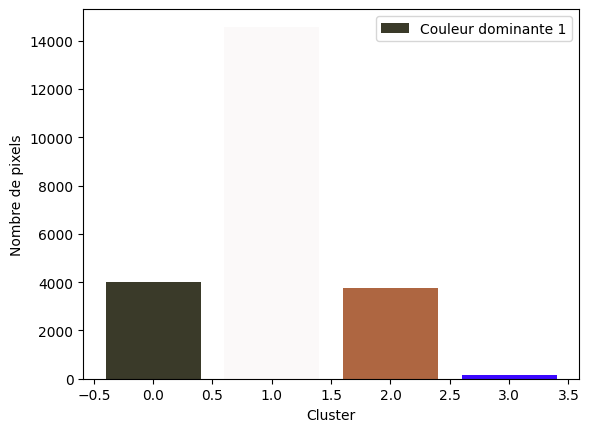

DataFrame pour l'image im-103_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-099_im.png    75,50,41   143,59,18   125,39,255
im-100_im.png  212,141,24    39,38,20  187,109,255
im-101_im.png  216,121,32    66,41,26   126,50,255
im-102_im.png  240,178,23    63,43,22   120,49,255
im-103_im.png    58,58,41  174,102,65     59,8,255

[103 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [54.85724819 35.62287132 41.12259115]
   Code couleur RGB: [0.7923317  0.40757836 0.23978829]
   Nombre de pixels: 5043

Cluster 2:
   Code couleur Lab: [9.65065362e+01 5.34616121e-02 2.46012457e-01]
   Code couleur RGB: [0.96174083 0.96022898 0.95862366]
   Nombre de pixels: 14149

Cluster 3:
   Code couleur Lab: [12.47404015  1.32802241  0.22367707]
   Code couleur RGB: [0.13527185 0.12491603 0.12622498]
   Nombre de pixels: 3173

Cluster 4:
   Code couleur Lab: [ 37.0566156   81.73387096 -99.86170158]
   Code couleur RGB: [0.37294023 0.         1.        ]
   Nombre de pixels: 135



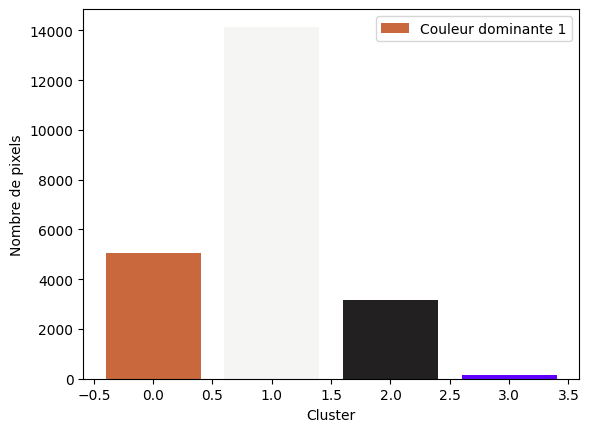

DataFrame pour l'image im-104_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-100_im.png  212,141,24    39,38,20  187,109,255
im-101_im.png  216,121,32    66,41,26   126,50,255
im-102_im.png  240,178,23    63,43,22   120,49,255
im-103_im.png    58,58,41  174,102,65     59,8,255
im-104_im.png  202,104,61    34,32,32     95,0,255

[104 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95661633e+01 4.11900638e-02 2.50205713e-01]
   Code couleur RGB: [0.99630039 0.99489116 0.99321403]
   Nombre de pixels: 13507

Cluster 2:
   Code couleur Lab: [35.43366373 17.30901388 10.00221181]
   Code couleur RGB: [0.44842093 0.28421118 0.26728581]
   Nombre de pixels: 3301

Cluster 3:
   Code couleur Lab: [8.35203113 1.60618854 2.65891775]
   Code couleur RGB: [0.10919817 0.0916607  0.0808487 ]
   Nombre de pixels: 2810

Cluster 4:
   Code couleur Lab: [40.65828156 40.63008598 33.5056989 ]
   Code couleur RGB: [0.644061   0.24719377 0.16820374]
   Nombre de pixels: 2882



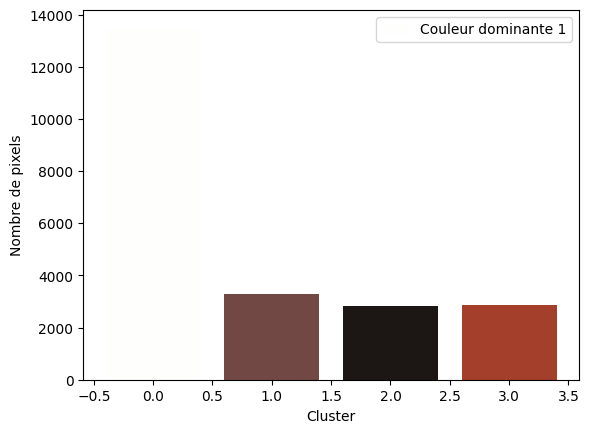

DataFrame pour l'image im-105_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-101_im.png  216,121,32    66,41,26  126,50,255
im-102_im.png  240,178,23    63,43,22  120,49,255
im-103_im.png    58,58,41  174,102,65    59,8,255
im-104_im.png  202,104,61    34,32,32    95,0,255
im-105_im.png   114,72,68   164,63,43    28,23,21

[105 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97532607e+01 -4.87279011e-02  1.81741978e-01]
   Code couleur RGB: [0.99745288 0.99725529 0.99584564]
   Nombre de pixels: 14391

Cluster 2:
   Code couleur Lab: [ 6.83867023 -1.975134    5.78989127]
   Code couleur RGB: [0.08629856 0.08514333 0.04213033]
   Nombre de pixels: 5324

Cluster 3:
   Code couleur Lab: [  35.3944169    76.64443867 -102.64416129]
   Code couleur RGB: [0.23429872 0.08120969 1.        ]
   Nombre de pixels: 1271

Cluster 4:
   Code couleur Lab: [38.18597347 17.44191288 35.53748123]
   Code couleur RGB: [0.50618256 0.30504857 0.1221306 ]
   Nombre de pixels: 1514



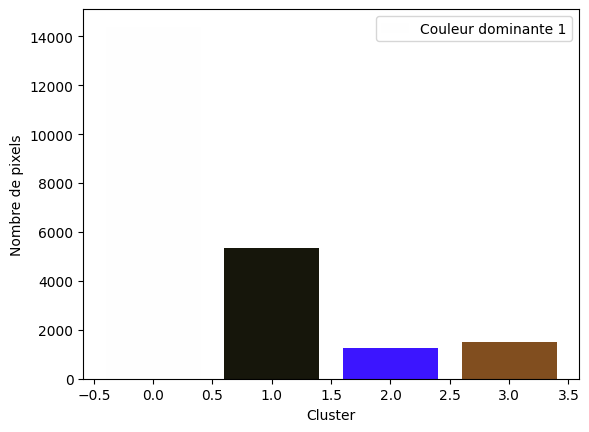

DataFrame pour l'image im-106_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-102_im.png  240,178,23    63,43,22  120,49,255
im-103_im.png    58,58,41  174,102,65    59,8,255
im-104_im.png  202,104,61    34,32,32    95,0,255
im-105_im.png   114,72,68   164,63,43    28,23,21
im-106_im.png    22,22,11   129,78,31   60,21,255

[106 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [25.73820634  6.27000593 27.97986372]
   Code couleur RGB: [0.31640554 0.22180783 0.0654277 ]
   Nombre de pixels: 2430

Cluster 2:
   Code couleur Lab: [9.98414519e+01 5.97091664e-02 1.68956302e-01]
   Code couleur RGB: [0.99928929 0.99799786 0.99695975]
   Nombre de pixels: 15251

Cluster 3:
   Code couleur Lab: [ 56.19407428  62.86515066 -68.33331277]
   Code couleur RGB: [0.68908652 0.3608695  1.        ]
   Nombre de pixels: 1251

Cluster 4:
   Code couleur Lab: [64.16618153 25.50400418 67.15056138]
   Code couleur RGB: [0.86875964 0.5318722  0.06945731]
   Nombre de pixels: 3568



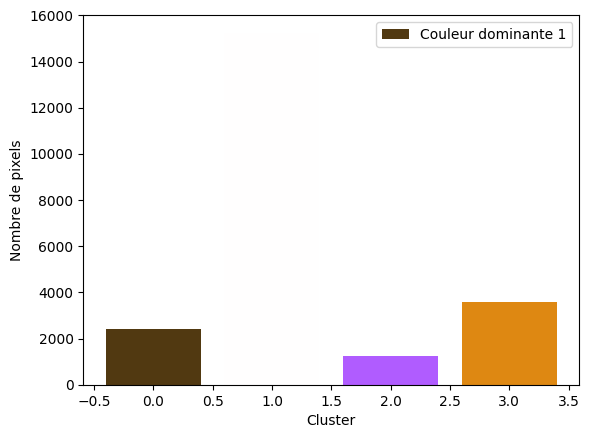

DataFrame pour l'image im-107_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-103_im.png    58,58,41  174,102,65    59,8,255
im-104_im.png  202,104,61    34,32,32    95,0,255
im-105_im.png   114,72,68   164,63,43    28,23,21
im-106_im.png    22,22,11   129,78,31   60,21,255
im-107_im.png  222,136,18    81,57,17  176,92,255

[107 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.97945336e+01 -4.76587304e-02  9.95107486e-02]
   Code couleur RGB: [0.99763684 0.99774617 0.99693859]
   Nombre de pixels: 15578

Cluster 2:
   Code couleur Lab: [12.31296948  5.38428166 11.27777845]
   Code couleur RGB: [0.17244089 0.11391289 0.06352877]
   Nombre de pixels: 3169

Cluster 3:
   Code couleur Lab: [  36.30769595   75.55646695 -101.15308969]
   Code couleur RGB: [0.26206048 0.10367194 1.        ]
   Nombre de pixels: 893

Cluster 4:
   Code couleur Lab: [50.08561784 12.95511154 47.37549536]
   Code couleur RGB: [0.62340651 0.42871484 0.13281773]
   Nombre de pixels: 2860



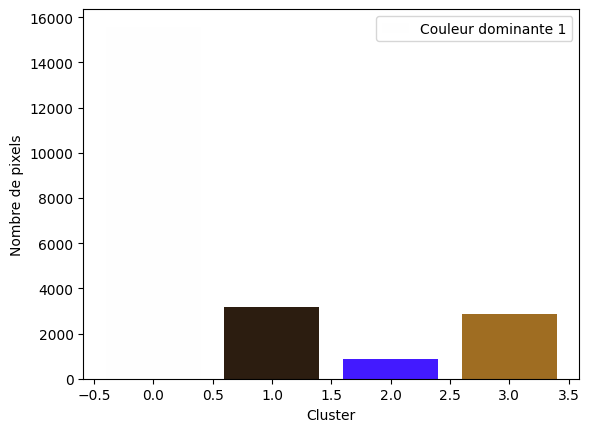

DataFrame pour l'image im-108_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-104_im.png  202,104,61    34,32,32    95,0,255
im-105_im.png   114,72,68   164,63,43    28,23,21
im-106_im.png    22,22,11   129,78,31   60,21,255
im-107_im.png  222,136,18    81,57,17  176,92,255
im-108_im.png    44,29,16  159,109,34   67,26,255

[108 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.94875434e+01 5.29806546e-02 2.86819531e-01]
   Code couleur RGB: [0.99563313 0.9939588  0.99204547]
   Nombre de pixels: 13528

Cluster 2:
   Code couleur Lab: [43.80551129 33.36994734 47.74472612]
   Code couleur RGB: [0.65454525 0.30581125 0.07772792]
   Nombre de pixels: 5731

Cluster 3:
   Code couleur Lab: [ 46.11637947  74.74666771 -84.6807148 ]
   Code couleur RGB: [0.56132773 0.19598648 1.        ]
   Nombre de pixels: 1156

Cluster 4:
   Code couleur Lab: [ 33.50874128 -13.56725249  28.36500206]
   Code couleur RGB: [0.28181553 0.32837696 0.12398365]
   Nombre de pixels: 2085



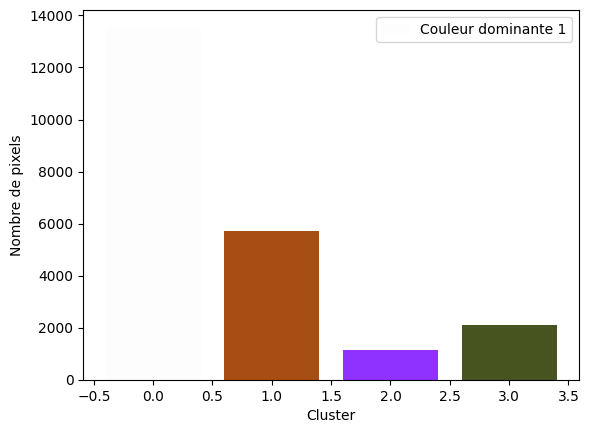

DataFrame pour l'image im-109_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-105_im.png   114,72,68   164,63,43    28,23,21
im-106_im.png    22,22,11   129,78,31   60,21,255
im-107_im.png  222,136,18    81,57,17  176,92,255
im-108_im.png    44,29,16  159,109,34   67,26,255
im-109_im.png   167,78,20    72,84,32  143,50,255

[109 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [19.78228525 -4.5268477  11.11389011]
   Code couleur RGB: [0.18553561 0.19333737 0.12343215]
   Nombre de pixels: 2771

Cluster 2:
   Code couleur Lab: [99.19834722 -0.17864517  0.7752111 ]
   Code couleur RGB: [0.99220725 0.99109288 0.98503027]
   Nombre de pixels: 12382

Cluster 3:
   Code couleur Lab: [63.2029914  32.51726222 63.06290517]
   Code couleur RGB: [0.89208319 0.50008707 0.12471727]
   Nombre de pixels: 6679

Cluster 4:
   Code couleur Lab: [ 58.46639832  68.12060664 -64.50142059]
   Code couleur RGB: [0.77224392 0.35376214 1.        ]
   Nombre de pixels: 668



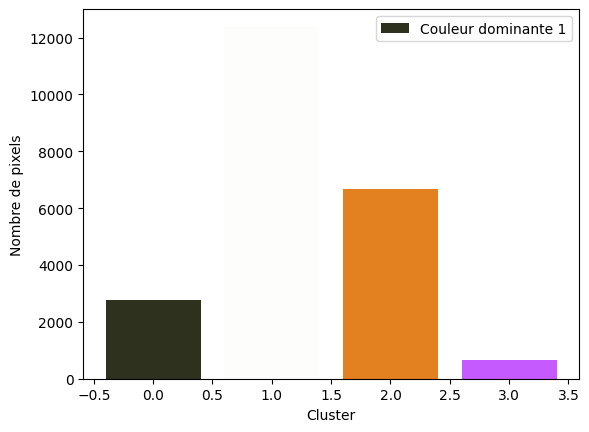

DataFrame pour l'image im-110_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-106_im.png    22,22,11   129,78,31   60,21,255
im-107_im.png  222,136,18    81,57,17  176,92,255
im-108_im.png    44,29,16  159,109,34   67,26,255
im-109_im.png   167,78,20    72,84,32  143,50,255
im-110_im.png  227,128,32    47,49,31  197,90,255

[110 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [56.22045091 -2.21095824 19.2078526 ]
   Code couleur RGB: [0.56327901 0.52884201 0.39778412]
   Nombre de pixels: 1296

Cluster 2:
   Code couleur Lab: [9.99130826e+01 1.09696492e-02 4.81336779e-02]
   Code couleur RGB: [0.99927651 0.99896639 0.99868384]
   Nombre de pixels: 14925

Cluster 3:
   Code couleur Lab: [21.92796605  2.56679002 14.51332053]
   Code couleur RGB: [0.24816066 0.19829791 0.12187549]
   Nombre de pixels: 2963

Cluster 4:
   Code couleur Lab: [37.93005611 27.43931514 33.78345875]
   Code couleur RGB: [0.55070329 0.27240142 0.13712221]
   Nombre de pixels: 3316



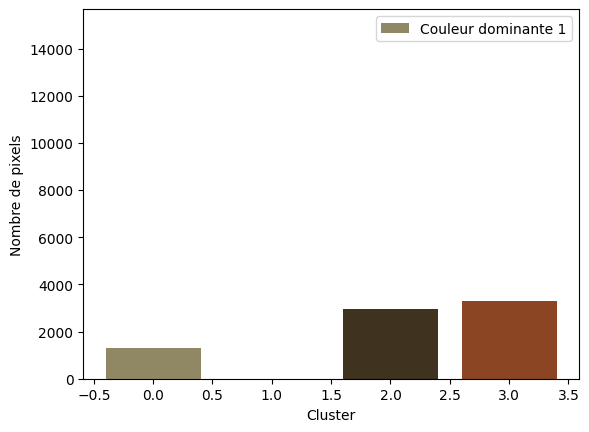

DataFrame pour l'image im-111_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-107_im.png  222,136,18    81,57,17   176,92,255
im-108_im.png    44,29,16  159,109,34    67,26,255
im-109_im.png   167,78,20    72,84,32   143,50,255
im-110_im.png  227,128,32    47,49,31   197,90,255
im-111_im.png   140,69,35    63,51,31  144,135,101

[111 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [52.13669081 44.46350388 57.4406909 ]
   Code couleur RGB: [0.81327385 0.34311487 0.07145954]
   Nombre de pixels: 6226

Cluster 2:
   Code couleur Lab: [ 43.86131604  72.40474991 -88.50188426]
   Code couleur RGB: [0.48407705 0.19567365 1.        ]
   Nombre de pixels: 487

Cluster 3:
   Code couleur Lab: [17.54272623 -0.0697776  14.22325405]
   Code couleur RGB: [0.19499781 0.16640367 0.08812739]
   Nombre de pixels: 3565

Cluster 4:
   Code couleur Lab: [9.87352478e+01 3.02042622e-02 1.03392771e+00]
   Code couleur RGB: [0.98955022 0.98525744 0.97785374]
   Nombre de pixels: 12222



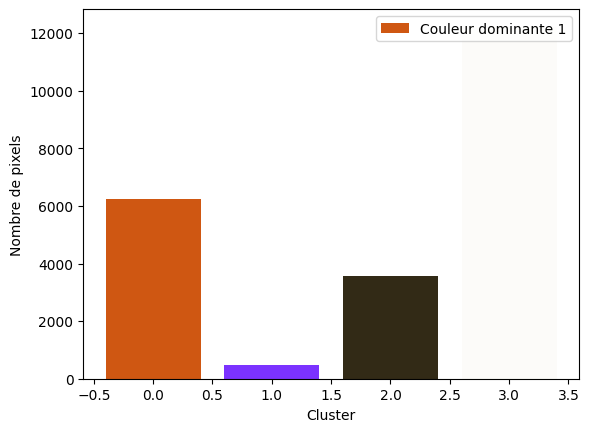

DataFrame pour l'image im-112_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-108_im.png    44,29,16  159,109,34    67,26,255
im-109_im.png   167,78,20    72,84,32   143,50,255
im-110_im.png  227,128,32    47,49,31   197,90,255
im-111_im.png   140,69,35    63,51,31  144,135,101
im-112_im.png   207,87,18    50,42,22   123,50,255

[112 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64688027 -0.63772519  0.31419914]
   Code couleur RGB: [0.9919314  0.99743398 0.99355038]
   Nombre de pixels: 13265

Cluster 2:
   Code couleur Lab: [29.38507187 39.2338131  31.26482674]
   Code couleur RGB: [0.50649029 0.14036678 0.08747334]
   Nombre de pixels: 6293

Cluster 3:
   Code couleur Lab: [  34.33661471   79.45380437 -104.40621659]
   Code couleur RGB: [0.22637729 0.01115697 1.        ]
   Nombre de pixels: 131

Cluster 4:
   Code couleur Lab: [58.73928526 15.31455245  1.9363107 ]
   Code couleur RGB: [0.66298764 0.51697477 0.5429127 ]
   Nombre de pixels: 2811



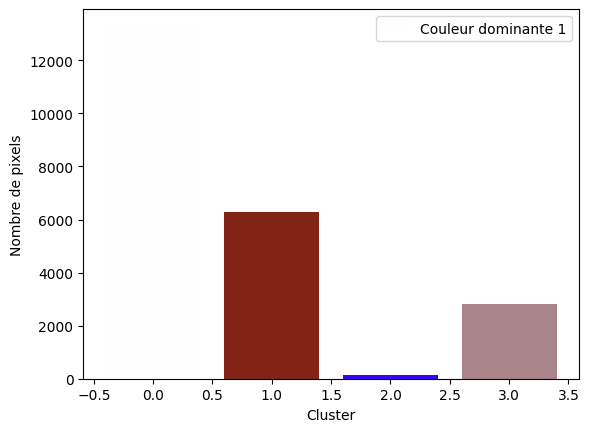

DataFrame pour l'image im-113_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-109_im.png   167,78,20     72,84,32   143,50,255
im-110_im.png  227,128,32     47,49,31   197,90,255
im-111_im.png   140,69,35     63,51,31  144,135,101
im-112_im.png   207,87,18     50,42,22   123,50,255
im-113_im.png   129,36,22  169,132,138     58,3,255

[113 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.98529367e+01 1.40090900e-02 5.89611769e-02]
   Code couleur RGB: [0.99865626 0.99827219 0.99791853]
   Nombre de pixels: 16861

Cluster 2:
   Code couleur Lab: [42.55447727 24.06427012 44.85489873]
   Code couleur RGB: [0.59341621 0.325618   0.08687503]
   Nombre de pixels: 3806

Cluster 3:
   Code couleur Lab: [ 47.12985345  67.41179336 -83.0737963 ]
   Code couleur RGB: [0.52403492 0.25745896 1.        ]
   Nombre de pixels: 547

Cluster 4:
   Code couleur Lab: [28.3751051   3.07598114 16.13166173]
   Code couleur RGB: [0.31309023 0.25319452 0.1655074 ]
   Nombre de pixels: 1286



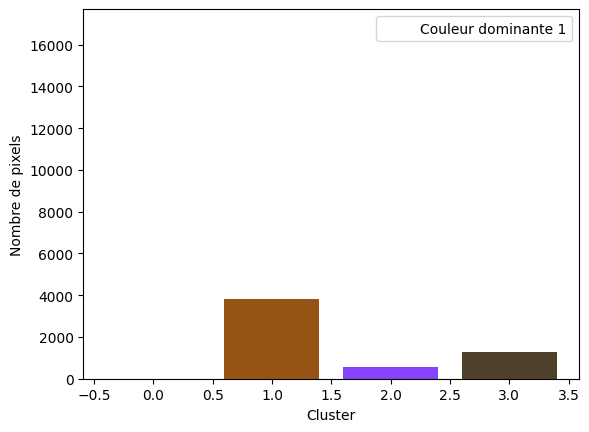

DataFrame pour l'image im-114_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-110_im.png  227,128,32     47,49,31   197,90,255
im-111_im.png   140,69,35     63,51,31  144,135,101
im-112_im.png   207,87,18     50,42,22   123,50,255
im-113_im.png   129,36,22  169,132,138     58,3,255
im-114_im.png   151,83,22     80,65,42   134,66,255

[114 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.94545321 15.61749435 51.7302775 ]
   Code couleur RGB: [0.76574062 0.52897839 0.20430059]
   Nombre de pixels: 3260

Cluster 2:
   Code couleur Lab: [98.85793135 -0.10989815  0.1729488 ]
   Code couleur RGB: [0.98676218 0.98724271 0.98574274]
   Nombre de pixels: 13888

Cluster 3:
   Code couleur Lab: [18.75901194 -1.40386507 12.55083849]
   Code couleur RGB: [0.19637159 0.1791596  0.107329  ]
   Nombre de pixels: 4773

Cluster 4:
   Code couleur Lab: [  36.0340475    75.3922736  -101.60662305]
   Code couleur RGB: [0.24581084 0.10356716 1.        ]
   Nombre de pixels: 579



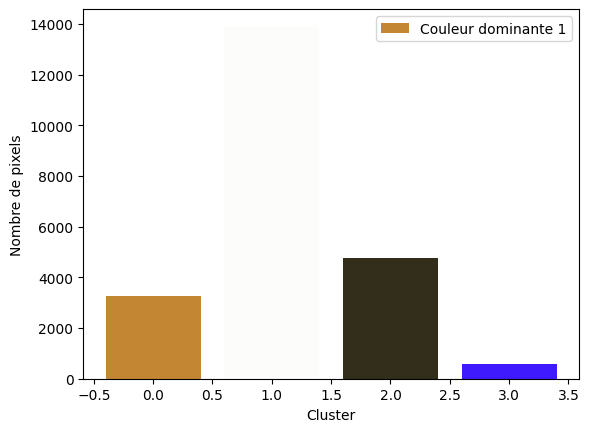

DataFrame pour l'image im-115_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-111_im.png   140,69,35     63,51,31  144,135,101
im-112_im.png   207,87,18     50,42,22   123,50,255
im-113_im.png   129,36,22  169,132,138     58,3,255
im-114_im.png   151,83,22     80,65,42   134,66,255
im-115_im.png    50,46,27   195,135,52    63,26,255

[115 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.89264196e+01 -3.09024862e-02  5.50898615e-01]
   Code couleur RGB: [0.98952171 0.98771597 0.98366803]
   Nombre de pixels: 15241

Cluster 2:
   Code couleur Lab: [14.94041667 -3.06228198  5.45414527]
   Code couleur RGB: [0.14231756 0.15133824 0.11702505]
   Nombre de pixels: 5741

Cluster 3:
   Code couleur Lab: [64.27139738 13.9190903  49.07104909]
   Code couleur RGB: [0.79242738 0.56762437 0.25932249]
   Nombre de pixels: 1296

Cluster 4:
   Code couleur Lab: [ 37.16500446  79.24069352 -99.68488341]
   Code couleur RGB: [0.34812907 0.05131525 1.        ]
   Nombre de pixels: 222



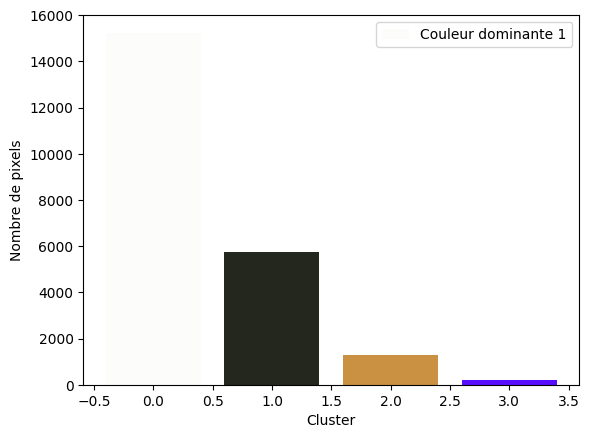

DataFrame pour l'image im-116_im.png:
              ElytraColor    SpotColor SwitchColor
im-001_im.png  203,136,58    133,71,20    46,36,33
im-002_im.png  192,124,51     81,78,76  171,87,255
im-003_im.png   177,83,50     70,55,39    74,1,255
im-004_im.png  181,117,27     55,39,21  119,56,255
im-005_im.png   192,80,47     69,50,33    63,8,255
...                   ...          ...         ...
im-112_im.png   207,87,18     50,42,22  123,50,255
im-113_im.png   129,36,22  169,132,138    58,3,255
im-114_im.png   151,83,22     80,65,42  134,66,255
im-115_im.png    50,46,27   195,135,52   63,26,255
im-116_im.png    36,39,30   202,145,66   89,13,255

[116 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [77.31364162 19.19476145 28.69247493]
   Code couleur RGB: [0.94860346 0.6929896  0.54480538]
   Nombre de pixels: 2383

Cluster 2:
   Code couleur Lab: [99.2871706   0.10282823 -0.30499757]
   Code couleur RGB: [0.99164819 0.99173933 0.9942636 ]
   Nombre de pixels: 12303

Cluster 3:
   Code couleur Lab: [23.01614252  7.88560387 11.51896948]
   Code couleur RGB: [0.28108163 0.19688505 0.14944917]
   Nombre de pixels: 3079

Cluster 4:
   Code couleur Lab: [58.30334877 32.0445748  51.9373587 ]
   Code couleur RGB: [0.82302009 0.45317643 0.18449898]
   Nombre de pixels: 4735



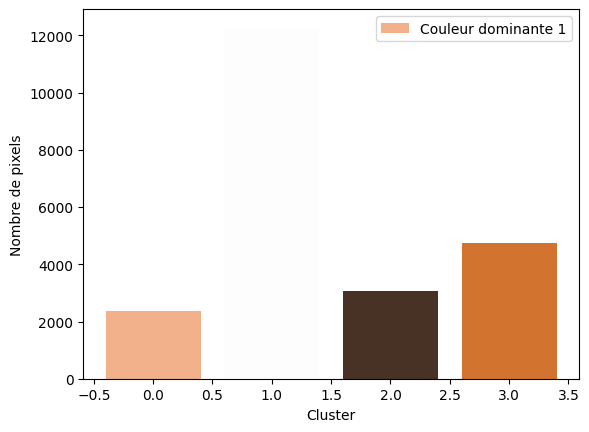

DataFrame pour l'image im-117_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-113_im.png   129,36,22  169,132,138     58,3,255
im-114_im.png   151,83,22     80,65,42   134,66,255
im-115_im.png    50,46,27   195,135,52    63,26,255
im-116_im.png    36,39,30   202,145,66    89,13,255
im-117_im.png  210,116,47     72,50,38  242,177,139

[117 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.25349557 -0.5635806   0.60336582]
   Code couleur RGB: [0.98910344 0.99270115 0.98690405]
   Nombre de pixels: 11839

Cluster 2:
   Code couleur Lab: [13.33257826  8.10511522 12.07379334]
   Code couleur RGB: [0.19426591 0.11607916 0.06839603]
   Nombre de pixels: 4593

Cluster 3:
   Code couleur Lab: [  36.90298259   79.29339847 -100.08068811]
   Code couleur RGB: [0.33963847 0.046398   1.        ]
   Nombre de pixels: 1800

Cluster 4:
   Code couleur Lab: [28.53955928 39.30660225 35.22585866]
   Code couleur RGB: [0.49884142 0.13044564 0.05092753]
   Nombre de pixels: 4268



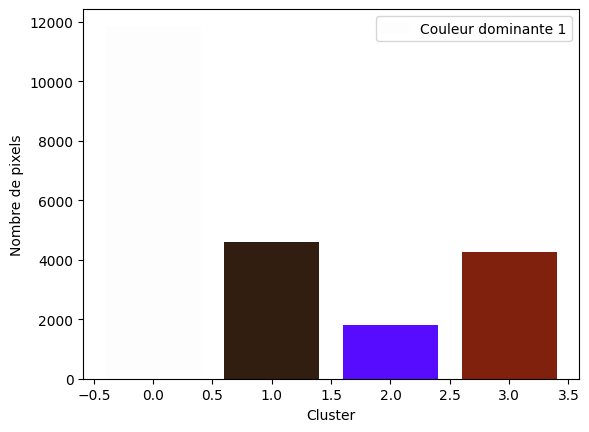

DataFrame pour l'image im-118_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-114_im.png   151,83,22    80,65,42   134,66,255
im-115_im.png    50,46,27  195,135,52    63,26,255
im-116_im.png    36,39,30  202,145,66    89,13,255
im-117_im.png  210,116,47    72,50,38  242,177,139
im-118_im.png    50,30,17   127,33,13    87,12,255

[118 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.2430407   0.10407423  0.27414626]
   Code couleur RGB: [0.99322506 0.99106283 0.98937388]
   Nombre de pixels: 14355

Cluster 2:
   Code couleur Lab: [11.35762393  2.9884351   4.78178607]
   Code couleur RGB: [0.14383693 0.11214785 0.09340721]
   Nombre de pixels: 3424

Cluster 3:
   Code couleur Lab: [ 46.56245739  78.13764625 -83.96172176]
   Code couleur RGB: [0.59829033 0.16861282 1.        ]
   Nombre de pixels: 638

Cluster 4:
   Code couleur Lab: [45.80889427 42.83466247 46.97495035]
   Code couleur RGB: [0.72327298 0.28711565 0.11265788]
   Nombre de pixels: 4083



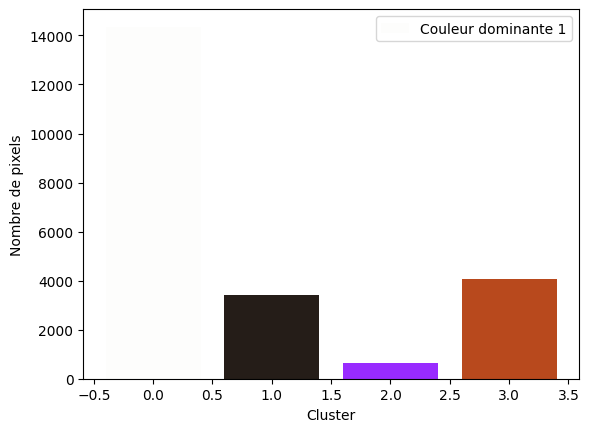

DataFrame pour l'image im-119_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-115_im.png    50,46,27  195,135,52    63,26,255
im-116_im.png    36,39,30  202,145,66    89,13,255
im-117_im.png  210,116,47    72,50,38  242,177,139
im-118_im.png    50,30,17   127,33,13    87,12,255
im-119_im.png   184,73,29    37,29,24   153,43,255

[119 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.34004786 -0.64566099  0.51225647]
   Code couleur RGB: [0.98909359 0.99390912 0.98856492]
   Nombre de pixels: 15662

Cluster 2:
   Code couleur Lab: [10.64854764  1.44601074 -0.62501147]
   Code couleur RGB: [0.11928144 0.11043607 0.11621972]
   Nombre de pixels: 5488

Cluster 3:
   Code couleur Lab: [ 46.56590362  31.02007541 -51.41767106]
   Code couleur RGB: [0.42953908 0.37624866 0.77425522]
   Nombre de pixels: 788

Cluster 4:
   Code couleur Lab: [41.13741099 57.85220652 41.53085301]
   Code couleur RGB: [0.7333169  0.14240164 0.12391837]
   Nombre de pixels: 562



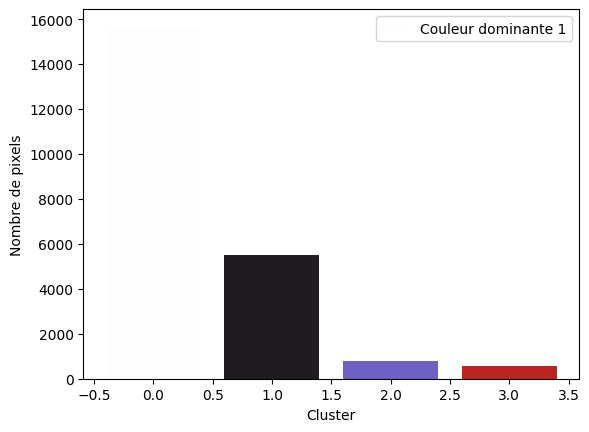

DataFrame pour l'image im-120_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-116_im.png    36,39,30  202,145,66    89,13,255
im-117_im.png  210,116,47    72,50,38  242,177,139
im-118_im.png    50,30,17   127,33,13    87,12,255
im-119_im.png   184,73,29    37,29,24   153,43,255
im-120_im.png    30,28,30  110,96,197    187,36,32

[120 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98622273e+01 -1.04035819e-01  6.49288756e-02]
   Code couleur RGB: [0.99782454 0.99866265 0.99796235]
   Nombre de pixels: 13095

Cluster 2:
   Code couleur Lab: [8.57419739 2.55672318 5.54172289]
   Code couleur RGB: [0.12112379 0.09109496 0.06507933]
   Nombre de pixels: 5220

Cluster 3:
   Code couleur Lab: [  35.57456073   75.08205679 -102.35430912]
   Code couleur RGB: [0.21537437 0.103817   1.        ]
   Nombre de pixels: 695

Cluster 4:
   Code couleur Lab: [38.58202601 23.60005708 40.44374967]
   Code couleur RGB: [0.54376866 0.29016023 0.08844221]
   Nombre de pixels: 3490



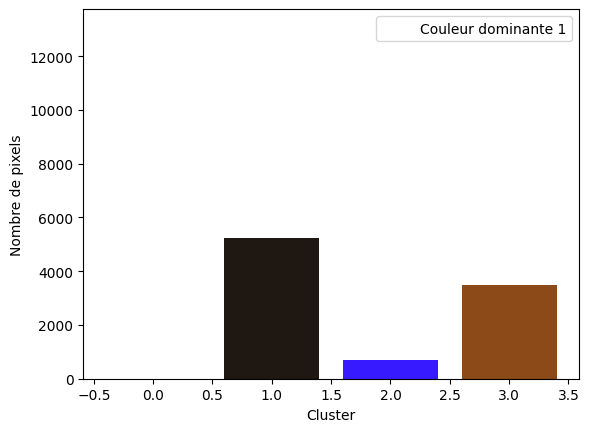

DataFrame pour l'image im-121_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-117_im.png  210,116,47    72,50,38  242,177,139
im-118_im.png    50,30,17   127,33,13    87,12,255
im-119_im.png   184,73,29    37,29,24   153,43,255
im-120_im.png    30,28,30  110,96,197    187,36,32
im-121_im.png    31,23,17   139,74,23    55,26,255

[121 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.55993866 -0.18987249  0.35433513]
   Code couleur RGB: [0.99472717 0.99535019 0.99232138]
   Nombre de pixels: 14411

Cluster 2:
   Code couleur Lab: [10.1339884  -1.37603985  5.95415022]
   Code couleur RGB: [0.11410503 0.10993046 0.0765739 ]
   Nombre de pixels: 6581

Cluster 3:
   Code couleur Lab: [ 37.88270106  80.04681279 -98.43681093]
   Code couleur RGB: [0.38281451 0.04078788 1.        ]
   Nombre de pixels: 390

Cluster 4:
   Code couleur Lab: [36.23257674 49.27089885 44.94506083]
   Code couleur RGB: [0.63630949 0.1495289  0.04288323]
   Nombre de pixels: 1118



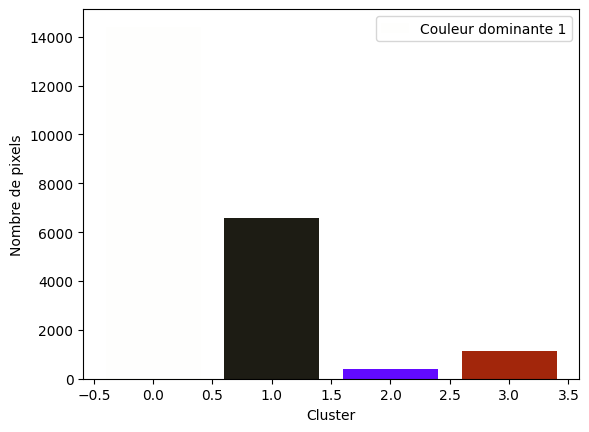

DataFrame pour l'image im-122_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-118_im.png    50,30,17   127,33,13   87,12,255
im-119_im.png   184,73,29    37,29,24  153,43,255
im-120_im.png    30,28,30  110,96,197   187,36,32
im-121_im.png    31,23,17   139,74,23   55,26,255
im-122_im.png    29,28,20   162,38,11   98,10,255

[122 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.8186068   0.25492508  0.86530523]
   Code couleur RGB: [0.99171436 0.98570686 0.98010584]
   Nombre de pixels: 11759

Cluster 2:
   Code couleur Lab: [19.33331553 12.61760496 16.02685279]
   Code couleur RGB: [0.27381713 0.15372029 0.09423397]
   Nombre de pixels: 6849

Cluster 3:
   Code couleur Lab: [55.31978996 45.92546507 48.82814392]
   Code couleur RGB: [0.85541591 0.37060189 0.18934657]
   Nombre de pixels: 3795

Cluster 4:
   Code couleur Lab: [  36.00565697   77.29403164 -101.60766961]
   Code couleur RGB: [0.27548399 0.07625288 1.        ]
   Nombre de pixels: 97



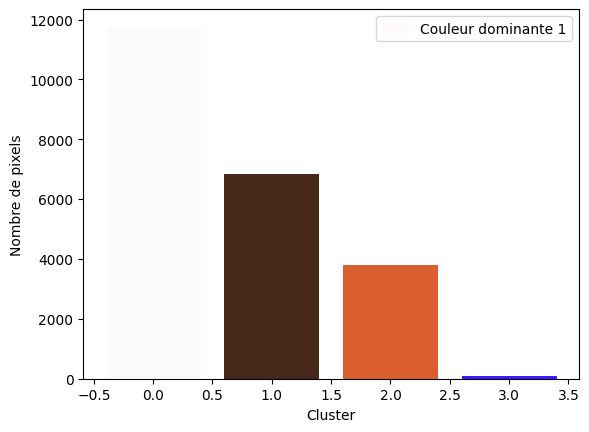

DataFrame pour l'image im-123_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-119_im.png   184,73,29    37,29,24  153,43,255
im-120_im.png    30,28,30  110,96,197   187,36,32
im-121_im.png    31,23,17   139,74,23   55,26,255
im-122_im.png    29,28,20   162,38,11   98,10,255
im-123_im.png    70,39,24   218,95,48   70,19,255

[123 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.96352758e+01 -6.71043431e-02  3.54214649e-01]
   Code couleur RGB: [0.99657813 0.99590818 0.99319478]
   Nombre de pixels: 14942

Cluster 2:
   Code couleur Lab: [25.32396353 12.48593203  7.0472643 ]
   Code couleur RGB: [0.31933257 0.20683157 0.19571538]
   Nombre de pixels: 3271

Cluster 3:
   Code couleur Lab: [53.84739006 40.07895167 52.93561674]
   Code couleur RGB: [0.81052847 0.37908973 0.13575251]
   Nombre de pixels: 4114

Cluster 4:
   Code couleur Lab: [ 39.03050184  77.58494654 -96.53911518]
   Code couleur RGB: [0.39376565 0.10035909 1.        ]
   Nombre de pixels: 173



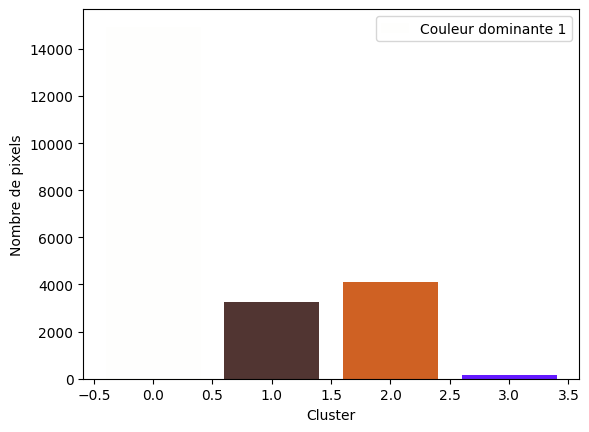

DataFrame pour l'image im-124_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-120_im.png    30,28,30  110,96,197   187,36,32
im-121_im.png    31,23,17   139,74,23   55,26,255
im-122_im.png    29,28,20   162,38,11   98,10,255
im-123_im.png    70,39,24   218,95,48   70,19,255
im-124_im.png   207,97,35    81,53,50  100,26,255

[124 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98465835e+01 -2.97463637e-02  1.53385929e-01]
   Code couleur RGB: [0.99856624 0.99827814 0.99712371]
   Nombre de pixels: 16642

Cluster 2:
   Code couleur Lab: [46.68169544 31.77618428 52.01009785]
   Code couleur RGB: [0.68280283 0.33904374 0.05916554]
   Nombre de pixels: 2684

Cluster 3:
   Code couleur Lab: [ 46.33576095  72.48069657 -84.43606149]
   Code couleur RGB: [0.5471865  0.21633771 1.        ]
   Nombre de pixels: 1366

Cluster 4:
   Code couleur Lab: [13.69290532  7.39567881 13.66667161]
   Code couleur RGB: [0.19607042 0.12029172 0.06078316]
   Nombre de pixels: 1808



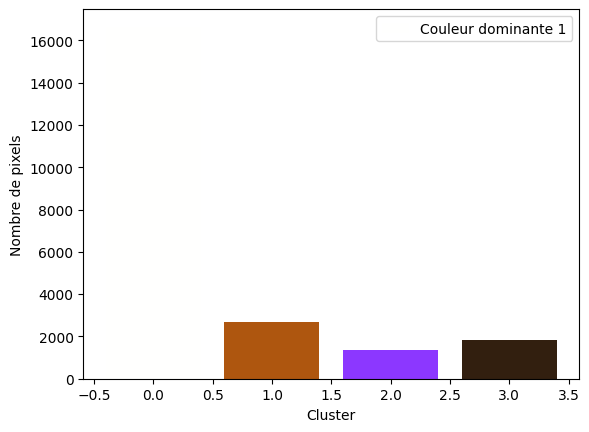

DataFrame pour l'image im-125_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-121_im.png    31,23,17  139,74,23   55,26,255
im-122_im.png    29,28,20  162,38,11   98,10,255
im-123_im.png    70,39,24  218,95,48   70,19,255
im-124_im.png   207,97,35   81,53,50  100,26,255
im-125_im.png   174,86,15   50,31,15  140,55,255

[125 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.51670545  0.15624601  0.52636773]
   Code couleur RGB: [0.99765058 0.99396793 0.99057454]
   Nombre de pixels: 12495

Cluster 2:
   Code couleur Lab: [66.46030947 18.03965199 60.12618254]
   Code couleur RGB: [0.85099367 0.57766569 0.18360921]
   Nombre de pixels: 6009

Cluster 3:
   Code couleur Lab: [28.48487156 20.98617196 22.57361045]
   Code couleur RGB: [0.40968721 0.20829184 0.13028866]
   Nombre de pixels: 3729

Cluster 4:
   Code couleur Lab: [ 43.33429722  71.23364528 -89.45406656]
   Code couleur RGB: [0.45812159 0.20054561 1.        ]
   Nombre de pixels: 267



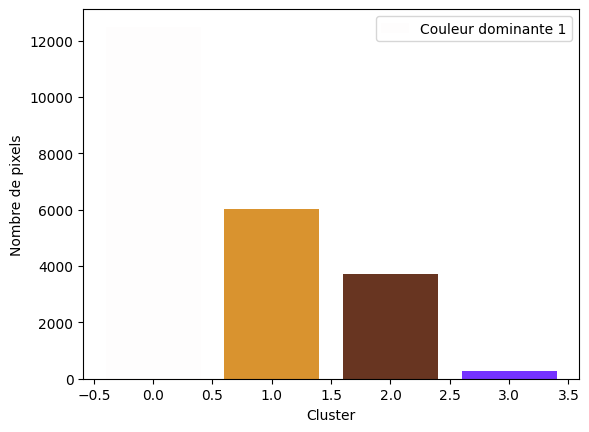

DataFrame pour l'image im-126_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-122_im.png    29,28,20  162,38,11   98,10,255
im-123_im.png    70,39,24  218,95,48   70,19,255
im-124_im.png   207,97,35   81,53,50  100,26,255
im-125_im.png   174,86,15   50,31,15  140,55,255
im-126_im.png  217,147,47  104,53,33  117,51,255

[126 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [60.80938826 15.38939826 57.6518834 ]
   Code couleur RGB: [0.76744426 0.52760181 0.14524665]
   Nombre de pixels: 4595

Cluster 2:
   Code couleur Lab: [9.94915700e+01 7.03874164e-02 2.16841015e-01]
   Code couleur RGB: [0.99557079 0.99398306 0.99262421]
   Nombre de pixels: 12655

Cluster 3:
   Code couleur Lab: [16.54456957  2.45091327  3.31553243]
   Code couleur RGB: [0.1817936  0.15523985 0.1423749 ]
   Nombre de pixels: 2152

Cluster 4:
   Code couleur Lab: [40.64518319 18.0953688  35.6672616 ]
   Code couleur RGB: [0.53638699 0.32614649 0.14357429]
   Nombre de pixels: 3098



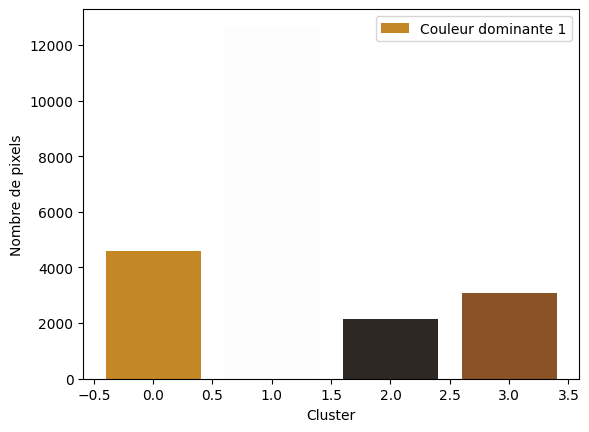

DataFrame pour l'image im-127_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-123_im.png    70,39,24  218,95,48   70,19,255
im-124_im.png   207,97,35   81,53,50  100,26,255
im-125_im.png   174,86,15   50,31,15  140,55,255
im-126_im.png  217,147,47  104,53,33  117,51,255
im-127_im.png  196,135,37  137,83,37    46,40,36

[127 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.27981661 -0.22750013  0.18162618]
   Code couleur RGB: [0.99062535 0.99231184 0.99044608]
   Nombre de pixels: 14421

Cluster 2:
   Code couleur Lab: [16.32425006 -5.8043879   8.73740194]
   Code couleur RGB: [0.14443931 0.16659633 0.10929976]
   Nombre de pixels: 5580

Cluster 3:
   Code couleur Lab: [  36.60178716   78.69437999 -100.63128368]
   Code couleur RGB: [0.31993569 0.05658414 1.        ]
   Nombre de pixels: 710

Cluster 4:
   Code couleur Lab: [56.27910236 45.14601809 55.87140625]
   Code couleur RGB: [0.86733067 0.38290711 0.13625656]
   Nombre de pixels: 1789



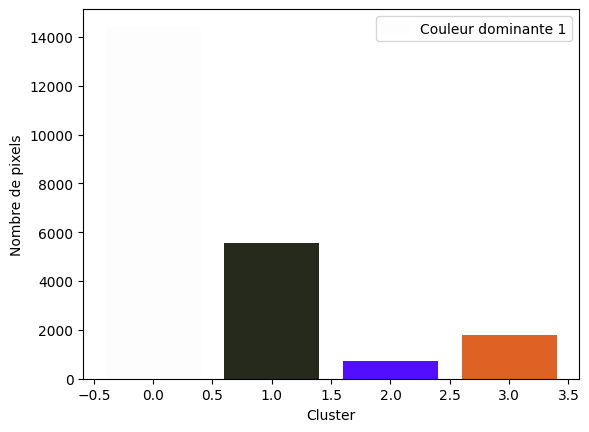

DataFrame pour l'image im-128_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-124_im.png   207,97,35   81,53,50  100,26,255
im-125_im.png   174,86,15   50,31,15  140,55,255
im-126_im.png  217,147,47  104,53,33  117,51,255
im-127_im.png  196,135,37  137,83,37    46,40,36
im-128_im.png    37,42,28  221,98,35   82,14,255

[128 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95171287e+01 5.06138083e-02 1.82806243e-01]
   Code couleur RGB: [0.99557963 0.99433145 0.9931697 ]
   Nombre de pixels: 15534

Cluster 2:
   Code couleur Lab: [44.60786126  8.35209322 44.63422218]
   Code couleur RGB: [0.53610594 0.38765309 0.10022383]
   Nombre de pixels: 4837

Cluster 3:
   Code couleur Lab: [ 45.61716551  62.5590861  -85.64820298]
   Code couleur RGB: [0.43778408 0.27327984 1.        ]
   Nombre de pixels: 985

Cluster 4:
   Code couleur Lab: [ 9.74100174 -1.35363305  6.70403315]
   Code couleur RGB: [0.11279586 0.10667192 0.06829033]
   Nombre de pixels: 1144



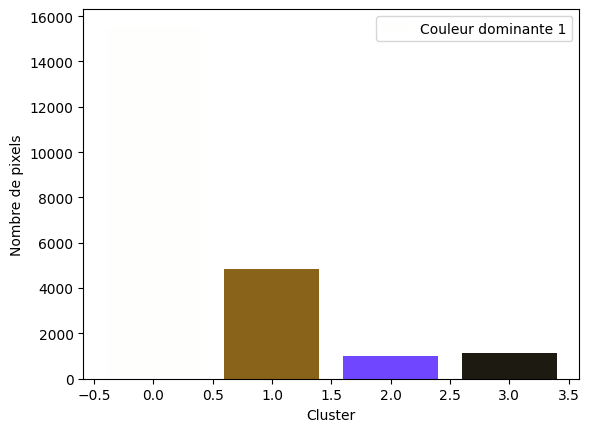

DataFrame pour l'image im-129_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-125_im.png   174,86,15   50,31,15  140,55,255
im-126_im.png  217,147,47  104,53,33  117,51,255
im-127_im.png  196,135,37  137,83,37    46,40,36
im-128_im.png    37,42,28  221,98,35   82,14,255
im-129_im.png   137,99,26   29,27,17  112,70,255

[129 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.90783438e+01 5.64552686e-02 2.55419377e-01]
   Code couleur RGB: [0.9909035  0.98931511 0.9876408 ]
   Nombre de pixels: 12665

Cluster 2:
   Code couleur Lab: [40.76936053 29.37742173 44.44877878]
   Code couleur RGB: [0.59845513 0.29133456 0.07641251]
   Nombre de pixels: 6088

Cluster 3:
   Code couleur Lab: [ 48.65184178  69.92667193 -80.48274007]
   Code couleur RGB: [0.58185598 0.25422039 1.        ]
   Nombre de pixels: 1142

Cluster 4:
   Code couleur Lab: [13.51750729  0.93104605  3.12327485]
   Code couleur RGB: [0.14798162 0.13340866 0.11892451]
   Nombre de pixels: 2605



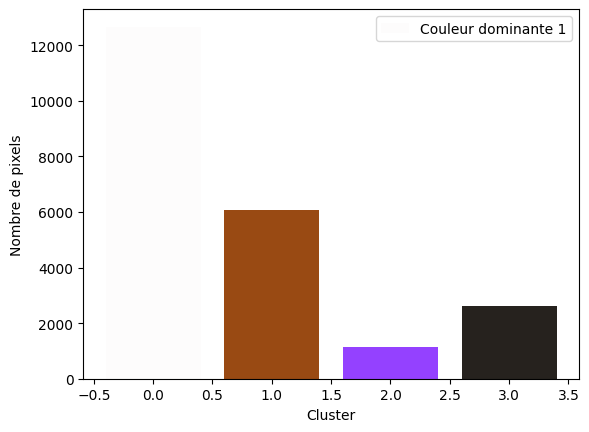

DataFrame pour l'image im-130_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-126_im.png  217,147,47  104,53,33  117,51,255
im-127_im.png  196,135,37  137,83,37    46,40,36
im-128_im.png    37,42,28  221,98,35   82,14,255
im-129_im.png   137,99,26   29,27,17  112,70,255
im-130_im.png   153,74,19   38,34,30  148,65,255

[130 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [16.20303934  3.66972918  4.16078497]
   Code couleur RGB: [0.18694336 0.14991991 0.13508784]
   Nombre de pixels: 4809

Cluster 2:
   Code couleur Lab: [97.57631168 -0.72974133  0.15436483]
   Code couleur RGB: [0.96716338 0.97422749 0.97128646]
   Nombre de pixels: 13939

Cluster 3:
   Code couleur Lab: [53.22302551 30.14776512 46.33331947]
   Code couleur RGB: [0.74874699 0.40940107 0.1816103 ]
   Nombre de pixels: 3104

Cluster 4:
   Code couleur Lab: [  34.21621018   79.31397211 -104.62758355]
   Code couleur RGB: [0.21642053 0.01358893 1.        ]
   Nombre de pixels: 648



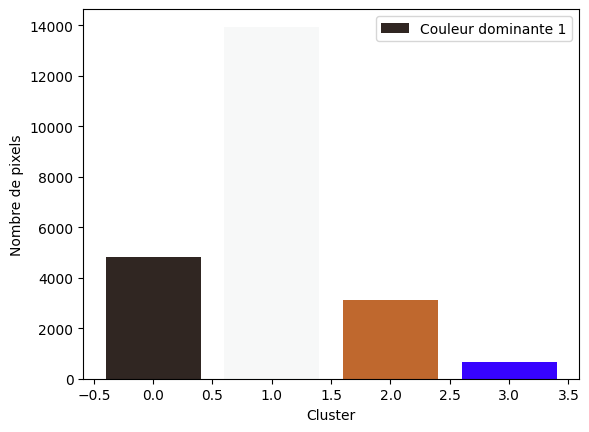

DataFrame pour l'image im-131_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-127_im.png  196,135,37   137,83,37    46,40,36
im-128_im.png    37,42,28   221,98,35   82,14,255
im-129_im.png   137,99,26    29,27,17  112,70,255
im-130_im.png   153,74,19    38,34,30  148,65,255
im-131_im.png    48,38,34  191,104,46    55,3,255

[131 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.9116391  40.72340034 52.26891491]
   Code couleur RGB: [0.76538153 0.33691167 0.10199456]
   Nombre de pixels: 7993

Cluster 2:
   Code couleur Lab: [9.94265291e+01 8.76829384e-02 3.99213292e-01]
   Code couleur RGB: [0.99562051 0.99314834 0.99050567]
   Nombre de pixels: 11202

Cluster 3:
   Code couleur Lab: [22.82284305  3.77937427 12.2216246 ]
   Code couleur RGB: [0.25940801 0.20387269 0.1430178 ]
   Nombre de pixels: 3117

Cluster 4:
   Code couleur Lab: [ 53.42784573  75.68925626 -72.53914508]
   Code couleur RGB: [0.72684714 0.2574526  1.        ]
   Nombre de pixels: 188



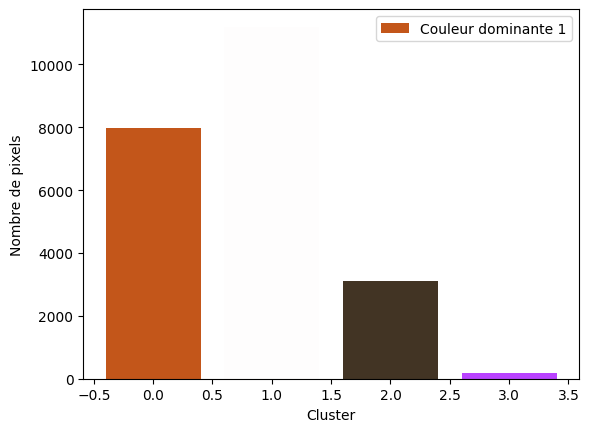

DataFrame pour l'image im-132_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-128_im.png    37,42,28   221,98,35   82,14,255
im-129_im.png   137,99,26    29,27,17  112,70,255
im-130_im.png   153,74,19    38,34,30  148,65,255
im-131_im.png    48,38,34  191,104,46    55,3,255
im-132_im.png   195,86,26    66,52,36  185,66,255

[132 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91515246e+01 -6.15041203e-02  2.59946003e-01]
   Code couleur RGB: [0.99079488 0.99043021 0.98842013]
   Nombre de pixels: 14620

Cluster 2:
   Code couleur Lab: [60.807231   24.93525132 51.625804  ]
   Code couleur RGB: [0.81507531 0.50108161 0.20836786]
   Nombre de pixels: 4204

Cluster 3:
   Code couleur Lab: [ 39.67616465  72.94353695 -95.49356274]
   Code couleur RGB: [0.3634215  0.15720458 1.        ]
   Nombre de pixels: 724

Cluster 4:
   Code couleur Lab: [26.99579047  9.3831527  23.5021734 ]
   Code couleur RGB: [0.34030828 0.22618835 0.10859083]
   Nombre de pixels: 2952



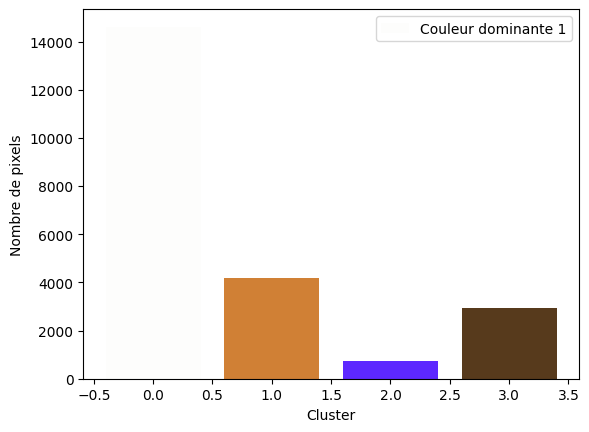

DataFrame pour l'image im-133_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-129_im.png   137,99,26    29,27,17  112,70,255
im-130_im.png   153,74,19    38,34,30  148,65,255
im-131_im.png    48,38,34  191,104,46    55,3,255
im-132_im.png   195,86,26    66,52,36  185,66,255
im-133_im.png  208,128,53    87,58,28   93,40,255

[133 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [12.85988505  6.62265051 14.32199131]
   Code couleur RGB: [0.18634538 0.11517933 0.04631312]
   Nombre de pixels: 1502

Cluster 2:
   Code couleur Lab: [ 9.98219332e+01 -1.54717079e-02  1.93463445e-01]
   Code couleur RGB: [0.99854498 0.9979514  0.99654152]
   Nombre de pixels: 15380

Cluster 3:
   Code couleur Lab: [ 39.47310851  78.13989723 -95.76090905]
   Code couleur RGB: [0.41393085 0.09659978 1.        ]
   Nombre de pixels: 1232

Cluster 4:
   Code couleur Lab: [33.12355884 41.90511014 42.14062559]
   Code couleur RGB: [0.56583469 0.16266535 0.0322852 ]
   Nombre de pixels: 4386



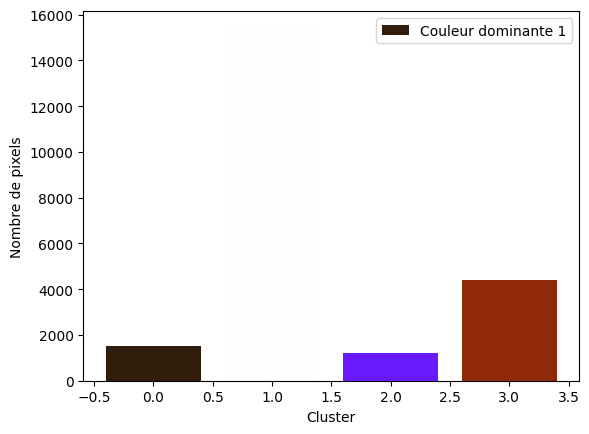

DataFrame pour l'image im-134_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-130_im.png   153,74,19    38,34,30  148,65,255
im-131_im.png    48,38,34  191,104,46    55,3,255
im-132_im.png   195,86,26    66,52,36  185,66,255
im-133_im.png  208,128,53    87,58,28   93,40,255
im-134_im.png    144,41,8    48,29,12  106,25,255

[134 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.37629641 -0.12874187  0.66883908]
   Code couleur RGB: [0.99425477 0.99302333 0.98786138]
   Nombre de pixels: 15656

Cluster 2:
   Code couleur Lab: [45.80760127 49.48629063 54.04918217]
   Code couleur RGB: [0.75757268 0.25344876 0.04275461]
   Nombre de pixels: 3473

Cluster 3:
   Code couleur Lab: [ 49.08498419  75.57499086 -79.76736333]
   Code couleur RGB: [0.63515497 0.21668239 1.        ]
   Nombre de pixels: 1090

Cluster 4:
   Code couleur Lab: [20.82188326  2.92292142 10.79021726]
   Code couleur RGB: [0.23469278 0.18874866 0.13490167]
   Nombre de pixels: 2281



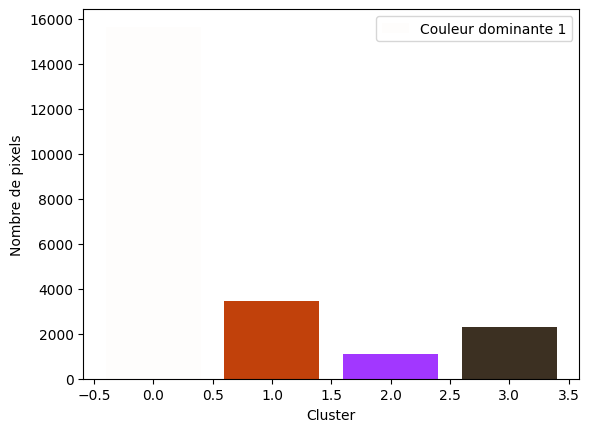

DataFrame pour l'image im-135_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-131_im.png    48,38,34  191,104,46    55,3,255
im-132_im.png   195,86,26    66,52,36  185,66,255
im-133_im.png  208,128,53    87,58,28   93,40,255
im-134_im.png    144,41,8    48,29,12  106,25,255
im-135_im.png   193,65,11    60,48,34  162,55,255

[135 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [66.41755423 11.07762891 36.61556749]
   Code couleur RGB: [0.78596513 0.59883111 0.37577407]
   Nombre de pixels: 2202

Cluster 2:
   Code couleur Lab: [ 9.94191364e+01 -2.74262099e-02  7.90318483e-01]
   Code couleur RGB: [0.99599083 0.99322799 0.98744052]
   Nombre de pixels: 13600

Cluster 3:
   Code couleur Lab: [64.17200463 41.72402301 65.4754591 ]
   Code couleur RGB: [0.95365239 0.47700603 0.11568339]
   Nombre de pixels: 5820

Cluster 4:
   Code couleur Lab: [31.75693156  3.62246868  4.74383222]
   Code couleur RGB: [0.32732595 0.28452936 0.26452118]
   Nombre de pixels: 878



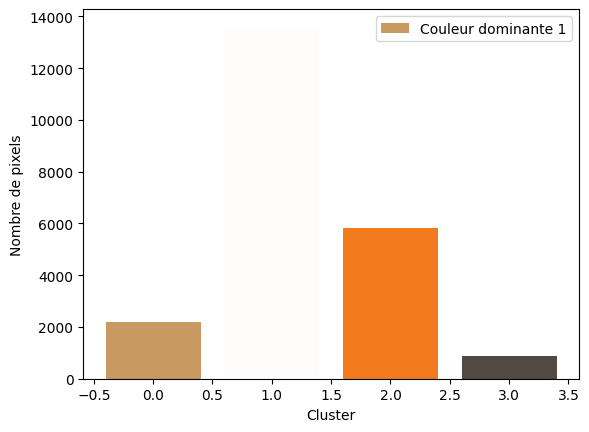

DataFrame pour l'image im-136_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-132_im.png   195,86,26    66,52,36  185,66,255
im-133_im.png  208,128,53    87,58,28   93,40,255
im-134_im.png    144,41,8    48,29,12  106,25,255
im-135_im.png   193,65,11    60,48,34  162,55,255
im-136_im.png  243,122,29  200,153,96    83,73,67

[136 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.99149988e+01 -3.38086930e-03  2.11393136e-02]
   Code couleur RGB: [0.99908521 0.99903108 0.99890848]
   Nombre de pixels: 15121

Cluster 2:
   Code couleur Lab: [20.79781407  5.98383694 17.77861072]
   Code couleur RGB: [0.25849043 0.18125011 0.09373137]
   Nombre de pixels: 4291

Cluster 3:
   Code couleur Lab: [  35.84097052   75.03223877 -101.89209489]
   Code couleur RGB: [0.22997281 0.10634565 1.        ]
   Nombre de pixels: 573

Cluster 4:
   Code couleur Lab: [50.80855841 18.62846465 43.99957837]
   Code couleur RGB: [0.65914634 0.42094252 0.17233068]
   Nombre de pixels: 2515



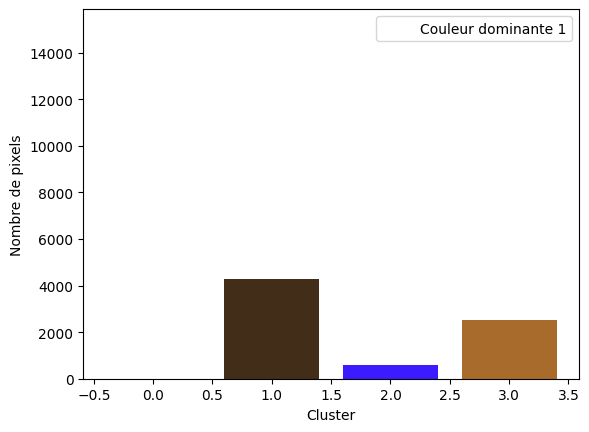

DataFrame pour l'image im-137_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-133_im.png  208,128,53    87,58,28   93,40,255
im-134_im.png    144,41,8    48,29,12  106,25,255
im-135_im.png   193,65,11    60,48,34  162,55,255
im-136_im.png  243,122,29  200,153,96    83,73,67
im-137_im.png    66,46,24  168,107,44   59,27,255

[137 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [50.41763056 40.10780226 37.69879216]
   Code couleur RGB: [0.75951024 0.34654599 0.22556242]
   Nombre de pixels: 7670

Cluster 2:
   Code couleur Lab: [9.99306884e+01 5.57739862e-04 6.79185700e-02]
   Code couleur RGB: [0.99946284 0.99918591 0.99873234]
   Nombre de pixels: 13049

Cluster 3:
   Code couleur Lab: [24.99487011  4.92365916 21.06067593]
   Code couleur RGB: [0.2964459  0.21900137 0.10679699]
   Nombre de pixels: 1596

Cluster 4:
   Code couleur Lab: [  35.4339928    75.86885211 -102.57468244]
   Code couleur RGB: [0.22248363 0.09260583 1.        ]
   Nombre de pixels: 185



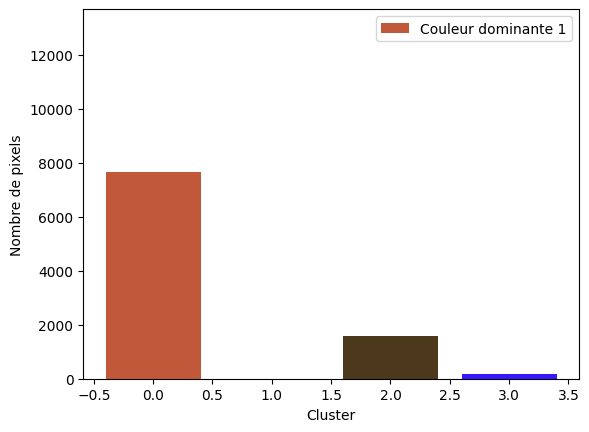

DataFrame pour l'image im-138_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-134_im.png    144,41,8    48,29,12  106,25,255
im-135_im.png   193,65,11    60,48,34  162,55,255
im-136_im.png  243,122,29  200,153,96    83,73,67
im-137_im.png    66,46,24  168,107,44   59,27,255
im-138_im.png   194,88,58    76,56,27   57,24,255

[138 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.76723958 -0.14428191  0.10189303]
   Code couleur RGB: [0.99655056 0.99766982 0.99659692]
   Nombre de pixels: 14822

Cluster 2:
   Code couleur Lab: [13.07519313  3.91367156 12.37632313]
   Code couleur RGB: [0.17349214 0.12277385 0.06306984]
   Nombre de pixels: 3348

Cluster 3:
   Code couleur Lab: [  34.58366429   77.53387513 -104.0013651 ]
   Code couleur RGB: [0.204027   0.05906256 1.        ]
   Nombre de pixels: 786

Cluster 4:
   Code couleur Lab: [40.78246275 25.59525173 40.38188328]
   Code couleur RGB: [0.57816377 0.3045088  0.11098274]
   Nombre de pixels: 3544



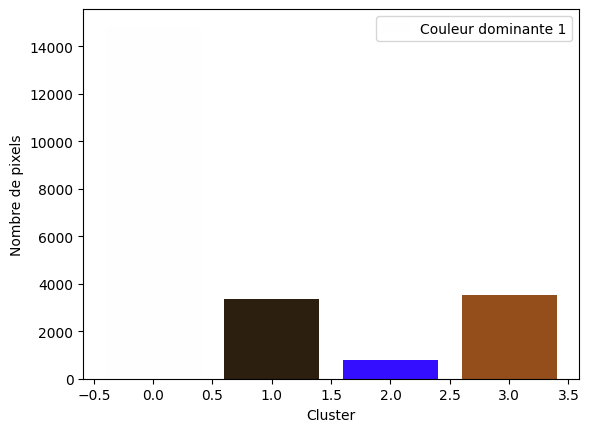

DataFrame pour l'image im-139_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-135_im.png   193,65,11    60,48,34  162,55,255
im-136_im.png  243,122,29  200,153,96    83,73,67
im-137_im.png    66,46,24  168,107,44   59,27,255
im-138_im.png   194,88,58    76,56,27   57,24,255
im-139_im.png   147,78,28    44,31,16   52,15,255

[139 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [12.68291403 -2.00917865  6.92918664]
   Code couleur RGB: [0.13272969 0.13106004 0.09141823]
   Nombre de pixels: 1428

Cluster 2:
   Code couleur Lab: [ 9.98553898e+01 -1.13213304e-02  3.16309254e-02]
   Code couleur RGB: [0.99838076 0.99836975 0.99815026]
   Nombre de pixels: 13861

Cluster 3:
   Code couleur Lab: [32.50750985 14.0960715  21.96150226]
   Code couleur RGB: [0.4176707  0.26379874 0.16622207]
   Nombre de pixels: 7156

Cluster 4:
   Code couleur Lab: [  33.1347786    77.78486759 -106.44557316]
   Code couleur RGB: [0.08226627 0.04037019 1.        ]
   Nombre de pixels: 55



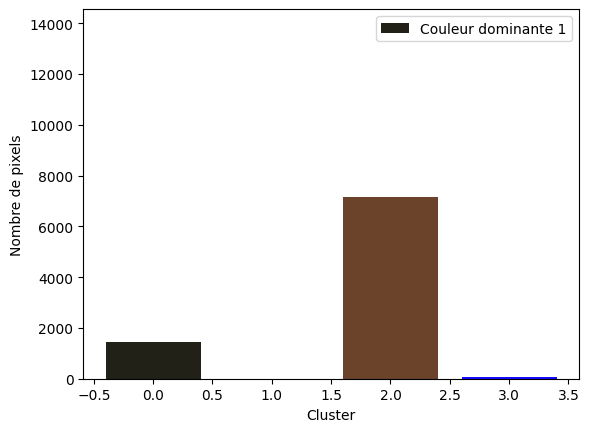

DataFrame pour l'image im-140_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-136_im.png  243,122,29  200,153,96    83,73,67
im-137_im.png    66,46,24  168,107,44   59,27,255
im-138_im.png   194,88,58    76,56,27   57,24,255
im-139_im.png   147,78,28    44,31,16   52,15,255
im-140_im.png   107,67,42    34,33,23   21,10,255

[140 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [13.10059465  4.18189875 11.33648957]
   Code couleur RGB: [0.17359136 0.12260931 0.07030811]
   Nombre de pixels: 2988

Cluster 2:
   Code couleur Lab: [99.62916808 -0.46107736  0.2968033 ]
   Code couleur RGB: [0.99310518 0.99681065 0.99350586]
   Nombre de pixels: 15959

Cluster 3:
   Code couleur Lab: [  36.77914002   78.72035302 -100.31138582]
   Code couleur RGB: [0.32752679 0.05792111 1.        ]
   Nombre de pixels: 1120

Cluster 4:
   Code couleur Lab: [35.17594272 40.15490522 41.06057603]
   Code couleur RGB: [0.58175912 0.19322544 0.06184709]
   Nombre de pixels: 2433



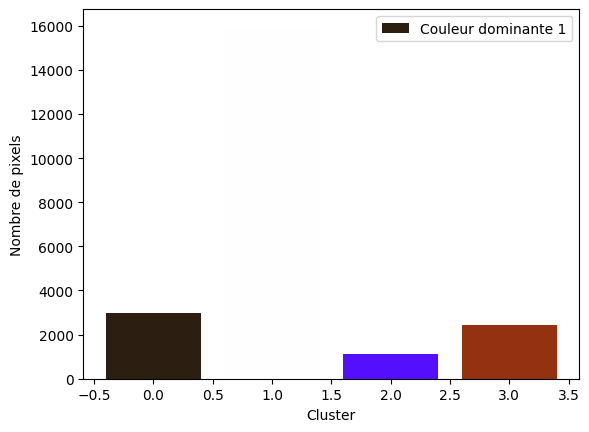

DataFrame pour l'image im-141_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-137_im.png    66,46,24  168,107,44   59,27,255
im-138_im.png   194,88,58    76,56,27   57,24,255
im-139_im.png   147,78,28    44,31,16   52,15,255
im-140_im.png   107,67,42    34,33,23   21,10,255
im-141_im.png    44,31,18   148,49,16   84,15,255

[141 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.97136502e+01 8.10230678e-02 1.66904035e-01]
   Code couleur RGB: [0.99800226 0.99649452 0.99552637]
   Nombre de pixels: 16564

Cluster 2:
   Code couleur Lab: [68.42904205 28.17855716 54.06006301]
   Code couleur RGB: [0.92638822 0.56884615 0.26502474]
   Nombre de pixels: 4576

Cluster 3:
   Code couleur Lab: [33.05035738  4.08965903  7.0835233 ]
   Code couleur RGB: [0.34725536 0.29480781 0.26186874]
   Nombre de pixels: 1022

Cluster 4:
   Code couleur Lab: [ 67.26933733  61.3108971  -50.09342518]
   Code couleur RGB: [0.88966062 0.47088744 1.        ]
   Nombre de pixels: 338



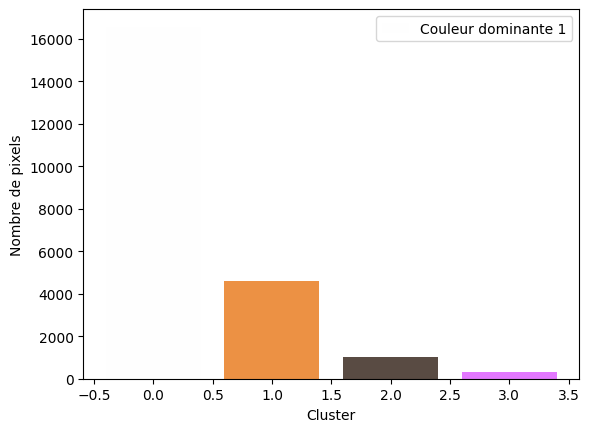

DataFrame pour l'image im-142_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-138_im.png   194,88,58   76,56,27    57,24,255
im-139_im.png   147,78,28   44,31,16    52,15,255
im-140_im.png   107,67,42   34,33,23    21,10,255
im-141_im.png    44,31,18  148,49,16    84,15,255
im-142_im.png  236,145,68   89,75,67  227,120,255

[142 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.67050695  0.12444351  0.27184764]
   Code couleur RGB: [0.99823757 0.99586765 0.99424638]
   Nombre de pixels: 12087

Cluster 2:
   Code couleur Lab: [68.836762   16.88463663 59.08950499]
   Code couleur RGB: [0.87207792 0.60546693 0.21867931]
   Nombre de pixels: 5661

Cluster 3:
   Code couleur Lab: [18.19642069  7.43490007 17.33097588]
   Code couleur RGB: [0.24057524 0.156422   0.0762512 ]
   Nombre de pixels: 4490

Cluster 4:
   Code couleur Lab: [ 38.86430336  73.86768642 -96.83644251]
   Code couleur RGB: [0.34567129 0.14215294 1.        ]
   Nombre de pixels: 262



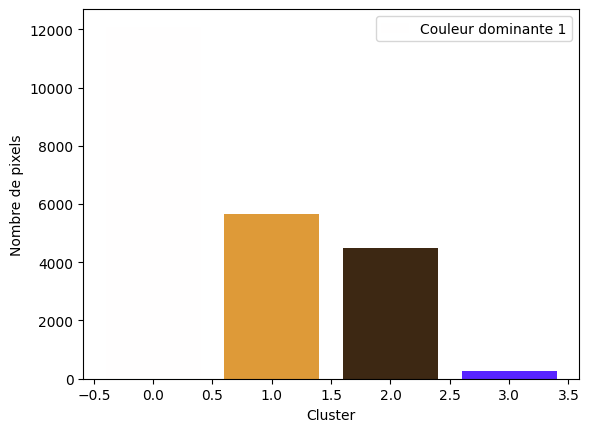

DataFrame pour l'image im-143_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-139_im.png   147,78,28   44,31,16    52,15,255
im-140_im.png   107,67,42   34,33,23    21,10,255
im-141_im.png    44,31,18  148,49,16    84,15,255
im-142_im.png  236,145,68   89,75,67  227,120,255
im-143_im.png  222,154,56   61,40,19    88,36,255

[143 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.15237197 -0.50456598  0.5185586 ]
   Code couleur RGB: [0.98813308 0.99143571 0.98640828]
   Nombre de pixels: 12540

Cluster 2:
   Code couleur Lab: [15.6355147  -0.78478449 13.68614403]
   Code couleur RGB: [0.17408317 0.15201443 0.07626625]
   Nombre de pixels: 2977

Cluster 3:
   Code couleur Lab: [ 41.67981157  70.26185064 -92.27305869]
   Code couleur RGB: [0.39850211 0.19483297 1.        ]
   Nombre de pixels: 772

Cluster 4:
   Code couleur Lab: [50.52495919 12.19243596 50.22652412]
   Code couleur RGB: [0.62630662 0.43466906 0.10843238]
   Nombre de pixels: 6211



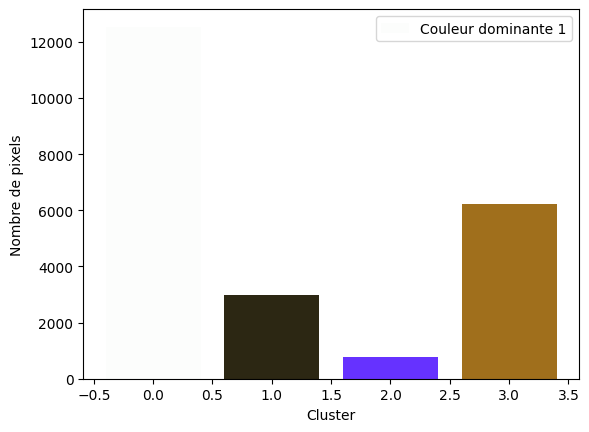

DataFrame pour l'image im-144_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-140_im.png   107,67,42   34,33,23    21,10,255
im-141_im.png    44,31,18  148,49,16    84,15,255
im-142_im.png  236,145,68   89,75,67  227,120,255
im-143_im.png  222,154,56   61,40,19    88,36,255
im-144_im.png  160,111,28   44,39,19   102,50,255

[144 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [37.74411762 43.46008895 44.24647702]
   Code couleur RGB: [0.62823598 0.20205571 0.05954555]
   Nombre de pixels: 3548

Cluster 2:
   Code couleur Lab: [99.36445891 -0.10077777  0.47512196]
   Code couleur RGB: [0.99365934 0.9928785  0.98919954]
   Nombre de pixels: 15341

Cluster 3:
   Code couleur Lab: [12.32154381  4.58239016  8.18313016]
   Code couleur RGB: [0.1646589 0.11611   0.0827016]
   Nombre de pixels: 2838

Cluster 4:
   Code couleur Lab: [ 40.49989065  79.64252543 -94.04347535]
   Code couleur RGB: [0.45880589 0.08387746 1.        ]
   Nombre de pixels: 773



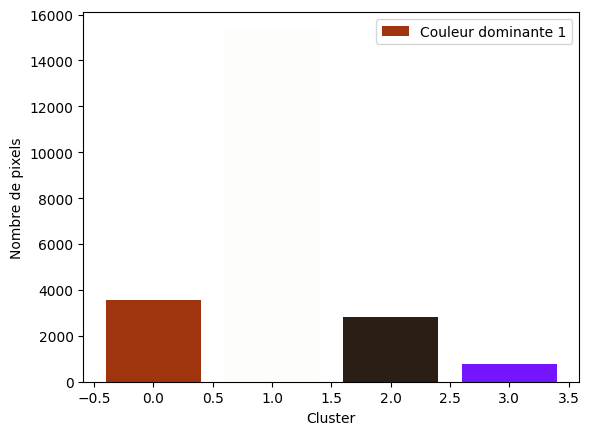

DataFrame pour l'image im-145_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-141_im.png    44,31,18  148,49,16    84,15,255
im-142_im.png  236,145,68   89,75,67  227,120,255
im-143_im.png  222,154,56   61,40,19    88,36,255
im-144_im.png  160,111,28   44,39,19   102,50,255
im-145_im.png   160,52,15   42,30,21   117,21,255

[145 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.04913934  0.21863499 -0.20666453]
   Code couleur RGB: [0.97890289 0.977396   0.97949568]
   Nombre de pixels: 12006

Cluster 2:
   Code couleur Lab: [11.17486701 -1.03702285 -0.19657089]
   Code couleur RGB: [0.11047529 0.11870995 0.11788977]
   Nombre de pixels: 9040

Cluster 3:
   Code couleur Lab: [ 38.89321933  77.2147168  -96.7820485 ]
   Code couleur RGB: [0.38514612 0.10420827 1.        ]
   Nombre de pixels: 287

Cluster 4:
   Code couleur Lab: [33.09418768 31.4561825  36.2878962 ]
   Code couleur RGB: [0.51652334 0.21213856 0.07751902]
   Nombre de pixels: 1167



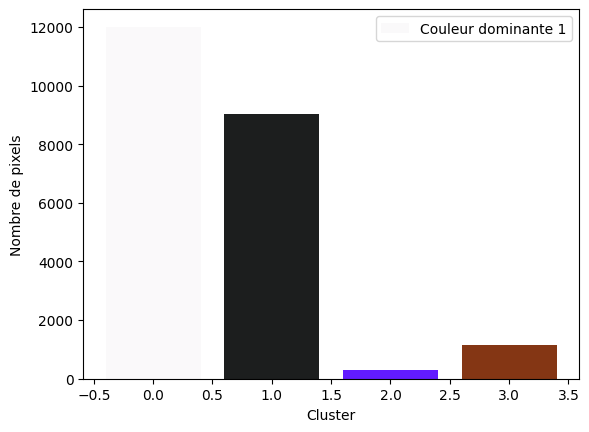

DataFrame pour l'image im-146_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-142_im.png  236,145,68   89,75,67  227,120,255
im-143_im.png  222,154,56   61,40,19    88,36,255
im-144_im.png  160,111,28   44,39,19   102,50,255
im-145_im.png   160,52,15   42,30,21   117,21,255
im-146_im.png    28,30,30  132,54,20    98,27,255

[146 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.88450157 -0.25092881  1.19687262]
   Code couleur RGB: [0.98954896 0.98758298 0.97827012]
   Nombre de pixels: 12552

Cluster 2:
   Code couleur Lab: [52.49967192 43.43823227 55.82935048]
   Code couleur RGB: [0.81203541 0.35139688 0.09440615]
   Nombre de pixels: 5992

Cluster 3:
   Code couleur Lab: [18.44390422  2.55508091 16.20724138]
   Code couleur RGB: [0.21849713 0.16872657 0.08387748]
   Nombre de pixels: 2999

Cluster 4:
   Code couleur Lab: [ 44.04273066  76.5341289  -88.23248626]
   Code couleur RGB: [0.52465684 0.16055631 1.        ]
   Nombre de pixels: 957



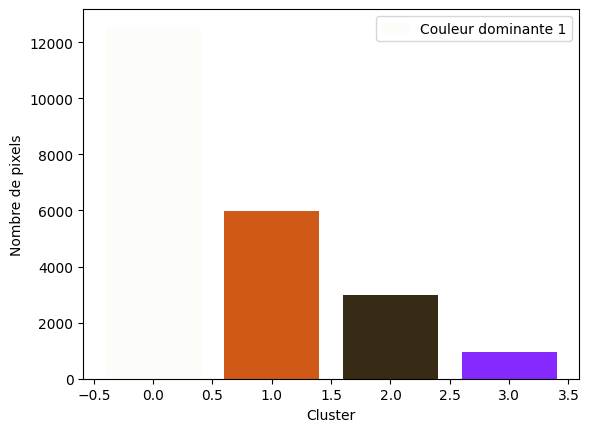

DataFrame pour l'image im-147_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-143_im.png  222,154,56   61,40,19   88,36,255
im-144_im.png  160,111,28   44,39,19  102,50,255
im-145_im.png   160,52,15   42,30,21  117,21,255
im-146_im.png    28,30,30  132,54,20   98,27,255
im-147_im.png   207,90,24   56,43,21  134,41,255

[147 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.94565418e+01 -3.33219257e-02  2.88955462e-01]
   Code couleur RGB: [0.99458935 0.99381563 0.99166531]
   Nombre de pixels: 17980

Cluster 2:
   Code couleur Lab: [20.08980978  5.33537669 12.81182402]
   Code couleur RGB: [0.24308329 0.17734794 0.11762194]
   Nombre de pixels: 1615

Cluster 3:
   Code couleur Lab: [ 38.38458972  73.45386103 -97.70591475]
   Code couleur RGB: [0.32144293 0.14264844 1.        ]
   Nombre de pixels: 439

Cluster 4:
   Code couleur Lab: [65.48768283 11.04265261 59.09370729]
   Code couleur RGB: [0.79900186 0.58643484 0.17926562]
   Nombre de pixels: 2466



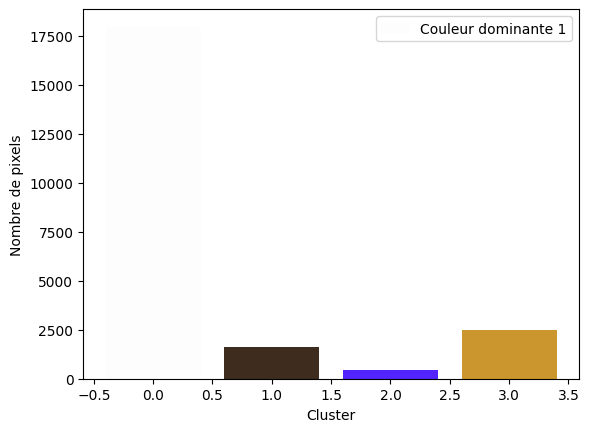

DataFrame pour l'image im-148_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-144_im.png  160,111,28   44,39,19  102,50,255
im-145_im.png   160,52,15   42,30,21  117,21,255
im-146_im.png    28,30,30  132,54,20   98,27,255
im-147_im.png   207,90,24   56,43,21  134,41,255
im-148_im.png  204,150,46   62,45,30   82,36,255

[148 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.35262683 -0.12494522  0.64937199]
   Code couleur RGB: [0.99394771 0.99275116 0.98774102]
   Nombre de pixels: 15430

Cluster 2:
   Code couleur Lab: [51.7726343  42.82990503 56.7290676 ]
   Code couleur RGB: [0.80049066 0.34647462 0.07424032]
   Nombre de pixels: 2804

Cluster 3:
   Code couleur Lab: [ 38.33708553  77.0442405  -97.7665536 ]
   Code couleur RGB: [0.36375079 0.10157176 1.        ]
   Nombre de pixels: 1310

Cluster 4:
   Code couleur Lab: [12.03118641  5.52856096 12.03970225]
   Code couleur RGB: [0.17176825 0.11124629 0.05507606]
   Nombre de pixels: 2956



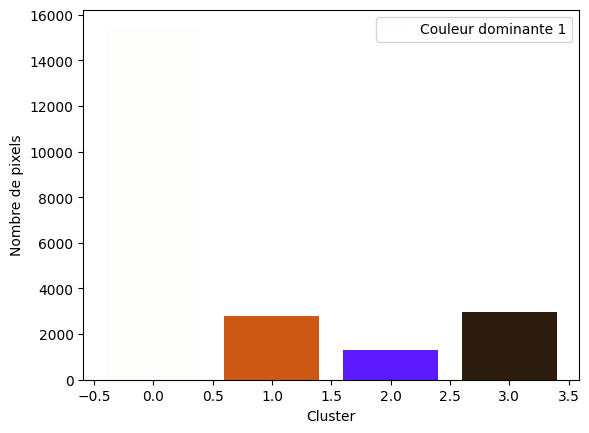

DataFrame pour l'image im-149_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-145_im.png   160,52,15   42,30,21  117,21,255
im-146_im.png    28,30,30  132,54,20   98,27,255
im-147_im.png   207,90,24   56,43,21  134,41,255
im-148_im.png  204,150,46   62,45,30   82,36,255
im-149_im.png    44,28,14  204,88,19   93,26,255

[149 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.31524     0.1278739   0.22440156]
   Code couleur RGB: [0.99406063 0.99183929 0.99057346]
   Nombre de pixels: 16383

Cluster 2:
   Code couleur Lab: [45.82162798 26.44916814 44.20106183]
   Code couleur RGB: [0.64226742 0.34938012 0.12677865]
   Nombre de pixels: 3642

Cluster 3:
   Code couleur Lab: [39.78893014 -7.5911484  20.24271118]
   Code couleur RGB: [0.36631613 0.37818234 0.2366102 ]
   Nombre de pixels: 2344

Cluster 4:
   Code couleur Lab: [ 49.69424229  69.47169933 -78.73456347]
   Code couleur RGB: [0.60211803 0.26619318 1.        ]
   Nombre de pixels: 131



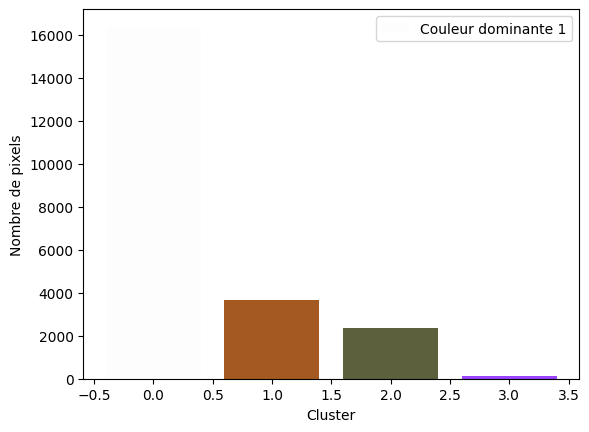

DataFrame pour l'image im-150_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-146_im.png    28,30,30  132,54,20   98,27,255
im-147_im.png   207,90,24   56,43,21  134,41,255
im-148_im.png  204,150,46   62,45,30   82,36,255
im-149_im.png    44,28,14  204,88,19   93,26,255
im-150_im.png   164,89,32   93,96,60  154,68,255

[150 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [  33.55230342   77.06457502 -105.74742612]
   Code couleur RGB: [0.10635809 0.05900152 1.        ]
   Nombre de pixels: 308

Cluster 2:
   Code couleur Lab: [64.65710575  3.46726304 48.27727108]
   Code couleur RGB: [0.73480463 0.59766286 0.26574012]
   Nombre de pixels: 1262

Cluster 3:
   Code couleur Lab: [9.92865515e+01 6.57431384e-03 2.50045571e-02]
   Code couleur RGB: [0.9920413  0.99186744 0.99174218]
   Nombre de pixels: 13866

Cluster 4:
   Code couleur Lab: [17.53292838 -3.00679567  9.70465206]
   Code couleur RGB: [0.17247224 0.17204654 0.11377771]
   Nombre de pixels: 7064



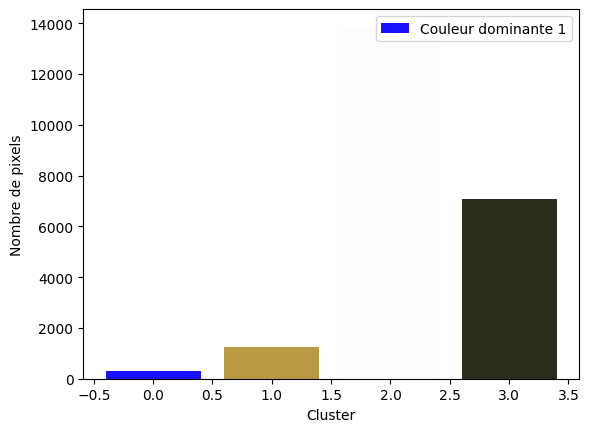

DataFrame pour l'image im-151_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-147_im.png   207,90,24    56,43,21  134,41,255
im-148_im.png  204,150,46    62,45,30   82,36,255
im-149_im.png    44,28,14   204,88,19   93,26,255
im-150_im.png   164,89,32    93,96,60  154,68,255
im-151_im.png    44,44,29  187,152,68   27,15,255

[151 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98256816e+01 -9.57212209e-02  2.23920858e-01]
   Code couleur RGB: [0.99804503 0.99817979 0.99634179]
   Nombre de pixels: 15899

Cluster 2:
   Code couleur Lab: [15.92727175  0.08179693 15.76478008]
   Code couleur RGB: [0.18354147 0.15261453 0.06567307]
   Nombre de pixels: 1628

Cluster 3:
   Code couleur Lab: [ 43.00035535  74.0801445  -89.91981662]
   Code couleur RGB: [0.47629368 0.17428538 1.        ]
   Nombre de pixels: 730

Cluster 4:
   Code couleur Lab: [46.67477565 31.94313999 50.25095447]
   Code couleur RGB: [0.68269544 0.33855733 0.0806929 ]
   Nombre de pixels: 4243



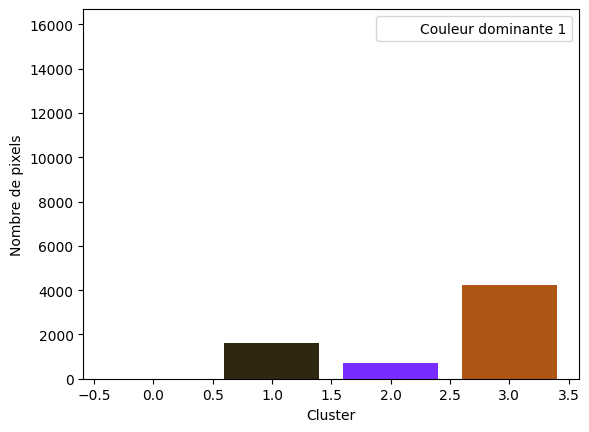

DataFrame pour l'image im-152_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-148_im.png  204,150,46    62,45,30   82,36,255
im-149_im.png    44,28,14   204,88,19   93,26,255
im-150_im.png   164,89,32    93,96,60  154,68,255
im-151_im.png    44,44,29  187,152,68   27,15,255
im-152_im.png   174,86,21    47,39,17  121,44,255

[152 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.83669031e+01 5.30859025e-02 8.03184473e-01]
   Code couleur RGB: [0.98474555 0.98109593 0.97543409]
   Nombre de pixels: 11796

Cluster 2:
   Code couleur Lab: [57.07149708  4.58725656 50.33295022]
   Code couleur RGB: [0.65792964 0.51779931 0.17226712]
   Nombre de pixels: 6851

Cluster 3:
   Code couleur Lab: [ 38.84940567  70.30358837 -96.97218802]
   Code couleur RGB: [0.29687716 0.17333855 1.        ]
   Nombre de pixels: 554

Cluster 4:
   Code couleur Lab: [26.38801921 -0.89460864  9.80024165]
   Code couleur RGB: [0.26217358 0.24443071 0.1865104 ]
   Nombre de pixels: 3299



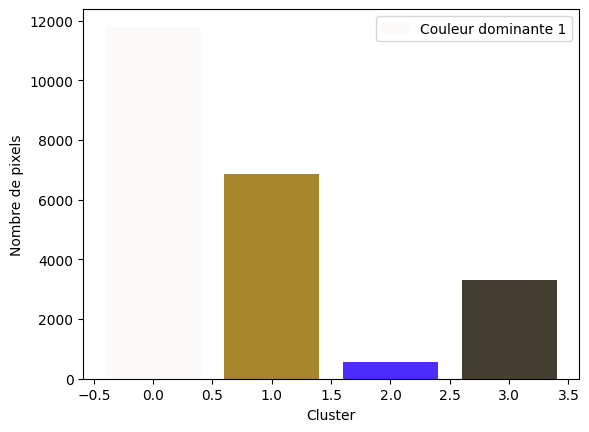

DataFrame pour l'image im-153_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-149_im.png    44,28,14   204,88,19   93,26,255
im-150_im.png   164,89,32    93,96,60  154,68,255
im-151_im.png    44,44,29  187,152,68   27,15,255
im-152_im.png   174,86,21    47,39,17  121,44,255
im-153_im.png  168,132,44    67,62,48   76,44,255

[153 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [11.82052205  4.44385637  9.81188388]
   Code couleur RGB: [0.16210354 0.11214362 0.06850799]
   Nombre de pixels: 3083

Cluster 2:
   Code couleur Lab: [99.20026267 -0.60874647  0.88430164]
   Code couleur RGB: [0.98913221 0.99212305 0.98416493]
   Nombre de pixels: 15933

Cluster 3:
   Code couleur Lab: [ 38.6113896   76.30213363 -97.35730872]
   Code couleur RGB: [0.36419437 0.11379522 1.        ]
   Nombre de pixels: 997

Cluster 4:
   Code couleur Lab: [54.57732382 30.10979076 56.15916444]
   Code couleur RGB: [0.77075227 0.42187254 0.10203804]
   Nombre de pixels: 2487



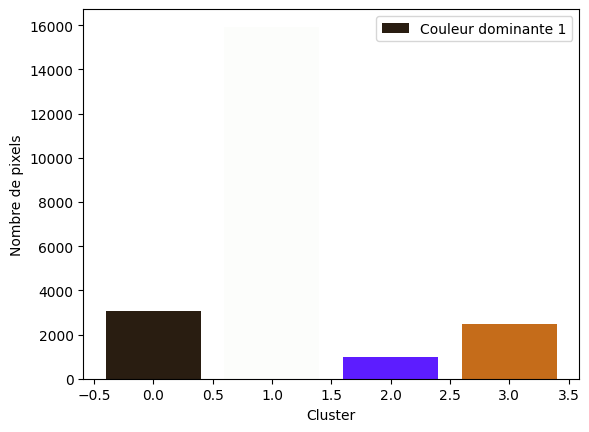

DataFrame pour l'image im-154_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-150_im.png   164,89,32    93,96,60  154,68,255
im-151_im.png    44,44,29  187,152,68   27,15,255
im-152_im.png   174,86,21    47,39,17  121,44,255
im-153_im.png  168,132,44    67,62,48   76,44,255
im-154_im.png    41,29,17  197,108,26   93,29,255

[154 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [42.52245437 34.99795648 33.51614529]
   Code couleur RGB: [0.63890722 0.28906805 0.18231231]
   Nombre de pixels: 6049

Cluster 2:
   Code couleur Lab: [ 37.96827578  79.10163459 -98.28746017]
   Code couleur RGB: [0.37539456 0.06380428 1.        ]
   Nombre de pixels: 1676

Cluster 3:
   Code couleur Lab: [ 9.95724299e+01 -5.00344070e-02  8.94921931e-02]
   Code couleur RGB: [0.9950585  0.99523162 0.99449124]
   Nombre de pixels: 11363

Cluster 4:
   Code couleur Lab: [10.71504503 10.11931356  9.86545278]
   Code couleur RGB: [0.17800555 0.09096369 0.05808625]
   Nombre de pixels: 3412



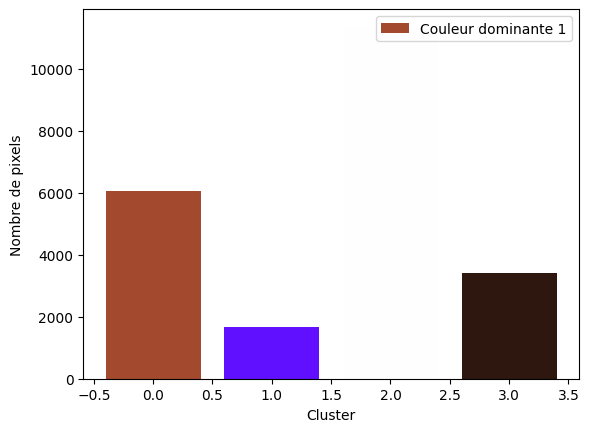

DataFrame pour l'image im-155_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-151_im.png    44,44,29  187,152,68   27,15,255
im-152_im.png   174,86,21    47,39,17  121,44,255
im-153_im.png  168,132,44    67,62,48   76,44,255
im-154_im.png    41,29,17  197,108,26   93,29,255
im-155_im.png   163,74,46    45,23,15   96,16,255

[155 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.91894507e+01 -1.56779416e-01  6.03038155e-04]
   Code couleur RGB: [0.98952669 0.99116865 0.99080226]
   Nombre de pixels: 16644

Cluster 2:
   Code couleur Lab: [19.30706503 -4.59023605  2.60680243]
   Code couleur RGB: [0.16192885 0.19083472 0.16830687]
   Nombre de pixels: 4975

Cluster 3:
   Code couleur Lab: [40.47910395 34.77126189 40.90797839]
   Code couleur RGB: [0.61883824 0.26904586 0.10898522]
   Nombre de pixels: 796

Cluster 4:
   Code couleur Lab: [ 44.66820717  77.63465448 -87.11177958]
   Code couleur RGB: [0.54981395 0.15494092 1.        ]
   Nombre de pixels: 85



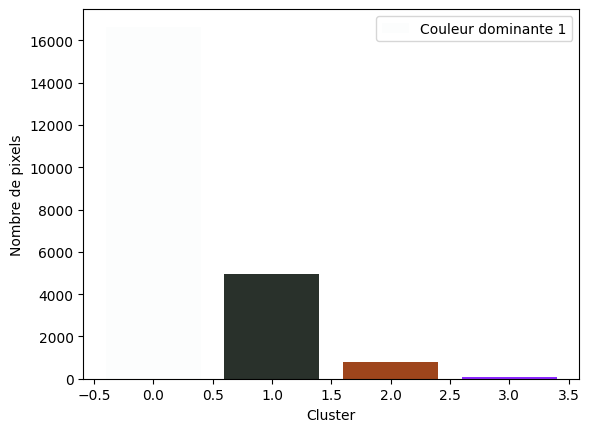

DataFrame pour l'image im-156_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-152_im.png   174,86,21    47,39,17  121,44,255
im-153_im.png  168,132,44    67,62,48   76,44,255
im-154_im.png    41,29,17  197,108,26   93,29,255
im-155_im.png   163,74,46    45,23,15   96,16,255
im-156_im.png    41,49,43   158,69,28  140,40,255

[156 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [6.61387694 1.53409023 4.90525027]
   Code couleur RGB: [0.10142417 0.07699789 0.04753071]
   Nombre de pixels: 2363

Cluster 2:
   Code couleur Lab: [ 9.97777308e+01 -9.51242609e-03  1.50203172e-01]
   Code couleur RGB: [0.99793658 0.99744751 0.99636839]
   Nombre de pixels: 13422

Cluster 3:
   Code couleur Lab: [ 40.48922969  71.55149026 -94.12491877]
   Code couleur RGB: [0.37536304 0.17535217 1.        ]
   Nombre de pixels: 1216

Cluster 4:
   Code couleur Lab: [37.20681193 15.87161805 36.81368025]
   Code couleur RGB: [0.48868659 0.30013467 0.10233602]
   Nombre de pixels: 5499



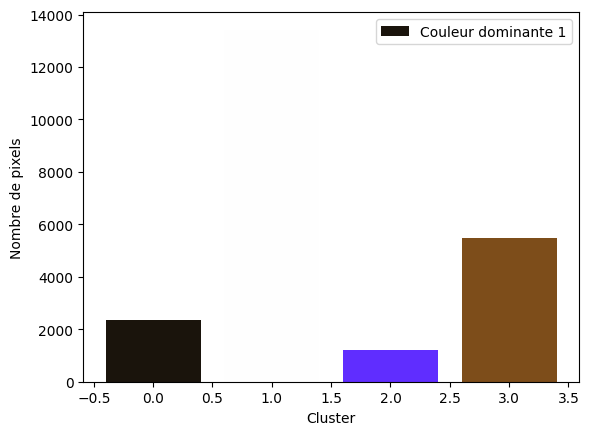

DataFrame pour l'image im-157_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-153_im.png  168,132,44    67,62,48   76,44,255
im-154_im.png    41,29,17  197,108,26   93,29,255
im-155_im.png   163,74,46    45,23,15   96,16,255
im-156_im.png    41,49,43   158,69,28  140,40,255
im-157_im.png   125,77,26    26,20,12   96,45,255

[157 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [97.86769737  0.83570984  0.71687581]
   Code couleur RGB: [0.98507335 0.97357015 0.97055026]
   Nombre de pixels: 12727

Cluster 2:
   Code couleur Lab: [39.08386656 34.88218258 46.06959079]
   Code couleur RGB: [0.60551789 0.25454672 0.04528835]
   Nombre de pixels: 5479

Cluster 3:
   Code couleur Lab: [ 44.98018851  73.64879818 -86.60919194]
   Code couleur RGB: [0.52419754 0.19512988 1.        ]
   Nombre de pixels: 1083

Cluster 4:
   Code couleur Lab: [20.39766299 -2.4624778  15.12571703]
   Code couleur RGB: [0.20881964 0.1945241  0.10491896]
   Nombre de pixels: 3211



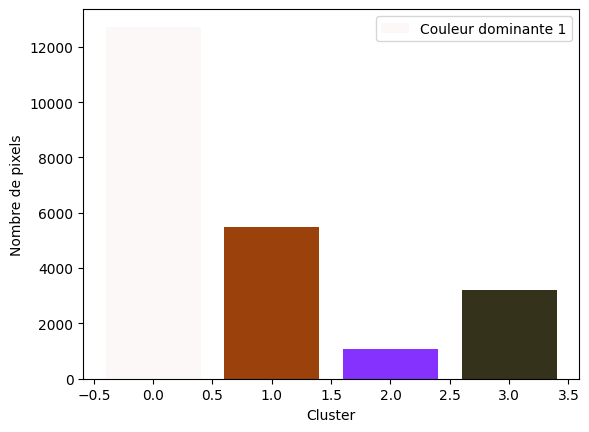

DataFrame pour l'image im-158_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-154_im.png    41,29,17  197,108,26   93,29,255
im-155_im.png   163,74,46    45,23,15   96,16,255
im-156_im.png    41,49,43   158,69,28  140,40,255
im-157_im.png   125,77,26    26,20,12   96,45,255
im-158_im.png   154,65,12    53,50,27  134,50,255

[158 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98015562e+01 -6.67708630e-02  8.53462214e-02]
   Code couleur RGB: [0.99751082 0.9978766  0.99712319]
   Nombre de pixels: 13808

Cluster 2:
   Code couleur Lab: [54.55647956 42.84382352 57.38696946]
   Code couleur RGB: [0.83524192 0.37467895 0.09951538]
   Nombre de pixels: 4260

Cluster 3:
   Code couleur Lab: [16.19137419 10.4295839  15.14293153]
   Code couleur RGB: [0.23347113 0.13332213 0.07429442]
   Nombre de pixels: 3713

Cluster 4:
   Code couleur Lab: [ 39.74953681  78.37587742 -95.383597  ]
   Code couleur RGB: [0.42390607 0.09628874 1.        ]
   Nombre de pixels: 719



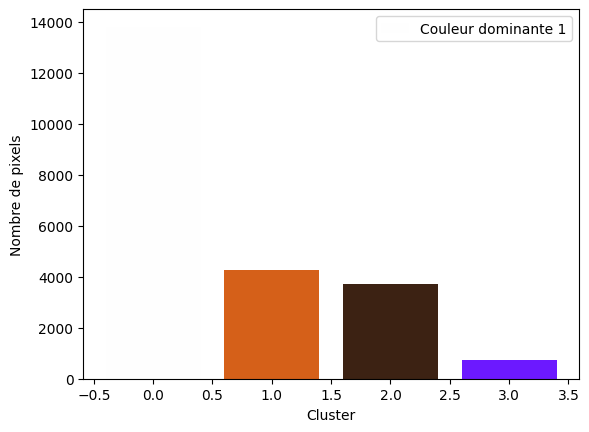

DataFrame pour l'image im-159_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-155_im.png   163,74,46   45,23,15   96,16,255
im-156_im.png    41,49,43  158,69,28  140,40,255
im-157_im.png   125,77,26   26,20,12   96,45,255
im-158_im.png   154,65,12   53,50,27  134,50,255
im-159_im.png   213,96,25   60,34,19  108,25,255

[159 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.90598909e+01 -1.06983307e-03 -4.21502329e-01]
   Code couleur RGB: [0.98780744 0.98944701 0.99255124]
   Nombre de pixels: 12689

Cluster 2:
   Code couleur Lab: [20.64222584  1.93778998 -4.65667609]
   Code couleur RGB: [0.1933395  0.19236601 0.22152854]
   Nombre de pixels: 5673

Cluster 3:
   Code couleur Lab: [51.699574   18.07569564 39.46484123]
   Code couleur RGB: [0.66245492 0.43174592 0.21623866]
   Nombre de pixels: 3997

Cluster 4:
   Code couleur Lab: [  36.19432012   75.38364849 -101.33195922]
   Code couleur RGB: [0.25391077 0.10488775 1.        ]
   Nombre de pixels: 141



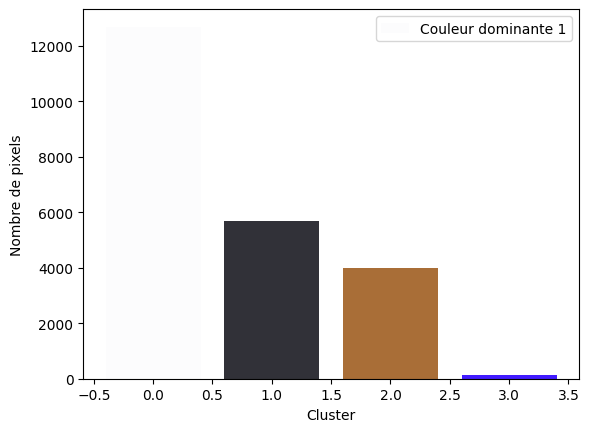

DataFrame pour l'image im-160_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-156_im.png    41,49,43   158,69,28  140,40,255
im-157_im.png   125,77,26    26,20,12   96,45,255
im-158_im.png   154,65,12    53,50,27  134,50,255
im-159_im.png   213,96,25    60,34,19  108,25,255
im-160_im.png    49,49,56  169,110,55   65,27,255

[160 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.58262527  0.79308773 -0.36156978]
   Code couleur RGB: [0.98903736 0.982088   0.98679245]
   Nombre de pixels: 12993

Cluster 2:
   Code couleur Lab: [49.89168431 41.65431674 43.86718102]
   Code couleur RGB: [0.76508969 0.33394586 0.17568329]
   Nombre de pixels: 4944

Cluster 3:
   Code couleur Lab: [16.57306174  0.97277817 -3.64300898]
   Code couleur RGB: [0.1562617  0.15975941 0.18087882]
   Nombre de pixels: 1939

Cluster 4:
   Code couleur Lab: [50.05245463 18.67114996 18.11408807]
   Code couleur RGB: [0.62182534 0.41759228 0.35010744]
   Nombre de pixels: 2624



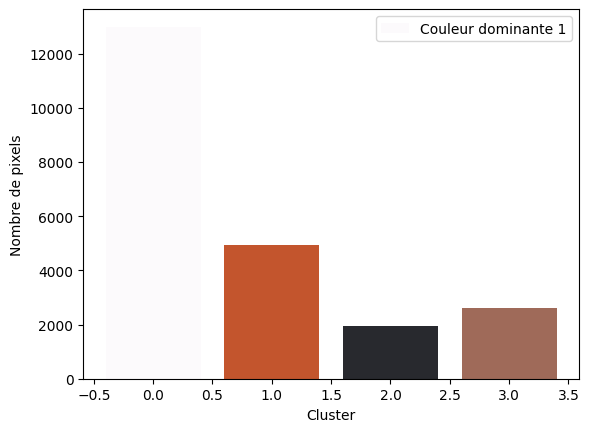

DataFrame pour l'image im-161_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-157_im.png   125,77,26    26,20,12   96,45,255
im-158_im.png   154,65,12    53,50,27  134,50,255
im-159_im.png   213,96,25    60,34,19  108,25,255
im-160_im.png    49,49,56  169,110,55   65,27,255
im-161_im.png   195,85,45  159,106,89    40,41,46

[161 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.48595127 -0.27811781  0.45314841]
   Code couleur RGB: [0.99352319 0.99469442 0.99071992]
   Nombre de pixels: 12181

Cluster 2:
   Code couleur Lab: [17.31065203 -1.31575117 17.03343059]
   Code couleur RGB: [0.19002414 0.16636206 0.06891937]
   Nombre de pixels: 5325

Cluster 3:
   Code couleur Lab: [ 39.07245948  75.98092181 -96.53250628]
   Code couleur RGB: [0.37697253 0.12146035 1.        ]
   Nombre de pixels: 1074

Cluster 4:
   Code couleur Lab: [46.21441904 36.90014339 52.39821011]
   Code couleur RGB: [0.70224718 0.31543254 0.05398745]
   Nombre de pixels: 3920



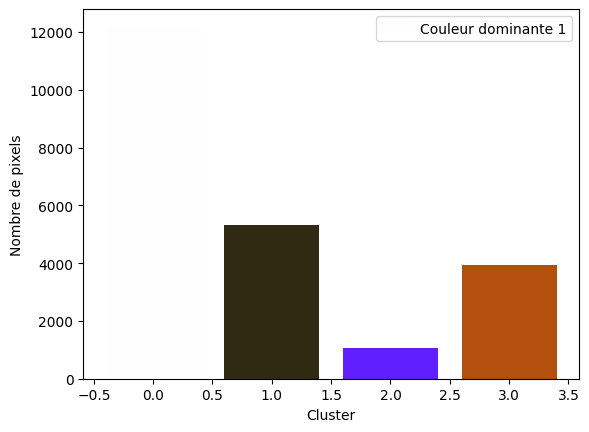

DataFrame pour l'image im-162_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-158_im.png   154,65,12    53,50,27  134,50,255
im-159_im.png   213,96,25    60,34,19  108,25,255
im-160_im.png    49,49,56  169,110,55   65,27,255
im-161_im.png   195,85,45  159,106,89    40,41,46
im-162_im.png    48,42,18   179,80,14   96,31,255

[162 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [47.02641025 23.64311521 48.42716103]
   Code couleur RGB: [0.64464585 0.36926679 0.0974101 ]
   Nombre de pixels: 3669

Cluster 2:
   Code couleur Lab: [ 9.97282912e+01 -3.94901642e-02  2.58235756e-01]
   Code couleur RGB: [0.99751697 0.9969264  0.99498299]
   Nombre de pixels: 14118

Cluster 3:
   Code couleur Lab: [ 43.69535487  71.17844393 -88.9097419 ]
   Code couleur RGB: [0.46712029 0.20401671 1.        ]
   Nombre de pixels: 1286

Cluster 4:
   Code couleur Lab: [11.43651568  9.1090692  11.82951147]
   Code couleur RGB: [0.18219444 0.09870303 0.0507725 ]
   Nombre de pixels: 3427



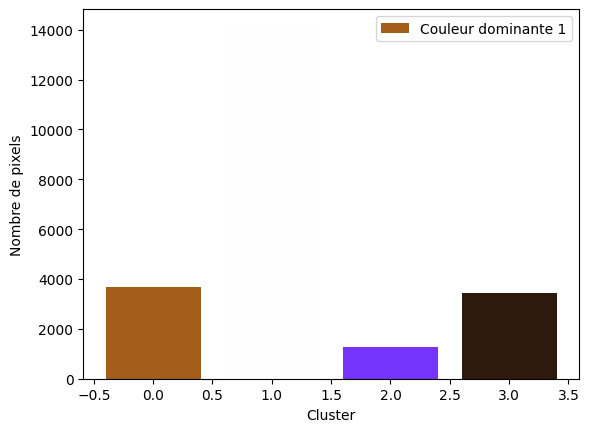

DataFrame pour l'image im-163_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-159_im.png   213,96,25    60,34,19  108,25,255
im-160_im.png    49,49,56  169,110,55   65,27,255
im-161_im.png   195,85,45  159,106,89    40,41,46
im-162_im.png    48,42,18   179,80,14   96,31,255
im-163_im.png   164,94,25    46,25,13  119,52,255

[163 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.80989558e+01 -3.97185884e-02  1.02277983e+00]
   Code couleur RGB: [0.98173366 0.97822165 0.97072992]
   Nombre de pixels: 14432

Cluster 2:
   Code couleur Lab: [45.23241411 41.80869839 50.25287097]
   Code couleur RGB: [0.71293363 0.28547957 0.07394434]
   Nombre de pixels: 3701

Cluster 3:
   Code couleur Lab: [ 42.57366083  76.47718719 -90.62658653]
   Code couleur RGB: [0.486523   0.14725878 1.        ]
   Nombre de pixels: 1081

Cluster 4:
   Code couleur Lab: [27.67514722 -0.05396193 19.03102092]
   Code couleur RGB: [0.29361184 0.25281019 0.14084508]
   Nombre de pixels: 3286



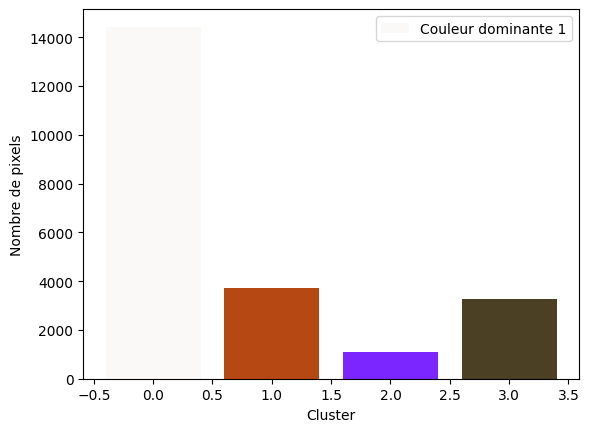

DataFrame pour l'image im-164_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-160_im.png    49,49,56  169,110,55   65,27,255
im-161_im.png   195,85,45  159,106,89    40,41,46
im-162_im.png    48,42,18   179,80,14   96,31,255
im-163_im.png   164,94,25    46,25,13  119,52,255
im-164_im.png   182,73,19    75,64,36  124,38,255

[164 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 49.90463949  83.11468367 -78.31793217]
   Code couleur RGB: [0.70703714 0.14810776 1.        ]
   Nombre de pixels: 691

Cluster 2:
   Code couleur Lab: [99.50474256 -0.1126818   0.67141392]
   Code couleur RGB: [0.99585278 0.99444211 0.98930122]
   Nombre de pixels: 16051

Cluster 3:
   Code couleur Lab: [47.34306968 56.18221071 54.61818545]
   Code couleur RGB: [0.80820648 0.23050056 0.06376369]
   Nombre de pixels: 3783

Cluster 4:
   Code couleur Lab: [20.74704717  8.62450594 10.58309848]
   Code couleur RGB: [0.26233498 0.17607436 0.13643431]
   Nombre de pixels: 1975



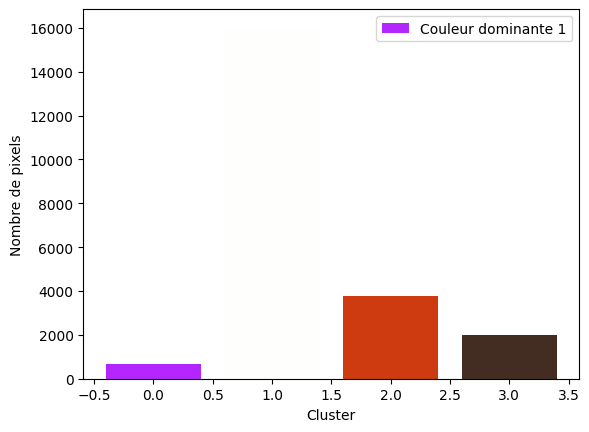

DataFrame pour l'image im-165_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-161_im.png   195,85,45  159,106,89    40,41,46
im-162_im.png    48,42,18   179,80,14   96,31,255
im-163_im.png   164,94,25    46,25,13  119,52,255
im-164_im.png   182,73,19    75,64,36  124,38,255
im-165_im.png   206,59,16    67,45,35  180,38,255

[165 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [16.63951486 -0.25519552  2.2878038 ]
   Code couleur RGB: [0.16536399 0.1611746  0.14852609]
   Nombre de pixels: 6785

Cluster 2:
   Code couleur Lab: [ 9.91290624e+01 -3.60078232e-01  7.80329661e-02]
   Code couleur RGB: [0.98746782 0.99095242 0.98950202]
   Nombre de pixels: 13189

Cluster 3:
   Code couleur Lab: [  34.25835119   78.04254574 -104.56469519]
   Code couleur RGB: [0.19326792 0.04547769 1.        ]
   Nombre de pixels: 432

Cluster 4:
   Code couleur Lab: [49.13248491  7.2308999  49.48682812]
   Code couleur RGB: [0.58340367 0.43338649 0.09753712]
   Nombre de pixels: 2094



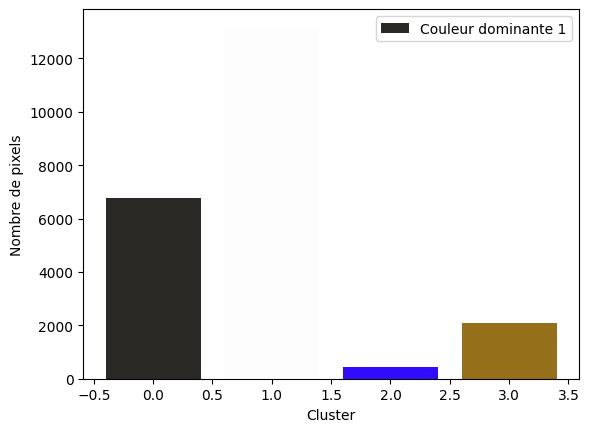

DataFrame pour l'image im-166_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-162_im.png    48,42,18   179,80,14   96,31,255
im-163_im.png   164,94,25    46,25,13  119,52,255
im-164_im.png   182,73,19    75,64,36  124,38,255
im-165_im.png   206,59,16    67,45,35  180,38,255
im-166_im.png    42,41,38  149,111,25   49,12,255

[166 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98925866e+01 -3.19849775e-02  1.03826416e-01]
   Code couleur RGB: [0.99889387 0.99882118 0.99802224]
   Nombre de pixels: 17523

Cluster 2:
   Code couleur Lab: [47.52487364 39.8561937  52.79223303]
   Code couleur RGB: [0.73244388 0.31650692 0.06863999]
   Nombre de pixels: 3022

Cluster 3:
   Code couleur Lab: [ 46.78864048  76.68060056 -83.59395363]
   Code couleur RGB: [0.59214785 0.18512881 1.        ]
   Nombre de pixels: 677

Cluster 4:
   Code couleur Lab: [12.63101617  1.20412722  8.26438839]
   Code couleur RGB: [0.15108708 0.12494211 0.0841733 ]
   Nombre de pixels: 1278



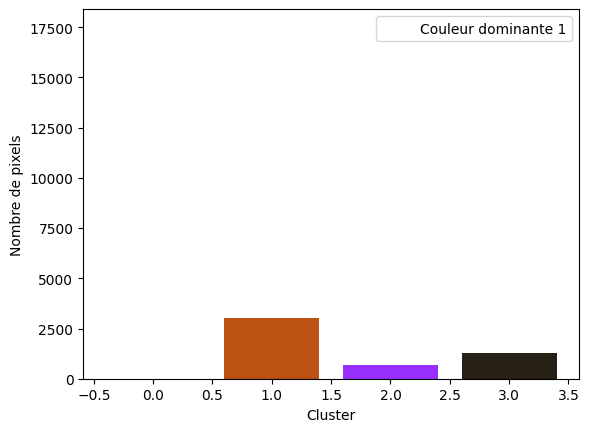

DataFrame pour l'image im-167_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-163_im.png   164,94,25    46,25,13  119,52,255
im-164_im.png   182,73,19    75,64,36  124,38,255
im-165_im.png   206,59,16    67,45,35  180,38,255
im-166_im.png    42,41,38  149,111,25   49,12,255
im-167_im.png   187,81,18    39,32,21  151,47,255

[167 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [32.1708793  29.52324368 36.47844887]
   Code couleur RGB: [0.49748894 0.21091799 0.06635413]
   Nombre de pixels: 6159

Cluster 2:
   Code couleur Lab: [98.23011353 -0.31334961  0.69109078]
   Code couleur RGB: [0.97984207 0.98046611 0.97468287]
   Nombre de pixels: 12540

Cluster 3:
   Code couleur Lab: [ 40.54837932  75.71220357 -93.99069741]
   Code couleur RGB: [0.4219646  0.13709056 1.        ]
   Nombre de pixels: 671

Cluster 4:
   Code couleur Lab: [20.37565795 -0.9995294   4.84710395]
   Code couleur RGB: [0.19843806 0.19336971 0.16487627]
   Nombre de pixels: 3130



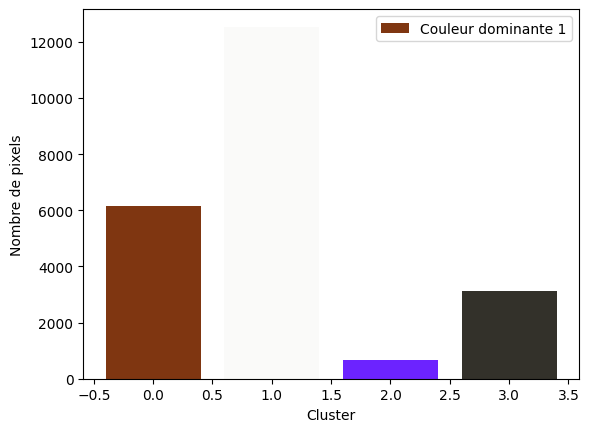

DataFrame pour l'image im-168_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-164_im.png   182,73,19    75,64,36  124,38,255
im-165_im.png   206,59,16    67,45,35  180,38,255
im-166_im.png    42,41,38  149,111,25   49,12,255
im-167_im.png   187,81,18    39,32,21  151,47,255
im-168_im.png   127,54,17    51,49,42  108,35,255

[168 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.98381998e+01 -1.67456705e-02  2.36843509e-01]
   Code couleur RGB: [0.99887427 0.99812644 0.99639698]
   Nombre de pixels: 12945

Cluster 2:
   Code couleur Lab: [53.25551743 26.16055473 45.89194716]
   Code couleur RGB: [0.72822089 0.42256138 0.183632  ]
   Nombre de pixels: 7371

Cluster 3:
   Code couleur Lab: [19.65546203  3.84128299 14.3610877 ]
   Code couleur RGB: [0.23367667 0.17654361 0.10476289]
   Nombre de pixels: 2079

Cluster 4:
   Code couleur Lab: [ 42.14594534  73.35057015 -91.43809424]
   Code couleur RGB: [0.44469071 0.17368379 1.        ]
   Nombre de pixels: 105



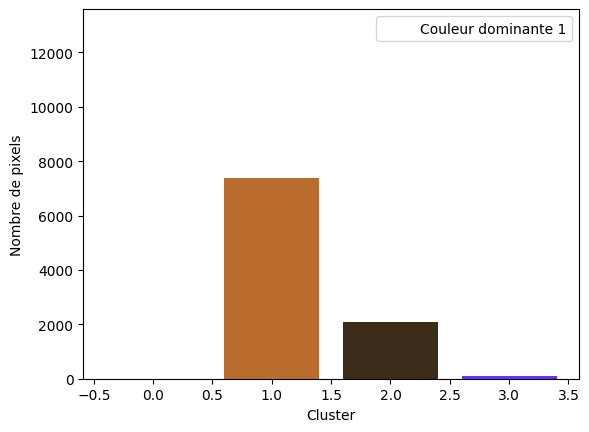

DataFrame pour l'image im-169_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-165_im.png   206,59,16    67,45,35  180,38,255
im-166_im.png    42,41,38  149,111,25   49,12,255
im-167_im.png   187,81,18    39,32,21  151,47,255
im-168_im.png   127,54,17    51,49,42  108,35,255
im-169_im.png  186,108,47    60,45,27  113,44,255

[169 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [69.06120082 22.94892177 68.10607951]
   Code couleur RGB: [0.91531125 0.58967148 0.12482323]
   Nombre de pixels: 4268

Cluster 2:
   Code couleur Lab: [9.93970167e+01 4.86409452e-03 7.34232326e-01]
   Code couleur RGB: [0.99580234 0.99291507 0.98761939]
   Nombre de pixels: 15218

Cluster 3:
   Code couleur Lab: [17.18074503  3.97396652 12.1808687 ]
   Code couleur RGB: [0.20934275 0.15600401 0.09793759]
   Nombre de pixels: 2512

Cluster 4:
   Code couleur Lab: [ 49.88908053  68.1947989  -78.90607125]
   Code couleur RGB: [0.59323034 0.27655141 1.        ]
   Nombre de pixels: 502



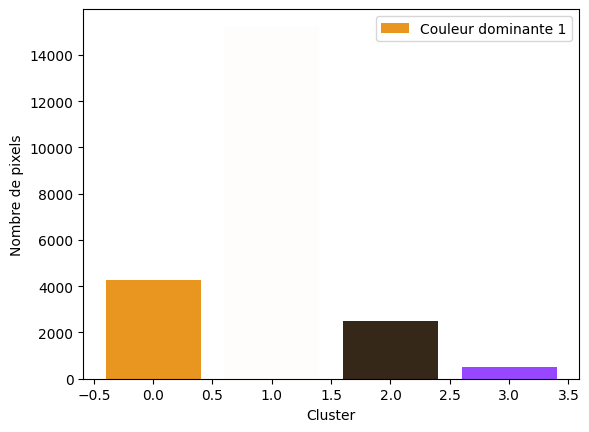

DataFrame pour l'image im-170_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-166_im.png    42,41,38  149,111,25   49,12,255
im-167_im.png   187,81,18    39,32,21  151,47,255
im-168_im.png   127,54,17    51,49,42  108,35,255
im-169_im.png  186,108,47    60,45,27  113,44,255
im-170_im.png  233,150,32    53,40,25  151,71,255

[170 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [11.72743368  8.60584122  8.02238807]
   Code couleur RGB: [0.17769494 0.10287641 0.07941295]
   Nombre de pixels: 1589

Cluster 2:
   Code couleur Lab: [99.40400304 -1.28763609  1.00941068]
   Code couleur RGB: [0.98637106 0.99603626 0.98543093]
   Nombre de pixels: 13461

Cluster 3:
   Code couleur Lab: [33.33173784 32.34642369 36.27615541]
   Code couleur RGB: [0.52323283 0.21084415 0.08027219]
   Nombre de pixels: 6641

Cluster 4:
   Code couleur Lab: [ 38.1105103   78.61020742 -98.06107502]
   Code couleur RGB: [0.37463257 0.07475696 1.        ]
   Nombre de pixels: 809



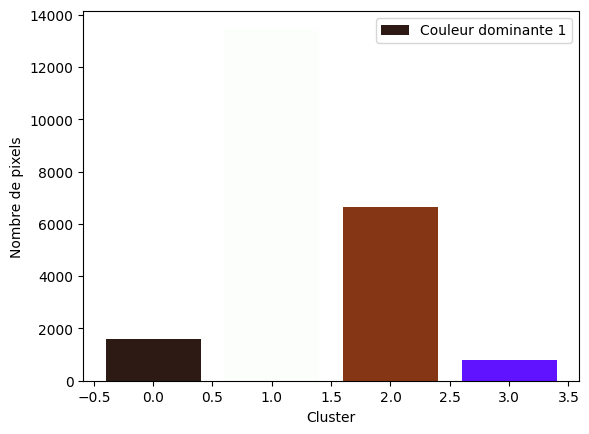

DataFrame pour l'image im-171_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-167_im.png   187,81,18   39,32,21  151,47,255
im-168_im.png   127,54,17   51,49,42  108,35,255
im-169_im.png  186,108,47   60,45,27  113,44,255
im-170_im.png  233,150,32   53,40,25  151,71,255
im-171_im.png   133,54,20   45,26,20   96,19,255

[171 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.16454638 18.99491722 44.9165435 ]
   Code couleur RGB: [0.64306059 0.40382709 0.14896302]
   Nombre de pixels: 4673

Cluster 2:
   Code couleur Lab: [99.23316792  0.29436248  0.64002447]
   Code couleur RGB: [0.99594653 0.99037987 0.98651589]
   Nombre de pixels: 15471

Cluster 3:
   Code couleur Lab: [18.95713514  4.56709237  7.22853422]
   Code couleur RGB: [0.22090663 0.17036324 0.14039838]
   Nombre de pixels: 1834

Cluster 4:
   Code couleur Lab: [ 42.00570814  70.24726149 -91.59789   ]
   Code couleur RGB: [0.40993963 0.19720134 1.        ]
   Nombre de pixels: 522



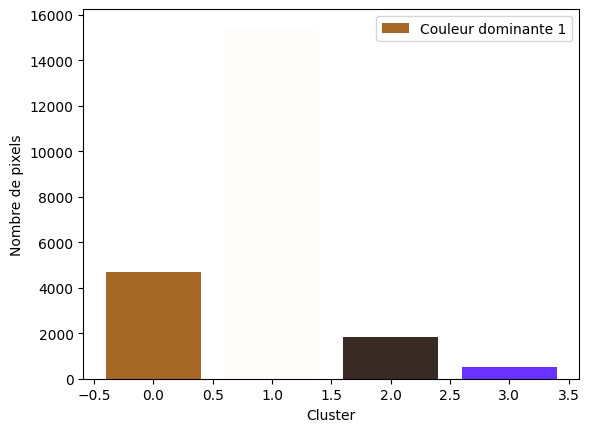

DataFrame pour l'image im-172_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-168_im.png   127,54,17   51,49,42  108,35,255
im-169_im.png  186,108,47   60,45,27  113,44,255
im-170_im.png  233,150,32   53,40,25  151,71,255
im-171_im.png   133,54,20   45,26,20   96,19,255
im-172_im.png  164,103,38   56,43,36  105,50,255

[172 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.62083377 -0.24369842  1.07748001]
   Code couleur RGB: [0.99754769 0.99595849 0.98752003]
   Nombre de pixels: 14175

Cluster 2:
   Code couleur Lab: [75.87853205 12.74358005 69.44149524]
   Code couleur RGB: [0.94118811 0.68920255 0.1858201 ]
   Nombre de pixels: 5312

Cluster 3:
   Code couleur Lab: [45.36994179 -0.91993193 36.92218239]
   Code couleur RGB: [0.48625266 0.41638767 0.17024976]
   Nombre de pixels: 2794

Cluster 4:
   Code couleur Lab: [ 40.46768774  69.93090896 -94.16241133]
   Code couleur RGB: [0.35576638 0.18779976 1.        ]
   Nombre de pixels: 219



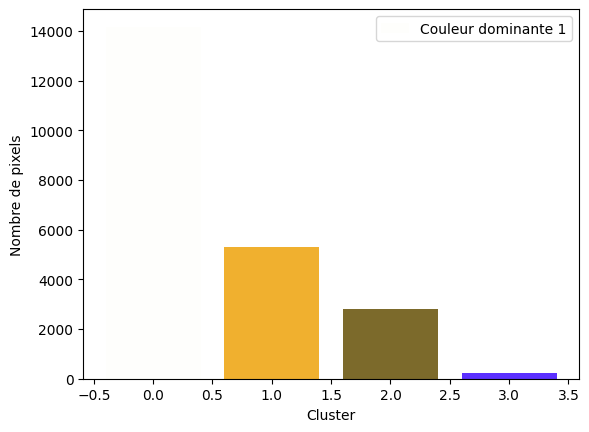

DataFrame pour l'image im-173_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-169_im.png  186,108,47    60,45,27  113,44,255
im-170_im.png  233,150,32    53,40,25  151,71,255
im-171_im.png   133,54,20    45,26,20   96,19,255
im-172_im.png  164,103,38    56,43,36  105,50,255
im-173_im.png  240,176,47  124,106,43   91,48,255

[173 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.16034499 -0.36201308  1.25674249]
   Code couleur RGB: [0.99199302 0.99096378 0.98092474]
   Nombre de pixels: 13874

Cluster 2:
   Code couleur Lab: [46.38845127 24.47658548 48.11724134]
   Code couleur RGB: [0.64128622 0.36061135 0.09441041]
   Nombre de pixels: 5946

Cluster 3:
   Code couleur Lab: [19.8329625   0.50654447 18.76208361]
   Code couleur RGB: [0.2236885  0.18395743 0.07859857]
   Nombre de pixels: 2314

Cluster 4:
   Code couleur Lab: [ 38.06868747  71.34080262 -98.18929136]
   Code couleur RGB: [0.27937486 0.15915364 1.        ]
   Nombre de pixels: 366



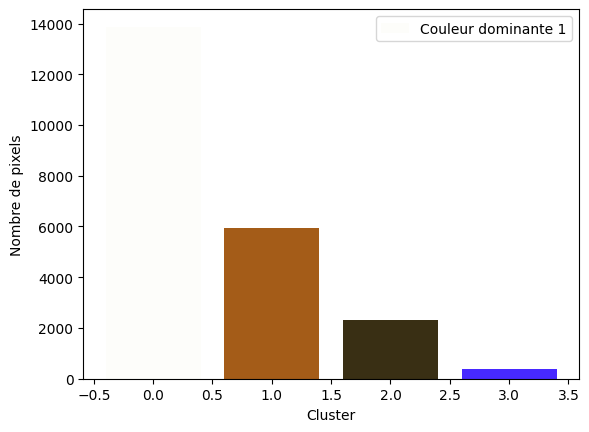

DataFrame pour l'image im-174_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-170_im.png  233,150,32    53,40,25  151,71,255
im-171_im.png   133,54,20    45,26,20   96,19,255
im-172_im.png  164,103,38    56,43,36  105,50,255
im-173_im.png  240,176,47  124,106,43   91,48,255
im-174_im.png   164,92,24    57,47,20   71,41,255

[174 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.83011271 -0.29930609  0.11334934]
   Code couleur RGB: [0.99604582 0.99875686 0.99720275]
   Nombre de pixels: 17240

Cluster 2:
   Code couleur Lab: [42.48835875 26.70909977 38.06586649]
   Code couleur RGB: [0.60143616 0.31736355 0.14562138]
   Nombre de pixels: 2387

Cluster 3:
   Code couleur Lab: [  36.36394424   76.11722148 -101.01039804]
   Code couleur RGB: [0.27422348 0.09668332 1.        ]
   Nombre de pixels: 593

Cluster 4:
   Code couleur Lab: [20.69851811 12.92560843 23.15645445]
   Code couleur RGB: [0.2941989  0.1634791  0.06024682]
   Nombre de pixels: 2280



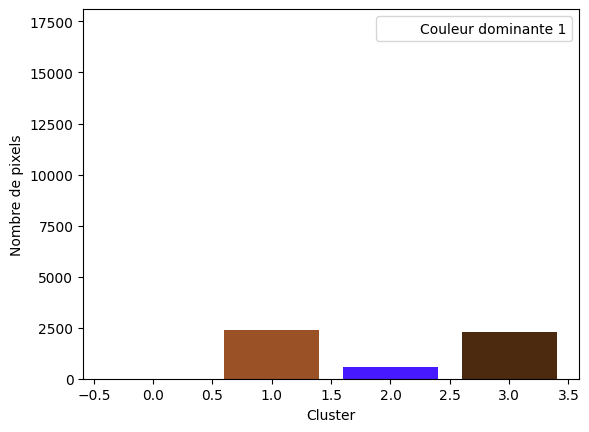

DataFrame pour l'image im-175_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-171_im.png   133,54,20    45,26,20   96,19,255
im-172_im.png  164,103,38    56,43,36  105,50,255
im-173_im.png  240,176,47  124,106,43   91,48,255
im-174_im.png   164,92,24    57,47,20   71,41,255
im-175_im.png   153,81,37    75,42,15   70,25,255

[175 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [49.69873303 41.35183255 47.8004367 ]
   Code couleur RGB: [0.76357231 0.33271277 0.14182696]
   Nombre de pixels: 5655

Cluster 2:
   Code couleur Lab: [98.77121653  0.36581452  0.63135038]
   Code couleur RGB: [0.99124667 0.98496937 0.98135584]
   Nombre de pixels: 13621

Cluster 3:
   Code couleur Lab: [ 53.1687108   77.43206012 -72.91878291]
   Code couleur RGB: [0.73395422 0.24122402 1.        ]
   Nombre de pixels: 302

Cluster 4:
   Code couleur Lab: [27.63983759  7.46817555 11.28673833]
   Code couleur RGB: [0.32220099 0.23808781 0.1895574 ]
   Nombre de pixels: 2922



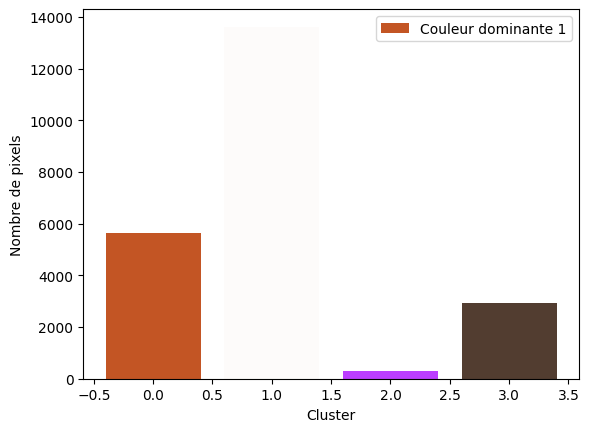

DataFrame pour l'image im-176_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-172_im.png  164,103,38    56,43,36  105,50,255
im-173_im.png  240,176,47  124,106,43   91,48,255
im-174_im.png   164,92,24    57,47,20   71,41,255
im-175_im.png   153,81,37    75,42,15   70,25,255
im-176_im.png   195,85,36    82,61,48  187,62,255

[176 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95321168e+01 1.04047857e-01 6.41655438e-02]
   Code couleur RGB: [0.99575994 0.9944072  0.99424697]
   Nombre de pixels: 15683

Cluster 2:
   Code couleur Lab: [14.02978263  3.58828887 11.16698234]
   Code couleur RGB: [0.17849916 0.13125571 0.07911852]
   Nombre de pixels: 3737

Cluster 3:
   Code couleur Lab: [ 38.38498772  74.70866825 -97.73106502]
   Code couleur RGB: [0.33706696 0.13006243 1.        ]
   Nombre de pixels: 813

Cluster 4:
   Code couleur Lab: [64.96567124 14.968811   64.98262469]
   Code couleur RGB: [0.81930294 0.57026506 0.10485645]
   Nombre de pixels: 2267



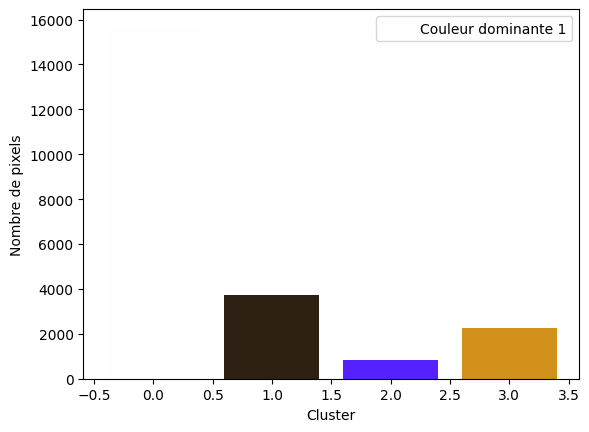

DataFrame pour l'image im-177_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-173_im.png  240,176,47  124,106,43   91,48,255
im-174_im.png   164,92,24    57,47,20   71,41,255
im-175_im.png   153,81,37    75,42,15   70,25,255
im-176_im.png   195,85,36    82,61,48  187,62,255
im-177_im.png    46,33,20  209,145,27   86,33,255

[177 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.19693401  0.77074314  0.43673793]
   Code couleur RGB: [0.99865792 0.9888688  0.98771215]
   Nombre de pixels: 14420

Cluster 2:
   Code couleur Lab: [45.0956632  20.09229692 36.67165881]
   Code couleur RGB: [0.59652051 0.36252727 0.17710283]
   Nombre de pixels: 2110

Cluster 3:
   Code couleur Lab: [66.28878303 31.84611124 48.26838731]
   Code couleur RGB: [0.91560694 0.53580613 0.29261614]
   Nombre de pixels: 4462

Cluster 4:
   Code couleur Lab: [37.80044538 -8.57414788 25.02101053]
   Code couleur RGB: [0.34917932 0.36047386 0.18660667]
   Nombre de pixels: 1508



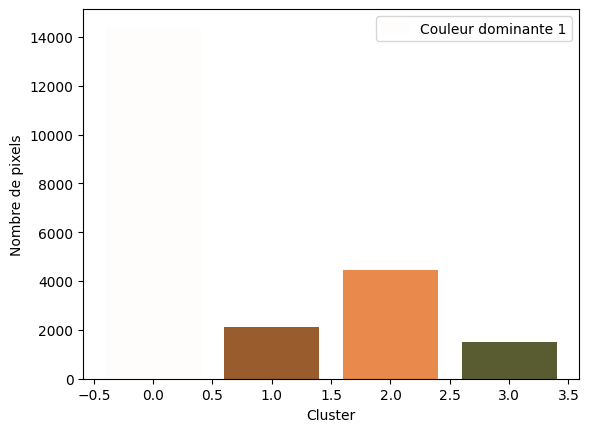

DataFrame pour l'image im-178_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-174_im.png   164,92,24    57,47,20   71,41,255
im-175_im.png   153,81,37    75,42,15   70,25,255
im-176_im.png   195,85,36    82,61,48  187,62,255
im-177_im.png    46,33,20  209,145,27   86,33,255
im-178_im.png  233,137,75   152,92,45    89,92,48

[178 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.38663948 -0.31224376  0.83213442]
   Code couleur RGB: [0.99346523 0.99353719 0.98671497]
   Nombre de pixels: 13470

Cluster 2:
   Code couleur Lab: [56.40682912 44.46778006 62.95326796]
   Code couleur RGB: [0.86880883 0.38630908 0.04694215]
   Nombre de pixels: 4432

Cluster 3:
   Code couleur Lab: [ 57.66736066  73.73327096 -65.73672599]
   Code couleur RGB: [0.79552968 0.31242401 1.        ]
   Nombre de pixels: 1752

Cluster 4:
   Code couleur Lab: [22.37805504  4.47355048 13.38575317]
   Code couleur RGB: [0.26051918 0.19845741 0.1326047 ]
   Nombre de pixels: 2846



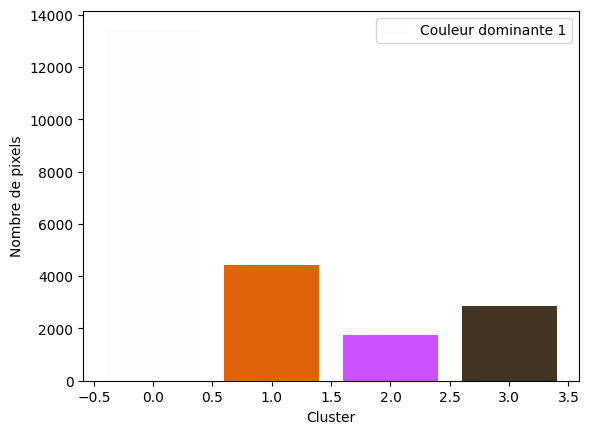

DataFrame pour l'image im-179_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-175_im.png   153,81,37    75,42,15   70,25,255
im-176_im.png   195,85,36    82,61,48  187,62,255
im-177_im.png    46,33,20  209,145,27   86,33,255
im-178_im.png  233,137,75   152,92,45    89,92,48
im-179_im.png   222,99,12    66,51,34  203,80,255

[179 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.63094083 -0.22761473  0.38902486]
   Code couleur RGB: [0.99535103 0.99623794 0.99285908]
   Nombre de pixels: 16144

Cluster 2:
   Code couleur Lab: [28.75995149 13.81344929 26.84438914]
   Code couleur RGB: [0.38227099 0.23037404 0.10215843]
   Nombre de pixels: 1802

Cluster 3:
   Code couleur Lab: [ 37.18505495  75.71894743 -99.63676657]
   Code couleur RGB: [0.3043681  0.10851364 1.        ]
   Nombre de pixels: 521

Cluster 4:
   Code couleur Lab: [62.76538482 30.58845509 54.22787202]
   Code couleur RGB: [0.87086206 0.50294416 0.20810464]
   Nombre de pixels: 4033



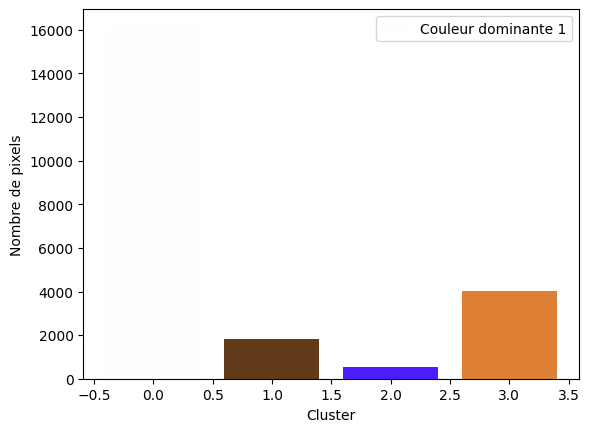

DataFrame pour l'image im-180_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-176_im.png   195,85,36    82,61,48  187,62,255
im-177_im.png    46,33,20  209,145,27   86,33,255
im-178_im.png  233,137,75   152,92,45    89,92,48
im-179_im.png   222,99,12    66,51,34  203,80,255
im-180_im.png  222,128,53    97,59,26   78,28,255

[180 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.40369014  0.22593063 -0.16948926]
   Code couleur RGB: [0.99445488 0.99272252 0.99457692]
   Nombre de pixels: 16197

Cluster 2:
   Code couleur Lab: [45.00425042 31.62166233 47.54938654]
   Code couleur RGB: [0.66009271 0.3237609  0.09099668]
   Nombre de pixels: 4147

Cluster 3:
   Code couleur Lab: [ 50.3071656   71.63572187 -77.72803745]
   Code couleur RGB: [0.63228692 0.25734248 1.        ]
   Nombre de pixels: 884

Cluster 4:
   Code couleur Lab: [24.89463482  1.50395759 12.89434241]
   Code couleur RGB: [0.26736508 0.22622462 0.1557694 ]
   Nombre de pixels: 1272



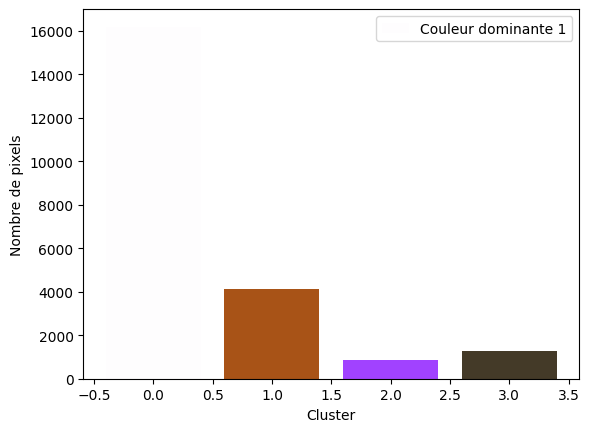

DataFrame pour l'image im-181_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-177_im.png    46,33,20  209,145,27   86,33,255
im-178_im.png  233,137,75   152,92,45    89,92,48
im-179_im.png   222,99,12    66,51,34  203,80,255
im-180_im.png  222,128,53    97,59,26   78,28,255
im-181_im.png   168,83,23    68,58,40  161,66,255

[181 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [47.68725279 38.12035981 46.11283689]
   Code couleur RGB: [0.72269904 0.32589808 0.13503108]
   Nombre de pixels: 5245

Cluster 2:
   Code couleur Lab: [9.91227244e+01 8.29146921e-02 4.56282661e-01]
   Code couleur RGB: [0.99233451 0.98969482 0.98662609]
   Nombre de pixels: 14847

Cluster 3:
   Code couleur Lab: [20.50867435  3.23535415  7.23941442]
   Code couleur RGB: [0.22773572 0.18608725 0.15285447]
   Nombre de pixels: 1963

Cluster 4:
   Code couleur Lab: [ 49.06225698  76.70106854 -79.75177228]
   Code couleur RGB: [0.64333716 0.20682217 1.        ]
   Nombre de pixels: 445



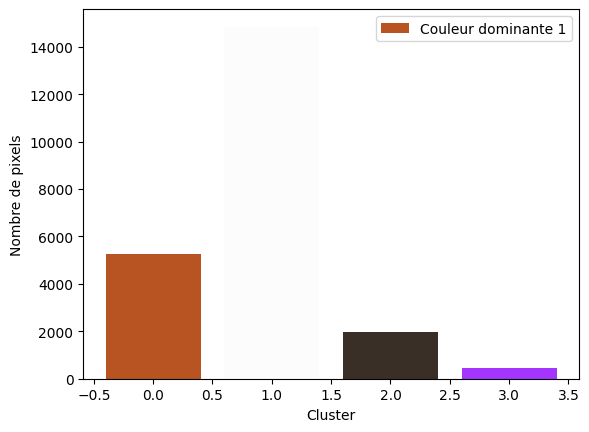

DataFrame pour l'image im-182_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-178_im.png  233,137,75  152,92,45    89,92,48
im-179_im.png   222,99,12   66,51,34  203,80,255
im-180_im.png  222,128,53   97,59,26   78,28,255
im-181_im.png   168,83,23   68,58,40  161,66,255
im-182_im.png   184,83,34   58,47,39  164,53,255

[182 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [53.56513979 13.70796191 48.09222069]
   Code couleur RGB: [0.66736942 0.46075497 0.16173565]
   Nombre de pixels: 7241

Cluster 2:
   Code couleur Lab: [98.28798399  0.33940595  0.21573367]
   Code couleur RGB: [0.98408507 0.97968165 0.97902376]
   Nombre de pixels: 13165

Cluster 3:
   Code couleur Lab: [ 38.71631638  77.62864662 -97.11288466]
   Code couleur RGB: [0.38341077 0.0968893  1.        ]
   Nombre de pixels: 495

Cluster 4:
   Code couleur Lab: [10.29781206  1.75679043  5.17952112]
   Code couleur RGB: [0.12981227 0.10602086 0.08284485]
   Nombre de pixels: 1599



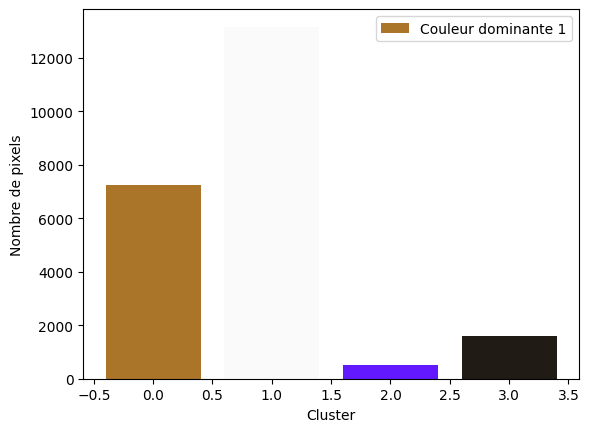

DataFrame pour l'image im-183_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-179_im.png   222,99,12   66,51,34  203,80,255
im-180_im.png  222,128,53   97,59,26   78,28,255
im-181_im.png   168,83,23   68,58,40  161,66,255
im-182_im.png   184,83,34   58,47,39  164,53,255
im-183_im.png  170,117,41   33,27,21   98,25,255

[183 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.64357787 -0.1117668   0.12487822]
   Code couleur RGB: [0.99549201 0.99617906 0.99502232]
   Nombre de pixels: 16200

Cluster 2:
   Code couleur Lab: [34.46573617 42.56225484 40.44453564]
   Code couleur RGB: [0.58390522 0.17326328 0.06266628]
   Nombre de pixels: 4148

Cluster 3:
   Code couleur Lab: [ 39.57305782  79.95388596 -95.58252811]
   Code couleur RGB: [0.43508196 0.06643371 1.        ]
   Nombre de pixels: 932

Cluster 4:
   Code couleur Lab: [11.86183167  7.8735414   7.6535972 ]
   Code couleur RGB: [0.17511575 0.10565101 0.08250941]
   Nombre de pixels: 1220



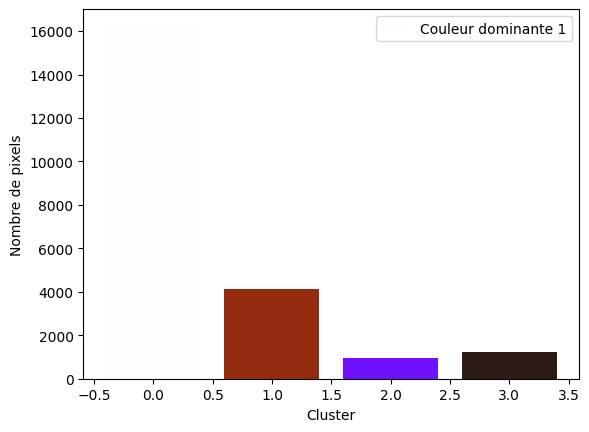

DataFrame pour l'image im-184_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-180_im.png  222,128,53   97,59,26   78,28,255
im-181_im.png   168,83,23   68,58,40  161,66,255
im-182_im.png   184,83,34   58,47,39  164,53,255
im-183_im.png  170,117,41   33,27,21   98,25,255
im-184_im.png   149,44,16   45,27,21  111,17,255

[184 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.01760954 -0.86606562  0.50187047]
   Code couleur RGB: [0.98360811 0.99078364 0.98495636]
   Nombre de pixels: 14244

Cluster 2:
   Code couleur Lab: [19.06164414  3.49791992 11.51785989]
   Code couleur RGB: [0.22290691 0.17266985 0.11657857]
   Nombre de pixels: 3398

Cluster 3:
   Code couleur Lab: [  34.77365142   79.42679077 -103.69137758]
   Code couleur RGB: [0.2489933 0.0166044 1.       ]
   Nombre de pixels: 543

Cluster 4:
   Code couleur Lab: [73.33615735 14.6811584  54.56945657]
   Code couleur RGB: [0.90888405 0.65890738 0.3043388 ]
   Nombre de pixels: 4315



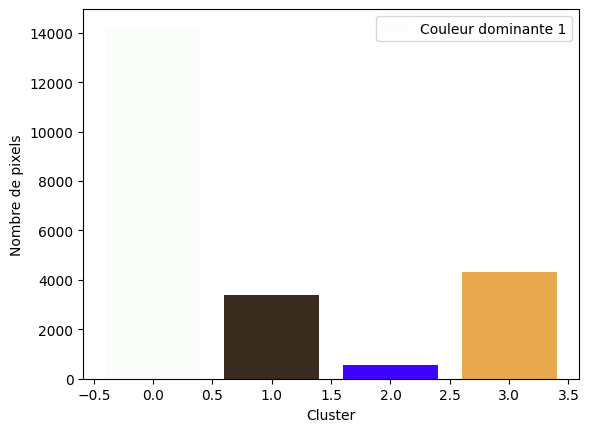

DataFrame pour l'image im-185_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-181_im.png   168,83,23   68,58,40  161,66,255
im-182_im.png   184,83,34   58,47,39  164,53,255
im-183_im.png  170,117,41   33,27,21   98,25,255
im-184_im.png   149,44,16   45,27,21  111,17,255
im-185_im.png  232,168,78   57,44,30    63,4,255

[185 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.68794452 -0.25610851  0.26269394]
   Code couleur RGB: [0.99531635 0.99699216 0.99446067]
   Nombre de pixels: 15860

Cluster 2:
   Code couleur Lab: [12.10737232  3.12132145 11.93030726]
   Code couleur RGB: [0.1613172  0.11664477 0.05624294]
   Nombre de pixels: 2785

Cluster 3:
   Code couleur Lab: [ 39.81296073  74.73698825 -95.36050663]
   Code couleur RGB: [0.38711681 0.14144048 1.        ]
   Nombre de pixels: 1169

Cluster 4:
   Code couleur Lab: [55.37403707 17.55502583 54.40786185]
   Code couleur RGB: [0.71345977 0.46770416 0.12092281]
   Nombre de pixels: 2686



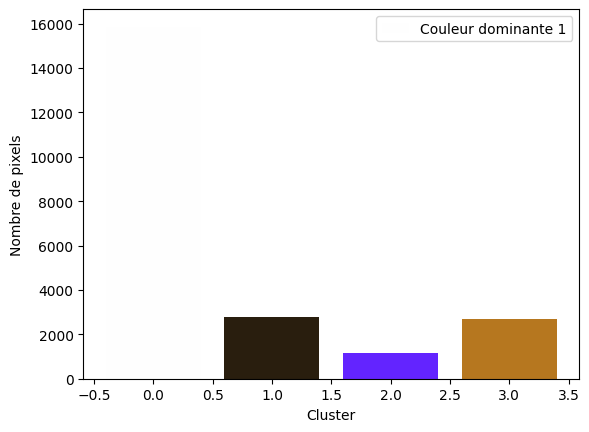

DataFrame pour l'image im-186_im.png:
              ElytraColor   SpotColor SwitchColor
im-001_im.png  203,136,58   133,71,20    46,36,33
im-002_im.png  192,124,51    81,78,76  171,87,255
im-003_im.png   177,83,50    70,55,39    74,1,255
im-004_im.png  181,117,27    55,39,21  119,56,255
im-005_im.png   192,80,47    69,50,33    63,8,255
...                   ...         ...         ...
im-182_im.png   184,83,34    58,47,39  164,53,255
im-183_im.png  170,117,41    33,27,21   98,25,255
im-184_im.png   149,44,16    45,27,21  111,17,255
im-185_im.png  232,168,78    57,44,30    63,4,255
im-186_im.png    41,30,14  182,119,31   99,36,255

[186 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [35.0642162  20.4368057  36.16251079]
   Code couleur RGB: [0.48713835 0.26769107 0.09025537]
   Nombre de pixels: 7429

Cluster 2:
   Code couleur Lab: [9.99875335e+01 2.89777522e-05 3.50966154e-03]
   Code couleur RGB: [0.99987436 0.99985258 0.9998673 ]
   Nombre de pixels: 10898

Cluster 3:
   Code couleur Lab: [14.67701749  1.33139474 10.77180618]
   Code couleur RGB: [0.17261104 0.14080156 0.08600967]
   Nombre de pixels: 2642

Cluster 4:
   Code couleur Lab: [55.80651017  2.72152547 13.42491613]
   Code couleur RGB: [0.57861431 0.51507162 0.4340644 ]
   Nombre de pixels: 1531



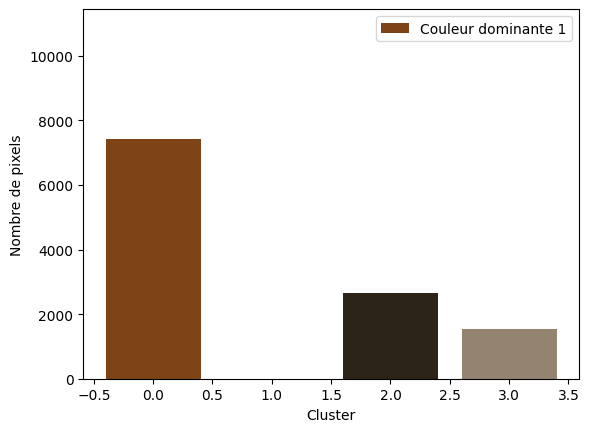

DataFrame pour l'image im-187_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-183_im.png  170,117,41    33,27,21    98,25,255
im-184_im.png   149,44,16    45,27,21   111,17,255
im-185_im.png  232,168,78    57,44,30     63,4,255
im-186_im.png    41,30,14  182,119,31    99,36,255
im-187_im.png   124,68,23    44,36,22  148,131,111

[187 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.86306277e+01 -2.49003077e-02  1.74441140e+00]
   Code couleur RGB: [0.99040337 0.98399662 0.97128405]
   Nombre de pixels: 13032

Cluster 2:
   Code couleur Lab: [54.3827426  37.12206989 57.27446125]
   Code couleur RGB: [0.80450155 0.39528572 0.09308624]
   Nombre de pixels: 5004

Cluster 3:
   Code couleur Lab: [24.89454319 17.11407251 24.55585063]
   Code couleur RGB: [0.35628014 0.18785262 0.08671382]
   Nombre de pixels: 4302

Cluster 4:
   Code couleur Lab: [ 46.3058889   74.23556589 -84.47613314]
   Code couleur RGB: [0.56092771 0.20220241 1.        ]
   Nombre de pixels: 162



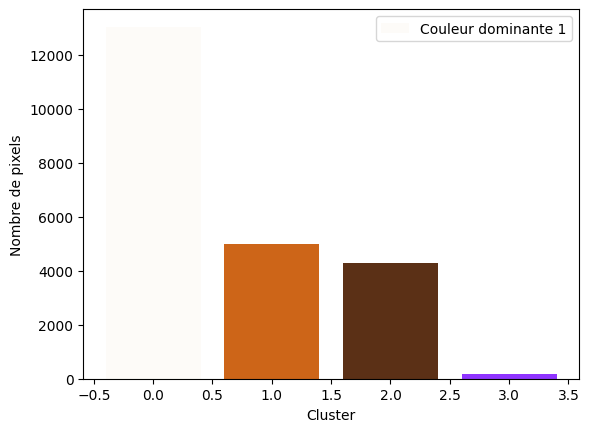

DataFrame pour l'image im-188_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-184_im.png   149,44,16    45,27,21   111,17,255
im-185_im.png  232,168,78    57,44,30     63,4,255
im-186_im.png    41,30,14  182,119,31    99,36,255
im-187_im.png   124,68,23    44,36,22  148,131,111
im-188_im.png  205,101,24    91,48,22   143,52,255

[188 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [17.51093122  4.74166362 12.52132196]
   Code couleur RGB: [0.21644794 0.1571268  0.0987117 ]
   Nombre de pixels: 1441

Cluster 2:
   Code couleur Lab: [ 9.96249392e+01 -2.28939381e-01 -3.04836789e-02]
   Code couleur RGB: [0.99377208 0.99629772 0.99597267]
   Nombre de pixels: 13140

Cluster 3:
   Code couleur Lab: [ 49.46520693  63.88215328 -79.2753205 ]
   Code couleur RGB: [0.55022217 0.29725749 1.        ]
   Nombre de pixels: 1296

Cluster 4:
   Code couleur Lab: [49.21394661 14.89578763 50.63209653]
   Code couleur RGB: [0.62605502 0.41489975 0.09107088]
   Nombre de pixels: 6623



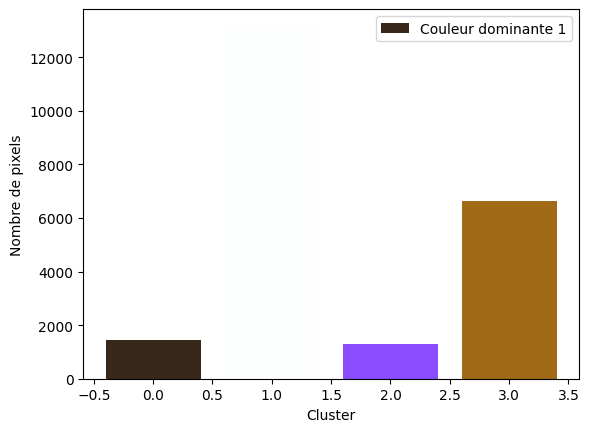

DataFrame pour l'image im-189_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-185_im.png  232,168,78    57,44,30     63,4,255
im-186_im.png    41,30,14  182,119,31    99,36,255
im-187_im.png   124,68,23    44,36,22  148,131,111
im-188_im.png  205,101,24    91,48,22   143,52,255
im-189_im.png  160,106,23    55,40,25   140,76,255

[189 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.95259018e+01 1.55826362e-02 4.65185427e-01]
   Code couleur RGB: [0.99639997 0.99443223 0.99112314]
   Nombre de pixels: 13274

Cluster 2:
   Code couleur Lab: [24.71339656 -4.03160665 21.91331566]
   Code couleur RGB: [0.24805018 0.23371271 0.09663102]
   Nombre de pixels: 4278

Cluster 3:
   Code couleur Lab: [  35.40895155   74.09687116 -102.63289313]
   Code couleur RGB: [0.18423671 0.11403805 1.        ]
   Nombre de pixels: 508

Cluster 4:
   Code couleur Lab: [54.4871574  21.22353926 47.19060333]
   Code couleur RGB: [0.71759275 0.44935503 0.1823519 ]
   Nombre de pixels: 4440



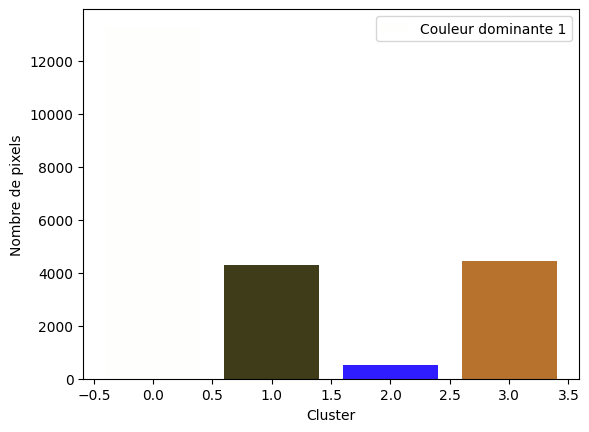

DataFrame pour l'image im-190_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-186_im.png    41,30,14  182,119,31    99,36,255
im-187_im.png   124,68,23    44,36,22  148,131,111
im-188_im.png  205,101,24    91,48,22   143,52,255
im-189_im.png  160,106,23    55,40,25   140,76,255
im-190_im.png  183,115,46    63,60,25    47,29,255

[190 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [98.27944428  0.19244998  1.17610189]
   Code couleur RGB: [0.98618438 0.97965771 0.97164385]
   Nombre de pixels: 13364

Cluster 2:
   Code couleur Lab: [23.38906715  2.59125393  5.44488186]
   Code couleur RGB: [0.24646192 0.21234357 0.1872011 ]
   Nombre de pixels: 4110

Cluster 3:
   Code couleur Lab: [67.71504399 22.54996425 61.20548289]
   Code couleur RGB: [0.89206663 0.57762102 0.18914878]
   Nombre de pixels: 4771

Cluster 4:
   Code couleur Lab: [ 66.70710928  57.7552452  -51.06968371]
   Code couleur RGB: [0.8551445  0.48129542 1.        ]
   Nombre de pixels: 255



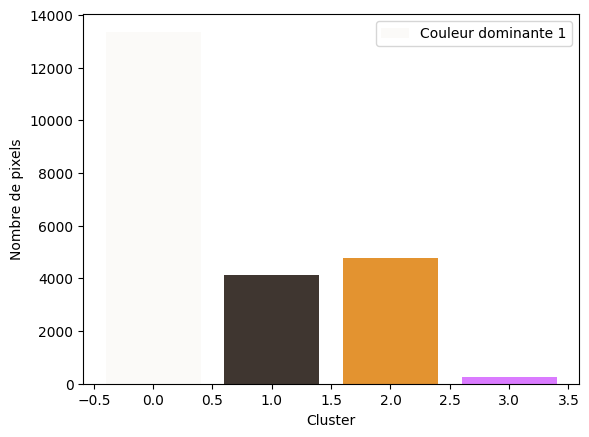

DataFrame pour l'image im-191_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-187_im.png   124,68,23   44,36,22  148,131,111
im-188_im.png  205,101,24   91,48,22   143,52,255
im-189_im.png  160,106,23   55,40,25   140,76,255
im-190_im.png  183,115,46   63,60,25    47,29,255
im-191_im.png  227,147,48   63,54,48  218,123,255

[191 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 9.95629143e+01 -6.11651690e-02  1.03930134e-01]
   Code couleur RGB: [0.99491168 0.99514625 0.99427213]
   Nombre de pixels: 15904

Cluster 2:
   Code couleur Lab: [50.22687484 51.54732489 49.17982782]
   Code couleur RGB: [0.82007328 0.29039231 0.14168743]
   Nombre de pixels: 3001

Cluster 3:
   Code couleur Lab: [68.32128642 25.05068686 14.57366911]
   Code couleur RGB: [0.85570157 0.58475859 0.55500268]
   Nombre de pixels: 2149

Cluster 4:
   Code couleur Lab: [17.61990524  9.39700719  1.24255088]
   Code couleur RGB: [0.22300512 0.15007383 0.16350327]
   Nombre de pixels: 1446



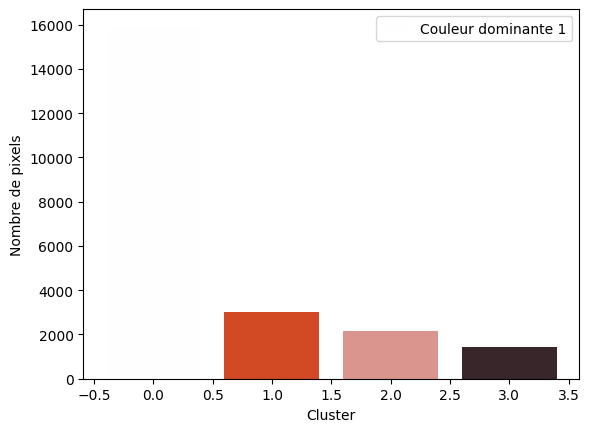

DataFrame pour l'image im-192_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-188_im.png  205,101,24     91,48,22   143,52,255
im-189_im.png  160,106,23     55,40,25   140,76,255
im-190_im.png  183,115,46     63,60,25    47,29,255
im-191_im.png  227,147,48     63,54,48  218,123,255
im-192_im.png   209,74,36  218,149,142     57,38,42

[192 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [38.33243426 27.92769643 37.16399161]
   Code couleur RGB: [0.55972968 0.27409291 0.11565322]
   Nombre de pixels: 7296

Cluster 2:
   Code couleur Lab: [98.62112556 -0.20982081  0.41899278]
   Code couleur RGB: [0.98414416 0.98472669 0.98118247]
   Nombre de pixels: 12423

Cluster 3:
   Code couleur Lab: [ 41.57947613  76.15754801 -92.24220146]
   Code couleur RGB: [0.45666616 0.14142085 1.        ]
   Nombre de pixels: 796

Cluster 4:
   Code couleur Lab: [11.42578982  0.71233401  5.8750487 ]
   Code couleur RGB: [0.13487335 0.11661862 0.08781097]
   Nombre de pixels: 1985



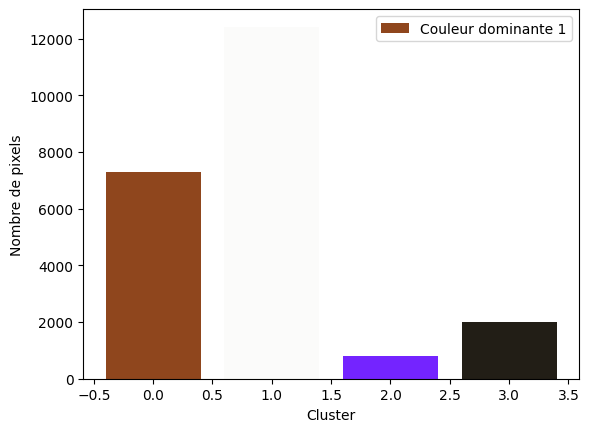

DataFrame pour l'image im-193_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-189_im.png  160,106,23     55,40,25   140,76,255
im-190_im.png  183,115,46     63,60,25    47,29,255
im-191_im.png  227,147,48     63,54,48  218,123,255
im-192_im.png   209,74,36  218,149,142     57,38,42
im-193_im.png   143,70,29     34,30,22   116,36,255

[193 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [50.5804926   8.51874467 47.0786529 ]
   Code couleur RGB: [0.60471801 0.44461488 0.13825677]
   Nombre de pixels: 6378

Cluster 2:
   Code couleur Lab: [ 9.83814656e+01  1.66361068e-01 -4.89235192e-02]
   Code couleur RGB: [0.98280674 0.98123885 0.98206006]
   Nombre de pixels: 13521

Cluster 3:
   Code couleur Lab: [18.01377543 -4.92210694  4.02328913]
   Code couleur RGB: [0.15289581 0.18014932 0.14957908]
   Nombre de pixels: 2293

Cluster 4:
   Code couleur Lab: [ 39.50359896  77.77222785 -95.77644872]
   Code couleur RGB: [0.41043587 0.10246336 1.        ]
   Nombre de pixels: 308



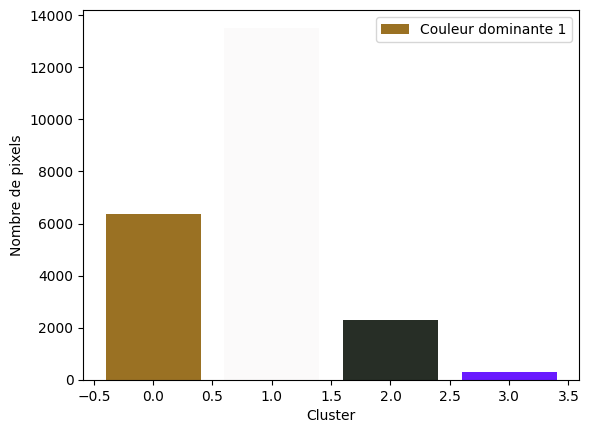

DataFrame pour l'image im-194_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-190_im.png  183,115,46     63,60,25    47,29,255
im-191_im.png  227,147,48     63,54,48  218,123,255
im-192_im.png   209,74,36  218,149,142     57,38,42
im-193_im.png   143,70,29     34,30,22   116,36,255
im-194_im.png  154,113,35     39,46,38   105,26,255

[194 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 46.27851767  77.13501138 -84.4738011 ]
   Code couleur RGB: [0.5837185 0.1759356 1.       ]
   Nombre de pixels: 906

Cluster 2:
   Code couleur Lab: [ 9.98799990e+01 -1.69481301e-02  2.00768686e-01]
   Code couleur RGB: [0.99921905 0.99861271 0.99714562]
   Nombre de pixels: 15146

Cluster 3:
   Code couleur Lab: [50.54020307 47.19814564 57.86143161]
   Code couleur RGB: [0.80687357 0.31426075 0.04748131]
   Nombre de pixels: 4770

Cluster 4:
   Code couleur Lab: [18.72537921 13.3238849  20.72995033]
   Code couleur RGB: [0.27496468 0.14619008 0.06003975]
   Nombre de pixels: 1678



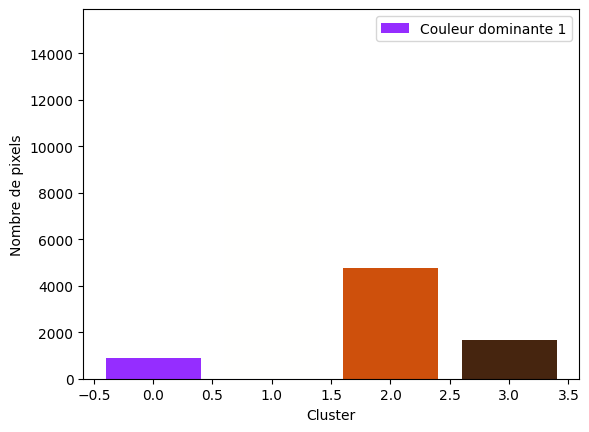

DataFrame pour l'image im-195_im.png:
              ElytraColor    SpotColor  SwitchColor
im-001_im.png  203,136,58    133,71,20     46,36,33
im-002_im.png  192,124,51     81,78,76   171,87,255
im-003_im.png   177,83,50     70,55,39     74,1,255
im-004_im.png  181,117,27     55,39,21   119,56,255
im-005_im.png   192,80,47     69,50,33     63,8,255
...                   ...          ...          ...
im-191_im.png  227,147,48     63,54,48  218,123,255
im-192_im.png   209,74,36  218,149,142     57,38,42
im-193_im.png   143,70,29     34,30,22   116,36,255
im-194_im.png  154,113,35     39,46,38   105,26,255
im-195_im.png   206,80,12     70,37,15   149,45,255

[195 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [42.65180194 35.12265751 45.9074671 ]
   Code couleur RGB: [0.64845451 0.28816925 0.08574558]
   Nombre de pixels: 3249

Cluster 2:
   Code couleur Lab: [99.71821413 -0.2188316   0.29179001]
   Code couleur RGB: [0.99606682 0.99723707 0.99458892]
   Nombre de pixels: 16296

Cluster 3:
   Code couleur Lab: [ 37.89968525  75.57746588 -98.43081677]
   Code couleur RGB: [0.33106203 0.11605106 1.        ]
   Nombre de pixels: 1172

Cluster 4:
   Code couleur Lab: [16.74707446  9.99375526 18.80273949]
   Code couleur RGB: [0.24005474 0.13841105 0.05410456]
   Nombre de pixels: 1783



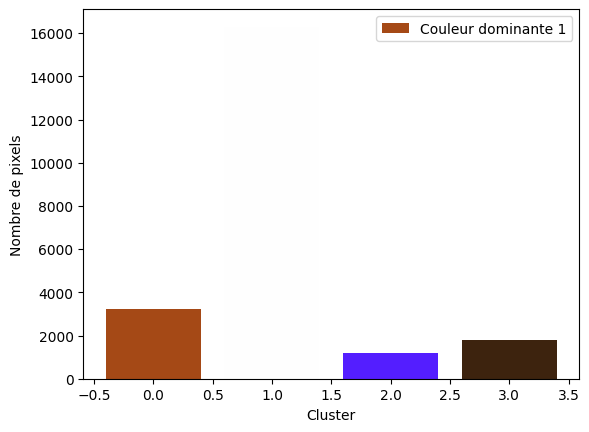

DataFrame pour l'image im-196_im.png:
              ElytraColor    SpotColor SwitchColor
im-001_im.png  203,136,58    133,71,20    46,36,33
im-002_im.png  192,124,51     81,78,76  171,87,255
im-003_im.png   177,83,50     70,55,39    74,1,255
im-004_im.png  181,117,27     55,39,21  119,56,255
im-005_im.png   192,80,47     69,50,33    63,8,255
...                   ...          ...         ...
im-192_im.png   209,74,36  218,149,142    57,38,42
im-193_im.png   143,70,29     34,30,22  116,36,255
im-194_im.png  154,113,35     39,46,38  105,26,255
im-195_im.png   206,80,12     70,37,15  149,45,255
im-196_im.png   165,73,22     61,35,14   84,30,255

[196 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [99.31978336 -0.34251169  0.74691307]
   Code couleur RGB: [0.99215892 0.99287658 0.98659864]
   Nombre de pixels: 16069

Cluster 2:
   Code couleur Lab: [ 8.08452579 -0.03987774  6.54715728]
   Code couleur RGB: [0.10734519 0.09160856 0.05191623]
   Nombre de pixels: 4209

Cluster 3:
   Code couleur Lab: [  35.41031304   78.66384536 -102.6243837 ]
   Code couleur RGB: [0.26816176 0.04346221 1.        ]
   Nombre de pixels: 994

Cluster 4:
   Code couleur Lab: [43.97485063 56.4150216  52.9413232 ]
   Code couleur RGB: [0.76640313 0.1890947  0.0450923 ]
   Nombre de pixels: 1228



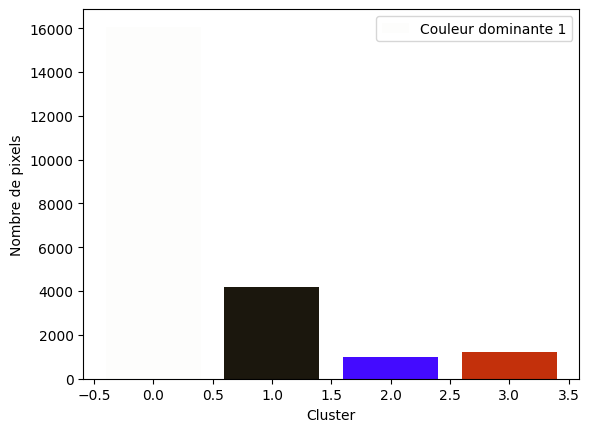

DataFrame pour l'image im-197_im.png:
              ElytraColor  SpotColor SwitchColor
im-001_im.png  203,136,58  133,71,20    46,36,33
im-002_im.png  192,124,51   81,78,76  171,87,255
im-003_im.png   177,83,50   70,55,39    74,1,255
im-004_im.png  181,117,27   55,39,21  119,56,255
im-005_im.png   192,80,47   69,50,33    63,8,255
...                   ...        ...         ...
im-193_im.png   143,70,29   34,30,22  116,36,255
im-194_im.png  154,113,35   39,46,38  105,26,255
im-195_im.png   206,80,12   70,37,15  149,45,255
im-196_im.png   165,73,22   61,35,14   84,30,255
im-197_im.png    27,23,13  195,48,11   68,11,255

[197 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [9.96127564e+01 2.75430586e-02 1.58809453e-01]
   Code couleur RGB: [0.99639336 0.9954807  0.99443435]
   Nombre de pixels: 14231

Cluster 2:
   Code couleur Lab: [58.52507354  8.17899415  5.1284983 ]
   Code couleur RGB: [0.62272818 0.53178905 0.51810327]
   Nombre de pixels: 851

Cluster 3:
   Code couleur Lab: [13.30783986  8.73135366  3.18597695]
   Code couleur RGB: [0.18530662 0.11606642 0.11787053]
   Nombre de pixels: 2411

Cluster 4:
   Code couleur Lab: [38.14333153 42.82101631 39.23084117]
   Code couleur RGB: [0.6279037  0.21020776 0.10599013]
   Nombre de pixels: 5007



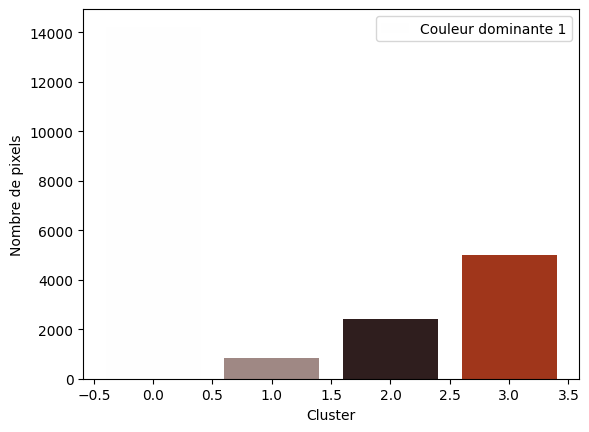

DataFrame pour l'image im-198_im.png:
              ElytraColor  SpotColor  SwitchColor
im-001_im.png  203,136,58  133,71,20     46,36,33
im-002_im.png  192,124,51   81,78,76   171,87,255
im-003_im.png   177,83,50   70,55,39     74,1,255
im-004_im.png  181,117,27   55,39,21   119,56,255
im-005_im.png   192,80,47   69,50,33     63,8,255
...                   ...        ...          ...
im-194_im.png  154,113,35   39,46,38   105,26,255
im-195_im.png   206,80,12   70,37,15   149,45,255
im-196_im.png   165,73,22   61,35,14    84,30,255
im-197_im.png    27,23,13  195,48,11    68,11,255
im-198_im.png   160,54,27   47,30,30  159,136,132

[198 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [ 50.54516837  19.60829141 -48.01007038]
   Code couleur RGB: [0.39062137 0.44480321 0.79412981]
   Nombre de pixels: 880

Cluster 2:
   Code couleur Lab: [ 8.37222533 -0.93303294  0.11931282]
   Code couleur RGB: [0.09016252 0.09655804 0.09437578]
   Nombre de pixels: 6637

Cluster 3:
   Code couleur Lab: [70.40105939 14.1139225  45.41385665]
   Code couleur RGB: [0.86100319 0.630938   0.34905172]
   Nombre de pixels: 2581

Cluster 4:
   Code couleur Lab: [97.99433303  0.33046766  0.56915024]
   Code couleur RGB: [0.98193336 0.97627429 0.97302761]
   Nombre de pixels: 12402



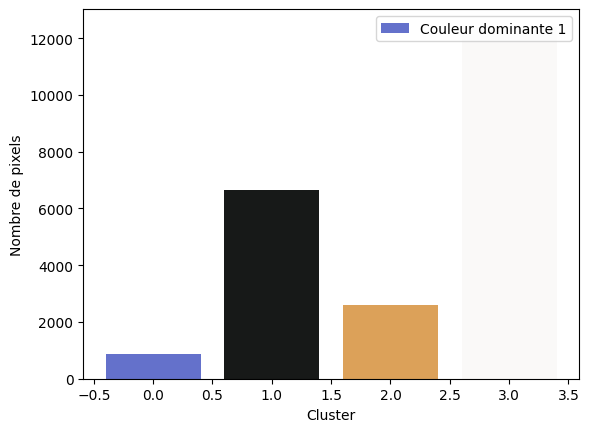

DataFrame pour l'image im-199_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-195_im.png   206,80,12    70,37,15   149,45,255
im-196_im.png   165,73,22    61,35,14    84,30,255
im-197_im.png    27,23,13   195,48,11    68,11,255
im-198_im.png   160,54,27    47,30,30  159,136,132
im-199_im.png    23,25,24  220,161,89  100,113,203

[199 rows x 3 columns]
--------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
   Code couleur Lab: [21.49422617 16.74931138 21.89648459]
   Code couleur RGB: [0.31825276 0.15996791 0.07648174]
   Nombre de pixels: 4017

Cluster 2:
   Code couleur Lab: [ 9.95039269e+01 -1.67553380e-02  5.34159184e-01]
   Code couleur RGB: [0.99613332 0.99424073 0.9903462 ]
   Nombre de pixels: 12707

Cluster 3:
   Code couleur Lab: [48.98305952 48.97625591 56.77322004]
   Code couleur RGB: [0.79558556 0.28945092 0.04497691]
   Nombre de pixels: 4656

Cluster 4:
   Code couleur Lab: [ 47.43304855  78.42007679 -82.53183165]
   Code couleur RGB: [0.61993652 0.17461336 1.        ]
   Nombre de pixels: 1120



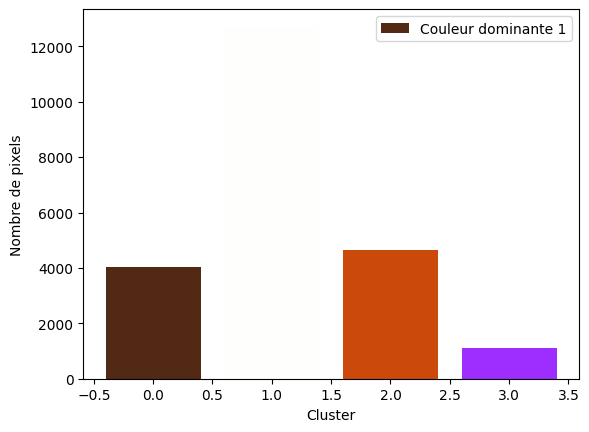

DataFrame pour l'image im-200_im.png:
              ElytraColor   SpotColor  SwitchColor
im-001_im.png  203,136,58   133,71,20     46,36,33
im-002_im.png  192,124,51    81,78,76   171,87,255
im-003_im.png   177,83,50    70,55,39     74,1,255
im-004_im.png  181,117,27    55,39,21   119,56,255
im-005_im.png   192,80,47    69,50,33     63,8,255
...                   ...         ...          ...
im-196_im.png   165,73,22    61,35,14    84,30,255
im-197_im.png    27,23,13   195,48,11    68,11,255
im-198_im.png   160,54,27    47,30,30  159,136,132
im-199_im.png    23,25,24  220,161,89  100,113,203
im-200_im.png   203,74,11    81,41,20   158,45,255

[200 rows x 3 columns]
--------------------------------------


In [ ]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

def plot_color_histogram(image, image_id, df):
    lab_image = color.rgb2lab(image)
    resized_image = lab_image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(resized_image)

    labels = kmeans.labels_
    counts = np.bincount(labels)

    cluster_colors_lab = kmeans.cluster_centers_
    cluster_colors_rgb = [color.lab2rgb([[clr]])[0][0] for clr in cluster_colors_lab]

    sorted_indices = np.argsort(counts)[::-1]

    elytra_color = cluster_colors_rgb[sorted_indices[1]]
    spot_color = cluster_colors_rgb[sorted_indices[2]]
    switch_color = cluster_colors_rgb[sorted_indices[3]]

    # Multiply the values by 255 and convert to string representation
    elytra_color_str = ",".join([str(int(round(val * 255))) for val in elytra_color])
    spot_color_str = ",".join([str(int(round(val * 255))) for val in spot_color])
    switch_color_str = ",".join([str(int(round(val * 255))) for val in switch_color])

    df.loc[image_id, 'ElytraColor'] = elytra_color_str
    df.loc[image_id, 'SpotColor'] = spot_color_str
    df.loc[image_id, 'SwitchColor'] = switch_color_str
    #df['Image_id'] = image_id

    for i, clr in enumerate(cluster_colors_rgb):
        print(f"Cluster {i+1}:")
        print(f"   Code couleur Lab: {cluster_colors_lab[i]}")
        print(f"   Code couleur RGB: {clr}")
        print(f"   Nombre de pixels: {counts[i]}")
        print()

    fig, ax = plt.subplots()
    ax.bar(range(len(counts)), counts, color=cluster_colors_rgb)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Nombre de pixels')
    legend_labels = [f'Couleur dominante {i+1}' for i in range(len(cluster_colors_rgb))]
    ax.legend(legend_labels, loc='upper right')
    plt.show()

    return df

df_colors = pd.DataFrame(columns=['ElytraColor', 'SpotColor', 'SwitchColor'])

for k in range(1, 201):
    try:
        image = io.imread(f'No_Background_Image/im-{k:03}_im.png')
        image_id = f'im-{k:03}_im.png'
        df_colors = plot_color_histogram(image, image_id, df_colors)
        print(f"DataFrame pour l'image {image_id}:")
        print(df_colors)
        print("--------------------------------------")
    except FileNotFoundError:
        print(f"Erreur : Fichier im-{k:03}_im.png non trouvé.")


On vérifie la cohérence des résultats en observant le dataframe obtenue

In [ ]:
df_colors.tail(10)

ElytraColor    SpotColor  SwitchColor
im-191_im.png  227,147,48     63,54,48  218,123,255
im-192_im.png   209,74,36  218,149,142     57,38,42
im-193_im.png   143,70,29     34,30,22   116,36,255
im-194_im.png  154,113,35     39,46,38   105,26,255
im-195_im.png   206,80,12     70,37,15   149,45,255
im-196_im.png   165,73,22     61,35,14    84,30,255
im-197_im.png    27,23,13    195,48,11    68,11,255
im-198_im.png   160,54,27     47,30,30  159,136,132
im-199_im.png    23,25,24   220,161,89  100,113,203
im-200_im.png   203,74,11     81,41,20   158,45,255

On convertit nos triplets sous forme de liste

In [ ]:
df_colors['SpotColor'] = df_colors['SpotColor'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])
df_colors['ElytraColor'] = df_colors['ElytraColor'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])
df_colors['SwitchColor'] = df_colors['SwitchColor'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])
df_colors.head(10)

ElytraColor       SpotColor     SwitchColor
im-001_im.png  [203, 136, 58]   [133, 71, 20]    [46, 36, 33]
im-002_im.png  [192, 124, 51]    [81, 78, 76]  [171, 87, 255]
im-003_im.png   [177, 83, 50]    [70, 55, 39]    [74, 1, 255]
im-004_im.png  [181, 117, 27]    [55, 39, 21]  [119, 56, 255]
im-005_im.png   [192, 80, 47]    [69, 50, 33]    [63, 8, 255]
im-006_im.png  [150, 100, 23]    [38, 37, 19]  [108, 61, 255]
im-007_im.png  [221, 113, 50]   [106, 94, 67]  [198, 73, 255]
im-008_im.png    [25, 21, 14]  [205, 109, 19]   [81, 19, 255]
im-009_im.png  [197, 138, 51]    [71, 57, 31]   [81, 33, 255]
im-010_im.png  [225, 165, 86]   [127, 95, 80]  [100, 41, 255]

On définit une échelle de couleur qui servira à identifier les couleurs en se basant sur le code couleur obtenu

In [ ]:
base_colors = {
    #'orange': [71.27, 27.58, 77.7],
    #'yellow': [97.14, -21.57, 94.48],
    'black': [0, 0 ,0],
    'red': [220, 5, 5]
}

On définit une fonction qui évalue la distance entre ces échelles avec le code couleur de chaque couleur

In [ ]:
def get_color(rgb):
    closest_color = None
    min_distance = float('inf')

    for color, values in base_colors.items():
        distance = sum([(a - b) ** 2 for a, b in zip(rgb, values)]) ** 0.5
        if distance < min_distance:
            min_distance = distance
            closest_color = color

    return closest_color


On applique la fonction sur notre dataframe df_colors sur nos 3 colonnes

In [ ]:
df_colors['ElytraColorName'] = df_colors['ElytraColor'].apply(get_color)
df_colors['SpotColorName'] = df_colors['SpotColor'].apply(get_color)#car non fonctionnel avec Spot
df_colors['SwitchColorName'] = df_colors['SwitchColor'].apply(get_color) 
df_colors.head(10)

ElytraColor       SpotColor     SwitchColor ElytraColorName  \
im-001_im.png  [203, 136, 58]   [133, 71, 20]    [46, 36, 33]             red   
im-002_im.png  [192, 124, 51]    [81, 78, 76]  [171, 87, 255]             red   
im-003_im.png   [177, 83, 50]    [70, 55, 39]    [74, 1, 255]             red   
im-004_im.png  [181, 117, 27]    [55, 39, 21]  [119, 56, 255]             red   
im-005_im.png   [192, 80, 47]    [69, 50, 33]    [63, 8, 255]             red   
im-006_im.png  [150, 100, 23]    [38, 37, 19]  [108, 61, 255]             red   
im-007_im.png  [221, 113, 50]   [106, 94, 67]  [198, 73, 255]             red   
im-008_im.png    [25, 21, 14]  [205, 109, 19]   [81, 19, 255]           black   
im-009_im.png  [197, 138, 51]    [71, 57, 31]   [81, 33, 255]             red   
im-010_im.png  [225, 165, 86]   [127, 95, 80]  [100, 41, 255]             red   

              SpotColorName SwitchColorName  
im-001_im.png           red           black  
im-002_im.png         black             red  
im-003_im.png         black           black  
im-004_im.png         black             red  
im-005_im.png         black           black  
im-006_im.png         black             red  
im-007_im.png         black             red  
im-008_im.png           red           black  
im-009_im.png         black           black  
im-010_im.png           red           black

On remarque pour certaine image, on obtient 2 fois les mêmes couleurs, ce qui est dû à une imprécision de la détection. On décide de faire appel à la colonne "SwitchColorName" qui stocke la dernière couleur dominante. Cela est appliquée sur les SpotColorName car les points sont si petits / minimes, qu'ils risquent d'être absorbés par la couleur totale

In [ ]:
df_colors.loc[df_colors["ElytraColorName"] == df_colors["SpotColorName"], "SpotColorName"] = df_colors["SwitchColorName"]
df_colors

ElytraColor       SpotColor      SwitchColor  \
im-001_im.png  [203, 136, 58]   [133, 71, 20]     [46, 36, 33]   
im-002_im.png  [192, 124, 51]    [81, 78, 76]   [171, 87, 255]   
im-003_im.png   [177, 83, 50]    [70, 55, 39]     [74, 1, 255]   
im-004_im.png  [181, 117, 27]    [55, 39, 21]   [119, 56, 255]   
im-005_im.png   [192, 80, 47]    [69, 50, 33]     [63, 8, 255]   
...                       ...             ...              ...   
im-196_im.png   [165, 73, 22]    [61, 35, 14]    [84, 30, 255]   
im-197_im.png    [27, 23, 13]   [195, 48, 11]    [68, 11, 255]   
im-198_im.png   [160, 54, 27]    [47, 30, 30]  [159, 136, 132]   
im-199_im.png    [23, 25, 24]  [220, 161, 89]  [100, 113, 203]   
im-200_im.png   [203, 74, 11]    [81, 41, 20]   [158, 45, 255]   

              ElytraColorName SpotColorName SwitchColorName  
im-001_im.png             red         black           black  
im-002_im.png             red         black             red  
im-003_im.png             red         black           black  
im-004_im.png             red         black             red  
im-005_im.png             red         black           black  
...                       ...           ...             ...  
im-196_im.png             red         black           black  
im-197_im.png           black           red           black  
im-198_im.png             red         black             red  
im-199_im.png           black           red           black  
im-200_im.png             red         black             red  

[200 rows x 6 columns]

On fait appel à notre index Image_id

In [ ]:
df_colors.reset_index().rename(columns={'index': 'Image_id'}).style


On récupère notre DataFrame

In [ ]:
df_elytra_color = df_colors.reset_index().rename(columns={'index': 'Image_id'}).style
df_original = df_elytra_color.data  # Convert Styler object back to DataFrame
df_original.head(15)

Image_id     ElytraColor       SpotColor     SwitchColor  \
0   im-001_im.png  [203, 136, 58]   [133, 71, 20]    [46, 36, 33]   
1   im-002_im.png  [192, 124, 51]    [81, 78, 76]  [171, 87, 255]   
2   im-003_im.png   [177, 83, 50]    [70, 55, 39]    [74, 1, 255]   
3   im-004_im.png  [181, 117, 27]    [55, 39, 21]  [119, 56, 255]   
4   im-005_im.png   [192, 80, 47]    [69, 50, 33]    [63, 8, 255]   
5   im-006_im.png  [150, 100, 23]    [38, 37, 19]  [108, 61, 255]   
6   im-007_im.png  [221, 113, 50]   [106, 94, 67]  [198, 73, 255]   
7   im-008_im.png    [25, 21, 14]  [205, 109, 19]   [81, 19, 255]   
8   im-009_im.png  [197, 138, 51]    [71, 57, 31]   [81, 33, 255]   
9   im-010_im.png  [225, 165, 86]   [127, 95, 80]  [100, 41, 255]   
10  im-011_im.png   [178, 68, 30]    [67, 59, 65]   [90, 14, 255]   
11  im-012_im.png   [218, 96, 21]    [66, 43, 17]  [100, 30, 255]   
12  im-013_im.png   [161, 64, 37]    [74, 57, 45]    [57, 5, 255]   
13  im-014_im.png   [208, 82, 14]    [46, 24, 14]  [149, 42, 255]   
14  im-015_im.png   [101, 59, 25]  [186, 123, 77]    [75, 65, 78]   

   ElytraColorName SpotColorName SwitchColorName  
0              red         black           black  
1              red         black             red  
2              red         black           black  
3              red         black             red  
4              red         black           black  
5              red         black             red  
6              red         black             red  
7            black           red           black  
8              red         black           black  
9              red         black           black  
10             red         black           black  
11             red         black           black  
12             red         black           black  
13             red         black             red  
14           black           red           black

In [ ]:
df_original.to_csv('ElytraSpotColor.csv', index=False)


Facultatif : Test affichage des zones d'intérêts

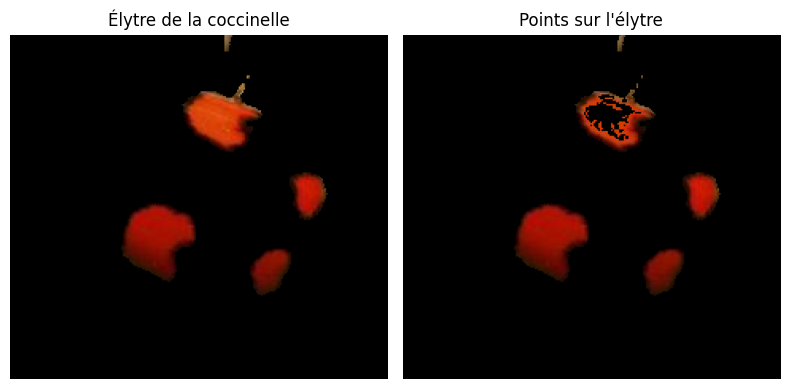

In [ ]:
from skimage import io, color, filters
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image de la coccinelle
image_path = "/content/im-122_im.png"
image = io.imread(image_path)

# Convertir l'image en espace colorimétrique Lab
image_lab = color.rgb2lab(image)

# Extraire les canaux de couleur Lab
canal_L = image_lab[:, :, 0]
canal_a = image_lab[:, :, 1]
canal_b = image_lab[:, :, 2]

# Seuillage pour détecter la couleur de l'élytre
seuil_a = 5  # Seuil pour le canal a
seuil_b = 5  # Seuil pour le canal b

mask_elytre = np.logical_and(canal_a > seuil_a, canal_b > seuil_b)

# Appliquer le masque sur l'image originale pour supprimer le fond
elytre_color = np.zeros_like(image)
elytre_color[mask_elytre] = image[mask_elytre]

# Détection des points sur l'élytre
points_color = np.zeros_like(image)
points_color[np.logical_and(mask_elytre, canal_L < 50)] = image[np.logical_and(mask_elytre, canal_L < 50)]

# Afficher l'image avec uniquement la couleur de l'élytre
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(elytre_color)
plt.title("Élytre de la coccinelle")
plt.axis("off")

# Afficher les points sur l'élytre
plt.subplot(1, 2, 2)
plt.imshow(points_color)
plt.title("Points sur l'élytre")
plt.axis("off")

plt.tight_layout()
plt.show()

## **3. Data Exploration**

Construire un Dataframe avec notamment comme colonnes : "*Image_ID", "SpotCounting", "ElytraColor", "SpotColor*"


Data exploration (corrélation entre les features, Data visualisation)

In [ ]:
df_counting = pd.read_csv("df_counting.csv")
df_counting["Image_id"] = df_counting["Image_id"] + "_im.png"

df_counting

Image_id  Image_counting  Moyenne_indice_circularité
0    im-001_im.png               6                    0.718970
1    im-002_im.png               7                    0.621802
2    im-003_im.png              16                    0.716256
3    im-004_im.png              14                    0.775853
4    im-005_im.png              18                    0.728480
..             ...             ...                         ...
195  im-196_im.png               7                    0.733538
196  im-197_im.png               5                    0.621892
197  im-198_im.png               4                    0.661671
198  im-199_im.png               8                    0.600283
199  im-200_im.png               7                    0.722524

[200 rows x 3 columns]

On fait une jointure sur la colonne "Image_id" 

In [ ]:
merged_df = df_original.merge(df_counting, on="Image_id")
merged_df = merged_df.drop("SwitchColorName", axis=1)

merged_df

Image_id     ElytraColor       SpotColor      SwitchColor  \
0    im-001_im.png  [203, 136, 58]   [133, 71, 20]     [46, 36, 33]   
1    im-002_im.png  [192, 124, 51]    [81, 78, 76]   [171, 87, 255]   
2    im-003_im.png   [177, 83, 50]    [70, 55, 39]     [74, 1, 255]   
3    im-004_im.png  [181, 117, 27]    [55, 39, 21]   [119, 56, 255]   
4    im-005_im.png   [192, 80, 47]    [69, 50, 33]     [63, 8, 255]   
..             ...             ...             ...              ...   
195  im-196_im.png   [165, 73, 22]    [61, 35, 14]    [84, 30, 255]   
196  im-197_im.png    [27, 23, 13]   [195, 48, 11]    [68, 11, 255]   
197  im-198_im.png   [160, 54, 27]    [47, 30, 30]  [159, 136, 132]   
198  im-199_im.png    [23, 25, 24]  [220, 161, 89]  [100, 113, 203]   
199  im-200_im.png   [203, 74, 11]    [81, 41, 20]   [158, 45, 255]   

    ElytraColorName SpotColorName  Image_counting  Moyenne_indice_circularité  
0               red         black               6                    0.718970  
1               red         black               7                    0.621802  
2               red         black              16                    0.716256  
3               red         black              14                    0.775853  
4               red         black              18                    0.728480  
..              ...           ...             ...                         ...  
195             red         black               7                    0.733538  
196           black           red               5                    0.621892  
197             red         black               4                    0.661671  
198           black           red               8                    0.600283  
199             red         black               7                    0.722524  

[200 rows x 8 columns]

In [ ]:
merged_df.to_csv('final_merged_df.csv', index=False)
merged_df

Image_id     ElytraColor       SpotColor      SwitchColor  \
0    im-001_im.png  [203, 136, 58]   [133, 71, 20]     [46, 36, 33]   
1    im-002_im.png  [192, 124, 51]    [81, 78, 76]   [171, 87, 255]   
2    im-003_im.png   [177, 83, 50]    [70, 55, 39]     [74, 1, 255]   
3    im-004_im.png  [181, 117, 27]    [55, 39, 21]   [119, 56, 255]   
4    im-005_im.png   [192, 80, 47]    [69, 50, 33]     [63, 8, 255]   
..             ...             ...             ...              ...   
195  im-196_im.png   [165, 73, 22]    [61, 35, 14]    [84, 30, 255]   
196  im-197_im.png    [27, 23, 13]   [195, 48, 11]    [68, 11, 255]   
197  im-198_im.png   [160, 54, 27]    [47, 30, 30]  [159, 136, 132]   
198  im-199_im.png    [23, 25, 24]  [220, 161, 89]  [100, 113, 203]   
199  im-200_im.png   [203, 74, 11]    [81, 41, 20]   [158, 45, 255]   

    ElytraColorName SpotColorName  Image_counting  Moyenne_indice_circularité  
0               red         black               6                    0.718970  
1               red         black               7                    0.621802  
2               red         black              16                    0.716256  
3               red         black              14                    0.775853  
4               red         black              18                    0.728480  
..              ...           ...             ...                         ...  
195             red         black               7                    0.733538  
196           black           red               5                    0.621892  
197             red         black               4                    0.661671  
198           black           red               8                    0.600283  
199             red         black               7                    0.722524  

[200 rows x 8 columns]

In [ ]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("final_merged_df.csv")


def color_Float(ColorName):
    if ColorName == "red" :
        return 1 # catégorie de 
    elif (ColorName == "black"):
        return 0
    else:
        return ""
 

df['ElytraColorFloat'] = df['ElytraColorName'].apply(color_Float)
df['SpotColorFloat'] = df['SpotColorName'].apply(color_Float)


df.to_csv('final_merged_df_binarized.csv', index=False)
df

Image_id     ElytraColor       SpotColor      SwitchColor  \
0    im-001_im.png  [202, 135, 58]   [133, 71, 20]     [46, 35, 33]   
1    im-002_im.png  [192, 124, 51]    [81, 78, 76]   [171, 87, 255]   
2    im-003_im.png   [177, 83, 50]    [70, 55, 39]     [74, 1, 255]   
3    im-004_im.png  [181, 117, 27]    [55, 39, 21]   [119, 56, 255]   
4    im-005_im.png   [192, 80, 47]    [69, 50, 33]     [63, 8, 255]   
..             ...             ...             ...              ...   
195  im-196_im.png   [165, 73, 22]    [61, 35, 14]    [84, 30, 255]   
196  im-197_im.png    [27, 23, 13]   [195, 48, 12]    [68, 11, 255]   
197  im-198_im.png   [160, 54, 27]    [47, 30, 30]  [159, 136, 132]   
198  im-199_im.png    [23, 25, 24]  [220, 161, 89]  [100, 114, 203]   
199  im-200_im.png   [203, 74, 11]    [81, 41, 19]   [158, 45, 255]   

    ElytraColorName SpotColorName  Image_counting  Moyenne_indice_circularité  \
0               red         black               6                    0.718970   
1               red         black               7                    0.621802   
2               red         black              16                    0.716256   
3               red         black              14                    0.775853   
4               red         black              18                    0.728480   
..              ...           ...             ...                         ...   
195             red         black               7                    0.733538   
196           black           red               5                    0.621892   
197             red         black               4                    0.661671   
198           black           red               8                    0.600283   
199             red         black               7                    0.722524   

     ElytraColorFloat  SpotColorFloat  
0                   1               0  
1                   1               0  
2                   1               0  
3                   1               0  
4                   1               0  
..                ...             ...  
195                 1               0  
196                 0               1  
197                 1               0  
198                 0               1  
199                 1               0  

[200 rows x 10 columns]

In [ ]:
df_ini = pd.read_csv("training_labels.csv")

df_ini["Image_id"] = df_ini["Image_id"] + "_im.png"
df_complet = df.merge(df_ini, on="Image_id")
df_complet['Class'] = df_complet['Label'].apply(lambda x: 'Coccinella septempunctata' if x == 0 else 'Harmonia axyridis')


df_complet.to_csv('df_complet.csv', index=False)
df_complet

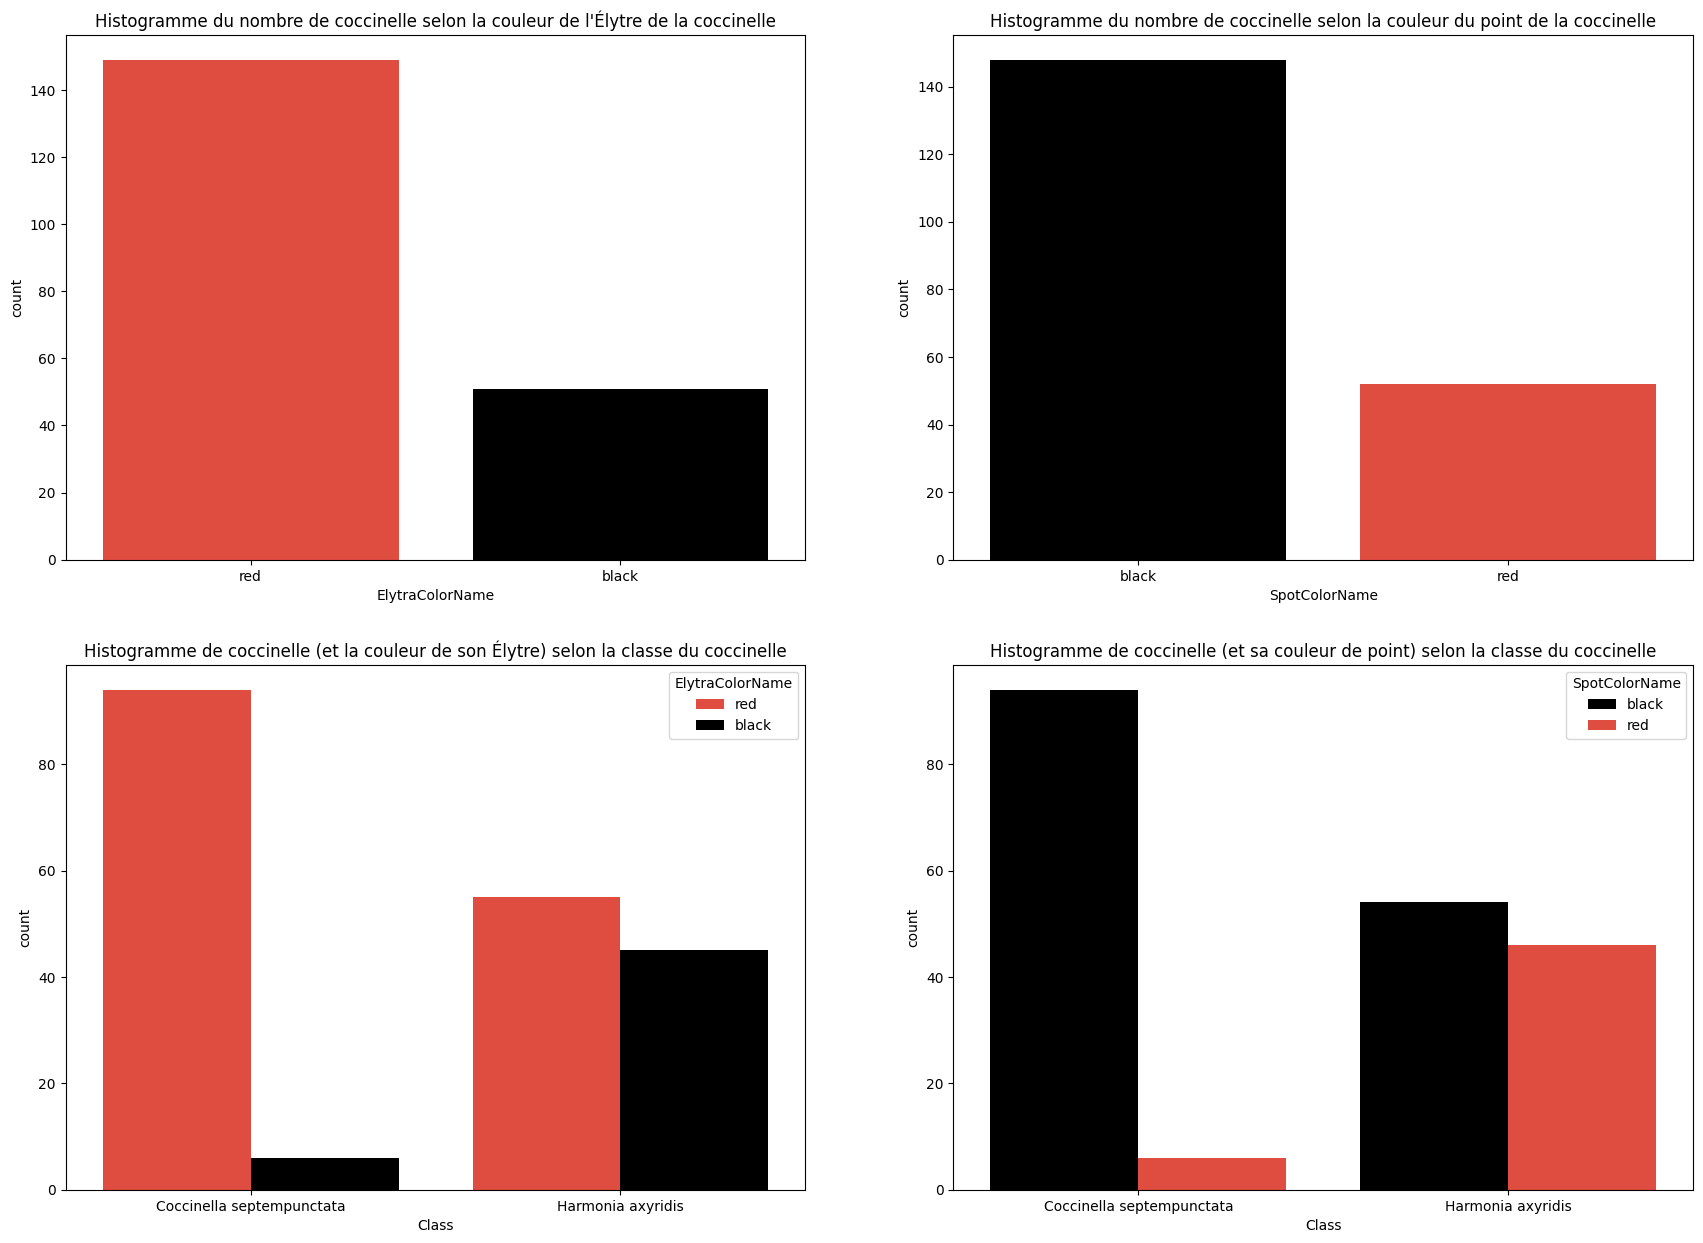

In [ ]:
df_final_auto = pd.read_csv("df_complet.csv")



palette = dict(black="#000000", red="#FA3626")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.countplot(data=df_final_auto, ax=axes[0][0], x="ElytraColorName",palette=palette ).set(title="Histogramme du nombre de coccinelle selon la couleur de l'Élytre de la coccinelle")
sns.countplot(data=df_final_auto, ax=axes[0][1], x="SpotColorName", palette=palette).set(title='Histogramme du nombre de coccinelle selon la couleur du point de la coccinelle')
sns.countplot(data=df_final_auto, ax=axes[1][0], x="Class", hue = "ElytraColorName", palette=palette).set(title='Histogramme de coccinelle (et la couleur de son Élytre) selon la classe du coccinelle')
sns.countplot(data=df_final_auto, ax=axes[1][1], x="Class",hue = "SpotColorName", palette = palette).set(title='Histogramme de coccinelle (et sa couleur de point) selon la classe du coccinelle')






plt.show()

__Remarque__ : 

Il est intéressant de noter de manière très visible que nous obtenons quelques erreurs : Puisque la coccinelle européenne ne contient pas de Élytre de couleur noir. Ce qui montre que notre extration de feature n'est pas totalement précise.


De la même façon que nous disposons trop de coccinelles ayant une Élytre de couleur noire parmi les coccinelles asiatiques.

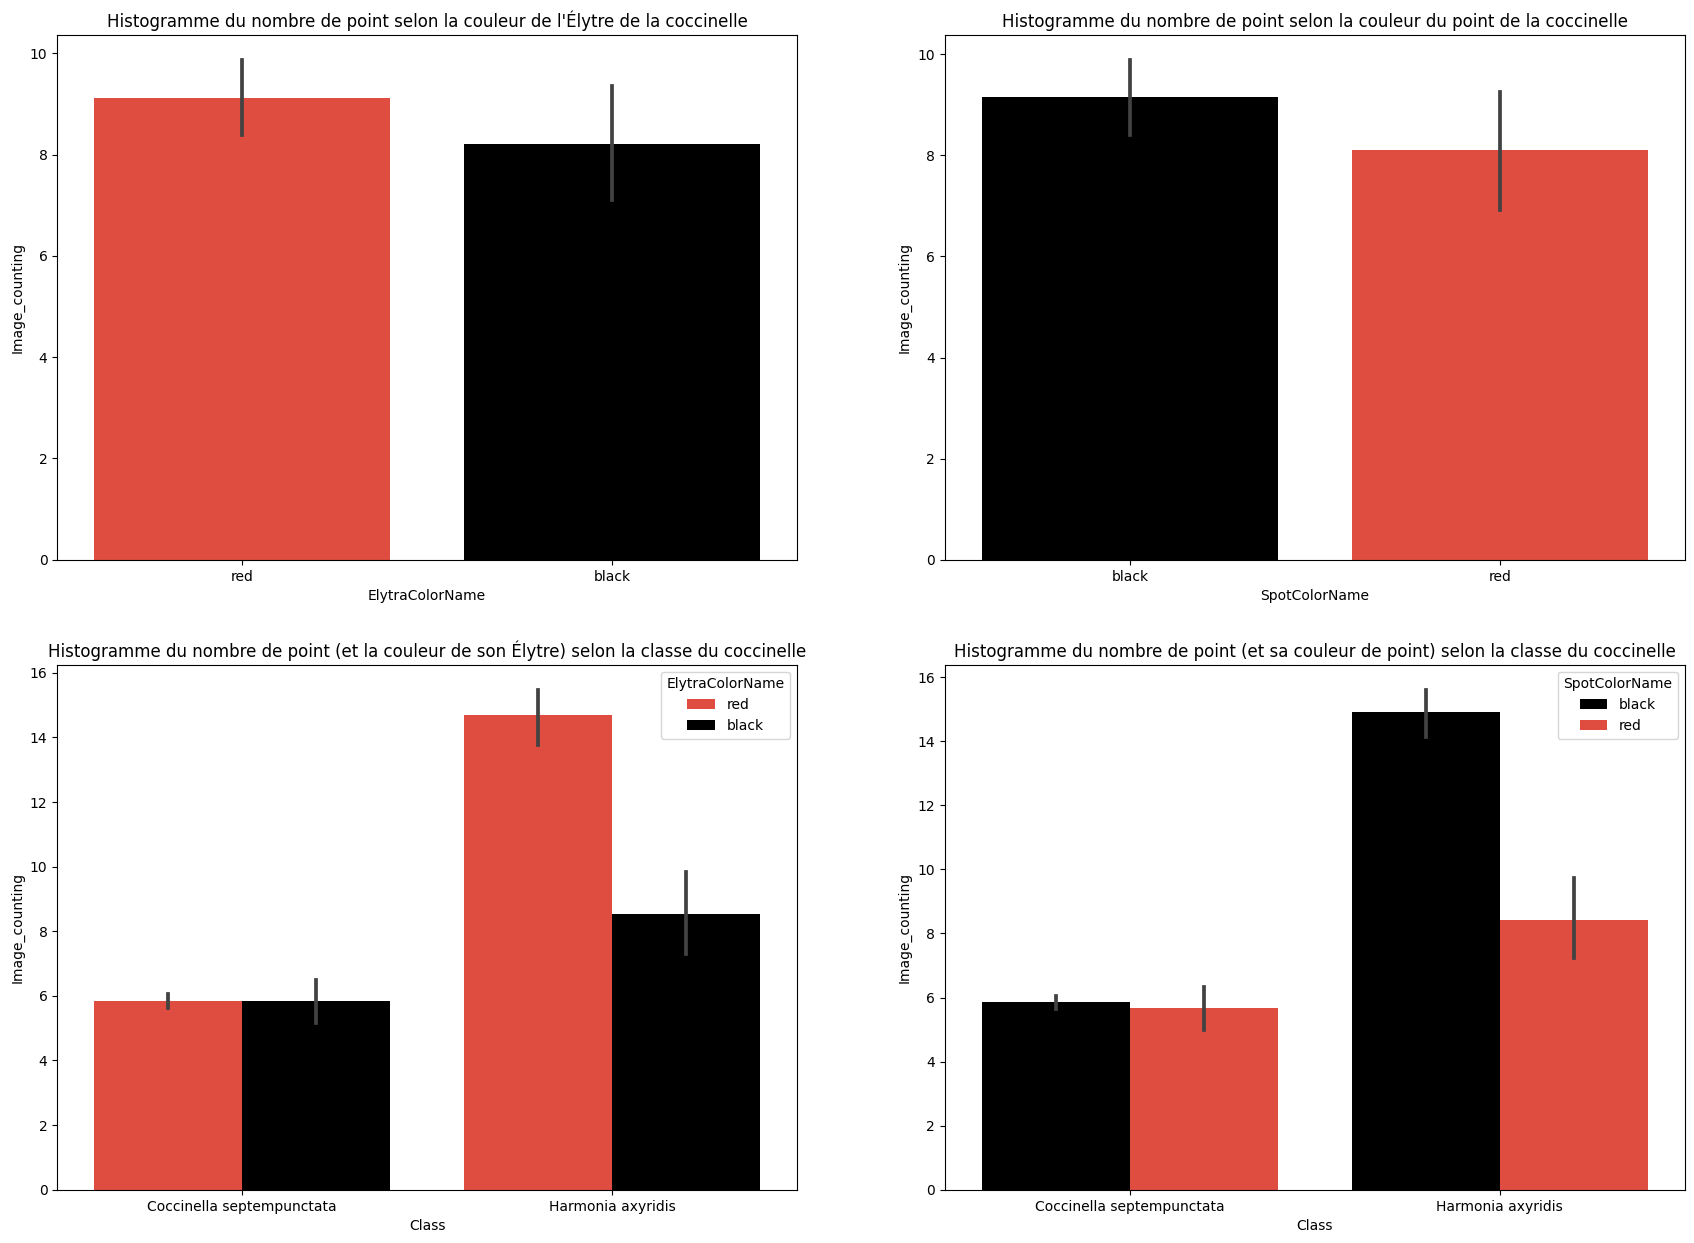

In [ ]:
palette = dict(black="#000000", red="#FA3626")


fig, axes = plt.subplots(2,2, figsize=(21,15))
sns.barplot(data=df_final_auto, ax=axes[0][0], x="ElytraColorName", y="Image_counting" ,palette=palette).set(title="Histogramme du nombre de point selon la couleur de l'Élytre de la coccinelle")
sns.barplot(data=df_final_auto, ax=axes[0][1], x="SpotColorName", y="Image_counting", palette=palette).set(title='Histogramme du nombre de point selon la couleur du point de la coccinelle')
sns.barplot(data=df_final_auto, ax=axes[1][0], x="Class", y="Image_counting", hue = "ElytraColorName", palette=palette).set(title='Histogramme du nombre de point (et la couleur de son Élytre) selon la classe du coccinelle')
sns.barplot(data=df_final_auto, ax=axes[1][1], x="Class", y="Image_counting", hue = "SpotColorName", palette = palette).set(title='Histogramme du nombre de point (et sa couleur de point) selon la classe du coccinelle')






plt.show()

__Remarque__ : En revanche pour le nombre de points, on peut affirmer que c'est plutôt précis puisque cela est compris entre 5 et 7 (ne dépassant pas la barre des 7). On peut considérer cela comme cohérent.




__Conclusion de la partie 3.0__ :     


*   On peut critiquer notre résultat dans le cadre des imprécisions au niveau de la datéction de la couleur de l'Élytre et du point de chaque coccinelle.
*   Un écart qui sera forcément impactant négativement sur la classification pusique notre algorithme en dépend énormément de ce facteur. 
*   Une bonne chose est à retenir : le fait que le comptage des points soient plutôt précis. Nous permettra alors peut-être de minimiser nos erreurs ici en attribuant des conditions spécifiques et des poids sur le nombre de point obtenu.






## **4- Clustering of our data**

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import zipfile

# Chemin vers le fichier CSV contenant les caractéristiques
csv_file_path = "/content/final_merged_df_binarized.csv"

# Chemin vers le dossier training zippé
zip_file_path = "/content/training.zip"

# Chemin vers le dossier où les images seront extraites
extracted_directory = "/content/training"

# Extraire les images du fichier zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_directory)

# Fonction pour extraire les caractéristiques d'une image
def extract_features(image_path):
    # Charger et prétraiter l'image selon vos besoins
    image = Image.open(image_path)
    # Extraire les caractéristiques de l'image et les renvoyer
    features = (image.count(), image.elytra_color, image.spot_color)
    return features

# Charger les données depuis le fichier CSV
data = pd.read_csv(csv_file_path)

# Sélectionner les caractéristiques pertinentes pour le clustering
features = data[['Image_counting', 'ElytraColorName', 'SpotColorName']]

# Convertir les caractéristiques en un tableau NumPy
features_array = features.to_numpy()

# Effectuer une réduction de dimension avec PCA si nécessaire
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_array)

# Appliquer le clustering avec K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features_pca)

# Obtenir les étiquettes de cluster pour chaque exemple
cluster_labels = kmeans.labels_

# Ajouter les étiquettes de cluster au DataFrame d'origine
data['Cluster'] = cluster_labels

# Extraire les noms des images depuis le fichier CSV
image_names = data['Image_id']

# Extraire les classes des coccinelles depuis le fichier CSV
class_labels = data['Class']

# Charger et prétraiter les images pour l'affichage des clusters
image_features = []
for image_name in image_names:
    image_base_name = image_name.split("_im.png")[0]  # Obtenir le nom de base de l'image
    image_path = os.path.join(extracted_directory, f"{image_base_name}_im.png")  # Chemin de l'image originale
    image_features.append(extract_features(image_path))

# Convertir les caractéristiques en un tableau NumPy
image_features_array = np.array(image_features)

# Effectuer une réduction de dimension avec PCA si nécessaire
image_features_pca = pca.transform(image_features_array)

# Visualiser les clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Associer une couleur à chaque classe de coccinelle
color_mapping = {'Coccinnella septempunctata': 'red', 'Harmonia axyridis': 'blue'}

for i in range(len(image_names)):
    plt.scatter(image_features_pca[i, 0], image_features_pca[i, 1], color=color_mapping[class_labels[i]])
    plt.annotate(image_names[i], (image_features_pca[i, 0], image_features_pca[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Image Clustering")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyError: ignored

## **4. ML training**

## **4.1 Algorithme pour la classification**

Appliquer notre algo pour déterminer la classe : application d’un arbre décisionnel en fonction de nos Features de chaque image => résultant à une colonne "*Label*" (qui renvoie 0: Europe 1 : Asiatique)

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Charger les données à partir du fichier CSV
data1 = pd.read_csv('/content/final_merged_df_binarized.csv')
data2 = pd.read_csv('/content/training_labels.csv')

# Sélectionner les caractéristiques pour la classification
features = data1[['Image_counting', 'ElytraColorName', 'SpotColorName']]

# Sélectionner les labels de classe
labels = data2['Label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entraîner un modèle de régression logistique
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Prévoir les classes pour les données de test à l'aide de la régression logistique
y_pred_lr = logistic_regression.predict(X_test)

# Évaluer l'exactitude (accuracy) de la régression logistique
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Entraîner un modèle de forêt aléatoire (Random Forest)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Prévoir les classes pour les données de test à l'aide de la forêt aléatoire
y_pred_rf = random_forest.predict(X_test)

# Évaluer l'exactitude de la forêt aléatoire
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Entraîner un modèle de boosting par gradient (Gradient Boosting)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gradient_boosting.fit(X_train, y_train)

# Prévoir les classes pour les données de test à l'aide du boosting par gradient
y_pred_gb = gradient_boosting.predict(X_test)

# Évaluer l'exactitude du boosting par gradient
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Entraîner un modèle SVM (Support Vector Machine)
svm = SVC()
svm.fit(X_train, y_train)

# Prévoir les classes pour les données de test à l'aide de SVM
y_pred_svm = svm.predict(X_test)

# Évaluer l'exactitude de SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Rapport de classification pour chaque algorithme
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.95
Random Forest Accuracy: 0.95
Gradient Boosting Accuracy: 0.95
SVM Accuracy: 0.95

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.91      1.00      

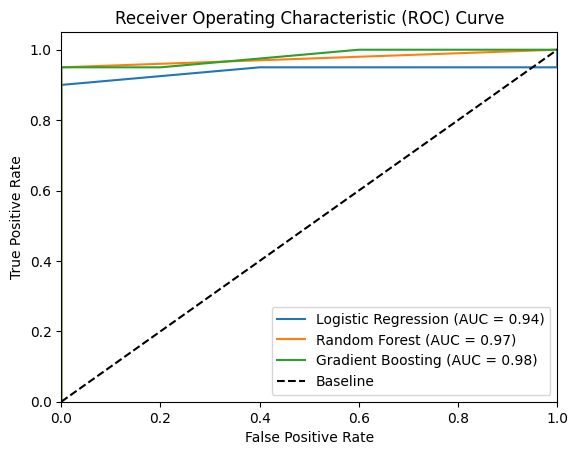

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Charger les données à partir du fichier CSV
data1 = pd.read_csv('/content/final_merged_df_binarized.csv')
data2 = pd.read_csv('/content/training_labels.csv')

# Sélectionner les caractéristiques pour la classification
features = data1[['Image_counting', 'ElytraColorName', 'SpotColorName']]

# Sélectionner les labels de classe
labels = data2['Label']

# Encoder les labels en utilisant LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Entraîner un modèle de régression logistique
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Prévoir les probabilités des classes pour les données de test à l'aide de la régression logistique
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Calculer le taux de faux positifs (FPR), le taux de vrais positifs (TPR) et les seuils (thresholds) pour la courbe ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)

# Calculer l'AUC pour la régression logistique
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Entraîner un modèle de forêt aléatoire (Random Forest)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Prévoir les probabilités des classes pour les données de test à l'aide de la forêt aléatoire
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculer le taux de faux positifs (FPR), le taux de vrais positifs (TPR) et les seuils (thresholds) pour la courbe ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculer l'AUC pour la forêt aléatoire
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Entraîner un modèle de boosting par gradient (Gradient Boosting)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gradient_boosting.fit(X_train, y_train)

# Prévoir les probabilités des classes pour les données de test à l'aide du boosting par gradient
y_pred_prob_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Calculer le taux de faux positifs (FPR), le taux de vrais positifs (TPR) et les seuils (thresholds) pour la courbe ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)

# Calculer l'AUC pour le boosting par gradient
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Tracer la courbe ROC
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % auc_gb)

# Tracer la ligne de base
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## **4.2 Algorithme Spot counting**

## **Évaluation de la loss et MSE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
dataset1 = pd.read_csv("/content/df_counting.csv")  # Replace with the actual filename/path of your dataset
dataset2 = pd.read_csv('/content/training_labels.csv')

# Merge the datasets on the common column (Image_id)
merged_dataset = pd.merge(dataset1, dataset2, on='Image_id')

# Select the features and target variable
features = merged_dataset[['Moyenne_indice_circularité', 'Image_counting']]
target = merged_dataset['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
regressor = LinearRegression()

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate the loss (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1467725906158112


## 4.3 **Optimization des algorithmes de training**

## **4.3.1 Classification**

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Charger les données à partir du fichier CSV
data = pd.read_csv('/content/final_merged_df_binarized.csv')

# Charger les données à partir du fichier CSV
data1 = pd.read_csv('/content/final_merged_df_binarized.csv')
data2 = pd.read_csv('/content/training_labels.csv')

# Sélectionner les caractéristiques pour la classification
features = data1[['Image_counting', 'ElytraColorName', 'SpotColorName']]

# Sélectionner les labels de classe
labels = data2['Label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Définir les hyperparamètres à optimiser
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Créer le modèle SVM
svm = SVC()

# Créer l'objet GridSearchCV pour la recherche par grille avec validation croisée
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Effectuer la recherche par grille avec validation croisée sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle SVM optimisé
optimized_svm1 = SVC(**best_params)
optimized_svm1.fit(X_train, y_train)

# Prévoir les classes pour les données de test à l'aide du modèle SVM optimisé
y_pred_svm = optimized_svm1.predict(X_test)

# Évaluer l'exactitude du modèle SVM optimisé
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Optimized SVM Accuracy:", accuracy_svm)

# Rapport de classification pour le modèle SVM optimisé
print("\nClassification Report for Optimized SVM:")
print(classification_report(y_test, y_pred_svm))


Best Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.975

Classification Report for Optimized SVM:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



## **4.3.2 Spot Counting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
dataset1 = pd.read_csv("/content/df_counting.csv") # Replace with the actual filename/path of your dataset

dataset2 = pd.read_csv('/content/training_labels.csv')

# Sélectionner les labels de classe
labels = dataset2['Label']

# Split the dataset into features and target variable
features_spot_couting= dataset1[['Moyenne_indice_circularité' , 'ElytraColorName', 'SpotColorName']]  # Features: average circularity and image count
labels = dataset1['Image_counting']  # Target variable: class label (spot count)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_spot_couting, labels, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the SVM classifier
svm_classifier = SVC()

# Create the GridSearchCV object for grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the optimized SVM classifier
optimized_svm2 = SVC(**best_params)
optimized_svm2.fit(X_train, y_train)

# Make predictions on the testing set using the optimized SVM classifier
y_pred = optimized_svm2.predict(X_test)

# Evaluate the accuracy of the optimized SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("Optimized SVM Accuracy:", accuracy)

# Rapport de classification pour le modèle SVM optimisé
print("\nClassification Report for Optimized SVM:")
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVM Accuracy: 0.2

Classification Report for Optimized SVM:


TypeError: ignored



---



# **5.Phase Test**

## **5.1 Classification**

In [ ]:
#Preprocess the test image (similar to the training phase) 

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC

# Load the optimized SVM classifier and the test dataset
optimized_svm1 = SVC(C=1, kernel='linear', gamma='scale')  # Replace with the optimized hyperparameters
test_dataset_zip = "/path/to/your/test/dataset.zip"  # Replace with the path to your zipped test dataset file

# Extract the test dataset from the zip file
test_dataset_path = "/path/to/extracted/test/dataset"  # Replace with the desired path to extract the test dataset
with zipfile.ZipFile(test_dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(test_dataset_path)

# Initialize lists to store the image IDs and predictions
image_ids = []
predictions = []

# Iterate over the test images
for file_name in sorted(os.listdir(test_dataset_path)):
    if file_name.endswith(".png"):
        # Load the test image
        image_path = os.path.join(test_dataset_path, file_name)
        im_seg = imageio.imread(image_path)

        # Preprocess the test image (similar to the training phase)







        # Perform prediction using the optimized SVM classifier
        features = np.array([image_count, elytra_float, spot_float])  # Replace with the appropriate feature values
        prediction = optimized_svm1.predict([features])[0]

        # Append the image ID and prediction to the lists
        image_id = os.path.splitext(file_name)[0]
        image_ids.append(image_id)
        predictions.append(prediction)

# Create a DataFrame to store the image IDs and predictions
df_predictions = pd.DataFrame({"Image_id": image_ids, "Prediction": predictions})

# Save the predictions to a CSV file
df_predictions.to_csv("final_predictions.csv", index=False)

## **5.2 Test spot counting**

In [ ]:
import os
import zipfile
import pandas as pd
import imageio
import numpy as np
from skimage.measure import label, regionprops
from sklearn.svm import SVC

# Load the optimized SVM classifier
optimized_svm2 = SVC(C=1, kernel='linear', gamma='scale')  # Replace with the optimized hyperparameters

# Load the test dataset
test_dataset_zip = "/path/to/your/test/dataset.zip"  # Replace with the path to your zipped test dataset file
test_dataset_path = "/path/to/extracted/test/dataset"  # Replace with the desired path to extract the test dataset
with zipfile.ZipFile(test_dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(test_dataset_path)

# Initialize lists to store the image IDs, spot counts, and predictions
image_ids = []
spot_numbers = []
predictions = []

# Iterate over the test images
for file_name in sorted(os.listdir(test_dataset_path)):
    if file_name.endswith(".png"):
        # Load the test image
        image_path = os.path.join(test_dataset_path, file_name)
        im_seg = imageio.imread(image_path)

        # Perform spot counting on the test image (similar to your previous code)
        label_image = label(im_seg)
        regions = regionprops(label_image)
        spot_count = len(regions)

        # Append the image ID and spot count to the lists
        image_id = os.path.splitext(file_name)[0]
        image_ids.append(image_id)
        spot_numbers.append(spot_count)

        # Preprocess the test image for SVM prediction
        # Calculate the mean circularity for the image (similar to your previous code)
        circularities = []
        for region in regions:
            circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
            circularities.append(circularity)
        mean_circularity = np.mean(circularities)

        # Perform prediction using the optimized SVM classifier
        features = np.array([mean_circularity, spot_count])  # Replace with the appropriate feature values
        prediction = optimized_svm2.predict([features])[0]
        predictions.append(prediction)

# Create a DataFrame to store the image IDs, spot numbers, and predictions
df = pd.DataFrame({"Image_id": image_ids, "Spot_number": spot_numbers, "Prediction": predictions})

# Save the DataFrame to a CSV file
df.to_csv("predictions.csv", index=False)

CSV type, Comparaison avec le DataFrame manuel

## **Récupération de notre CVS final**

##**Performance finale**

## **Cross validation test 1**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the DataFrame
scores = cross_val_score(optimized_svm1, df_predictions[['Prediction']], df_predictions['Class'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

NameError: ignored

## **Cross validation test 2**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the DataFrame
scores = cross_val_score(optimized_svm2, df[['Spot_number', 'Prediction']], df['Class'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)



---



# **BONUS :** Une nouvelle approche (Deep Learning)

# **Comparaison du Deep Learning vs Machine learning**